In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import seaborn as sns

In [8]:
import seaborn as sns

In [9]:
sns.set()

In [10]:
import matplotlib.pyplot as plt


In [11]:
import os

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

Using TensorFlow backend.
c:\users\shyla\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\shyla\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\shyla\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [13]:

import warnings
warnings.filterwarnings("ignore")

In [14]:
path= '/Users/shyla/Desktop/Dataset/'

In [15]:
train_text =  pd.read_csv(path+'training_text', sep='\|\|', header=None, skiprows = 1, names=["ID", "Text"])

In [16]:
train_text =  pd.read_csv(path+'training_text', sep='\|\|', header=None, skiprows = 1, names=["ID", "Text"])
train_variants =  pd.read_csv(path+'training_variants')

In [17]:
train_text.shape

(3321, 2)

In [18]:
train_variants.shape

(3321, 4)

In [19]:
#merging text with train datas
train = pd.merge(train_variants,train_text, how='left',on='ID')
#left join based on its id

In [20]:
train.isnull().sum()
#print sum of missing values

ID           0
Gene         0
Variation    0
Class        0
Text         5
dtype: int64

In [21]:
#remove missing values such as null in dataset and copies to dataframe train
df_train = train.dropna(axis=0).copy()
#array dimension 
df_train.shape

(3316, 5)

In [22]:
df_train.head()
#gives top 5 rows ->head

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [24]:
df_train

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...


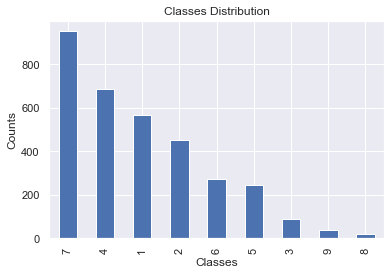

In [25]:
df_train.Class.value_counts().plot(kind="bar",title='Classes Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()
#shows count for classes 1-9

In [98]:
import re, string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
#getting english stopwords from nltk 
sw_list = stopwords.words('english')


In [100]:
#add punctuation
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'", '©',
'said',"'s", "also",'one',"n't",'com', 'satirewire', '-', '–', "et al",
'—', '_','et al ',"/"]
sw_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [101]:
#eleminating duplicates by adding to set
sw_set = set(sw_list)

In [102]:
print(sw_set)

{'her', ',', 'do', 'from', 'during', "mightn't", '#', 'him', ']', '%', '’', 'll', "shouldn't", "she's", 'had', 'until', '{', 'if', 'about', 'we', 'each', 'satirewire', 'more', 'ours', 's', 'against', '`', '—', 'few', 'can', 'shan', 'them', "shan't", ')', '*', '”', 'what', 'where', 'some', '©', 'you', 'so', 'don', 'ourselves', 'over', "you'd", 'wouldn', '-', '<', 'down', "isn't", '~', "needn't", 'was', 'when', '(', 'being', "hasn't", 'does', 'their', 'ma', 'herself', "should've", 'this', 'its', 'further', 'i', 'which', '^', 't', '\\', '[', 'our', 'm', 'also', '}', 'at', 'up', 'et al ', 'been', 'both', 'aren', 'that', 'needn', 'hasn', '.', 'won', 'above', 'just', 'they', 'in', "that'll", 'through', 'yourself', '"', 'below', 'or', 'too', '$', 'while', '“', 'mightn', 'out', '–', "you're", 'how', 'such', 'these', 'very', 'couldn', '/', "you've", 'themselves', '?', '!', 'on', 'into', '|', "you'll", 'other', 'a', 'there', 'hers', 'my', 'under', 'then', 'his', 'said', 'me', '""', 'with', 'one'

In [82]:
#tokenization using nltk
#word tokenization is used here -> sentence breaks into words
def process_review(review):
    tokens = nltk.word_tokenize(review)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [83]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemming(review):
    stemmed_review = []
    for w in review:
        stemmed_review.append(ps.stem(w))
    return stemmed_review 

In [90]:
# import libraries
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [91]:
#lemmatixation
#pos = v is verb of that word
def lemmatization(review):
    lemma_list=[]
    for word in review:
        lemma_word=lemmatizer.lemmatize(word,pos='v') 
        lemma_list.append(lemma_word)
    return lemma_list

In [96]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 22:44:32


In [97]:
#obtaining cleaned text data
def data_preprocessing(review):
    #tokenization, stop words removal, punctuation marks removel
    current_time = now.strftime("%H:%M:%S")
    print("start Time tokenization=", current_time)
    processed_review=list(map(process_review,review))
    current_time = now.strftime("%H:%M:%S")
    print("stop Time tokenization=", current_time)
    # stemming
    current_time = now.strftime("%H:%M:%S")
    print("start Time stemming=", current_time)
    stemming_reviews=list(map(stemming,processed_review))
    current_time = now.strftime("%H:%M:%S")
    print("stop Time stemming=", current_time)
    # lemmatization
    current_time = now.strftime("%H:%M:%S")
    print("start Time lemmatization=", current_time)
    lemma_reviews=list(map(lemmatization,stemming_reviews))
    current_time = now.strftime("%H:%M:%S")
    print("stop Time lemmatization=", current_time)
    #print(lemma_reviews)
    return lemma_reviews

In [98]:
cleaned_train_text=data_preprocessing(df_train['Text'])


start Time tokenization= 22:44:32
stop Time tokenization= 22:44:32
start Time stemming= 22:44:32
stop Time stemming= 22:44:32
start Time lemmatization= 22:44:32
stop Time lemmatization= 22:44:32


In [99]:
print(cleaned_train_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [107]:

import pickle
pickle_out1=open('cleaned_train_text', 'wb')
pickle.dump(cleaned_train_text, pickle_out1)
pickle_out1.close()

In [1]:
import pickle
pickle_in_train = open("cleaned_train_text","rb")
cleaned_train_text = pickle.load(pickle_in_train)

In [26]:
df_train['cleaned_text']=[" ".join(i) for i in cleaned_train_text]

In [27]:
df_train

,ID,Gene,Variation,Class,Text,cleaned_text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,cyclin-depend kinas cdk regul varieti fundamen...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,abstract background non-smal cell lung cancer ...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,abstract background non-smal cell lung cancer ...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,recent evid demonstr acquir uniparent disomi a...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,oncogen mutat monomer casita b-lineag lymphoma...
...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...,introduct myelodysplast syndrom md heterogen g...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...,introduct myelodysplast syndrom md heterogen g...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...,runt-rel transcript factor 1 gene runx1 alias ...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...,runx1/aml1 gene frequent target chromosom tran...


In [28]:
#declare inputs and target
inputs=df_train[['ID', 'Gene', 'Variation','cleaned_text']]
target=df_train.Class

In [29]:
inputs

,ID,Gene,Variation,cleaned_text
0,0,FAM58A,Truncating Mutations,cyclin-depend kinas cdk regul varieti fundamen...
1,1,CBL,W802*,abstract background non-smal cell lung cancer ...
2,2,CBL,Q249E,abstract background non-smal cell lung cancer ...
3,3,CBL,N454D,recent evid demonstr acquir uniparent disomi a...
4,4,CBL,L399V,oncogen mutat monomer casita b-lineag lymphoma...
...,...,...,...,...
3316,3316,RUNX1,D171N,introduct myelodysplast syndrom md heterogen g...
3317,3317,RUNX1,A122*,introduct myelodysplast syndrom md heterogen g...
3318,3318,RUNX1,Fusions,runt-rel transcript factor 1 gene runx1 alias ...
3319,3319,RUNX1,R80C,runx1/aml1 gene frequent target chromosom tran...


In [36]:
target


0       1
1       2
2       2
3       3
4       4
       ..
3316    4
3317    1
3318    1
3319    4
3320    4
Name: Class, Length: 3316, dtype: int64

In [31]:
#train test split dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=.2, random_state=0)

In [32]:
x_train

,ID,Gene,Variation,cleaned_text
2979,2979,KIT,H697Y,thymoma thymic carcinoma rare intrathorac mali...
1184,1184,PIK3CA,K111N,pi3k/pten/akt signal pathway pathway involv ce...
2411,2411,FOXL2,Amplification,recent mutat foxl2 gene consist identifi adult...
2994,2994,KIT,D419del,gastrointestin stromal tumor gist often associ...
2690,2690,BRAF,I326V,noonan syndrom character short statur facial d...
...,...,...,...,...
835,835,ERCC4,Truncating Mutations,xeroderma pigmentosum xp complement group f fi...
3269,3269,RET,Fusions,oncogen fusion ret rearrang transfect gene rec...
1657,1657,FLT3,N676D,flt3 receptor tyrosin kinas constitut activ in...
2611,2611,BRCA1,V1808A,abstract germlin mutat inactiv tumor suppresso...


In [33]:
x_test

,ID,Gene,Variation,cleaned_text
453,453,TP53,H168R,tumor suppressor protein p53 act transcript fa...
1541,1541,ALK,L1198F,era person medicin understand molecular driver...
2615,2615,BRCA1,T47D,brca1 accumul nuclear foci s-phase reassembl d...
628,628,FBXW7,R505L,î³-secretas inhibitor gsi block notch receptor...
482,482,TP53,G334R,abstract purpos adrenocort carcinoma acc rare ...
...,...,...,...,...
53,53,PTPRT,N510K,receptor protein tyrosin phosphatas ptprt/ptpï...
1490,1490,FGFR2,FGFR2-FAM76A Fusion,retrospect studi demonstr nearli 50 patient ov...
2966,2966,KIT,I563_L576del,gastrointestin stromal tumor gist activ mutat ...
2920,2920,NFE2L2,T80K,strategi propos chemoprevent degen diseas canc...


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
def vectorizer(train,test):
    vectorizer=CountVectorizer()
    new_train=vectorizer.fit_transform(train)
    new_test=vectorizer.transform(test)
    return new_train,new_test

In [39]:
#vectorization
gene_train,gene_test=vectorizer(x_train.Gene,x_test.Gene)
variation_train,variation_test=vectorizer(x_train.Variation,x_test.Variation)
cleaned_text_train,cleaned_text_test=vectorizer(x_train.cleaned_text,x_test.cleaned_text)

In [40]:
gene_train

<2652x244 sparse matrix of type '<class 'numpy.int64'>'
	with 2652 stored elements in Compressed Sparse Row format>

In [41]:
pickle_out2 = open('gene_train', 'wb')
pickle.dump(gene_train, pickle_out2)
pickle_out2.close()

In [52]:
import gensim

In [53]:
# Word2Vec related libraries
from gensim.models import KeyedVectors

In [75]:
model = KeyedVectors.load_word2vec_format ('GoogleNews-vectors-negative300.bin', binary=True)

In [77]:
model.similar_by_word('mutation')

[('mutations', 0.8541922569274902),
 ('genetic_mutation', 0.824504554271698),
 ('mutated_gene', 0.7879970669746399),
 ('gene_mutation', 0.7823827862739563),
 ('genetic_mutations', 0.7393667101860046),
 ('gene', 0.7343353033065796),
 ('gene_mutations', 0.72752445936203),
 ('genetic_variant', 0.7182294130325317),
 ('alleles', 0.7164379954338074),
 ('mutant_gene', 0.7144375443458557)]

In [106]:
def get_average_vector(text):
    tokens = [w.lower() for w in word_tokenize(text) if w.lower() not in sw_set]
    return np.mean(np.array([model[w] for w in tokens if w in model]), axis=0)



In [92]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [117]:
model.similar_by_vector(get_average_vector(df_train.loc[0, x_train.cleaned_text]))

KeyError: "None of [Index(['thymoma thymic carcinoma rare intrathorac malign invas refractori convent treatment tumor origin thymu often group togeth clinic howev whether underli biolog tumor warrant cluster unclear optimum treatment either entiti unknown experiment design thymic tumor profil mutat gene encod compon egfr kit signal pathway assess egfr kit express immunohistochemistri ihc analyz array-bas compar genom hybrid acgh previous untreat tumor subject global gene express array result analyz 45 thymic tumor thymoma n=38 type n=8 type b2 n=22 type b3 n=8 thymic carcinoma n=7 thymoma thymic carcinoma harbor kra mutat g12a g12v respect thymoma g13v hra mutat three tumor display strong kit stain two thymic carcinoma harbor somat kit mutat v560del h697i cell viabil assay v560del mutant associ similar sensit imatinib sunitinib h697i mutant display greater sensit sunitinib genom profil reveal distinct differ type a-b2 thymoma vs. type b3 thymic carcinoma moreov acgh could readili distinguish squamou cell carcinoma thymu vs. lung often present diagnost challeng conclus comprehens genom analysi suggest thymic carcinoma molecularli distinct thymoma data clinic patholog therapeut implic treatment thymic malign keyword thymoma thymic carcinoma egfr ra mutat kit mutat mutat profil genom analysi statement translat relev thymoma thymic carcinoma rare intrathorac cancer aggress refractori convent treatment identifi potenti target therapi perform comprehens molecular analysi 45 thymic tumor find molecular distinct exist differ histolog type thymic tumor exampl compar thymoma thymic carcinoma display mani chromosom gain loss exclus harbor somat mutat kinas encod kit correspond kit mutant studi biochem display sensit kit inhibitor imatinib sunitinib thymic malign harbor mutat ra gene previous associ resist egfr-direct therapi result direct therapeut implic treatment thymic malign go introduct thymoma thymic carcinoma malign intrathorac tumor repres 0.2 1.5 malign 1 gener thymoma tumor tendenc toward local recurr rather metastasi thu thymoma treat surgic follow possibl radiat 2 contrast thymic carcinoma high risk relaps death despit surgeri chemotherapi radiat 3 optim treatment thymic tumor well-defin thymoma thymic carcinoma rare aris thymic epithelium often group togeth clinic patholog level tumor thymu classifi accord criteria put forth world health organ 2004 4 schema thymic epitheli malign classifi thymoma type ab b1 b2 b3 thymic carcinoma class base upon morpholog epitheli cell increas degre atypia type thymic carcinoma rel proport non-tumor lymphocyt compon decreas type b1 b3 resembl normal thymic architectur 4 clinic degre invas tumor stage gener think import indic overal surviv 5 best prognost factor howev whether tumor complet resect time oper 6 compar common epitheli cancer current knowledg biolog thymic tumor limit research hamper rariti tumor lack establish cell line anim model recent select gene egfr kit tp53 analyz small cohort patient 7â€ 12 notabl number case report advanc thymic tumor respond new target agent 13â€ 17 case suggest thymic malign may compris clinic relev subset defin molecular level order gain insight biolog thymoma thymic carcinoma perform comprehens genom analysi 45 resect thymic tumor use array compar genom hybrid mutat profil assess statu specif gene mrna express profil immunohistochem analys protein implic thymic tumor pathogenesi find differ thymoma thymic carcinoma import clinic therapeut implic go materi method patient sampl tumor specimen patient resect thymoma thymic carcinoma underw surgic resect memori sloan-kett cancer center mskcc januari 1997 decemb 2007 obtain patientsâ€™ consent institut tissu procur protocol tumor freeze either oper room patholog depart store âˆ 80â°c institut tumor bank clinic stage determin accord masaoka system 5 freeze specimen well addit patholog materi avail correspond tumor review singl refer pathologist w.d.t tumor classif accord 2004 criteria 4 studi select thymic tumor match freeze specimen contain least 50 epitheli cell cutoff choose elimin need microdissect epitheli cell within tumor sampl mix epitheli lymphocyt subtyp report previous 18 b2 thymoma meet criteria includ exclud studi thymoma type ab b1 problem extens lymphocyt stroma could confound genom analys mutat profil dna extract use standard method mutat profil do use mass spectrometry-bas genotyp sequenom sequenom san diego ca previous describ 19 sampl analyz total 74 sequenom assay design detect 101 know somat mutat gene egfr signal pathway egfr kra hra nra braf pik3ca akt1 erbb2 mek1 supplement tabl 1 20 addit perform direct dideoxynucleotide-bas sequenc select exon gene know commonli mutat sequenom assay avail egfr exon 19 kit exon 9 10 11 13 14 17 code exon tp53 pten see supplement tabl 2 supplement method genom profil dna digest label random prime use bioprim reagent invitrogen carlsbad ca cy3- cy5-dutp label dna hybrid agil 244k compar genom hybrid cgh array agil technolog santa clara ca normal genom dna roch basel switzerland use refer sampl wash hybrid slide scan imag quantifi use featur extract 8.5 agil technolog data interpret use standard methodolog see supplement method express profil rna extract use standard method rna convert double-strand cdna use t7-promoter-tag oligo primer revers transcriptas rna target synthes cdna vitro transcript label biotinyl utp ctp biotinyl cdna fragment hybrid 16 hour 45â°c hg-u133a 2.0 affymetrix oligonucleotid array data analyz use standard method see supplement method express profil may consider alter induct chemotherapi especi anthracyclin and/or radiotherapi previous report tumor type 21 pretreat tumor analyz global gene express array immunohistochemistri egfr immunohistochemistri ihc do use anti-egfr mous antibodi clone 31g7 1:1000 invitrogen camarillo ca antigen retriev pepsin 0.5 kit stain perform use anti-kit rabbit polyclon antibodi dako a4502 1:2000 carpinteria ca ventana symphoni instrument ventana tucson az stain intens epitheli tumor cell qualit evalu 0 stain 1+ low stain 2+ moder 3+ elev stain 2 investig n.g m.f.z blind clinic genom data egfr membran stain evalu kit either cytoplasm membran stain consid posit cd5 express result thymic carcinoma retriev patientsâ€™ patholog report stain do part routin patholog diagnosi use anti-cd5 rabbit monoclon antibodi clone sp19 ventana neg posit control includ studi ba/f3-kit mutant transform assay ba/f3 cell harbor kitv560del kith697i mutat gener use quikchang ii xl site-direct mutagenesi kit stratagen agil technolog previous describ see supplement method 22 drug sensit assay kitv560del kith697i cell incub 10 10,000 nm imatinib mesyl provid novarti basel switzerland sunitinib malat provid pfizer new york ny 96-well plate triplic densiti 1ã—105 cells/wel 100 âµl media 48 hour 37â°c 5 co2 20 âµl tetrazolium compound mt 3- 4,5- dimethylthiazol-2-yl -5- 3-carboxymethoxyphenyl -2- 4-sulfophenyl -2h-tetrazolium inner salt cell titer blue reagent promega madison wi ad incub cell 2 hour mt assay absorb 490nm record dtx880 multimod detector beckman coulter fullerton ca cell titer blue fluoresc read spectra max m5 detector molecular devic md toronto canada cell growth-inhibit plot ratio averag quantiti formazan product mt resazurin reduct cell titer blue reagent treat well rel non-treat control assay repeat least 3 time triplic gi50 valu imatinib sunitinib calcul use standard non-linear regress algorithm avail graphpad prism softwar graphpad la jolla ca version 4.03 statist method patient includ statist calcul follow-up obtain case censor june 30st 2009 categor variabl compar use chi-squar test surviv assess use kaplan-mei method result consid signific 0.05 level statist analys perform use spss softwar program chicago il version 17.0 go result patient characterist total 98 thymic tumor specimen store mskcc tumor bank studi period supplement figur 1 64 case correspond previous untreat tumor resect upfront diagnosi 34 tumor resect induct treatment studi identifi 45 elig thymic tumor tissu specimen 27 previous untreat tumor 18 pre-treat tumor supplement figur 1 clinic characterist patient examin tumor list supplement tabl 3 23 thymic tumor occur men 22 women median age diagnosi 62 year tumor type thymoma type b2 b3 38 case thymic carcinoma 7 case time analysi 3 patient aliv median follow-up 31.4 month ring 1.4â€ 160.0 month five-year surviv 92 median surviv reach explor egfr signal pathway least patient thymoma report literatur document radiograph respons egfr tyrosin kinas inhibitor tki erlotinib 16 mechan sensit resist egfr inhibitor well-defin first investig statu variou egfr pathway biomark use ihc anti-egfr antibodi find low intens stain 6 15 case moder stain 10 26 case high stain 23 51 case 6 case interpret tabl 1 strong correl egfr stain thymoma histolog type high egfr stain significantli associ stage iii-iv tumor p=0.023 chi-squar test tabl 1 tabl 1 result immunohistochem stain egfr kit intens epitheli tumor cell stain qualit evalu 0 stain 1 low stain 2 moder 3 elev stain profil tumor presenc mutat gene encod compon egfr signal pathway know mutat specif recurr nucleotid posit human cancer 20 somat ra mutat find 3 7 45 tumor tabl 2 heterozyg g c substitut nucleotid posit 35 exon 1 kra result alanin glycin amino acid substitut posit 12 g12a type b2 thymoma case 28 heterozyg g substitut nucleotid posit 35 exon 1 kra result valin glycin amino acid substitut posit 12 g12v thymic carcinoma case 41 heterozyg g mutat posit 38 exon 1 hra result valin glycin amino acid substitut posit 13 g13v type thymoma case 3 figur 1 egfr stain high kras-mut tumor moder hras-mut tumor figur 1 detect mutat egfr kinas domain test egfr signal pathway gene figur 1 figur 1 ra kit mutant thymic tumor tabl 2 tabl 2 result mutat analys explor kit signal pathway patient thymic tumor exhibit radiograph respons kit inhibitor like imatinib 13â€ 15 moreov kit stain ihc report frequent thymic carcinoma 7 8 23 24 thu next investig statu kit three 7 45 tumor display stain anti-kit antibodi antibodi use assess kit express gastrointestin stromal tumor gist thymic carcinoma tabl 1 direct sequenc exon encod kit kinas transmembran domain reveal 2 4 45 tumor thymic carcinoma harbor kit mutat tabl 2 tumor cd5-posit contain heterozyg delet nucleotid 1678 1680 exon 11 kit result delet valin posit 560 v560del figur 1 mutat find cd5-neg tumor heterozyg c mutat posit 2089 exon 14 kit result tyrosin histidin amino acid substitut posit 697 h697i figur 1 kit mutat somat kit mutat mutual exclus ra mutat kit v560 delet occur juxta-membran domain kit protein similar type mutat i.e kit v560g kit del557-558 find gist sensit imatinib 25 exact mutat previous observ case thymic carcinoma respond imatinib 13 kit h697i previous report cancer cosmic h697 residu part kit â€œkinas insert domainâ€� 26 region show amino-acid sequenc homolog kinas figur 2e region visual publish crystal structur kit 26 howev residu conserv kit ortholog supplement figur 2 suggest critic residu kit protein function figur 2 figur 2 character kit mutant confirm v560del mutat associ imatinib sensit studi h697i mutat gener stabl ba/f3 transfect express mutant allel ba/f3 cell murin pro-b cell line depend il-3 growth render il-3-independ introduct transform kinas oncogen 27 ba/f3-kitv560del ba/f3-kith697i cell grow absenc il-3 demonstr mutat confer gain-of-funct data show growth ba/f3-kitv560del cell potent inhibit imatinib sunitinib gi50 15.0nm 13.6 nm respect figur 2a 2b growth ba/f3-kith697i cell potent inhibit sunitinib gi50 13.2 nm imatinib gi50 631.4 nm figur 2c 2d although latter gi50 still 1000nm imatinib cut-off report resist drug gist 22 28 data suggest sunitinib may effect kit inhibitor imatinib kit-mut thymic carcinoma gene express profil next perform mrna express profil 23 27 previous untreat thymic tumor adequ high qualiti rna hybrid affymetrix u133a oligonucleotid array normal human thymu tissu unavail analysi unsupervis hierarch cluster analysi gene express data reveal 2 major group figur 3 cluster 1 n=8 cluster 2 n=15 cluster 1 associ thymoma type b2 histolog cluster 2 associ thymoma type thymic carcinoma p=0.023 chi-squar test gene ontolog base pathway analysi reveal gene highli express cluster 1 vs. cluster 2 relat immun system supplement tabl 4 5 6 result may due lymphocyt infiltr find type b2 thymoma compar epitheli predomin type thymoma thymic carcinoma although cluster b2 thymoma correl differ epitheli tumor cell content analyz specimen cluster 2 could separ 2 group cluster 2a n=6 2b n=9 associ thymic carcinoma thymoma type respect p=0.036 chi-squar test overal hierarch cluster analysi correl well histolog classif associ clinic stage surviv egfr/kit stain mutat identifi gene encod kinas overexpress type cluster tumor includ ras- kit-mut tumor figur 3 figur 3 gene express analysi 23 thymic tumor genom profil identifi potenti recurr copi number chang dna level perform array-bas compar genom hybrid use agil 244k array dna 45 thymic tumor specimen hierarch cluster algorithm gener 2 distinct cluster figur 4a cluster 1 n=19 associ thymic carcinoma type b3 thymoma character multipl chromosom aberr wherea cluster 2 n=26 associ type b2 thymoma p 0.001 chi-squar test show infrequ copi number alter associ clinic stage p=0.065 chi-squar test neoadjuv treatment p=0.311 chi-squar test genom cluster cluster 1 subdivid 2 major cluster cluster 1a n=9 type b3 thymoma thymic carcinoma character chromosom 1q gain cluster 1b n=7 thymoma thymic carcinoma share chromosom 6 loss figur 4a cluster 1 significantli associ high egfr express ihc compar cluster 2 p=0.001 chi-squar test figur 4 figur 4 genom profil 45 thymic tumor separ analyz thymoma type b thymic carcinoma identifi recurr gene copi number alter cna figur 4b supplement tabl 7 thymic carcinoma exhibit cna report copi number variat recurr cna occur kra hra kit gene differenti express differ tumor type comparison carcinoma thymu vs. squamou cell carcinoma lung thymic carcinoma often display squamou cell histolog invad lung pleura mediastinum 3 primari squamou cell carcinoma lung share mani properti mediastin squamou cell carcinoma often present diagnost challeng thu ask whether molecular analys could use discrimin 2 entiti directli compar genom profil 7 thymic carcinoma tumor 6 primari squamou cell carcinoma lung match histolog grade supplement tabl 8 cd5 express 4 57 7 thymic carcinoma supplement tabl 8 tumor includ cd5-neg case demonstr classic diagnost clinic patholog surgic featur diseas copi number data analysi reveal compar squamou lung cancer chromosom aberr frequent occur differ larger loci thymic carcinoma supplement figur 3 thymic carcinoma exhibit gain chromosom 1 3q 5 8 12 15 17q 18 20 loss chromosom 1p 2p 3p 6 7 13q 14 16q 17p loss lung carcinoma display chromosom 2q 3q 5p 7p 8 11q 14p 15p 17p 18p gain chromosom 1q 3p 4p 5q 6q 9p 13q 15p 16q 17q loss supplement figur 3 go discuss order gain insight biolog thymic tumor perform comprehens molecular analysi 45 resect thymic tumor knowledg studi repres first largest kind previou studi focus small number tumor 29 employ limit number analyt method 29â€ 31 analysi three main new find first mutat analysi gene encod compon egfr signal pathway lead identif ra mutat 3 7 45 thymic epitheli tumor previous investig collect assess statu ra gene i.e kra 17 tumor 16 32 33 identifi mutat studi 2 ra mutant tumor thymoma type b2 low-grad tumor thymic carcinoma high-grad kra mutat predict primari resist anti-egfr direct therapi i.e gefitinib/erlotinib lung cancer 34 cetuximab colon cancer 35 hra mutat occur much rare epitheli cancer 36 cell express activ mutant hra t24 cell line 37 report resist gefitinib 38 39 find could therapeut implic treatment thymic tumor although ra mutat rare thymic tumor assess ra need probabl includ therapeut trial consid anti-egfr therapi thymic malign none 45 tumor harbor egfr kinas domain mutat associ sensit gefitinib/erlotinib thu far 2 mutat find total 122 tumor collect analyz 7 9 10 16 33 coupl data ra find could explain respons egfr tki rare unselect thymic tumor 33 40 ra mutant tumor strongli posit egfr stain data suggest ihc stain egfr use elig marker anti-egfr therapi second find presenc kit mutat 2 45 thymic tumor v560 delet exon 11 novel h697i mutat exon 14 contrast ra mutat kit mutat find exclus thymic carcinoma previous 106 thymic tumor collect test 3 case kit mutat report literatur 7 8 11 13 15 41 42 mutat occur thymic carcinoma interestingli kit v560 delet find mutat associ sensit kit inhibitor base upon multipl line evid 1 show vitro growth mutant-bear ba/f3 cell readili inhibit treatment imatinib sunitinib 2 patient whose tumor harbor mutat respond treatment imatinib 13 3 mutat find imatinib-sensit gist 43 anoth kit-mut case thymic carcinoma report literatur harbor l576p mutat exon 11 7 mutat previous describ gist melanoma biolog character sensit imatinib 44 third mutat report d820e mutat exon 17 exhibit thymic carcinoma respond sorafenib 42 d820i kit mutat know associ imatinib resist sorafenib sensit gist 22 final show kit h697i mutat identifi exon 14 sequenc previou studi associ vitro greater sensit sunitinib vs. imatinib seri use antibodi kit ihc use other 3 7 thymic carcinoma posit 2 harbor kit mutat rariti kit mutat unselect thymic tumor greater sensit h697i mutant sunitinib could explain absenc respons observ 2 recent phase ii trial imatinib patient select either histolog type b3 thymoma thymic carcinoma 41 use kit stain ihc 45 overal includ case 7 5 70 collect genotyp thymic carcinoma exhibit kit mutat similar melanoma kit mutat find 10 tumor 46 would recommend futur trial thymic carcinoma kit inhibitor enrol patient kit mutant tumor would favor use sunitinib imatinib genom profil data confirm previous report analys use lower resolut techniqu cgh 18 30 31 loss chromosom 1q 3p 17p gain chromosom 1q find type b2-b3 thymoma thymic carcinoma chromosom 6q 13q 16q loss chromosom 4p 17q 18 gain common type b3 thymoma thymic carcinoma 18 30 show figur 4 frequenc extent number genom aberr increas type thymoma thymic carcinoma howev cluster previou cohort 65 tumor analyz cgh lead identif 2 group share chromosom 1q gain recurr pattern chromosom imbal 30 first group could subdivid 2 cluster chromosom 6q 16q loss differ genom alter 30 cohort cluster 1 subdivid cluster 1a chromosom 1q gain cluster 1b chromosom 6 lesser extent chromosom 16q loss figur 4 signific genom alter unknown use high resolut techniqu molecular profil object identifi gene chromosom region would alter genom express level i.e overexpress amplifi underexpress delet howev identifi region especi involv gene encod protein therapeut signific tyrosin serine-threonin kinas lack find could due low number sampl analyz abl compar express data tumor match normal thymu sampl unavail studi 29 47 final especi type b2 thymoma result may confound presenc lymphocyt infiltr although identifi differ profil depend epitheli tumor cell content studi previous report result gene express profil thymoma 29 47 4 tumor actual analyz 2 non invas tumor stage type thymoma stage ii type b3 thymoma 2 invas tumor 2 stage iva type b3 thymoma among sever gene author identifi c-jun kiaa0022 gpi-80 significantli correl tumor stage compar tumor type anoth differenti express gene data show identifi gene analys collect express genom cluster result indic tumor thymu defin histopatholog accord current 2004 classif differ molecular featur express profil separ type b2 thymoma contain biolog activ lymphocyt thymic tumor mostli epitheli furthermor genom profil clearli discrimin thymic carcinoma type b3 thymoma type type b2 thymoma classif perspect analysi support distinct type type b2 type b3 thymic carcinoma consist notion subtyp latter tumor type harbor kit mutat collect result impli molecular basi thymoma thymic carcinoma uniqu final data provid first direct molecular comparison thymic carcinoma lung squamou cell carcinoma demonstr tumor molecularli distinct squamou cell carcinoma lung genom profil data consist previou indirect comparison 2 entiti 4 1q 17q and18 gain 3p 6 16q 17p loss thymic carcinoma 3q 11q 8q gain 3p 5q 9p 13q loss lung carcinoma abl identifi addit differenti alter present thymic tumor chromosom 12 gain chromosom 2p 6 7 14 loss consist find identifi mutat tp53 thymic carcinoma although mutat frequent 55 lung squamou cell carcinoma 48 futur plan includ case type ab b1 thymoma togeth tumor subtyp valid current find determin propos simplifi current thymoma classif biolog relev 49 50 plan perform comprehens mutat profil thymic malign meantim recommend despit occur infrequ thymic carcinoma treat separ thymoma clinic therapeut consider',\n       'pi3k/pten/akt signal pathway pathway involv cell prolifer cell surviv metabol cytoskelet reorgan membran traffick 1 2 firmli establish critic contributor tumorigenesi last two decad pi3k phosphatidylinositol 3-kinas critic compon pi3k/pten/akt signal pathway famili lipid kinas mammalian cell pi3k divid three differ class class ii iii accord structur substrat prefer tissu distribut mechan activ 3â€ 5 class pi3k well-studi term function regul cell prolifer tumorigenesi compos adaptor subunit p85 catalyt subunit p110 p85 subunit bind p110 subunit quiescent cell stabil upon growth factor stimul p110 subunit releas complex p85 recruit cell membran membran p110 subunit phosphoryl phosphatidylinositol-4 5-bisphosph pi-4 5-p2 second messeng phosphatidylinositol-3 4 5-trisphosph pi-3 4 5-p3 result phosphatidylinositol deriv recruit serine-threonin protein kinas akt pdk1 cell membran permit activ pathwayâ€™ downstream effector pik3ca gene gene encod 110- kda subunit pi3k map 3q26 area amplifi variou human cancer includ ovarian head neck breast urinari tract cervic cancer 6â€ 8 pik3ca specif find amplifi overexpress ovarian cervic cancer 9â€ 12 increas copi number pik3ca gene associ increas pik3ca transcript p110-alpha protein express pi3k activ ovarian cancer 12 pik3ca mutat first identifi 2004 differ human cancer includ colon brain gastric lung breast cancer 13 follow-up studi indic somat mutat frequenc pik3ca gene 20â€ 35 breast cancer 14â€ 17 group observ amplif pik3ca gene primari breast tumor rare 8.7 compar somat mutat 20.6 data indic somat mutat major genet alter contribut breast cancer 17 recent sever group initi investig phenotyp effect pik3ca mutant variou human cancer two report studi pik3ca oncogen properti breast cancer 18 19 studi focus two common variant e545k h1047r mcf10a hmec immort breast epitheli cell line howev 20 differ somat mutat identifi human breast cancer differ frequenc systemat studi function pik3ca mutant vitro still miss whether mutant oncogen effect breast tumorigenesi larg unknown paper establish novel cell model use lentiviru system express differ pik3ca gene base human mammari epitheli cell mcf10a comprehens analyz compar oncogen properti nine differ pik3ca somat mutat local differ domain pik3ca gene find nine differ mutant harbor differ abil contribut cell prolifer egf independ growth cell morphogenesi cell transform cell invas cell signal addit cell line express pik3ca mutat show sensit specif pi3k inhibitor parent mcf10a cell cell line express wild type pik3ca data indic mutant pik3ca could serv ideal drug target breast cancer treatment materi method breast cancer cell line human breast cancer cell line mda157 mda231 mda361 bt20 bt474 obtain american tissu cultur collect grow 37c humidifi 5 co2 dmem invitrogen carlsbad ca supplement 10 fetal bovin serum mcf10a cell cultur sfihe medium serum free medium insulin hydrocortison egf hamâ€™ f12 media supplement 0.1 bovin serum albumin 0.5 lg/ml fungizon 5 lg/ml gentamycin 5 mm ethanolamin 10 mm hepe 5 lg/ml transferrin 10 lm t3 50 lm selenium 1 lg/ml hydrocortison 10 ng/ml egf 5 lg/ml insulin sum159 sum149 cell maintain hamâ€™ f-12 medium 5 fetal bovin serum 5 lg/ml insulin 2 lg/ml hydrocortison 5 lg/ml gentamicin 2.5 lg/ml fungizon hcc 1954 cell maintain rpmi medium invitrogen carlsbad ca supplement 10 fetal bovin serum construct recombin lentivirus express wild type mutant pik3ca pbabe puro ha-pik3ca construct purchas addgen compani cambridg construct origin contribut dr. jean j. zhao dana-farb cancer institut harvard medic school human fulllength cdna wild type pik3ca sub-clon pentr/ directional-vector construct sequenc ensur sequenc orient correct nine differ mutat human pi3kca construct creat use stratagen quikchange1 kit base pentr/directional-construct express wild type pik3ca pik3ca recombin plenti6/v5-dest vector lr clonaseii enzym 293ft produc cell co-transfect 3 lg plenti express plasmid dna 9 lg virapow packag mix use lipofectamin 2000 reagent invitrogen carlsbad ca usa lentiviru contain supernat collect 48 h filter 0.45 lm pvdf filter millipor use infect mcf10a select begin 48 hour infect growth medium 10 lg/ml blasticidin invivogen san diego ca 218 breast cancer re treat 2008 112:217â€ 227 123 rna extract cdna synthesi rt-pcr total rna extract trizol reagent invitrogen carlsbad ca lentiviru infect qualiti rna prepar evalu denatur 2 agaros electrophoresi cdna synthes superscript first strand kit invitrogen carlsbad ca rt-pcr analysi carri essenti describ previous sequenc rt-pcr primer pcr condit provid request western blot immunoblot protein concentr sampl equal measur bio-rad protein assay kit use follow antibodi rabbit polyclon antibodi p-akt ser473 akt p-p70s6k thr389 p70s6k p-foxo1 thr24 /foxo3a thr32 foxo3a foxo1a cell signal danver mous monoclon antibodi v5 invitrogen carlsbad ca b-actin sigma-aldrich st. loui mo horseradish peroxidase-conjug secondari antibodi sheep anti-mous donkey anti-rabbit immunoglobulin amersham bioscienc piscataway nj signal detect enhanc chemiluminesc detect kit pierc biotechnolog rockford il cell growth curv cell prolifer assay growth factor independ growth parent mcf10a mcf10a cell line express differ pik3ca gene seed triplic densiti 2.5 9 104 per well 12-well plate day 0 sfihe medium growth medium lack egf insulin egf insulin cell trypsin count particl counter beckman coulter day 1 4 7 10 fresh medium chang day focu format soft agar assay parent mcf10a cell line mcf10a-deriv cell line seed 6-well plate densiti 5,000 cells/wel presenc blasticidin 10 lg/ml invivogen san diego ca mcf10a deriv cell line 2â€ 3 week experiment set test sfihe sfih cultur medium end point plate stain crystal violet number transform foci count assess anchorage-independ growth triplic sampl 5 9 104 cell mcf-10a-deriv cell line mix 4:1 v/v 2.0 agaros mcf-10a growth medium final concentr 0.3 agaros cell mixtur plate top solidifi layer 0.5 agaros growth medium sfihe cell feed everi 3 day growth medium sfihe cell stain 0.02 iodonitrotetrazolium chlorid sigmaaldrich st. loui mo photograph 21 day coloni entir well count use dissect microscop coloni larger 50 lm includ morphogenesi assay three-dimension cultur mcf-10a cell basement membran carri describ previous 20â€ 22 minor modif briefli 5 9 103 cell resuspend modifi growth medium sfihe medium contain 2 matrigel bd bioscienc san jose ca seed top layer matrigel medium contain 2 matrigel ad everi 3 day photograph repres field take day 20 invas assay cell invas assay perform use 24-well matrigel invas chamber accord manufacturerâ€™ instruct bd bioscienc san jose ca differ kind mcf10a-deriv cell line seed densiti 2.5 9 104 /chamber sfih medium sfihe medium 10 fb use chemoattract 48 h seed invad cell fix stain diff-quik kit sum149 cell line use posit control experiment condit exactli mcf10a deriv cell line except use 5 ih medium chemoattract cell viabil assay mcf-10a-deriv cell seed 24 well plate densiti 2 9 104 per well 500 growth medium sfihe growth medium without egf 3 lm 10 lm ly294002 cell signal danver ad day 1 day 4 breast cancer cell line give treatment appropri cultur medium cell viabil quantifi count cell number day 7 particl counter beckman coulter accord manufacturerâ€™ instruct untreat well cell line use control calcul percent viabil cell plate least triplic experi breast cancer re treat 2008 112:217â€ 227 219 123 result establish stabl cell express differ pik3ca gene order systemat studi whether mutat pik3ca local differ domain differ frequenc similar oncogen properti breast cancer gener 10 differ lentivirus express nine mutant pik3ca wild type pik3ca infect virus mammari epitheli cell mcf10a pool stabl cell express differ pik3ca gener blasticidin select 3 week confirm rt-pcr western blot fig 1b c posit nine differ somat mutat q60k k111n n345k c420r p539r e542k e545k h701p h1047r pik3ca illustr fig 1a effect differ pik3ca mutat cell growth prolifer investig oncogen properti pik3ca mutant human breast cancer first evalu effect pik3ca mutant cell prolifer mcf10a cell express nine differ pik3ca mutat wild type pik3ca plate along origin parent mcf10a cell period 10 day find parent mcf10a cell grow slowli among cell mcf10a cell express wild type pik3ca cell line express q60k mutat margin differ parent mcf10a cell contrast mcf10a cell line express differ mutant pik3ca grow rapidli among cell line cell line express h1047r mutat fastest growth abil fig 2a next check whether pik3ca mutat could contribut growth factor independ growth import molecular criteria oncogen 23 withdraw egf cultur medium mcf10a cell observ 10 day growth find cell number parent mcf10a cell line mcf10a cell line express wild type pik3ca drop 75 10 day mcf10a cell line express differ pik3ca mutat still grow among cell cell line express h1047 r e542k mutat strongest growth abil fig 2b next take away insulin cell cultur medium order check whether pik3ca mutant contribut insulin-sign pathway result indic insulin defici didnâ€™t affect cell prolifer cell growth curv 10 day without insulin fig 2c similar growth curv regular medium fig 2a insulin egf take away cell growth curv pattern fig 2d roughli similar growth curv without egf fig 2b take togeth data suggest mutant pik3ca act oncogen promot cell growth egf rather insulin key growth factor contribut cell growth pik3ca mutat partial rescu effect egf defici mammari epitheli cell effect differ pik3ca mutat cell morpholog cell transform next examin effect mutant pik3ca morpholog mammari epitheli cell use threedimension matrigel system data show parent mcf10a cell remain stabl respect acinar size cell number 15 day 3d cultur consist report 20â€ 22 fig 1 gener model cell line express wild type mutant pik3ca base mammari epitheli cell mcf10a locat 9 differ somat mutat pik3ca molecul number panel mutat frequenc human breast tumor b western blot analysi confirm express pik3ca mcf10a cell v5 antibodi use detect express pik3ca -v5 top panel use mcf10a infect differ lentiviru middl panel use lysat 293ft cell use gener differ lentiviru b-actin use load control mcf10a lysat c rt-pcr use confirm express pik3ca specif primer across vector pik3ca molecul use gapdh use load control 220 breast cancer re treat 2008 112:217â€ 227 123 cell line express wt-pik3ca q60k k111n mutat show similar structur form littl bite larger clone hand mcf10a cell line express differ pik3ca mutat show strike morpholog chang compar parent mcf10a cell line form larg highli prolif abnorm structur fig 3a use two differ method compar cell transform abil mutant pik3ca mammari epitheli cell mcf10a first perform foci assay observ cell line c420r e545k e542k p539r h1047r mutat clone cell line n345k mutant form intermedi number coloni cell line express q60k k111n h701p mutat coloni number almost cell line express wt-pik3ca fig 3b c next perform soft agar assay check anchorag independ growth differ cell line pik3ca mutat observ similar result foci assay h1047r p539r e542k e545k c420r mutant strongest transform abil n345k mutant medium abil q60k k111n h701p mutant lowest abil cell transform interest note cell line includ parent mcf10a mcf10a express differ pik3ca could form coloni soft agar withdraw egf data show effect differ pik3ca mutat cell invas evalu effect differ pik3ca mutat cell invas perform systemat invas assay seed differ mcf10a-deriv cell line matrigel invas chamber addit use sum149 cell line posit control observ parent mcf10a cell almost invad cell q60k h701p mutat bear cell invad cell h1047r e545k e542k mutations-bear cell line mani invad cell mutat bear cell line interestingli abil promot cell invas almost consist abil cell transform cell line fig 4 tabl 1 effect differ pik3ca mutat cell signal evalu effect differ pik3ca mutat cell signal check express level sever fig 2 effect mutant wild type pik3ca cell prolifer growth- factor independ growth cell prolifer assay parent mcf10a cell mcf10a cell line express wild type 9 mutant pik3ca cell line passag 4 cell line cultur sfihe medium 10 day cell number count day 1 4 7 10 b egf independ growth assay parent mcf10a cell mcf10a cell line express wild type 9 mutant pik3ca cell line passag 4 cell line cultur sfih medium 10 day cell number count day 1 4 7 10 c insulin independ growth assay parent mcf10a cell mcf10a cell line express wild type 9 mutant pik3ca cell line passag 4 cell line cultur sfhe medium 10 day cell number count day 1 4 7 10 egf insulin independ growth assay parent mcf10a cell mcf10a cell line express wild type 9 mutant pik3ca cell line passag 4 cell line cultur sfh medium 10 day cell number count day 1 4 7 10 breast cancer re treat 2008 112:217â€ 227 221 123 key compon pi3k/akt signal pathway western blot assay observ cell line mutant wild-typ pik3ca stronger phosphoakt level parent mcf10a cell line fig 5 addit observ cell line express pik3ca mutat except k111n mutat stronger phospho-p70s6k level parent mcf10a cell cell express wtpik3ca expect didnâ€™t observ strike chang total akt p70s6k protein fig 5 addit signific alter find express level foxo1 foxo3a phopho-foxo1/foxo3a studi fig 5 respons cell differ statu pik3ca pi3k inhibitor ly294002 previous show p-akt level correl pik3ca mutat statu panel breast cancer cell line ly294002 pan-pi3k inhibitor could induc apoptosi significantli cell pik3ca fig 3 effect mutant wild type pik3ca cell transform effect pik3ca mutat mammari acinar morphogenesi mcf10a deriv cell line cultur bed matrigel describ materi method repres bright field imag acini take day 20 origin magnif x 100 b effect pik3ca mutat focu format assay cell seed triplic 6-well plate densiti 3000cell/wel cell cultur sfih medium repres pictur take day 20 cell line passag 4 c comparison coloni format abil cell line differ pik3ca mutat column mean three independ experi bar sd 222 breast cancer re treat 2008 112:217â€ 227 123 mutat cell wild type pik3ca 17 test whether ly294002 effect drug inhibit mutant pik3ca first test two differ dosag ly294002 panel breast cancer cell line differ status pik3ca find ly294002 effect inhibit cell growth breast cancer cell line pik3ca mutat fig 6a mda231 mda157 cell two breast cancer cell line without pik3ca mutat didnâ€™t show dramat chang cell growth two differ dosag fig 4 effect differ pik3ca somat mutat cell invas repres figur show invad cell matrigel invas chamber 25,000 cell plate chamber sum149 cell line b mcf10a cell line c cell line h701p mutat cell line n345k mutat e cell line e542k mutat f cell line e545k mutat cell line passag 5 origin magnif 9100 b comparas invas abil differ cell line pik3ca mutat column mean three independ experi bar sd sum149 cell line use control 100 invas abil measur invad cell number cell line compar invad cell number sum149 cell line tabl 1 evalu oncogen properti differ pik3ca mutat weak b8 intermedi 8\\+ b12 strong 12 pik3ca frequenc cell prolifer egf independ growth morpho genesi focu format invas group wt weak q60k 0.2 weak k111n 0.2 ++ +++ ++ intermedi n345k 0.3 ++ ++ +++ ++ ++ intermedi c420r 1.2 ++ ++ +++ +++ ++ intermedi p539r 0.3 +++ +++ +++ +++ ++ strong e542k 3.6 +++ ++ +++ +++ +++ strong e545k 6.2 ++ ++ +++ +++ +++ strong h701p 0.3 +++ ++ weak h1047r 14.8 +++ +++ +++ +++ +++ strong fig 5 effect mutant wild type pik3ca pi3k/ pten/akt signal parent mcf10a cell along mcf10a cell line express wild type pik3ca 9 mutant pik3ca cultur sfih medium without egf two day cell lysat collect load western blot anti-p-akt anti-akt anti-p-p70-s6k anti-p70-s6k anti-pfoxo1/foxo3a anti-foxo1a anti-foxo3a antibodi bactin use load control cell line passag 5 breast cancer re treat 2008 112:217â€ 227 223 123 next test effect ly294002 mcf10a/ pik3ca model cell line establish lentiviru system find cell number cell line express e542k e545k h1047r mutat decreas dramat parent mcf10a cell mcf10a cell express wt-pik3ca treat ly294002 effect ly294002 treatment mcf10a cell mutat includ k111n n345k c420r p539r mutat didnâ€™t show big differ compar cell line express wild type pik3ca discuss sever import question rais identifi- cation pik3ca gene somat mutat human cancer first want know whether somat mutat similar biolog function oncogen properti accord frequenc locat second pik3ca mutat serv good therapeut target breast cancer treatment answer question systemat evalu compar oncogen properti nine breast cancer-associ pik3ca somat mutat present studi somat mutat select differ locat pik3ca molecul occur differ frequenc human breast tumor thu studi much comprehens sever recent report focus two frequent mutat h1047r e545k 18 19 24â€ 26 studi sever novelti differ compar recent public gymnopoulo et al report rare somat mutat pik3ca obtain gain function 27 first use chicken embryo fibroblast cef research system use mcf10a system investig function breast cancer associ pik3ca mutat second select 15 differ mutat occur differ cancer pick 9 mutat occur breast cancer although mutat show list special breast cancer associ mutat q60k locat exon 1 third perform much comprehens analysi includ cell growth cell prolifer with/without growth factor cell transform cell invas cell signal assay fourth use eot foci per nanogram dna evalu oncogen potenc divid mutat four group contrast divid nine differ somat mutat three group accord comprehens analysi mutant pik3ca oncogen properti tabl 1 studi p539r mutat along h1047r e545k e542k mutat contain strong oncogen properti gymnopoulo et al report p539r less strong oncogen properti three high frequent mutat k111n mutat along n345k c420r mutat harbor intermedi oncogen properti studi k111n low oncogen properti studi differ two studi might reflect differ experiment evalu system use two group need confirm independ studi data studi lead sever import discoveri first low frequent pik3ca somat mutant oncogen activ well high frequent mutant second case high frequent somat mutant confirm strong oncogen properti h1047r e545k e542k mutant low frequent somat mutant weak oncogen properti q60r k111n h701p mutant except p539r mutant occur 0.3 frequenc fig 6 inhibit effect ly294002 cell line differ statu pik3ca gene inhibit effect ly294002 breast cancer cell line cell line studi treat 3 10 lm ly294002 7 day cell number count mda157 mda231 breast cancer cell line wild type pik3ca cell line mutant pik3ca b inhibit effect ly294002 establish model cell line express wild type mutant pik3ca cell line cultur without egf cell line passag 5 cell line studi treat 3 10 lm ly294002 7 day cell number count effect calcul percentag untreat control 224 breast cancer re treat 2008 112:217â€ 227 123 breast cancer harbor rel strong oncogen properti includ abil transform mcf10a cell activ downstream signal target third precis locat somat mutat 3d structur pik3ca molecul function domain could import oncogen properti somat mutat excel exampl h701p h1047r mutat local kinas domain pik3ca molecul harbor differ abil transform cell promot cell prolifer fig 2 tabl 1 strike differ could explain special locat h701p 3d structur pik3ca protein demonstr p110c model 27 controversi literatur regard effect pik3ca mutant downstream signal studi observ mutant pik3ca activ p-akt p70s6k absenc egf result consist studi 18 19 26 27 observ effect mutant pik3ca akt downstream target foxo1 foxo3a result differ report samuel et al use colorect cancer cell line hct116 dld1 model studi oncogen properti h1047r e545k mutat 26 repot find total foxo1 express decreas p-foxo1/ foxo3a level increas pik3ca mutat didnâ€™t find consist differ phosphoryl among wild-typ mutant clone akt downstream target includ p70-s6k 26 thu impact pik3ca mutat cell signal vari accord differ cell type test experiment system use noteworthi although sever studi use mcf10a cell line model investig oncogen properti breast cancer-associ pik3ca mutat cultur medium use quit differ isakoff et al use dmem/f-12 medium supplement 5 donor hors serum reagent mcf10a cell cultur 18 find differ prolifer compar cell express mutant pik3ca wild type pik3ca egf maintain growth medium contrast observ find clear differ prolifer studi mcf10a cell cultur serum free medium fig 2a mcf10a cell margin prolifer 10 day cultur system without egf mcf10a cell number dramat decreas experiment system without egf fig 2b studi consist previou observ pik3ca mutat promot egf independ cell growth monolay cultur interestingli group show previous overexpress compon pi3k/akt signal pathway her2 akt could drive egf independ growth 28 29 data suggest pik3ca gene could contribut signal pathway addit pi3k/pten/akt signal moreov cultur soft agar mcf10a cell includ parent pik3ca express cell could form coloni absenc egf data similar phenomenon find isakoff et al cell express mutant pik3ca unabl prolifer take away egf 3d matrigel assay 18 observ suggest although mutant pik3ca could promot mcf10a cell growth without egf monolay cultur still strong enough promot growth 3d growth system constraint impos regard vivo oncogen properti mutant pik3ca need investig studi indic first time differ somat mutat pik3ca gene could differenti promot cell invas critic step breast cancer metastasi specif h1047r e545k e542k p539r mutant harbor much stronger abil promot cell invas mutat data confirm anoth recent publish paper indic mutant pik3ca bear colon cancer cell display increas metastasi orthotop model 30 take togeth data provid new genet evid well-establish notion activ erbb2 pi3k signal pathway promot breast cancer invas metastasi 31â€ 36 90 breast cancer patient die metastasi investig relationship pik3ca mutat metastasi profound clinic signific compon pi3k/pten/akt signal pathway often alter differ kind human tumor make promis target develop cancer therapeut 37 38 well-known anti-breast cancer drug herceptin antibodi specif block erbb2/her2 receptor intervent achiev anti-tumor effect partial shut up-stream signal pi3k/akt signal pathway problem kind rtk target effect intervent could hamper genet alter happen stream pi3k/ akt signal loss neg regul pten 39 amplif somat mutat pi3k firmli believ somat pik3ca mutat could serv promis target therapeut intervent breast cancer first high frequent somat mutat pik3ca identifi breast cancer 20â€ 30 make mutat pik3ca frequent genet alter breast cancer breast cancer re treat 2008 112:217â€ 227 225 123 besid her2 amplif second pik3ca pi3k kinas â€˜â€˜druggableâ€™â€™ class intracellular target ideal develop small molecular inhibitor third pik3ca mutat activ pi3k-akt signal pathway make tumor cell sensit drug inhibit normal cell data consist report hypothesi 17 26 therefor target mutant pik3a immedi clinic applic ultim benefit larg number breast cancer patient genet alter purpos goal studi comprehens defin incid mutat exon pik3ca endometrioid endometri cancer eec non-endometrioid endometri cancer neec experiment design resequenc code exon pik3ca pten exon 1 2 kra 108 primari endometri tumor somat mutat confirm sequenc match normal dna biochem properti subset novel pik3ca mutat determin exogen express wildtyp mutant construct u2o cell measur level aktser473 phosphoryl result somat pik3ca mutat detect 52.4 42 eec 33.3 66 neec half 29 58 nonsynonym pik3ca mutat exon 1â€ 7 half exon 9 20 exon 1â€ 7 mutat local abd abd-rbd linker c2 domain p110î± within region arg88 arg93 gly106 lys111 glu365 glu453 recurr mutat arg88 arg93 lys111 form mutat hotspot p110î±-r93w -g106r -g106v -k111e -delp449-l455 -e453k mutant lead increas level phospho-aktser473 compar wild-typ p110î± overal 62 exon 1â€ 7 pik3ca mutant 64 exon 9â€ 20 pik3ca mutant activ 72 exon 1â€ 7 mutat previous report endometri cancer conclus studi identifi new subgroup endometri cancer patient activ mutat amino-termin domain p110î± patient might appropri consider clinic trial target therapi direct pi3k pathway keyword endometri cancer pik3ca mutat spectrum go introduct endometri cancer eighth lead caus cancer-rel death among american women 1 present vast major tumor endometrioid endometri cancer eec estrogen-depend tumor may preced endometri intraepitheli neoplasia premalign outgrowth hormonally-induc benign endometri hyperplasia 2 eec detect earli stage surgeri effect form treatment 3 clinic manag recurr advanc diseas includ surgeri follow chemotherapi radiotherapi alon combin 4 howev prognosi women recurr advanc stage eec rel poor 5 6 altern therapeut option need contrast eec non-endometrioid endometri cancer neec high-grad estrogen-independ tumor aris atroph endometrium postmenopaus women 7 neec clinic aggress significantli wors prognosi eec even correct tumor stage 5 6 current therapeut strategi manag neec variabl gener includ surgeri adjuv therapi even case early-stag diseas 4 8 although neec repres minor 5â€ 10 case present account disproportion number endometri cancer-rel death 5 thu critic need improv therapeut option patient tumor subtyp pi3kî±-medi signal transduct pathway import therapeut target molecularly-defin subset cancer 9 pi3kî± heterodimer protein complex compris catalyt p110î± subunit regulatori p85î± subunit encod pik3ca pik3r1 gene respect 9 inappropri activ pi3kî±-medi signal frequent human cancer result increas akt-depend akt-independ signal lead increas cell prolifer growth surviv migrat 10 11 pathway antagon activ pten phosphatas 12â€ 14 number pharmacolog agent target compon pi3k signal transduct pathway develop 9 15 includ pi3k inhibitor akt inhibitor inhibitor downstream effector mtor mammalian target rapamycin serine-threonin kinas mediat pi3k-akt signal 9 number pi3k-pathway inhibitor alreadi enter clinic trial includ trial assess efficaci endometri cancer patient 16â€ 19 common mechan pi3kî± activ tumorigenesi acquisit somat gain-of-funct mutat within pik3ca 20 loss pten activ result mutat gene delet 12 14 earli studi colorect breast ovarian bladder cancer code exon pik3ca sequenc reveal ~80 pik3ca mutat occur within exon 9 20 encod c-termin helic kinas domain p110î± 20â€ 22 much smaller fraction 20 pik3ca mutat tumor within exon 1â€ 7 encod n-termin domain p110î± includ p85/adaptor-bind domain abd protein kinase-c homolog 2 c2 domain 23 pik3ca exon 9 20 mutat present 10 â€ 36 sporad eec 24â€ 30 15 â€ 21 neec 31 32 howev resequenc studi pik3ca sporad endometri cancer confin exon 9 20 two exon encompass 80 mutat tumor type 20 consequ incid mutat exon pik3ca endometri tumor rigor defin interestingli howev studi note disproportion number exon 1 mutat 4 6 mutat small seri endometri cancer cell-lin 33 anoth studi primari sporad eec observ 4 9 pik3ca mutat eec exon 1 34 frequenc amino termin p110î± mutant rel carboxy-termin domain mutant rel high two studi hypothes endometri carcinoma might differ spectrum pik3ca mutat compar tumor type give therapeut import alter pi3kî±-medi signal therefor seek rigor defin overal frequenc distribut somat pik3ca mutat larg seri 108 primari endometri cancer compris eec neec show eec neec pik3ca mutat frequent within exon 1â€ 7 within exon 9â€ 20 almost exon 1â€ 7 mutat cluster within three specif region p110î± abd abd-rbd linker c2 domain studi reveal three major mutat hotspot amino acid 88 93 111 within abd adjac linker extend studi investig biochem properti ten previous uncharacter pik3ca mutant within exon 1â€ 7 six ten mutat test encod gain-of-funct p110î± mutant increas level phospho-akt ser473 compar wildtyp p110î± overal 62 mutat exon 1â€ 7 encod gain-of-funct mutant p110î± show like pik3ca exon 9â€ 20 mutat mutat exon 1â€ 7 co-exist pten kra mutat 93 eec 38 neec studi mutat least three gene take togeth genet biochem data show endometri cancer unlik tumor high frequenc somat activ mutat within abd abd-rbd linker c2 domain p110î± find potenti clinic implic mutat statu pik3ca guid patient stratif genotype-direct clinic trial ration design therapi target pi3k pathway go materi method clinic materi snap-frozen primari tumor tissu correspond hematoxylin eosin h e -stain tumor section match normal tissu obtain cooper human tissu network fund nation cancer institut biosampl repositori fox chase cancer center philadelphia pa match tumor normal dna six case purchas oncomatrix tumor specimen collect surgic resect prior treatment tumor select endometrioid n=42 serou n=46 clear cell n=20 histolog histolog classif render base upon entir specimen time diagnosi match normal tissu uninvolv reproduct tissu whole blood tissu accompani clinicopatholog inform anonym collect appropri irb approv pathologist compar h e section origin classif verifi repres histolog delin region tissu compris 70 tumor cell macrodissect dna extract ident test genom dna isol macrodissect tumor tissu normal tissu use puregen kit qiagen confirm tumor-norm pair deriv individu dna sampl type use coriel ident map kit coriel genotyp fragment resolv abi-3730xl dna analyz appli biosystem score use genemapp softwar mutat analysi nucleotid sequenc primer design pcr amplifi code exon pik3ca pten exon 1 2 kra supplementari tabl 1 tumor dna pik3ca exon 9â€ 13 primer design avoid amplif pseudogen pcr condit avail request pcr amplicon resolv gel electrophoresi purifi exonucleas epicentr biotechnolog shrimp alkalin phosphatas usb corpor treatment bidirect sequenc use big dye termin v.3.1 appli biosystem sequenc product ethanol precipit resolv abi-3730xl dna analyz appli biosystem tumor sequenc align refer sequenc use sequench softwar gene code corpor visual inspect identifi variant posit nucleotid variant absent dbsnp http //www.ncbi.nlm.nih.gov/projects/snp/ confirm sequenc independ gener pcr product resequenc match normal dna distinguish somat mutat novel germlin polymorph statist analys comparison group perform use 2-tail fisherâ€™ exact test signific mammalian cell cultur u2o human osteosarcoma cell line maintain dmem supplement 10 fetal bovin serum 1 penicillin/streptomycin invitrogen 37â°c humidifi atmospher gener express construct baculoviru express construct contain full-length wild-typ pik3ca cdna clone pfastbac vector invitrogen kind gift dr. yardena samuel nhgri/nih construct use templat gener seri pik3ca mutant construct site direct mutagenesi use quikchang ii xl site-direct mutagenesi kit stratagen accord manufacturerâ€™ instruct mutat creat correspond r93q r93w g106r g106v k111e e453a e453k e365k g364r h1047r delp449-455 mutant p110î± wild-typ mutant pik3ca insert excis use bamhi hindiii subclon flag-tag pcmv-3tag-1a express vector agil technolog sanger sequenc use confirm integr clone site pik3ca insert transfect western blot u2o cell transfect vector wild-typ mutant express construct use fugene-6 transfect reagent roch accord manufacturerâ€™ protocol stabli transfect cell select presenc 1000î¼g/ml g418 invitrogen western blot pool stabli select cell serum starv dmem contain 0.5 fb 15hr lyse lysi buffer 1 tritonx-100 150mm nacl 50mm tris-hcl ph 7.4 1mm edta 1mm na-orthovanad 10mm naf 1x proteas inhibitor cocktail roch lysat centrifug 4â°c 10min 12,000xg remov insolubl cellular debri denatur 95â°c 2x sd sampl buffer sigma 5min prior electrophoresi denatur protein 20â€ 40î¼g resolv sds-page transfer pvdf membran bio-rad membran block 5 milk/tbst 30min room temperatur subsequ blot appropri primari hrp-conjug secondari antibodi flag-m2 stratagen î²-actin sigma phospho-aktser473 phospho-akt t308 total akt cell signal goat anti-mous hrp santa cruz goat anti-rabbit hrp cell signal immunoreact protein visual enhanc chemiluminesc pierc quantit imagej softwar nation institut health bethesda md normal band intens flag- phospho-aktser473 total akt determin comparison respect î²-actin band intens averag ratio normal phospho-akt flag calcul construct use plot fold chang phospho-aktser473 level mutant compar wild-typ quantit western blot repeat triplic go result somat mutat exon 1â€ 7 pik3ca frequent endometri cancer resequenc exon 1â€ 20 pik3ca seri 108 primari endometri tumor reveal somat pik3ca mutat 52.4 22 42 eec 33.3 22 66 neec tabl 1 and2 ,2 differ approach statist signific p=0.07 among neec frequenc pik3ca mutat serou 34.7 16 46 clear cell tumor 30 6 20 compar observ signific correl pik3ca mutat histolog grade figo stage tumor supplementari tabl 2 3 eec neec pik3ca mutat detect stage includ stage 1a tumor within eec evid associ tumor grade pik3ca mutat statu tabl 1 tabl 1 somat pik3ca mutat eec tabl 2 tabl 2 somat pik3ca mutat neec 62 somat pik3ca mutat detect 58 exon four intron tabl 1 and2 .2 exon mutat nonsynonym major 86.2 50 58 nonsynonym mutat either know gain-of-funct mutat 48.3 28 58 unknown function signific previous observ cancer 37.9 22 58 suggest like function signific 10 33 35â€ 37 minor 15.5 9 58 nonsynonym mutat novel review cosmic mutat databas publish literatur reveal 26 58 44 exon mutat identifi studi previous report endometri cancer tabl 1 and2 2 33 35 fifty-perc 29 58 exon pik3ca mutat local within exon 1-7 remain 50 exon mutat local within exon 9â€ 20 high frequenc pik3ca exon 1â€ 7 mutat observ three histotyp exon 1â€ 7 mutat constitut 41 12 29 pik3ca mutat endometrioid tumor 50 10 20 pik3ca mutat serou tumor 78 7 9 pik3ca mutat clear cell tumor frequenc mutat exon 1â€ 7 significantli differ neec 58.6 17 29 eec 41 12 29 p=0.29 howev overal incid mutat exon 1â€ 7 pik3ca seri 108 endometri tumor 50 29 58 statist significantli frequent other observ colorect cancer 18.5 15 81 p=0.0001 breast cancer 10.7 3 28 p=0.0003 bladder cancer 2.8 1 36 p= 0.0001 20â€ 22 subset mutat tumor 29.5 13 44 multipl nonsynonym pik3ca mutat four tumor co-exist mutat exon 1â€ 7 six tumor coexist mutat exon 1â€ 7 exon 9â€ 20 three tumor co-exist mutat exon 9â€ 20 ten 13 tumor mutat least two differ domain p110î± mutat exon 1â€ 7 pik3ca among 108 endometri tumor studi 24 22 least somat mutat exon 1â€ 7 pik3ca 29 individu exon 1â€ 7 mutat 21 72 previous observ sporad endometri cancer tabl 1 and2 2 activ r88q r108h e365k mutat previous report 33â€ 35 vast major 28 29 96.5 pik3ca exon 1â€ 7 mutat studi local abd adb-rbd linker c2 domain p110î± figur 1a within domain six amino acid residu arg88 r88 arg93 r93 gly106 g106 lys111 k111 glu365 e365 glu453 e453 recurr mutat three recurr mutat residu r88 r93 k111 form hotspot togeth account 22 13 58 exon mutat studi figur 1 figur 1 distribut somat pik3ca mutat endometri cancer coexist pten kra mutat among 29 individu mutat exon 1â€ 7 20 mutat uniqu five 20 25 uniqu mutat name r88q k111n r108h e365k c420r know encod gain-of-funct mutant p110î± 33 37 remain 15 uniqu mutat function character uncharacter mutat nine e81k r93w r93q g106v dele109 k111e g118d v344a e453k either recurr within studi recurr studi studi 35 suggest might confer select advantag tumorigenesi six remain uncharacter mutat novel two novel mutat dell15_v22inshpi g106r local abd p110î± a222v local rbd three g364r delp449-l445 e453a local c2 domain three novel mutat dell15_v22inshpi g106r delp449-l445 e453a involv amino acid undergo differ mutat studi 31 mutat exon 9â€ 20 pik3ca fifty-perc 29 58 nonsynonym pik3ca mutat local within exon 9â€ 20 29 individu mutat exon 9â€ 20 18 62 know encod activ mutant p110î± activ mutat codon 542 545 1047 know mutat hotspot p110î± account 25.8 15 58 exon mutat frequenc kinas domain mutat 32.7 19 58 somewhat greater frequenc helic domain mutat 17.2 10 58 reach statist signific p=0.085 five 17 mutat within exon 9â€ 20 f667l t1025n m1040l m1004f q546p previous observ endometri tumor 35 four mutat q546p know gain-of function mutat present seven tumor anatom site 35 37 pattern pik3ca pten kra mutat eec neec previou studi sporad eec show mutat exon 9 20 pik3ca coexist mutat pten kra two addit gene within pi3k-medi signal transduct pathway 25 26 29 38 find reveal new subset endometri cancer patient mutat exon 1â€ 7 pik3ca extend studi pten kra order comprehens determin incid pattern pik3ca-pten-kra mutat eec neec overal 93 39 42 eec 38 25 66 neec studi somat mutat least three gene figur 1b somat pten mutat present 78.6 33 42 eec 10.6 7 66 neec p 0.0001 supplementari figur 1 supplementari tabl 4 somat kra mutat detect 42.8 18 42 eec 4.5 3 66 neec p 0.0001 supplementari tabl 5 frequenc pten kra mutat observ eec higher publish data 24 25 wherea frequenc mutat neec within ring publish data 35 permut co-exist pik3ca pten kra mutat observ rel frequenc differ eec neec figur 1b vast major 64.2 27 42 eec mutat within least two three gene contrast frequent observ mutat pattern neec singl mutant pik3ca account 24.2 16 66 case previou studi endometri cancer tendenc pik3ca exon 9 20 mutat frequent pten-mut tumor pten wildtyp tumor 26 evalu pattern pik3ca exon 1â€ 20 mutat pten mutat within eec wherein incid pten mutat 7.4-fold higher neec observ signific differ frequenc pik3ca mutat among pten mutant eec 51.5 17 33 pten wild-typ eec 55.5 5 9 p=1.0 pik3ca kra mutat coexist 19 8 42 eec 1.5 1 66 neec studi give higher frequenc kra mutat eec neec studi evalu pik3ca kra mutat pattern eec observ signific differ frequenc kra mutat pik3ca wild-typ eec pik3ca mutant eec 50 10 20 versu 36.4 8 22 respect p=0.53 although tendenc kra mutat present often pten mutant eec 48.5 16 33 pten wild-typ eec 22 2 9 case differ statist signific p=0.26 function character abd abd-rbd c2 domain mutant observ pik3ca exon 1â€ 7 mutat significantli higher seri endometri tumor tumor type seek determin function consequ subset exon 1â€ 7 mutat identifi eight 15 uncharacter mutat exon distribut among four recurr mutat residu r93 g106 k111 e453 p110î± tumor seri hypothes particular mutat might function signific therefor seek determin function signific r93w r93q g106r g106v k111e e453a e453k delp449-l455 mutant togeth encompass four recurr mutat amino acid well v344a g364r mutant within c2 domain examin abil p110î± mutant phosphoryl akt serine-473 ser473 stabli transfect u2o osteosarcoma cell choose u2o cell low endogen level phospho-akt previous use evalu activ p110î± mutant 33 two know gain- of-funct mutant p110î±-e365k c2 domain mutant p110î± h1047r kinas domain mutant includ posit control akt activ 10 33 low serum condit observ exogen express six mutant p110î±-r93w -g106r -g106v -k111e -delp449-l455 -e453k lead increas level phospho-aktser473 compar wild-typ p110î± figur 2a 2b six mutat account 27 8 29 pik3ca exon 1â€ 7 mutat observ studi interestingli observ differ level akt phosphoryl associ mutat express p110î±-g106r -g106v -delp449-455 mutant lead higher level phospho-aktser473 p110î±-h1047r kinas domain mutant contrast p110î±-r93w -k111e -e453k mutant show similar level phospho-aktser473 p110î±-e365k c2-domain mutant lower level phospho-aktser473 level p110î±-h1047r kinas domain mutant phosphoryl aktthr308 show pattern aktser473 figur 2 figur 2 figur 2 subset amino termin mutant p110a associ increas akt phosphoryl ser473 go discuss show endometri cancer uniqu tissue-specif spectrum somat pik3ca mutat unlik tumor type major pik3ca mutat within exon 9â€ 20 endometri cancer display high frequenc mutat exon 1â€ 7 pik3ca well exon 9â€ 20 60 somat mutat exon 1â€ 7 activ pattern pik3ca mutat observ endometri cancer highli statist significantli differ colorect cancer breast cancer bladder cancer three tumor type pik3ca comprehens resequenc 20â€ 22 importantli genet function data reveal new subgroup endometri cancer patient activ somat mutat within pik3ca exon 9 20 sequenc studi would miss 16 neec 11 case 16 eec 7 case pik3ca mutat exclus exon 1â€ 7 case least 8 neec 5 eec activ mutat exon 1â€ 7 addit 3 neec 2 case 9 eec 4 case would incomplet genotyp sinc mutat exon 1â€ 7 exon 9â€ 20 exon 1â€ 7 pik3ca encod abd rbd c2 domain p110î± wherea exon 9â€ 20 encod helic kinas domain recent structur studi p110î± complex p85î± provid critic insight distinct properti p110î± domain 23 39 40 abd p110î± form interfac ish2 domain p85î± complex interact first alpha helix p110î± abd-rbd linker region well first alpha helix kinas domain p110î± 40 c2 domain p110î± mediat bind cell membran kinas domain p110î± ish2 domain p85î± helic domain act scaffold assembl p110î± domain catalyt activ p110î± resid within kinas domain find almost mutat exon 1â€ 7 local within abd abd-rbd linker region c2 domain p110î± wherea mutat local within rbd bind ra pattern reminisc distribut rare exon 1â€ 7 mutat report colorect breast bladder cancer 20 previous show pik3ca exon 9â€ 20 mutat 26 find pik3ca exon 1â€ 7 mutat could co-exist pten kra mutant eec neec high frequenc non-random distribut amino termin p110î± mutant eec neec infer select advantag mutat disrupt abd abd-rbd linker c2 domain p110î± endometri carcinoma consist idea 62 29 individu mutat find exon 1â€ 7 pik3ca encod gain-of-funct mutant p110î± eight mutat show studi gain-of-funct mutant lead increas level phospho-aktser473 ten addit mutat previous show other gain-of-funct mutat 33 37 approxim one-third nonsynonym mutat present among 108 endometri tumor studi local within abd proxim abd-rbd linker region strikingli within two region arg88 arg 93 lys111 residu form mutat hotspot account 21 6 29 mutat eec 24 7 29 mutat neec tumor seri mutat arg88 result amino acid substitut arginin glutamin r88q know gain-of-funct mutant associ increas akt activ vitro 33 find r88q hotspot endometri cancer confirm previou observ oda et al. dutt et al. r88q constitut 40 6 15 pik3ca mutat present among 53 endometri tumor cell-lin 33 34 arg88 lie highli conserv surfac abd 40 form hydrogen bond asp746 kinas domain p110î± 23 therefor propos mutat arg88 might disrupt interact result alter kinas domain conform increas enzymat activ pi3k 23 arg93 r93 form second hotspot within abd tumor seri two differ mutat find resid r93w r93q character two mutant function show r93w mutat gain-of function mutant lead increas phosphoryl akt serin 473 contrast observ evid increas akt phosphoryl associ r93q mutant somewhat unexpect r93q mutat three differ endometri tumor studi strongli suggest would select advantag interestingli howev three tumor harbor r93q mutant least pik3ca mutat differ domain p110î± either t1025n h1047y/k111n a1066v wherea tumor activ r93w mutant p110î± mutat observ r93q alway occur â€œdoubleâ€� â€œtripleâ€� mutant could function relev zhao vogt 41 show two mutat occur differ domain p110î± function synerg activ pi3k potent either mutat alon therefor specul p110î±-r93q mutant might weakli activ level detect assay perform cooper kinas domain mutat synergist activ pi3k futur studi examin combinatori effect r93q co-occur mutat requir test hypothesi howev consist idea mutat differ domain p110î± function co-oper vast major endometri tumor two pik3ca mutat studi mutat differ domain p110î± addit r88 r93 hotspot anoth residu abd posit 106 g106 recurr mutat endometri cancer find mutat site g106r g106v gain-of-funct mutant increas akt phosphoryl current unclear mutat residu affect p110î± activ sinc structur studi reveal specif interact mediat residu 106 23 third mutat hotspot amino terminu p110î± occur lysin 111 k111 endometri tumor k111n mutat two addit endometri tumor k111e mutat show k111e mutant activ lead increas akt phosphoryl compar wildtyp p110î± observ level phospho-akt associ k111e lower h1047r mutant observ consist find gymnopoul et al. k111n mutant p110î± weakli activ h1047r kinas domain mutant 37 c2 domain p110î± harbor 13 nonsynonym pik3ca mutat among endometri tumor analyz studi eight individu mutat c2 domain three mutat e365k 2 case c420r case previous show activ 33 37 test function consequ five c2 domain mutant previous character show delp449-l455 e453k mutant activ mutant increas akt phosphoryl level similar greater strongli activ h1047r kinas domain mutant p110î±-glu453 adjac residu glu454 form hydrogen bond p85î±-glu348 39 therefor like delp449-l455 e453k mutant disrupt interact thu lead increas catalyt activ interestingli observ p110î±-delp449-l455 delet mutant lead much higher level phosphoryl akt p110î±-e453k point mutant specul higher level akt activ see p110î±-delp449-l455 delet mutant might reflect addit effect mutat p110î±-glu453 glu454 form hydrogen bond p85î± wherea e453k point mutant affect residu although find convinc biochem evid p110î±-v344r -g364r -e453a c2-domain mutant activ singl mutant remain possibl might contribut endometri tumorigenesi via akt-independ mechan 11 case p110î±-v344r p110î±-g364r co-occur pik3ca mutat co-oper p110î± mutant altern mutant might bystand mutat select advantag tumorigenesi conclus find reveal distinct subgroup endometri cancer patient somat activ mutat amino terminu p110î± tumor molecular alter pi3k pathway point subgroup cancer patient might benefit clinic ration design therapi target pi3k signal transduct pathway therefor find potenti clinic implic suggest need comprehens evalu code exon pik3ca captur appropri endometri cancer patient inclus genotype-direct trial therapeut agent target pi3k pathway large-scal sequenc effort uncov complex cancer genom compris causal â€œdriverâ€� mutat promot tumor progress along mani pathologically-neutr â€œpassengerâ€� event major mutat know cancer driver uncharacter gene gener low occurr highlight need function annot long tail infrequ mutat present heterogen cancer describ mutat assess pipelin enabl high-throughput engin molecularly-barcod gene variant express clone identifi tumor sequenc first use platform function assess tail mutat observ pik3ca encod catalyt subunit alpha phosphatidylinositol-4,5-bisphosph 3-kinas pi3k frequent mutat cancer orthogon screen pik3ca variant activ use vitro vivo cell growth transform assay differenti driver passeng mutat reveal pik3ca variant activ correl imperfectli mutat frequenc across breast cancer popul pik3ca mutat frequenc 5 significantli oncogen wild-typ assay mutat occur 0.07 â€ 5.0 includ without oncogen activ ring weak strong least assay proteom profil coupl therapeut sensit assay pik3ca variant-express cell model reveal variant-specif activ pi3k signal well pathway includ mek1/2 modul mitogen-activ protein map kinas pathway data indic cancer treatment need increasingli consid function relev specif mutat driver gene rather consid mutat driver equival keyword cancer genom function screen mutagenesi molecular barcod breast cancer pik3ca go introduct next gener sequenc ng provid power tool elucid genet underpin tumor initi progress central goal large-scal project cancer genom atla tcga catalog genom landscap divers cancer illumin new diagnost biomark therapeut target effort confirm recurr signatur mutat cancer driver gene includ kra nra braf pik3ca egfr tp53 pten among other knowledg function impact event effort toward develop therapi target activ plummet sequenc cost prompt healthcar provid incorpor ng clinic facilit diagnost therapeut decis continu era precis medicin physician increas access patient tumor genom ultim provid mean subtyp diseas provid ration use molecular-guid therapi monitor diseas progress mainstream cancer protocol assign patient particular treatment regimen base predomin diagnos cancer yet modern approach call choos therapeut base underli mutat individu patientâ€™ tumor much know function clinic impact recurr â€œhotspotâ€� mutat gene includ list less know abund low-frequ mutat contribut tumor progress true mutat under-describ novel gene rare â€œtail mutationsâ€� well-studi cancer gene often mutat hotspot posit exampl p110î± catalyt subunit phosphatidylinositol 3-kinas pi3k encod pik3ca repres commonli mutationally-activ gene cancer genom 1 breast cancer frequent pik3ca mutat lead protein residu chang posit e542 e545 h1047 compris approxim 78 pik3ca mutat observ breast tumor 2,3 high frequenc hotspot mutat prompt much investig function impact thu well-establish lead gain-of-funct pi3k activ downstream signal akt/mtor pathway robust vitro vivo transform phenotyp 4â€ 7 result much focu place develop pi3k pathway inhibitor vari stage clinic test sever cancer type addit pik3ca hotspot mutat sequenc greater number tumor reveal numer tail mutat exist outsid hotspot locat effort make function character pik3ca tail mutat e.g. 8â€ 11 grow number among tumor ng dataset requir flexibl approach character function impact larg number mutant variant true pik3ca cancer gene increas number identifi mutat afford greater ng sequenc depth recent studi demonstr need comprehens function test cancer gene variant exampl mutat isocitr dehydrogenas idh1 idh2 occur low-grad glioma secondari high-grad glioma inhibit enzymeâ€™ abil catalyz convers isocitr alpha-ketoglutar confer neomorph activ reduct î±-ketoglutar d-2-hydroxyglutar acid 2-hg 12 2-hg propos function oncogen metabolit induc hypermethyl histon dna 13 thu much work focus develop effect inhibitor mutant idh1/2 similar studi idh1/2 recent examin mutant isoform pik3r1 encod p85î± regulatori subunit pi3k reveal novel activ cancer-associ variant 14 unlik mutat pik3r1 function activ pi3k activ truncat variant posit r34 l370 confer unexpect neomorph activ jnk pathway respons jnk inhibitor result mutant proteinsâ€™ misloc nucleu 14 develop driver predict algorithm provid mean detect oncogen mutat silico though success tool limit without valid iter improv use function screen approach howev experiment annot rare mutat difficult give larg number examin requir robust pipelin permit scalabl gene variant construct cancer context-specif screen activ describ mutat assess pipelin first use function annot tail mutat within pik3ca discov breast cancer employ high-throughput mutagenesi molecular barcod hitmmob technolog construct allel seri pik3ca variant uniqu barcod molecular dna tag allow individu pool examin vitro vivo identifi mutat exhibit gain-of-funct cancer activ expand analysi pik3ca allel seri function proteom use revers phase protein array provid comprehens view variant-induc chang key cancer signal pathway depend valid cell-bas inhibitor assay data indic mani pik3ca variant similarli activ pi3k signal pathway furthermor subset pik3ca variant trigger activ mapk pathway well evok cell invas activ appli broadli oncogen tumor suppressor gene function assess low-frequ mutat use hitmmob comprehens phenotyp allow scalabl character gene variant activ potenti clinic outcom go materi method bioinformat genet analysi catalogu somat mutat cancer cosmic http //cancer.sanger.ac.uk/cosm queri 12/18/2014 appli follow algorithm sift 15 polyphen 16 mutationassessor 17 vest 18 chasm 19 mutationtast 20 condel 21 candra 22 exom aggreg consortium databas exac exom aggreg consortium cohort http //exac.broadinstitute.org 05/05/2015 queri determin germlin popul allel frequenc pik3ca variant global human popul variant report rel pik3ca nm_006218.2 np_006209.2 cell cultur mcf10a cell obtain american type tissu collect atcc hmler cell provid s. mani md anderson cancer institut mcf10a hmler cell cultur megm medium without antibiot serum mcf10a cell supplement 100ng/ml cholera toxin sigma ba/f3 cell grow rpmi medium supplement 5 fetal bovin serum parent ba/f3 cell grow presenc il3 5 ng/ml stabl ba/f3 cell express pik3ca variant alway grow without il3 mcf10a cell hmler cell fingerprint prior use 10/14/2014 4/21/2015 respect md anderson cancer center character cell line core use str test platform ba/f3 mouse-origin cell line thu str test could perform immunoblot analysi cell lyse use ripa buffer sigma contain proteas inhibitor cocktail sigma phosphatas inhibitor calbiochem separ nupage-bis-tri gel life technolog blot onto pvdf membran follow antibodi use immunoblot p110alpha cell signal phospho-mek1/2 cell signal phospho-p38 cell signal phospho-s6k cell signal phospho-s6 cell signal phospho-akt cell signal phospho-pras40 cell signal vinculin santa cruz rppa analysi rppa method describ previous 23 cell plate singlet treat growth medium without insulin egf 60 hour lyse rppa lysi buffer lysat concentr adjust lysat mix sd sampl buffer clone site-direct mutagenesi base modifi applic megaprim pcr 24 barcod set barcod entri clone construct anneal vitro complimentari dna oligonucleotid contain 24 nt barcod flank t3/t7 sequenc attb2r/b4 site anneal oligonucleotid subsequ recombin modifi pdonr223 bp recombin lead entri clone whose barcod flank attr2/l4 multi-frag recombin orf entri clone mutagenesi pcr plenti6 v5/dest bc contain attr1 attr4 recombin site stbl3 life technolog bacteria heat-shock-transform bp/lr reaction mixtur vector propag stabl cell line lentiviru produc use standard viru packag vector viru protocol mcf10a hmler transduct cell infect twice 10â€ 12 hour period presenc 8 î¼g/ml polybren blasticidin select 10 î¼g/ml ba/f3 cell spin-infect 2 hour 300g incub 37î°c 10 hour refresh regular medium 1:10000 dilut il3 concentr surviv assay mcf10a cell trypsin 300 1200 cell seed 96-well opaqu plate insulin insulin-no egf assay respect quadrupl correspond medium condit cell viabil measur 5 day insulin assay 10 day insulin-no egf assay cell titer glo promega follow manufacturerâ€™ instruct ba/f3 il-less surviv assay perform remov medium viral infect cultur cell low il3 medium 1:10000 dilut duplic cell viabil measur 7 day drug sensit assay drug experi mcf10a cell do insulin-no egf condit 1000 cell 96-well white plate perkinelm drug ad specifi concentr next day seed cell ba/f3 cell drug test presenc absenc il3 drug ad day cell viabil measur 3 day ad drug cell titer glo cell type inhibitor purchas selleck vitro cell invas anchorag independ growth assay cell invas assay anchorage-independ growth assay perform describ previous 25 coloni stain 0.05 iodonitrotetrazolium chlorid sigma count scan flatb scanner data assess two-tail t-test calcul use prism 6 graphpad anim studi studi use mice perform accord iacuc-approv anim protocol baylor colleg medicin 8x105 hmler cell transduc gfp pik3cawt pik3cae545k pik3cah1047r re-suspend 1:1 solut hankâ€™ balanc salt matrigel bd bioscienc subcutan inject femal nude anim harlan indianapoli describ previous 25 pik3ca variant competit assays,1x105 cell hmler cell line express gfp pik3cawt eight pik3ca construct silent mutat twenti rare pik3ca mutant pool inject subcutan tumor volum calcul follow formula length ã— width2/2 barcod sequenc genom dna extract pool hmler cell inject input 3 individu tumor core output triplic duplic respect pcr reaction amplifi barcod pool present within sampl use platinum super mix life technolog flank primer common barcod 5â€²-caattaaccctcactaaagg 5â€²-ccgccactgtgctggata amplif paramet follow 1 ã— 94â°c-4â€² 35 ã— 94â°c-1â€² 60â°c-1â€² 68-1â€² 1 ã— 68â°c-10â€² replic pcr amplicon 211 nt purifi pgm librari prepar amplicon ligat uniqu ion xpress barcod adaptor pgm sequenc 318 v2 chip follow manufactureâ€™ recommend raw data concaten â€˜referenceâ€™ file index use bwa align barcod sequenc paramet â€œ-l7 -t12 -n -n3â€� count occurr barcod 2d barcod represent graph total read barcod tumor averag barcod ratio total number barcod read tumor plot barcod enrich individu tumor assess quantit number occurr barcod sequenc ratio total number barcod read sampl standard deviat calcul triplic duplic reaction input output sampl respect plot error bar barcod enrich graph go result select construct pik3ca tail mutat interrog catalogu somat mutat cancer cosmic reveal 3,096 somat dna aberr pik3ca resid breast cancer tumor tumor-deriv cell line supplementari tabl s1 major somat event nucleotid missens substitut 3,063 98.9 remain aberr consist small insertions/delet 0.68 silent 0.29 nonsens substitut 0.032 give high recurr pik3ca missens mutat correspond alter amino acid residu e545 21.5 h1047 57.3 3,063 missens mutat encompass 106 variant result singl amino acid chang 75 1068 residu encod pik3ca protein p110alpha order assess function impact rare pik3ca mutat select 25 repres variant whose breast cancer cosmic frequenc ring 0.07 present two specimen 10.9 present 334 specimen well e545k h1047r hotspot mutat repres 18.5 51.0 pik3ca mutat respect fig 1a 27 mutat choose function annot target total 16 amino acid residu posit within proxim p85 bind c2 helic kinas domain p110alpha fig 1a noteworthi select somat mutat t1025t synonym chang resid distal kinas domain breast cancer cosmic frequenc 0.1 figur 1 figur 1 pik3ca variant select mutat assess platform select pik3ca mutat base unbias analysi breast cancer cosmic data order gain initi insight potenti impact mutat evalu 26 missens mutat 9 comput algorithm design predict function impact mutat protein function supplementari tabl s2 observ gener disagr among predict algorithm though pik3ca missens variant predict function consequ least 4 9 algorithm use exampl gener consensu among algorithm hotspot mutat e545k would result deleteri possibl damag alter consid disease-caus driver event contrast hotspot mutat h1047r consid deleteri disease-caus driver event algorithm yet neutral benign other likewis i31m identifi two 0.07 cosmic sampl mutant pik3ca determin neutral benign event algorithm yet other identifi i31m driver mutat high likelihood disease-caus event inconsist observ across predict algorithm illustr need function examin individu mutat within bona fide cancer driver next employ hitmmob engin mutat pik3ca open read frame orf use megaprimer-bas mutagenesi 26 follow recombination-bas clone mutant pcr product gateway life technolog -compat destin vector enabl orf viru product express mammalian cell see method multi-frag recombin clone strategi fig 1b permit rapid simultan tag individu orf clone uniqu 24-nucleotid dna â€œbarcodesâ€� addit barcod bc permit orf pool track bc serv surrog identifi associ orf appli clone strategi engin wild-typ select 27 mutat addit 9 silent mutat control e.g. e545 h1047h supplementari tabl s3 hitmmob achiev 62.4 mutat effici per reaction supplementari tabl s3 permit clonal isol full sequenc confirm individu mutant orf pick averag 3 coloni per mutagenesi reaction total success construct 37 barcod pik3ca orf clone singl pass function assess use mutat assess pipelin fig 1c pik3ca tail mutat promot ba/f3 surviv mani studi character phenotyp consequ express pik3ca hotspot variant effort make rare pik3ca mutant effect kinas activ transform chicken mous fibroblast model among other e.g. 8â€ 11 supplementari tabl s4 addit malign transform activ mutat oncogen pik3ca know promot sustain prolifer surviv absenc growth factor model hallmark cancer enter pik3ca allel seri assay assess growth factor-fre surviv first employ ba/f3 murin il3-depend pro-b cell model 27 use us 14,28 other screen abil driver gene induc cell surviv prolifer ba/f3 cell die absenc exogen il3 therefor quantit cell growth measur â€œtransfer driver addictionâ€� il3 pik3ca variant orf control follow il3 remov growth medium exampl express hotspot mutant orf pik3cah1047r krasg12d promot robust ba/f3 cell prolifer absenc il3 compar undetect growth cell express green fluoresc protein egfp neg control wild-typ pik3ca 7 day follow remov il3 fig 2a analysi pik3ca variant ba/f3 confirm potenc pik3cah1047r well 40-fold increas growth-promot activ high-frequ 5.0 pik3ca mutat e542k e545k h1047l h1047r fig 2b contrast cell express wild-typ pik3ca silent control e542 e545 h1047h prolifer similar parent ba/f3 cell express egfp mcherri fig 2b remain 23 low-frequ variant 5.0 pik3ca mutat cosmic breast cancer data 19 promot ba/f3 surviv prolifer ring 2.1- 36-fold mean neg control parent egfp mcherri silent mutat nine 12 driver event cosmic frequenc less 0.5 repres â‰¤ 11 3,096 pik3ca mutat e542v q546e n1044k m1043v q546p e545q p539r h1047i e453k exhibit signific 5-fold impact ba/f3 il3-indend surviv despit low frequenc indic ultra-rar pik3ca mutat provid driver activ spearmanâ€™ correl analysi data reveal fold-chang increas ba/f3 growth significantli correl r=0.83 p=3.6e-08 increas cosmic frequenc pik3ca variant howev correl imperfect low-frequ mutat activ common event e.g. q546e q546p correl entir due hot-spot mutat pik3cae545k pik3cah1047r 69.5 combin cosmic frequenc spearmanâ€™ p-valu remain signific r=0.79 p=1.2e-06 follow remov e545k h1047r dataset spearmanâ€™ analysi four pik3ca variant h701p i31m t1025t a1020v exhibit activ ba/f3 suggest event may repres true passeng mutat assess condit driver sensit assay figur 2 figur 2 pik3ca tail mutat promot growth factor-fre surviv mean provid orthogon evid notion driver versu passeng mutat determin allel frequenc 27 engin function vet variant across global human popul exac databas contain exom data gener germlin 60,000 adult repres europ africa asia america notabl analys reveal pik3ca c.c3075t p.t1025t high frequenc variant human germlin ring high 13 south asian low 0.2 east asian find consist experiment evid t1025t passeng mutat test variant observ exac c.a3140g p.h1047r c.a3140t p.h1047l c.g1633a p.e545k observ chromosom 120,000 find indic remain three inact variant h701p i31m a1020v repres common germlin variant illustr need function evalu variant unknown signific give disease-associ gene pik3ca tail mutat promot growth factor-fre surviv breast epitheli cell serv tractabl cell model gener evalu driver activ ba/f3 cell may provid optim cell lineag context analysi breast cancer-specif mutat may detect subset oncogen event examin assess pik3ca variant activ use normal mcf10a breast epitheli cell wide use assess oncogen impact breast cancer driver mcf10a cell growth depend insulin epiderm growth factor egf supplementari fig s1a potent activ signal pathway activ divers cancer type mcf10a cell stabli express pik3cah1047r exhibit 6.0- 8.2-fold increas cell growth cultur medium lack insulin p 0.0001 medium lack insulin egf p 0.0001 respect wherea wild-type- pik3cat1025t-express control cell exhibit growth advantag matched-norm condit fig 2c contrast growth differ observ cell line propag medium fulli supplement insulin egf fig 2c expand analysi pik3ca allel seri confirm potent growth-promot activ h1047r 16.5-fold p 0.0001 e545k 10.8-fold p 0.0001 hotspot mutat absenc insulin egf rel mean neg control fig 2d remain pik3ca variant perform similar find use ba/f3 exhibit 2.3- 9.0-fold ring increas mcf10a growth correl albeit imperfectli variantâ€™ frequenc cosmic hotspot data r=0.75 p=3.0e-06 without hotspot data r=0.68 p=7.3e-05 wherea cell express wild-typ pik3ca silent control prolifer similar parent egfp-express mcf10a cell fig 2d pik3ca variant h701p i31m t1025t a1020v provid cell growth advantag mcf10a consist result use ba/f3 suggest may repres passeng mutat moreov data indic pik3cag1049r cosmic frequenc 0.5 16 3,096 pik3ca mutat activ greater low-frequ variant exhibit 9.0-fold chang increas mcf10a growth similar pik3cae545k mutat cosmic frequenc 18.5 hand express pik3cam1043i pik3cak111n provid growth advantag mcf10a cell absenc insulin egf despit exhibit driver activ ba/f3 cell assay mcf10a growth presenc egf insulin reveal growth-promot activ m1043i k111n variant h701p i31m t1025t a1020v supplementari fig s1b suggest observ mcf10a ba/f3 discord pik3cam1043i pik3cak111n might due either increas assay stringenc upon combin remov insulin egf condit specif insulin pathway depend two variant pik3ca tail mutat drive malign transform assay abil oncogen express promot coloni format semi-solid cultur medium wide use assay anchorage-independ hallmark cell transform 29 therefor next enter pik3ca allel seri mcf10a soft agar coloni format assay determin variantâ€™ abil promot cell transform vitro similar report other 5 stabl express pik3cah1047r pik3cae545k lead signific increas coloni format 9.5- 9-fold respect p 0.0001 fig 3a compar wild-typ pik3ca-express parent control cell expand coloni format assay pik3ca allel seri reveal potent activ high-frequ mutat e545k h1047r averag 11.8-fold increas neg control p 0.0001 ring activ 2.3-fold 11.5-fold pik3ca variant fig 3b spearmanâ€™ correl analysi cosmic frequenc hotspot data r=0.67 p=6.3e-05 without hotspot data r=0.59 p=8.6e-04 pik3ca variant h701p i31m t1025t a1020v promot coloni format consist inact growth factor-fre surviv assay use ba/f3 mcf10a fig 2 observ colony-form activ pik3ca variant n345i m1043i p539r exhibit weak activ growth factor-fre surviv assay fig 2 discord result potenti due increas biolog stringenc coloni transform assay note mcf10a growth factor-fre surviv fig 2d low-frequ g1049r variant promot coloni format similar hotspot mutat e545k h1047r support notion mutat rare strong oncogen pik3ca mutat figur 3 figur 3 pik3ca tail mutat promot vitro cell transform oncogen tumor growth aâ€ b next seek evalu oncogen activ rare pik3ca variant perform xenograft tumorigenesi assay mice choose evalu tumor drive activ model pik3ca allel seri primari human mammari epitheli cell hmec undergon sequenti retroviral-medi express telomeras catalyt subunit sv40 larg small antigen h-rasv12 hmler cell 30 hmler cell prime tumorigenesi form tumor unless h-rasv12 level substanti high suggest requir cooper event drive tumor format 30,31 consist notion stabl express hotspot variant pik3cah1047r pik3cae545k robustli drive tumor growth hmler implant subcutan athym mice wherea control cell stabl express egfp wild-typ pik3ca fail drive frank tumorigenesi fig 3c base find next perform competit tumorigenesi assay wherebi equal number hmler cell popul engin express individu barcod pik3ca variant orf cosmic frequenc â‰¤ 0.5 along addit 10 control cell popul barcod orf encod egfp wild-typ pik3ca 8 pik3ca silent mutat control implant cohort 15 athym mice reason highli oncogen pik3ca variant would posit enrich tumor tissu weak variant provid transform potenti base precept employ ng fig 3d barcod enrich analysi quantit number barcod sequenc read tumor i.e. â€œoutputâ€� 3 tumor core per 7 tumor technic replic sampl inject cell i.e. â€œinputâ€� 2 input replic follow compar number individu barcod read popul ratio barcod total number barcod read per sampl analysi tumor core supplementari tabl s5 indic high concord mcf10a coloni format data fig 3b reveal pik3cag1049r significantly-enrich rare pik3ca orf across tumor 44.2 tumor barcod read fig 3e observ less enrich n345l e542v q546e/r/k/p h1047i averag 7.1 consist rel weaker colony-form activ fig 3b compar g1049r individu tumor level repres tumor t7 core 1â€ 3 show fig 3f observ ring heterogen variant complex backdrop high pik3cag1049r enrich character pik3ca pathway activ function proteom pik3ca encod 110î± catalyt subunit pi3k highli oncogen mutat pik3ca h1047r e545k result ligand-independ activ pi3k/akt/mtor signal pathway 32 order determin whether rare pik3ca variant similarli activ pi3k signal examin phosphoryl level key pathway intermedi akt pras40 s6 immunoblot analysi growth factor-depriv mcf10a cell express hotspot variant pik3cah1047r pik3cae545k confirm robust activ pi3k/akt/mtor compar parent mcf10a cell express wild-typ pik3ca pik3cat1025t fig 4a observ phenotyp profil studi fig 2â€ 3 express rare highli activ variant pik3cag1049r lead greater pathway activ compar phenotyp weaker mutat includ k111n m1043i e453k e542v fig 4a consist observ mcf10a cell express variant h1047r e545k g1049r activ pik3ca allel q546k n345k h1047l e542k significantli sensit pi3k pathway inhibit pi3k/mtor inhibitor bez235 pi3kî± inhibitor byl719 akt inhibitor mk2206 compar parent cell cell express wild-typ pik3cat1025t fig 4b data suggest patient whose tumor harbor rare activ pik3ca variant may benefit therapeut intervent similar carri hotspot mutat figur 4 figur 4 pik3ca tail mutat differenti activ cancer signal pathway sensit cell pathway inhibitor expand analys pathway activ pik3ca variant clone next appli revers protein phase array rppa technolog 33 mcf10a cell lysat catalog pik3ca effect express phosphoryl 214 cancer-rel protein total analyz 32 lysat extract growth factor-restrict mcf10a cell express 24 missens mutat variant 8 control parent 2x egfp wild-typ pik3ca 4 silent mutat rppa analysi reveal express activ pik3ca variant lead signific shift divers cancer-rel pathway beyond chang directli associ pi3k/akt/mtor signal fig 4c supplementari fig s2 find consist recent global analysi gene express metabolom pik3cah1047r-express mcf10a cell 34 rppa confirm signific activ pi3k/akt/mtor signal axi downstream effector fig 4c p 0.05 addit activ pik3ca variant-express cell exhibit robust phosphoryl up-regul cell cycl protein e.g. phospho-rb cyclinb1 foxm1 down-regul p27kip1 cell cycl inhibitor phospho-atm s1981 phospho-chk1 s345 phospho-chk2 t68 indic evas growth suppress activ replic hallmark cancer consist know role pi3k pathway cancer 7,35â€ 38 addit pi3k signal rppa analysi reveal signific p 0.05 up-regul phospho-her2 phospho-egfr fig 4c supplementari fig s2 receptor tyrosin kinas rtk posit upstream pi3k often target activ cancer find her2 egfr activ suggest presenc posit feedback loop indic rtk may repres therapeut liabil pik3ca-activ cell examin treat pik3ca-express mcf10a cell line her2 efgr inhibitor lapatinib neratinib consist signal observ make rppa mcf10a cell express activ pik3ca variant significantli sensit inhibit compar parent cell cell express wild-typ pik3cat1025t fig 4d rppa analysi indic pik3ca-depend mek1/2 activ phosphoryl down-regul p38 jnk fig 4c supplementari fig s2 p 0.05 confirm immunoblot analysi avail antibodi fig 4e therefor perform similar drug sensit screen figur 4b use trametinib potent inhibitor mek1/2 posit mitogen activ protein kinas mapk pathway 39 unlik treatment p38 jnk inhibitor vx-702 jnk-in-8 40,41 respect trametinib inhibit cell growth mcf10a cell express activ pik3ca variant h1047r e545k g1049r q546k n345k h1047l e542k compar parent cell cell express wild-typ pik3cat1025t fig 4f confirm result use subset activ pik3ca variant h1047r q546k g1049r n345k e545k express ba/f3 condit pik3ca addict -il3 parallel counter screen cell re-addict il3 place pik3ca reliev inhibitori growth effect trametinib fig 4f data suggest crosstalk pi3k mapk mek1/2 modul p38/jnk modul mapk pathway suggest elsewher 42 previou studi report role pik3cah1047r promot epithelial-mesenchym transit emt cell invas oblig step tumor metastasi activ pi3k pathway 43 consist report overexpress activ pik3ca variant lead strike morpholog chang cell spread phenotyp often correl invas disrupt typic â€œcobblestoneâ€� appear primari epitheli cell mcf10a fig 5a moreov rppa analysi fig 4c supplementari figur s2 reveal signific increas express rab25 claudin-7 caveolin phospho-myosin-iia report other repres molecular marker cell invas 44â€ 47 determin whether express pik3ca variant suffici promot cell invas examin invas mcf10a cell use transmembran chamber coat matrigel bd bioscienc stabl express pik3cah1047r pik3cae545k hotspot variant lead robust increas cell invas 9.6- 10.6-fold respect p 0.0001 compar parent cell express wild-typ pik3cat1025t fig 5bâ€ c pik3cae542v-and pik3cae453k-express cell provid pro-invas activ consist weak driver activ across phenotyp platform use fig 2â€ 3 wherea remain 7 variant examin enhanc invas ring 2.5- 7.8-fold mean neg control fig 5b manner consist signal assess rppa fig 4c figur 5 figur 5 oncogen pik3ca variant induc invas phenotyp breast epitheli cell go discuss recent develop ng technolog enabl full catalogu genom alter resid within cancer genom record pace lower cost reveal numer potenti target therapeut approach treatment cancer howev translat ngs-base discoveri hamper slower develop function genom approach aim character newli discov â€œuncommonâ€� aberr impact therapeut respons studi attempt narrow gap design scalabl screen tool construct examin rare gene variant comprehens mutat assess platform integr in-hous develop high-throughput mutagenesi barcod technolog phenotyp screen rapidli interrog variant cancer-relev activ result provid key insight correl rare event pik3ca oncogen potenti well novel implic cancer therapi scalabl success approach toward discov rare activ cancer mutat suggest platform may appli cancer type screen novel cancer-caus aberr follow tissue-specif modif model employ first use platform examin allel seri pik3ca gene well-known oncogen often target mutagenesi cancer attempt make catalogu consequ express rare pik3ca mutant allel e.g. 8â€ 11 howev studi employ vari express system divers cell model lack tissu specif studi pik3ca variant identifi breast cancer collect make difficult compar pik3ca variant driver activ across studi addit ba/f3 cell provid gener â€œsensorâ€� model detect driver activ employ normal mcf10a breast cell well primari hmec provid lineag specif result reveal 21 25 84 rare pik3ca mutat cosmic frequenc ring 0.1â€ 10 oncogen interestingli power pik3ca variant activ correl significantli frequenc breast cancer albeit perfectli fig 6 note mutat present residu differ phenotyp activ correl frequenc higher frequenc mutat give residu show stronger phenotyp rare mutat residu exhibit weaker activ see fig 6 mutat n345 e542 e545 q546 h1047 q546 mutat similar term activ phenotyp assay consist compar frequenc intrigu result screen platform even though g1049r mutat rare ~0.5 aberr demonstr strong driver activ 4 5 assay use platform exhibit activ level similar e542k variant 20-fold higher frequenc 10.8 fig 6 studi need address strong event present low frequenc breast cancer figur 6 figur 6 pik3ca tail mutat activ summari deconvolut alter molecular level trigger express pik3ca variant reveal expect consequ well novel deregul cancer pathway consist previou data oncogen pik3ca variant deregul transcript translat pathway lead activ cell cycl down-regul stress/inflamm marker 48 accord mechanist alter caus oncogen proteom analysi observ phenotyp chang 2-d cultur pik3ca variant-express cell suggest oncogen pik3ca allel drive invas confirm increas invas potenti transwel chamber addit activ pik3ca mutat hyper-activ pi3k pathway render cell sensit inhibitor target pi3k pathway expect howev observ activ mapk pathway commonli deregul growth regul cancer pathway suggest strong posit cross-talk pi3k mapk signal pik3ca variant lead hyper-activ egfr her2 receptor mek1/2 modul result cell express pik3ca variant sensit inhibitor alreadi know cancer target find impli patient posit pik3ca variant might benefit combinatori treatment option target pi3k mapk pathway suggest base affect domain pik3ca variant induc gain-of-funct differ mechan 49â€ 51 result studi inform us alter therapeut liabil common activ pik3ca variant howev next step would intrigu studi potenti mechanist differ pik3ca allel categor differ class correspond uniqu drug liabil would take precis medicin step â€œgene specificâ€� target â€œmutat specificâ€� approach hope effici therapeut option p110î± catalyt subunit pik3ca frequent mutat gene cancer examin activ wild-typ p110î±/p85î± spectrum oncogen mutant use hydrogen/deuterium exchang mass spectrometri hdx-m find wild-typ enzym natur transit inact cytosol conform activ form membran entail four distinct event analysi oncogen mutat show up-regul enzym enhanc dynam event provid first insight activ mechan mutat linker adapter-bind domain abd ras-bind domain rbd g106v g118d mutat common endometri cancer enhanc two natur activ event movement abd abdâ€ rbd linker rel rest catalyt subunit break c2â€ ish2 interfac bind membran c2 domain mutant n345k c420r mimic event even absenc membran third event break nsh2â€ helic domain contact caus phosphotyrosine-contain peptid bind enzym mimick helic domain mutat e545k interact c lobe kinas domain membran fourth activ event potenti kinas domain mutat e.g. h1047r mutat increas lipid bind basal activ even mutant distant membran surfac result elucid unifi mechan divers pik3ca mutat stimul lipid kinas activ facilit alloster motion requir catalysi membran keyword h/d exchang pi3 kinas signal oncogen potenti phosphoinositid 3-kinas pi3k first establish show activ form pi3k isoform p110î± v-p3k encod avian sarcoma viru viral gene cellular counterpart caus cell transform 1 advent large-scal sequenc establish cancer-link somat mutat p110î± among common mutat associ human tumor 2â€ 4 tumor-associ mutat appear throughout sequenc p110î± fig 1a major hotspot helic e545k kinas h1047r domain synergi two mutat activ p110î± suggest act independ structur function studi indic work distinct mechan 5â€ 7 presenc mutat colorect tumor compar singli mutat form strongli correl decreas surviv 8 howev clear mutat throughout sequenc activ p110î± clear whether unifi principl govern oncogen mutat becom increasingli appar p110î± mutat act alon tumor develop mice common p110î± mutat h1047r express ovari develop hyperplasia tumor wherea coupl loss lipid phosphatas pten result rapid ovarian tumor develop 9 fig 1 fig 1 distribut activ cancer-associ p110î±/p85î± mutant frequenc somat mutat p110î± versu residu number domain p110î± color bar mutat analyz studi highlight activ p110î± stringent regul tightli associ p85 regulatori subunit stabil enzym inhibit lipid kinas activ allow activ downstream receptor tyrosin kinas rtk 10 11 n-termin sh2 domain nsh2 inter-sh2 domain ish2 p85 minim fragment regulatori subunit requir full inhibit p110î± lipid kinas activ 11 bind phosphoryl yxxm motif activ rtk adapt protein disrupt inhibitori contact nsh2 catalyt subunit 12 13 p85 subunit somat mutat sever tumor type 14 15 frequent mutat primari endometri tumor 14 p85 mutat lead stimul associ catalyt subunit 16 p110î± catalyt subunit compos adapter-bind domain abd ras-bind domain rbd c2 domain helic domain kinas domain 17 gain-of-funct mutat result increas oncogen transform associ domain 18 19 mechan activ oncogen mutant particular mutant abd domain linker abd rbd domain unclear mutat distant lipid-bind surfac well kinas domain activ site howev mutat frequent primari endometri cancer 18 propos mutat abd domain could disrupt interact rest catalyt subunit 12 20 howev clear mechan conform shift would activ lipid kinas activ reveal e545k mutat increas activ disrupt nsh2â€ helic domain interfac similar bind rtk 12 13 structur h1047r mutant show conform chang propos lipid-bind region kinas domain 13 compar wt h1047r higher affin lipid increas solubl rtk phosphopeptid py -stimul activ 5 7 n345k mutant locat interfac ish2 c2 domain caus disrupt interfac similar n564d mutant ish2 domain 19 21 hydrogen/deuterium exchang mass spectrometri hdx-m becom power tool understand dynam complex protein system 22 particularli use understand proteinâ€ lipid interact 23â€ 27 rate exchang amid hydrogen deuterium strongli depend secondari structur solvent access use examin dynam structur perturb caus differ stimuli use hdx-m determin conform chang occur full-length wt p110î±/p85î± complex activ py bind membran result show four uniqu event requir maxim catalysi furthermor show cancer-link mutat locat differ domain p110î± either mimic enhanc conform chang induc wild-typ enzym py bind lipid interact go result lipid kinas activ cancer-link mutat character 11 mutant cover almost everi domain p110î± catalyt subunit includ abd domain r88q r93w g106v abdâ€ rbd linker k111e g118d c2 domain n345k c420r e453k helic domain e545k kinas domain h1047r fig 1 b character p85î± mutant ish2 domain n564d lipid kinas assay carri 5 pip2-contain vesicl 25 cancer-link mutat includ mutant abd abdâ€ rbd linker increas basal lipid kinas activ compar wt h1047r act potent activ follow n345k e545k fig 1c wt enzymeâ€™ lipid kinas activ stimul solubl phosphopeptid pdgfr residu 735â€ 767 py740 py751 refer hereaft py look stimul cancer mutant py find almost mutant higher py-activ lipid kinas activ compar py-activ wt indic p110î± somat mutant simpli mimic py-activ form enzym especi surpris abd abdâ€ rbd linker mutant distant activ site lipid-bind site contrast e545k helic domain mutant well p85î± engin oncogen mutant k379e nsh2 residu contact e545 structur p110/p85 heterodim stimul greater level py-activ wt p110î± insensit py activ 1.5-fold activ hdx-m wt p110î±/p85î± presenc py and/or membran wt cancer-link mutant character three distinct state basal py activ membrane-bound use hdx-ms. amid hydrogen deuterium exchang hdx initi expos protein d2o variou time 3 30 300 follow quench deuterium incorpor quantifi pepsin-digest peptid separ reversed-phas ultra perform liquid chromatographi uplc describ previous 25 select peptic peptid use p110î± p85î± analysi show fig s1 full detail hdx method fig s2 full list 128 peptid p110î± 82 peptid p85î± deuterium incorpor data fig s3 peptid show differ hdx level either upon mutat and/or bind either py membran show structur represent fig s4 percent differ hdx time point show fig s5 p110î± fig s6 p85î± dynam chang wt p110î±/p85î± upon py activ upon addit py observ differ hdx expect region locat nsh2â€ helic interfac well unexpect region distant interfac fig 2 b fig s5b s6b presenc py caus exposur region helic c2 domain contact nsh2 fig 2a valid py disrupt contact howev py bind increas hdx abdâ€ rbd linker region c2 domain form interfac ish2 reveal py bind trigger conform shift abd rest catalyt subunit well disrupt ish2â€ c2 interfac region nsh2 csh2 domain p85î± show decreas hdx due py bind fig s6 similar previou result p110î´/p85î± 25 fig 2 fig 2 chang hdx full-length wt p110î±/p85î± presenc py pip2 vesicl time cours hdx incorpor repres peptid show differ hdx upon addit py â±lipid vesicl b peptid dynam chang wt p110î±/p85î± upon bind membran next examin hdx differ py-activ wt p110î±/p85î± upon bind 5 pip2 membran abdâ€ rbd linker partial expos upon py bind expos upon bind membran fig 2 c fig s5 region p85 near ish2â€ c2 interfac expos upon membran bind similar abdâ€ rbd linker indic conform chang c2/ish2 interfac abd/rbd linker may mechanist link interestingli observ decreas hdx upon membran bind region kinas domain locat near abdâ€ kinas domain interfac fig 2 c movement abd domain may requir allow proper orient kinas domain membran dynam chang p110î± cancer-link mutant hdx-m experi select activ mutat p110î± domain g106v abd n345k c2 domain e545k helic domain h1047r kinas domain three time point 3 30 300 three condit basal py activ membran bind test determin whether mutat domain act similar mechan carri experi g118d abdâ€ rbd linker c420r c2 domain 3- time point effect mutat abd abdâ€ rbd g106v g118d g106v mutat locat end abd domain caus increas hdx abdâ€ rbd linker compar wt fig 3 b upon py activ g106v abdâ€ rbd linker even expos interestingli region expos wt upon py bind expos upon membran bind surprisingli major differ compar py-activ form g106v wt g106v show greater exposur upon py bind ish2 region locat ish2â€ c2 interfac fig 3 c hdx level see region g106v upon py bind nearli wt upon membran bind fig 3a suggest g106v even absenc membran abl undergo conform chang normal caus membran bind g106v mutat spatial distant ish2â€ c2 interfac substanti mechanist link abdâ€ rbd linker ish2â€ c2 interfac rest protein g106v show similar chang hdx py observ wt fig 3c fig s5b s6b fig 3 fig 3 chang hdx level g106v n345k cancer mutant either basal upon py activ hdx differ caus membran bind mutant fig s4 hdx curv repres peptid differ hdx upon mutat consist tighter membran associ g106v versu wt see membran caus greater decreas hdx kinas domain g106v compar wt fig s4 s5c s6c region either predict part lipid-bind surfac loop 864 875 13 show critic membran interact c terminu p110î± 5 g118d mutant exhibit similar hdx behavior g106v indic mutat work similar mechan fig s5 s6 effect mutat c2 domain n345k c420r n345k mutat c2 domain increas hdx compar wt ish2â€ c2 interfac expect howev show increas hdx spatial distant abdâ€ rbd linker fig 3d fig s5 s6 increas hdx n345k c2 domain p85â€ ish2 domain consist mutat disrupt ish2â€ c2 interfac true c420r show increas hdx c2 domain compar wt fig s5 upon py bind n345k mutant show increas hdx abdâ€ rbd linker level normal caus membran bind fig 3 e unexpect increas hdx abdâ€ rbd linker caus n345k substanti coupl conform dynam abdâ€ rbd linker ish2â€ c2 interfac rest protein n345k show similar chang hdx py observ wt fig 3e fig s5 s6 interestingli n345k g106v show similar chang hdx p110î± presenc membran fig s4 s5c s6c interest except decreas hdx n345k c2 domain postul interact membran 5 28 hdx-m experi n345k provid direct evid effect mutat helic domain e545k compar wt e545k mutat caus increas hdx p110î± abdâ€ rbd linker c2 helic domain well nsh2 ish2 domain p85î± fig 4 b fig s5a s6a chang see catalyt subunit magnitud locat see wt upon py activ indic e545k mimic py activ state region p85â€ nsh2 domain make interfac helic domain show increas hdx fig s6a chang consist break interact catalyt subunit nsh2 domain upon py addit e545k detect chang exchang catalyt subunit fig s4 s5b s6b consist lack activ upon py bind upon bind vesicl e545k show pattern decreas hdx region similar membrane-bound wt fig s4 s5c s6c fig 4 fig 4 chang hdx level e545k h1047r cancer mutant either basal upon membran bind hdx differ caus py bind mutant fig s4 hdx curv repres peptid differ hdx upon mutat effect mutat kinas domain h1047r h1047r mutat basal state caus increas hdx compar wt mani region c lobe kinas domain fig 4c fig s5a peptid structur link network interact 13 explain simultan exposur region expos contain c-termin end activ loop respons bind lipid substrat directli underneath h1047r mutat upon py activ h1047r show hdx differ similar wt fig s4 s5b s6b interestingli peptid expos basal h1047r protect upon bind membran fig 4d fig s4c indic mutat chang dynam membrane-bind surfac lipid affin cancer-link mutat perform proteinâ€ lipid fret experi measur lipid bind 29 experi do presenc absenc py p110î±/p85î± construct previous show p110î´ 25 p110î± 5 py requir bind membran proteinâ€ lipid fret show bind mutant vesicl except e545k stimul py tighter wt fig 5b fig s7 surprisingli find py-activ mutant abd abdâ€ rbd linker show increas membran affin compar py-activ wt mutant distant propos membrane-bind surfac appear increas membran affin indirect mechan fig 5 fig 5 lipid bind cancer mutant proteinâ€ lipid fret bind curv select mutant â±5 î¼m py full lipid-bind curv use calcul ka valu fig s7 b proteinâ€ lipid fret assay perform go discuss understand mechan somat mutat activ oncogen potenti p110î± import goal toward design effect cancer therapeut crystal structur p110î± suggest cancer mutant activ lipid kinas activ 5 13 20 mechan activ mani rare mutant includ one abd abdâ€ rbd linker frequent mutat endotheli cancer 18 remain unclear recent studi identifi novel aspect pi3k regul exampl phosphoryl nsh2 csh2 domain p85 downstream pkc 30 csh2 domain ikk 31 lead decreas affin tyrosine-phosphoryl activ phosphoryl sh2 domain could affect basal activ disrupt inhibitori contact howev test furthermor p85 regulatori subunit directli interact regul lipid phosphatas pten 32 33 might yet undiscov regulatori partner class ia pi3k howev mutant examin activ p110î±/p85 directli even absenc bind partner allow us directli probe dynam chang associ activ wt mutant complex find cancer mutant test activ basal lipid kinas activ mutant except e545k increas affin membran presenc solubl rtkâ€ py compar wt p110î±/p85 show membran bind increas even mutat bind surfac indirect mechan hdx-m experi carri wt mutant p110î±/p85î± three differ state basal py activ membran bind identifi four distinct conform event pi3kî± catalyt cycl fig 6 four event break nsh2â€ helic interfac ii disrupt ish2â€ c2 interfac iii movement abd domain rel kinas domain iv interact kinas domain lipid four event detect activ wt p110î±/p85î± cancer mutant affect conform event distinct way result allow us establish order event summari effect cancer mutant event show fig 6 fig 6 fig 6 conform chang catalyt cycl p110î±/p85î± summari effect select cancer mutant conform event lipid kinas activ lipid bind nsh2 domain p85 inhibit p110î± wherea solubl rtkâ€ py releas inhibit 11 12 hdx-m data consist p110î± nsh2-mediat inhibitori contact contact csh2 contrast p110î² p110î´ inhibitori contact nsh2 csh2 25 34 break nsh2â€ helic interfac event 1 weaken interact c2 ish2 domain well interact abd domain rest catalyt subunit indic nsh2 contact inhibit enzym interact c lobe kinas domain 13 play import scaffold role rigidifi enzym prevent interdomain movement requir membran bind assay kinas activ lipid bind hdx-m indic nsh2â€ helic mutant e545k p110î± k379e p85î± mimic rtk-activ form wt fig 6 expect 7 12 13 35 although e545k insensit solubl rtkâ€ py mean would insensit tyrosin phosphoryl protein either directli indirectli tether membran e545k would nsh2 csh2 free bind py-contain target inde show e545k preferenti recruit irs1 compar wt enzym 36 cellular context e545k may sensit rtk signal wt enzym disrupt ish2â€ c2 interfac abdâ€ rbd linker upon bind membran conform chang may requir correct orient p110î± membran surfac previou work show gain function mutant ish2â€ c2 interfac leave open question whether interfac disrupt process activ wild-typ enzym 21 result indic interfac inde disrupt upon activ wt enzym event 2 mutat ish2â€ c2 interfac n345k c420r nsh2â€ helic interfac e545k along mutat abd abdâ€ rbd linker g106v g118d caus disrupt ish2â€ c2 interfac either basal upon py activ mutat abd abdâ€ rbd linker gain-of-funct mutat 18 19 howev mechan activ mutant directli abdâ€ kinas domain interfac r93w g106v k111e g118d difficult interpret structur data 5 13 20 result suggest mutat abd abdâ€ rbd c2 domain caus movement abd rel rest enzym event 3 either basal upon py activ impli mechanist link ish2â€ c2 interfac abdâ€ kinas domain interfac i.e. event 2 3 final event accompani maxim lipid kinas activ interact kinas domain lipid event 4 show previous h1047r rearrang part propos lipid-bind surfac 13 increas affin membran 5 13 hdx-m result confirm previou studi howev show much broader area dynam chang lipid-bind region kinas domain upon mutat expect crystal structur accompani enhanc bind membran studi reveal unifi principl oncogen mutant pi3kî± activ lipid-bind lipid kinas activ mimick enhanc motion occur catalyt cycl wt enzym combinatori effect mutat facilit distinct conform event could lead potent activ singl mutat exampl studi show h1047r basal activ still undergo conform chang upon py bind membran bind wt therefor h1047r combin mutat either abd/rbd linker c2/ish2 interfac helic domain show enhanc activ compar singl mutat inde previou studi show combin mutat helic kinas domain e545k h1047r greatli synerg cell transform 6 similar enhanc could happen mutat abd abdâ€ rbd linker co-occur mutat kinas domain endometri tumor 18 hdx-m data indic mutat facilit distinct event resist develop pi3k inhibitor show involv mutat activ site instead mutat elsewher pathway bypass inhibit common 37 synergi p110î± mutant could form basi new class resist mutat increas affin oncogen mutant lipid membran hdx-m observ consist mutat destabil close cytosol form enzym may small-molecul inhibitor could select would stabil close form enzym fifteen rare cancer-deriv mutant pik3ca gene code catalyt subunit p110î± phosphatidylinositol 3-kinas pi3k examin biolog biochem properti fourteen mutant show gain function induc rapamycin-sensit oncogen transform chicken embryo fibroblast constitut activ akt tor-medi signal show enhanc lipid kinas activ map mutant partial structur model p110î± suggest three group mutant defin locat distinct function domain protein hypothes three group induc gain pi3k function differ molecular mechan mutant c2 domain increas posit surfac charg domain therefor may enhanc recruit p110î± cellular membran mutant helic domain map contigu surfac protein may affect interact protein mutant kinas domain locat near hing activ loop may alter posit mobil activ loop arbitrarili introduc mutat detect phenotyp map either interior protein posit surfac region lie opposit expos surfac contain gain-of-funct mutant engin mutant exchang acid neutral residu basic residu critic surfac show gain function keyword molecular model phosphatidylinositol 3-kinas lipid membran proteinâ€ protein interact activ loop catalyt subunit p110î± class phosphatidylinositol 3-kinas pi3k frequent mutat cancer 1â€ 5 incid cancer-specif point mutat vari tissu origin particularli high mammari colorect cancer 1 2 6â€ 12 conspicu featur p110î± mutat specif locat gene p110î± almost 80 mutat map three hot spot p110î± code sequenc 1 two hot spot mutat locat helic domain p110î± residu posit e542k e545k third hot spot residu h1047r locat c-termin portion kinas domain besid frequent occur hot spot mutat numer rare cancer-specif mutat identifi p110î± 1 3 7 8 10 11 rare mutat wide distribut entir code sequenc p110î± assum preval hot spot mutat reflect strong select growth advantag mutant provid cell suggest support fact three hot spot mutat confer vitro vivo oncogen p110î± 13â€ 18 corollari interpret rare mutant would offer compar growth advantag may therefor show either phenotyp loss function consequ may relev oncogen process studi 15 rare cancer-specif mutant p110î± find 14 show gain function induc oncogen transform primari cultur chicken embryo fibroblast cef constitut signal akt cellular homolog oncogen carri akt8 murin retroviru tor elev lipid kinas level observ suggest even rare mutant reflect posit select like provid signific growth advantag cell growth-promot activ suggest particip rare mutat cancer process map p110î± point mutat homolog model protein suggest exist three categori mutant defin structur function domain locat data accord propos three categori mutant induc gain pi3k function three distinct molecular mechan go result rare cancer-deriv mutant p110î± induc oncogen transform cef choose 15 rare mutant p110î± identifi divers human cancer analyz biolog biochem properti r38h k111n n345k c420r p539r e545a e545g q546k q546p h710p t1025 m1043i m1043v h1047l h1047i fig 1 show map mutat illustr wide dispers primari sequenc protein mutant express cef rca retrovir vector fourteen 15 mutant induc oncogen transform avian cell evidenc focu format fig 2 abil propag form coloni agar suspens show effici transform eot express number foci per nanogram dna characterist individu mutant extend 1.7 4.6 base specif eot mutant classifi three group class weak transform eot 2.0 class intermedi transform eot 2.0â€ 3.0 class strong transform eot 3.0â€ 4.0 tabl 1 fig 2 comparison eot hot spot mutat 4.0 foci/ng specif cancer-deriv mutant h701p fail induc oncogen transform express cef fig 2 eot repres effici individu transform event initi addit transform cell foci induc differ mutant group differ size fig 2 focu size reflect rate cell replic eot correl replic rate transform cell strong transform initi transform effici induc increas rate cell growth fig 1 fig 1 map frequenc distribut three hot spot mutat 15 rare mutat eight arbitrari mutat investig studi catalog somat mutat cancer www.sanger.ac.uk/genetics/cgp/cosm hot spot mutat fig 2 fig 2 eot primari cef mutant p110î± eot foci per nanogram dna set hot spot mutat apart rare mutat suggest exist three categori rare mutat show transform induc hot tabl 1 tabl 1 mutant p110î± group oncogen potenc rare cancer-deriv mutant p110î± signal constitut akt canon signal sequenc initi pi3k proce akt tuber sclerosi complex tsc protein tsc1 tsc2 ras-rel gtpase rheb tor kinas 19 two import downstream target tor s6k 4e-bp determin rel level phosphoryl akt s6k 4ebp absenc growth factor assess constitut activ cellular pi3k signal probe statu pi3k signal mutant-transfect cell use akt s6k indic rare mutant induc oncogen transform cell cultur constitut activ downstream signal cascad suggest phosphoryl akt s6k absenc growth factor fig 3 consist signal cascad transform rare mutant rapamycin-sensit support inform si fig 8 singl nontransform mutant h701p well wild-typ p110î± activ signal condit h701p mutat locat n terminu î±-helix n-termin region kinas domain far activ site gain-of-funct mutat fig 3 fig 3 western blot compar phosphoryl level akt s6k induc cef mutant wild-typ p110î± hot spot mutant mark â–¿ strongli transform rare mutant mark â—† âˆ— mark rare mutant gain function oncogen signal show elev lipid kinas activ vitro p110î± protein specif amino acid substitut map cancer-specif mutat hot spot e542k e545k h1047r show increas lipid kinas activ vitro 1 13 14 20 analyz lipid kinas activ 15 rare cancer-deriv mutat compar sever nononcogen mutant p110î± si fig 9 result show rare gain-of-funct mutant elev lipid kinas activ oncogen constitut signal mutant p110î± roughli correl increas enzymat activ vitro arbitrari mutat introduc p110î± result oncogen constitut signal elev enzym activ almost cancer-deriv mutant p110î± show gain function conceiv wild-typ p110î± occur predominantli inact conform even nontarget mutat would frequent trigger transit activ conform therefor introduc random singl amino acid substitut five differ site p110î± code sequenc e52k e116k p217k g912r d1016g mutat protein express rca vector test cef oncogen constitut signal akt assay lipid kinas activ vitro none random mutant caus transform cell cultur gener signal absenc growth factor fig 4 moreov lipid kinas activ significantli lower gain-of-funct mutant si fig 9 fig 4 fig 4 random mutat without phenotyp five construct mutat arbitrari site p110î± p217k g912r d1016g e52k e116k fail induc oncogen transform mutant protein express rca vector primari gain-of-funct mutat p110î± map surfac protein although 3d structur p110î± yet determin possibl use know structur relat p110î³ isoform build partial model p110î± base sequenc homolog two isoform 14 21â€ 23 map gain-of-funct mutat nontransform arbitrari mutat show fig 1 homolog model fig 5 model natur amino acid substitut provid follow pictur gain-of-funct mutat group three separ function domain c2 domain helic domain kinas domain ii two mutat c2 domain n345k c420r locat surfac loop predict part membran bind region p110î± 21 iii three mutat site helic domain e542 e545 q546 cluster expos face domain could interact anoth protein similar c2 domain mutat helic domain mutat insert basic residu frequent lysin e542k e545k q546k make tempt specul region may interact cellular membran mutat site helic domain p539 locat loop pack kinas domain model mutat may perturb pack helic domain kinas domain may expos actual structur iv five kinas domain mutat m1043i m1043v h1047l h1047i h1047r engin mutat d1045k see pack hing region activ loop mutat may lock activ loop â€œonâ€� posit mutat site t1025 pack base catalyt loop may affect activ enzym two nontransform kinas domain mutat q1033k d1017g complet solvent-expos locat far away activ site si fig 10 two nontransform mutat h701p p217k locat opposit site molecul away surfac region contain gain-of-funct mutat sixth kinas domain mutat g912r although locat base catalyt loop near t1025 mutat phenotyp may affect stabil protein togeth observ suggest three main mechan gain function p110î± enhanc bind c2 domain membran phospholipid ii modifi bind helic domain unknown compon membran iii increas catalyt activ interact activ catalyt loop potent kinas domain mutat h1047r locat near hing region activ loop could affect posit mobil activ loop fig 6 fig 5 fig 5 ribbon molecular surfac represent p110î± show locat gain-of-funct mutat homolog model domain p110î± color follow c2 domain blue helic domain green n-termin region fig 6 fig 6 ribbon diagram focus catalyt domain p110î± mutant residu label color code fig 5 model illustr posit h1047r hotspot mutat proxim hing region activ loop suggest engin mutat increas posit surfac charg p110î± show gain function map mutant partial protein model suggest increas posit surfac charg p110î± could lead gain function test possibl gener three point mutat aim introduc posit charg amino acid surfac p110î± two mutant d1045k e579k show gain function judg abil transform cell fig 7a effici transform achiev mutant low e576k eot 0.65 d1046k eot 1.6 significantli increas phosphoryl level akt fig 7b e576k locat edg helic domain surfac patch includ e542 e545 q546 could affect interact anoth protein membran discuss d1045k may interact activ loop observ support hypothesi mutat increas posit charg surfac patch helic domain interact activ loop potenti increas activ p110î± fig 7 fig 7 mutat target p110 surfac mutat target surfac p110î± involv increas posit charg weakli oncogen e579k d1046k rca wild-typ p110î± show neg control h1047r go discuss frequenc occurr hot spot mutant p110î± differ rare mutant least order magnitud fig 1 biolog biochem activ significantli elev rare mutant eot place hot spot mutant distinct class rare mutant differ oncogen activ mutant cell cultur even pronounc eot suggest hot spot mutant induc higher number transform cell foci individu foci larger size densiti suggest rapid cell prolifer kind differ observ three activity-defin categori rare mutant foci induc strong mutant significantli larger denser induc weak mutant distinctli lower eot fig 2 hot spot mutant consist show highest enzymat activ strongest effect akt data suggest rough correl frequenc mutant occurr cancer extent mutation-induc gain function select advantag cellular replic mediat gain function pi3k could translat correl frequenc occurr pi3k activ superior activ hot spot mutant may account higher frequenc occurr cancer howev fact rare mutat induc signific gain function suggest contribut oncogen process provid select growth advantag incipi tumor cell studi rare mutant reveal sever featur commonli correl pi3k oncogen enhanc lipid kinas activ constitut activ akt tor-medi signal high sensit oncogen effect rapamycin latter document import tor signal transform process clinic set rapamycin far less effect 24 25 howev recent studi human cancer cell line show enhanc pi3k signal demonstr combin inhibit pi3k tor synergist effect tumor cell growth wherea singl inhibit target ineffect 26 map p110î± mutat structur model protein suggest three group oncogen mutant defin locat distinct function domain differenti effect activ p110î± two mutant c2 domain increas basic posit surfac charg domain may therefor mediat improv recruit p110î± cell membran make lipid kinas activ independ signal transmit regulatori subunit p85 five six gain-of-funct mutat map helic domain cluster expos surfac patch protein specul modifi interact anoth protein lipid-contain membran third group mutat locat kinas domain cluster close hing region activ loop mutat may induc gain function chang posit mobil activ loop region could serv target develop structure-bas mutant-specif small molecul inhibitor structure-guid interpret mutant effect substanti agreement previou studi consid effect mutant posit natur substitut amino acid function p110î± 14 23 possibl gain-of-funct mutat enhanc thermal stabil protein suggest previous support observ transform p110î± mutant express significantli higher level wild-typ protein 23 m.g p.k.v. unpublish work exist molecular mechan mutation-induc gain function p110î± support unpublish experi p110î± construct carri doubl mutat either differ function domain protein gain function mutat locat domain addit wherea gain function result mutat differ domain addit effect l. zhao p.k.v unpublish data arbitrarili introduc mutat show detect phenotyp map either interior protein p217k g912r expos surfac face differ direct surfac contain gain-of-funct mutat e116k d1017g map posit nonfunct mutat accord propos interpret mechan govern mutation-induc gain function p110î± collect natur amino acid substitut induc gain function helic c2 domain suggest exposur surfac p110î± posit charg may two import perhap gener applic requir activ oncogen potenti p110î± mutat kinas domain interact activ loop appear mechan could lock enzym â€œonâ€� posit cellular transform abil two mutant engin meet two criteria either surfac locat posit charg proxim activ loop support suggest failur mutant induc constitut signal akt remain unexplain observ rare cancer-deriv mutant p110î± focu attent molecular mechan mutant-induc gain function',\n       'recent mutat foxl2 gene consist identifi adult granulosa cell tumor ovari purpos studi investig whether foxl2 mutat mrna express role pathogenesi juvenil adult granulosa cell tumor influenc tumor progress thirty-four adult granulosa cell tumor 20 juvenil granulosa cell tumor examin presenc foxl2 c402g mutat express level studi quantit pcr immunohistochemistri find foxl2 c402g mutat present 19/27 70 adult type tumor none juvenil granulosa cell tumor 0/18 correl encount presenc foxl2 mutat variou clinicopatholog paramet except presenc differ sex-cord compon frequent find subgroup wild-typ adult granulosa cell tumor mutat tumor patient tumor harbor foxl2 c402g mutat wors disease-fre surviv wild-typ gene express level foxl2 mrna impact disease-fre surviv adult juvenil granulosa cell tumor find mutat tumor higher immunohistochem express foxl2 protein linear correl mrna immunohistochem foxl2 express adult juvenil granulosa cell tumor patient juvenil granulosa cell tumor higher foxl2 protein express wors overal surviv disease-fre surviv neg weakli immunoreact tumor data suggest foxl2 mutat mrna express prognost import adult juvenil granulosa cell tumor modern patholog 2011 24 1360â€ 1367 doi:10.1038/modpathol.2011.95 publish onlin 27 may 2011 keyword adult granulosa cell tumor foxl2 mrna juvenil granulosa cell tumor ovari surviv granulosa cell tumor prototyp femin sex cord-strom tumor repres around 3â€ 5 ovarian tumors.1 compris two differ type adult juvenil account 95 5 respect adult form occur often middle-ag women may show varieti pattern includ macrofollicular microfollicular characterist insular trabecular neoplast cell uniform scanti cytoplasm pale groov nuclei contrast juvenil subtyp occur mainli children younger women usual show larg rudimentari follicl cell moder abund cytoplasm darker nuclei often without grooves.1,2 type stage time diagnosi think power factor predict outcome.3â€ 8 wherea adult type requir long-term follow-up due tendenc late recurr juvenil granulosa cell tumor tend confin ovari associ favor prognosi juvenil tumor extend beyond ovari associ poor outcome.6,7,9 somat mutat foxl2 gene describ potenti â€˜driverâ€™ pathogenesi adult granulosa cell tumors.10 foxl2 evolutionarili conserv single-exon gene 2.7 kb receiv 21 februari 2011 revis 1 april 2011 accept 1 april 2011 publish onlin 27 may 2011 correspond professor j prat md frcpath depart patholog iib-sant pau santa creu sant pau hospit autonom univers barcelona 87-89 s. quintin barcelona 08041 spain e-mail jprat santpau.cat author contribut equal work modern patholog 2011 24 1360â€ 1367 1360 2011 uscap inc. right reserv 0893-3952/11 32.00 www.modernpathology.org locat 3q23 encod 376 aa protein belong larg famili forkhead transcript factors.11 foxl2 express restrict granulosa cell develop adulthood.12 foxl2 overexpress induc apoptosi ovarian granulosa cell wherea alter induc prematur ovarian failur due abnorm granulosa cell differentiation.13â€ 15 missens point mutat c402g induc amino-acid chang foxl2 c134w neither alter function misloc protein reported.10 previou studi show mutat specif adult type granulosa cell tumor present 95â€ 97 tumors.10,16 recent mutant foxl2 find induc lower level apoptosi compar wild-typ foxl2 17 purpos investig find whether foxl2 mutat express level role pathogenesi juvenil adult granulosa cell tumor well potenti valu prognost factor materi method case select fifty-four ovarian granulosa cell tumor diagnos 1984 2009 retriev surgic patholog databas hospit de la santa creu sant pau barcelona eight case consult file author jp 46 case case includ 34 adult granulosa cell tumor 20 juvenil granulosa cell tumor avail slide review two pathologist eda jp clinic patholog inform regard patientâ€™ age clinic symptom tumor size gross featur stage treatment follow-up record hospit chart patholog report tumor stage criteria propos intern feder gynecolog obstetr figo stage assign retrospect basi record intraop patholog find assign initi result initi stage unavail recurr tumor defin tumor find interv appar complet remov adequ stage tumor microscop tumor classifi accord 2003 classif system.1 tumor exhibit microfollicl compos uniform cell scanti cytoplasm pale groov nuclei diagnos adult granulosa cell tumor microfollicular pattern call-exn bodi other includ trabecular diffus sarcomatoid water silk pattern contrast juvenil subtyp typic show larg rudimentari follicl form cell moder abund cytoplasm darker nuclei usual without groov mitot activ assess count mitot figur 10 hpf hpf â¼ 0.196 mm2 cellular area tissu microarray paraffin block avail 54 ovarian granulosa cell tumor area show tumor element select h e slide mark correspond paraffin block two repres 0.6 mm tissu core obtain select zone tissu core array paraffin block use tissu microarray workstat beecher instrument silver spring md usa previous described.18 h e-stain section make confirm presenc origin area select tumor subsequ serialsect slide obtain immunohistochemistri immunohistochem stain tissu microarray perform primari polyclon antibodi foxl2 1:100 imgenex san diego ca usa normal ovarian tissu sampl use posit control neg control produc omiss primari antibodi case evalu two pathologist eda case consid neg nuclear immunoreact observ wherea posit case show nuclear immunostain classifi three grade accord intens immunostain 1 weak 2 moder 3 strong immunoreact foxl2 mutat analysi genom dna isol paraffin-embed tissu block use qiaamp dna ffpe tissu kit qiagen valencia ca usa accord manufacturerâ€™ instruct foxl2 gene amplifi use semi-nest techniqu previous describ first pair oligonucleotid consist forward primer f1 50 -ccagtacatcat cgcgaagttcccg-30 revers primer r 50 -ct ccggccccgaagagcc-30 thermal cycl condit includ initi 12 min 941c follow 35 cycl 45 941c 45 specif anneal primer temperatur 501c 1 min 721c final extens 10 min 721c pcr product 269 bp subsequ use templat second pcr use revers primer r nest forward primer f2 50 -cag cctcaacgagtgcttcat-30 specif anneal primer temperatur 571c result fragment 194 bp contain codon 134 pcr product purifi use exosap-it usb affimetrix cleveland oh usa subject direct sequenc use abi prism big dye termin v1.1 cycl sequenc kit foxl2 granulosa cell tumor e dâ€™angelo et al 1361 modern patholog 2011 24 1360â€ 1367 appli biosystem foster citi ca usa sequenc fragment detect capillari electrophoresi use autom abi prism 310 genet analyz appli biosystem foxl2 gene express mrna level foxl2 evalu quantit pcr total rna extract use rneasi ffpe kit qiagen follow manufacturerâ€™ instruct cdna synthes 1 mg total rna use highcapac cdna revers transcript kit appli biosystem subsequ product amplifi 7300 real-tim pcr system appli biosystem taqman gene express assay hs00846401_s1 appli biosystem thermal cycl condit 2 min 501c 10 min 951c follow 40 cycl 15 951c 1 min 601c experi perform triplic normal ovarian pool tissu use calibr quantit real-tim pcr abl-1 housekeep gene hs01104728_m1 appli biosystem refer normal statist analysi statist analysi perform use spss v18 statist softwar spss chicago il usa follow clinicopatholog paramet evalu age tumor size histolog type presenc differ sex-cord compon clinicopatholog stage foxl2 mutat gene express patientsâ€™ outcom non-parametr test kruskalâ€ walli mannâ€ whitney test use compar distribut quantit variabl disease-fre surviv defin time date diagnosi date diseas progress calcul accord kaplanâ€ meier method actuari disease-fre surviv rate compar use coxâ€ mantel log rank test welch two-sampl t-test use investig relationship prognost paramet disease-fre surviv signific level establish 0.05 result clinic oper find clinicopatholog featur summar tabl 1 patient adult granulosa cell tumor median age 51 interquartil ring iqr â¼ 36â€ 69 time diagnosi contrast patient juvenil granulosa cell tumor median age 36 iqr â¼ 18â€ 39 time diagnosi women reproduct age group initi manifest includ irregular excess uterin bleed similarli common symptom postmenopaus women vagin bleed initi treatment know case 34 patient adult granulosa cell tumor 3 9 underw total abdomin hysterectomi bilater salpingo-oophorectomi 31 salpingo-oophorectomi unilater 21 62 bilater 10 29 patient fourteen patient 70 juvenil granulosa cell tumor unilater salpingo-oophorectomi 6 30 patient bilater salpingo-oophorectomi 34 adult granulosa cell tumor 31 91 stage ia 3 9 stage ic fifteen juvenil granulosa cell tumor stage ia 75 2 10 stage ic 1 5 stage iiib 2 10 stage iiic patholog find adult granulosa cell tumor median diamet 11 cm iqr â¼ 6â€ 17 cm extern surfac smooth lobul cut surfac describ solid cystic display varieg appear ring yellowish gray foci hemorrhag necrosi histolog tumor dens cellular show uniform cell close pack regular rel bland nuclei twenty-on 62 tumor diffus pattern 6 17 trabecular 4 12 microfollicular 3 9 appear water silk six tumor present differ tabl 1 clinicopatholog featur granulosa cell tumor adult juvenil total case 34 20 age year 51 36â€ 69 36 18â€ 39 size cm 11 6â€ 17 18 12â€ 25 histolog diffus 21 62 trabecular 6 17 microfollicular 4 12 water silk 3 9 mitos mf/10 hpf 5 4â€ 14 12 6â€ 21 stage ia 31/34 91 15/20 75 ic 3/34 9 2/20 10 iiib 1/20 5 iiic 2/20 10 treatment 21 62 14 70 bso 10 29 6 30 tahâ€ bso 3 9 recurr 12/29 41 3/13 23 outcom ned 16/29 56 10/13 77 dod 0 3/13 23 doc 1/29 3 0 bso bilater salpingo-oophorectomi doc dead unrel caus dod dead diseas ned evid diseas salpingo-oophorectomi tah total abdomin hysterectomi valu show median interquartil ring foxl2 granulosa cell tumor 1362 e dâ€™angelo et al modern patholog 2011 24 1360â€ 1367 sex-cord compon thecoma lutein thecoma sertoli-leydig sex-cord tumor annular tubul mitot count vari 4 14/10 hpf iqr median â¼ 5/10 hpf macroscop featur juvenil granulosa cell tumor resembl adult tumor median diamet 18 cm iqr â¼ 12â€ 25 cm microscop show confluent solid nodul prolifer granulosa cell arrang sheet around irregular follicle-lik space contain amphophil secretori fluid nuclei show groov larger hyperchromat adult tumor three tumor present separ sex-cord compon sertoli sertoli-leydig mitot count vari 6 21/10 hpf iqr median â¼ 12/10 hpf follow-up surviv follow-up ring 2 26 year median â¼ 9 year avail 29 34 adult granulosa cell tumor 13 20 juvenil granulosa cell tumor 29 patient adult granulosa cell tumor 12 41 develop metastas 1 3 stage ia tumor die acut myocardi infarct 16 56 patient aliv without evid diseas none know die tumor 13 patient juvenil granulosa cell tumor follow-up avail 3 23 develop metastas die tumor 2 6 month later 1 stage ia 1 stage iiib 1 stage iiic remain 10 77 patient aliv without evid diseas patient stratifi recurr vs non-recurr group statist differ observ compar age diagnosi tumor size tumor stage histolog type presenc separ sex-cord compon mitot index patient juvenil granulosa cell tumor wors overal surviv adult granulosa cell tumor p â¼ 0.034 howev differ disease-fre surviv find two group moreov former patient recurr power predictor prognosi p â¼ 0.000 signific maintain even stage 1a case p â¼ 0.025 foxl2 mutat mrna express direct sequenc analysi show foxl2 c402g missens mutat present 19/27 70 adult type tumor mutat encount juvenil granulosa cell tumor 0/18 moreov find correl presenc foxl2 mutat clinicopatholog variabl studi except presenc separ sex-cord compon frequent subgroup wild-typ adult granulosa cell tumor mutat group p â¼ 0.031 investig whether foxl2 mutat influenc mrna express level gene compar normal ovarian tissu agepair control median â¼ 14.2 iqr â¼ 12.2â€ 72.1 p â¼ 0.024 juvenil granulosa cell tumor median â¼ 2.34 iqr â¼ 0.7â€ 12.4 p â¼ 0.032 adult granulosa cell tumor overexpress foxl2 mrna furthermor observ tumor harbor mutat tend higher foxl2 mrna express median â¼ 19.66 iqr â¼ 2.3â€ 39.9 wild-typ foxl2 median â¼ 5.07 iqr â¼ 1.5â€ 83.1 although differ signific p â¼ ns figur 1a foxl2 mutat mrna express influenc disease-fre surviv overal surviv patient adult granulosa cell tumor stratifi regard mutat statu observ patient tumor harbor foxl2 c402g mutat wors disease-fre surviv wild-typ gene p â¼ 0.046 figur 1b overal surviv affect mutat statu p â¼ ns find mutat adult granulosa cell tumor higher express foxl2 mrna unmut case explor whether gene express may impact prognosi use 72ru cutpoint correspond 75th percentil foxl2 mrna express adult granulosa cell tumor find patient higher foxl2 mrna express wors disease-fre surviv lower level p â¼ 0.01 figur 1c hand patient stratifi mrna foxl2 express observ differ overal surviv contrast adult type juvenil granulosa cell tumor higher foxl2 mrna express cutoff valu â¼ 2ru wors disease-fre surviv p â¼ 0.039 data show overal surviv p â¼ 0.039 lower express figur 1d immunostain foxl2 correl mrna express stain 49 case granulosa cell tumor 30 adult type 19 juvenil type foxl2 tumor immunostain homogen among tumor cell foxl2 express 23 30 adult granulosa cell tumor 14 19 juvenil granulosa cell tumor figur 2 type find immunohistochem intens vari among group accord mrna foxl2 express p â¼ 0.006 express increas linear tendenc p â¼ 0.000 moreov find mutat case show stronger immunoreact foxl2 protein p â¼ 0.026 foxl2 granulosa cell tumor e dâ€™angelo et al 1363 modern patholog 2011 24 1360â€ 1367 adult granulosa cell tumor correl find foxl2 immunoreact overal surviv disease-fre surviv convers juvenil granulosa cell tumor observ tumor stronger 2 ã¾ 3 ã¾ immunoreact wors overal surviv disease-fre surviv tumor exhibit neg weak immunostain 1 ã¾ p â¼ 0.02 discuss granulosa cell tumor account 3â€ 5 ovarian tumor classifi adult juvenil clinicopatholog types.1,19 tumor may exhibit wide varieti histolog pattern challeng diagnosi prognosi uncertain pathogenesi poorli understand sever studi attempt predict recurr assess clinic paramet age diagnosi tumor size surgic stage serum tumor marker tumor ruptur surgeri adjuv chemotherapi initi surgery.3,6,9,19â€ 22 other analyz patholog featur cellular atypia mitot index histolog subtyp presenc call-exn bodi tumor cell luteinization.20,22 seri none clinic patholog featur analyz correl outcom light recent throw pathogenesi adult granulosa cell tumor use rna sequenc shah et al10 report identif like â€˜driverâ€™ point mutat c402g foxl2 geneâ€ local within forkhead domainâ€ adult type granulosa cell tumor howev littl know effect mutat function foxl2 protein seri encount foxl2 c402g mutat major adult granulosa cell tumor none juvenil case interestingli find case differ sex-cord compon like wild-typ figur 1 ovarian granulosa cell tumor adult type foxl2 c402g mutat tend higher mrna express tumor wild-typ foxl2 b patient adult granulosa cell tumor foxl2 c402g mutat wors disease-fre surviv patient adult granulosa cell tumor without mutat c patient adult granulosa cell tumor higher foxl2 mrna express 472ru wors disease-fre surviv lower express patient juvenil granulosa cell tumor higher foxl2 mrna express 42ru wors overal surviv lower foxl2 mrna express foxl2 granulosa cell tumor 1364 e dâ€™angelo et al modern patholog 2011 24 1360â€ 1367 foxl2 gene report patient adult granulosa cell tumor contain nongranulosa sex-cord compon associ better disease-fre survival.22 although could find surviv differ tumor without non-granulosa sex-cord compon find suggest togeth literatur adult granulosa cell tumor differ sex-cord compon may repres distinct clinicopatholog form favor prognosi physiolog foxl2 requir normal ovarian develop mainli express undifferenti granulosa cell knockout mice present blockag ovarian develop secondari failur granulosa cell differentiation.14,15 recent report wild-typ foxl2 mutant may differenti regulatori activ apoptosi accord kim et al 17 foxl2 mutant induc lower number apoptot cell due deregul caspas activ context report first time foxl2 gene mutat may bad prognost impact vivo examin foxl2 mrna express adult juvenil granulosa cell tumor find differ report recent jamieson et al 16 find level similar case control studi irrespect adult juvenil natur seri tumor type express higher level foxl2 mrna normal ovari especi granulosa cell tumor find first time foxl2 mrna express prognost impact adult type tumor juvenil neoplasm studi patient adult granulosa cell tumor high mrna foxl2 express wors disease-fre surviv lower express contrast patient juvenil granulosa cell tumor higher foxl2 mrna express wors disease-fre surviv overal surviv analyz immunohistochem express foxl2 seri tumor order evalu potenti use diagnost prognost surrog marker observ adult juvenil granulosa cell tumor figur 2 aâ€ case ovarian granulosa cell tumor adult type show strongli posit b neg immunoreact foxl2 eâ€ h case ovarian granulosa cell tumor juvenil type show weakli posit f neg h immunoreact foxl2 foxl2 granulosa cell tumor e dâ€™angelo et al 1365 modern patholog 2011 24 1360â€ 1367 linear correl mrna immunohistochem foxl2 express nevertheless prognost signific protein express maintain juvenil tumor summari demonstr foxl2 mutat diagnost valu adult granulosa cell tumor carri prognost signific believ even foxl2 mutat may pathogenet role adult granulosa cell tumor foxl2 express influenc biolog behavior juvenil adult granulosa cell tumor thu may clinic relev',\n       'gastrointestin stromal tumor gist often associ activ kit mutat affect regulatori domain kit tyrosin kinas sporad mastocytosi adult usual caus kit mutat howev activ kit affect intracellular enzymat site molecul gist respond kit inhibitor bind enzymat site case mastocytosi howev modifi enzymat site affect drug present kindr famili gist mastocytosi express novel germlin kit mutat exon 8 result delet codon 419 affect extracellular domain kit mutat activ kit mutant kit inhibit tyrosin kinas inhibitor imatinib mesyl studi identifi new regulatori region kit molecul strongli suggest patient extracellular kit mutat respond tyrosin kinas inhibitor abbrevi use paper gist gastrointestin stromal tumor scf stem cell factor gastrointestin stromal tumor gist common mesenchym tumor human gastrointestin tract.1 2 mastocytosi character clonal prolifer mast cell infiltr variou organ particularli skin bone marrow.3 4 gist mastocytosi usual occur sporad rare famili case describ diseases.5 6 7 8 9 10 11 12 13 14 sporad gist associ somat point mutat exon 11 9 kit proto-oncogen whose protein product kit tyrosin kinas receptor stem cell factor scf 1 2 15 mutat exon 11 9 caus constitut activ kit kinas disrupt regulatori portion kit intracellular juxtamembran domain normal suppress enzymat function kit absenc ligand 16 17 sporad mastocytosi adult usual caus somat kit mutat howev occur exon 17 activ kit kinas target intracellular enzymat site molecul 17 18 major gist particularli mutat exon 11 respond treatment imatinib mesyl tyrosin kinas inhibitor bind enzymat site kit 19 20 contrast case mastocytosi alter enzymat site affect imatinib 21 22 23 famili gist rare autosom domin genet disord seven kindr gist screen kit mutat date germlin kit mutat detect 6 famili either exon 11 13 17 6 8 9 10 11 12 kindr fail exhibit kit mutat show instead germlin mutat platelet-deriv growth factor receptor î± gene 13 relat kit sometim affect sporad gist somat mutat 24 25 interestingli 2 kindr famili gist report mastocytosi 5 11 addit dysphagia hyperpigment malform hand associ gist kindr 6 10 12 13 present studi describ famili gist mastocytosi express novel germlin kit mutat exon 8 result delet codon 419 affect extracellular portion kit vitro experi show mutat produc constitut activ kit inhibit imatinib case report 60-year-old german woman figur 1 case 1 38-year-old daughter case 2 8-year-old granddaught case 3 refer evalu famili mastocytosi 3 develop diffus cutan mastocytosi earli infanc elev tryptas level infiltr mast cell bone marrow gastrointestin tract lymph node show addit system involv mastocytosi three deceas famili member experienc symptom mastocytosi figur 1 .26 pedigre kindr famili gist mastocytosi dysphagia case 1 figur 1 pedigre kindr famili gist mastocytosi dysphagia case 1 diagnos gist mastocytosi dysphagia case 2 gist mastocytosi case 3 mastocytosi addit 2 deceas sibl case 1 mastocytosi deceas mother case 1 mastocytosi dysphagia gray symbol famili member gist black symbol case addit mastocytosi mastocytosi doubl outer circl case 1 mother case 1 case addit dysphagia squar male circl femal symbol dash dead case figur option case 1 2 underw surgeri mesenchym tumor small intestin 8 year ago histolog diagnos time multipl schwannoma case 1 solitari neurilemmoma case 2 review histolog show almost ident histomorpholog patient tumor consist spindl epitheloid cell origin small intestin wall figur 2a small bowel vicin tumor show hyperplasia interstiti cell cajal h e section uncov paraffin-embed block longer avail immunohistochemistri perform tumor foci interstiti cell cajal strongli posit kit figur 2b cd34 confirm diagnosi gist case 1 2 microscop find mesenchym tumor locat small bowel figur 2 microscop find mesenchym tumor locat small bowel tumor compos spindl epitheloid cell h e stain b tumor cell express kit protein confirm diagnosi gist origin magnif b 400ã— figur option case 1 report recurr difficulti swallow solid prior barium esophagogram show dilat esophagu sever narrow spastic segment lower esophagu mother case 1 experienc swallow difficulti suggest dysphagia occur kindr addit gist mastocytosi famili basi thu case 1 diagnos mastocytosi gist dysphagia case 2 mastocytosi gist case 3 mastocytosi figur 1 addit 2 deceas sibl case 1 mastocytosi deceas mother case 1 mastocytosi dysphagia obtain write inform consent genom dna extract peripher blood leukocyt paraffin-embed skin biopsi specimen case 2 3 copi dna synthes amplifi polymeras chain reaction entir protein code region kit gene sequenc describ 4 patient germlin mutat identifi exon 8 result delet codon 419 aspart figur 3a addit genom dna extract whole blood case 1 2 3 healthi sister case 3 sequenc confirm presenc germlin mutat exon 8 case 1 2 3 healthi sister discoveri activ germlin kit mutat exon 8 posit figur 3 discoveri activ germlin kit mutat exon 8 posit respons imatinib sequenc analysi kit exon 8 show heterozyg delet 3 base pair result loss codon 419 aspart dna extract whole blood b tyrosin phosphoryl wild-typ wt mutant 419 del kit express cos-7 cell presenc absenc scf wild-typ kit show low level express lane 1 increas stimul scf lane 2 delet codon 419 constitut activ kit lane 3 level significantli augment addit scf lane 4 c inhibit constitut activ mutant kit imatinib previous describ 21 phosphoryl wild-typ wt kit respons stimul scf line 1 lane 1 inhibit treatment 0.1â€ 10 î¼mol/l imatinib presenc scf line 1 lane 2â€ 4 comparison scf-independ constitut phosphoryl caus mutant 419 del kit line 2 lane 1 inhibit 0.1â€ 10 î¼m imatinib although lower degre line 2 lane 2â€ 4 figur option evalu function exon 8-mutant kit protein cos-7 cell use transient express human wild-typ mutat kit complementari dna transient express assay previous describ 21 show delet codon 419 caus scf-independ constitut phosphoryl figur 3b kinas activ kit autonom growth transfect cell imatinib abl inhibit constitut phosphoryl kit express exon 8 mutat figur 3c line 2 although lower degre compar imatinib inhibit scf-induc phosphoryl wild-typ kit figur 3c line 1 discuss date germlin kit mutat identifi 6 kindr famili gist either exon 11 13 17 6 8 9 10 11 12 kit mutat exon 8 describ famili sporad gist knowledg exon 8 mutat result delet codon 419 describ report rare case acut myeloid leukemia 27 function consequ mutat determin experiment studi present show extracellular juxtamembran domain encod exon 8 function area capabl regul kit activ establish delet regulatory-typ mutat imatinib abl inhibit kit activ caus mutat assum patient famili studi would respond treatment imatinib within report famili gist 2 kindr gist associ mastocytosi members,5 11 famili find carri kit mutat exon 11 11 studi larg famili gist mastocytosi describ kit mutat analysi famili report 5 interestingli 14 member famili dysphagia.5 dysphagia observ japan kindr gist caus kit exon 17 mutat 12 kindr mastocytosi recent studi report germlin mutat kit exon 10 famili 5 member diffus cutan mastocytosi 14 contrast 2 prior studi fail identifi kit mutat famili mastocytosi 4 7 studi entir kit-cod region sequenc 3 member kindr cutan mastocytosi mutat find 4 anoth famili 3 sibl cutan mastocytosi fail exhibit kit mutat exon 17 7 first report gist mastocytosi associ exon 8 mutat first demonstr kit activ mutat affect juxtamembran extracellular domain addit vitro studi suggest even though germlin mutat identifi kindr famili gist mastocytosi affect juxtamembran domain imatinib may clinic use treatment tumor famili suggest patient famili atyp form gist mastocytosi screen kit mutat affect extracellular portion kit 10â€ 15 gastrointestin stromal tumor gist carri wild-typ sequenc hot spot kit platelet-deriv growth factor receptor alpha pdgfra wt-gist tumor current defin mutat exon 9 11 13 17 kit gene exon 12 14 18 pdgfra gene analysi exon recommend howev previous publish report kit exon 8 germlin mutat associ famili gist mastocytosi therefor investig whether kit exon 8 mutat might occur sporad gist screen cohort 145 wt-gist total 1351 case registri somat mutat kit exon 8 two primari gist ident exon 8 mutat p.d419del detect repres 1.4 case analyz base gist registri overal frequenc kit exon 8 mutat 0.15 first tumor origin small bowel 53-year-old male patient mostli biphas spindled-epithelioid pattern high prolif activ 14 mitoses/50 hpf combin second low prolif spindl cell pattern 4/50 hpf patient develop multipl periton metastas 29 month later second case repres jejun gist 67-year old woman relapse-fre adjuv imatinib treatment conclud 1â€ 2 gist classifi â€˜wild type far might fact carri kit mutat exon 8 moreov mutat subtyp show activ imatinib sensit vitro therefor propos screen kit exon 8 mutat becom routin diagnost work-up gist patient exon 8 mutat signific risk tumor progress treat imatinib keyword gist kit exon 8 wild type gastrointestin stromal tumor gist potenti malign mesenchym tumor gastrointestin tract kit â€ less often â€ pdgfra platelet-deriv growth factor receptor alpha mutat lead ligand-independ autoactiv two tyrosin kinas oncogenet driver tumors.1 2 gist primari kit mutat occur arbitrarili hot spot region exon 9 11 13 17 encod extracellular domain juxtamembran domain kinas domain 1 2 respect correspond affect exon close relat pdgfra gene 12 14 18.3 4 5 activ mutat remain exon gene describ far sporad tumor wide accept gist character close genotypeâ€ phenotyp correl term locat within gastrointestin tract morpholog clinic behavior respons treatment imatinib potent tyrosin kinas inhibitor thu mutat statu high clinic impact 1 confirm diagnosi gist select case hard diagnos 2 prognost valu 3 predict respons molecular-target therapi eg imatinib concern prognost valu specif mutat kit exon 11 show associ higher risk metastat disease,6 wherea pdgfra-mut gist show less aggress behavior.7 8 intestin gist kit exon 9 mutat go along aggress behavior.9 context target treatment recogn common pdgfra mutat p.d842v nearli exclus occur gist stomach lead resist imatinib.10 detect kit exon 9 mutat metastat gist warrant doubl daili dose imatinib 800â€‰mg/day order increas respons rate treatment.11 12 thu mutat test gist recommend diagnost work-up gist specimen eg nccn guidelines13 esmo clinic practic guidelines,14 least gist intermedi high risk recurr howev 10â€ 15 gist carri wild-typ sequenc know hot spot kit pdgfra wt-gist .15 case wt-gist know poor respons tyrosin kinas inhibit becom appar wt-gist constitut obvious heterogen group differ cancer subtyp subset tumor seem drive amplif oncogen mutat gene igf1r braf pik3ca.16 17 anoth subset wt-gist aris context hereditari syndrom autosomal-domin disord neurofibromatosi type 1 multipl wt-gist occur,18 19 aris predominantli small bowel patient carneyâ€ strataki syndrom suffer gastric wt-gist paragangliomas.20 syndrom caus germlin mutat succin dehydrogenas sdh subunit b c lead dysfunct complex ii electron transport chain.20 21 howev show subset patient outsid carneyâ€ strataki syndrom reveal mutat sdh subtyp b c point toward pathogenet role sdh dysregul wt-gists.22 paediatr gist typic present stomach young girl display epithelioid phenotyp multifoc kit pdgfra mutat mostli absent23 subgroup attribut succin hydrogenas defici thu group wt-gist heterogen molecular character need defin subgroup might lead specif therapi patient state earlier wt-gist current defin wild-typ sequenc exon 9 11 13 17 kit gene exon 12 14 18 pdgfra gene analysi addit exon recommend routin molecular diagnost gist howev previous publish report kit exon 8 germlin mutation,24 associ system mastocytosi famili gist aim studi investig whether kit exon 8 mutat occur sporad gist therefor screen cohort 145 wt-gist somat mutat kit exon 8 go materi method case immunohistochemistri total 145 wt-gist extract consult file case wild type kit exon 9 11 13 17 pdgfra exon 12 14 18 baselin characterist case display tabl 1 and2.2 diagnosi gist make present case senior pathologist special soft tissu patholog h-u ew rb immunohistochemistri cd34 clone qbend10 dako 1:100 kit a4502 dako 1:100 pdgfra sc-338 santa cruz 1:50 dog1 spring bioscienc fremont ca usa 1:100 ki67 mib1 dako 1:1000 carri describ earlier.25 tabl 1 tabl 1 clinicopatholog featur wt-gist cohort n=145 tabl 2 tabl 2 summari two gastrointestin stromal tumor sporad kit exon 8 mutat mutat analysi genom dna-extract lesion area mark haematoxylin eosin-stain slide senior pathologist h-u ew rb subsequ tissu scrape unstain slide dna extract use standard method describ previously.26 kit exon 9 11 13 17 well pdgfra exon 12 14 18 dna amplifi pcr specif primer sequenc describ previously.26 27 kit exon 8 dna amplifi pcr follow specif primer forward 5â€²-gaagtgaatgttgctgagg-3â€² revers 5â€²-gtgaattgcagtccttcc-3â€² pcr cycl sequenc repeat twice fluoresc in-situ hybrid fish analysi fish perform interphas nuclei 4-î¼m section ffpe tissu locus-specif probe deriv bac clone rp11-74l18 imagen gmbh berlin germani contain full-length kit gene use nick translat kit abbott molecular germani spectrum orange-label dutp abbott molecular germani kit probe use togeth chromosom 4 centromer enumer probe cep4 abbott molecular germani deparaffin slide incub 0.2â€‰m hcl 20â€‰min follow wash 80â€‰â°c heat pretreat pretreat solut abbott molecular germani 30â€‰min wash tissu digest 1.5â€‰h proteas slide wash fix 4 buffer formalin pretreat step carri prehybdrid processor vp2000 abbott molecular wash dehydr air dri appropri amount fluorochrome-label probe mixtur appli centr tissu section tissu dna probe mixtur co-denatur 85â€‰â°c 10â€‰min cool 37â€‰â°c hybrid overnight hybrit hybrid abbott molecular germani stringent wash dehydr section counterstain use fluoresc mount media contain de-amidino-phenyl-indol dapi zytovis gmbh germani fish slide evalu fluoresc microscop dm 5500 leica germani use appropri filter set orang kit green cep4 signal count 60 non-overlap tumor cell nuclei three tumor area go result clinicopatholog featur total 145 patient prove wild-typ sequenc know mutat hot spot kit pdgfra includ studi detail clinicopatholog data provid tabl 1 comparison data establish clinicopatholog featur gist includ wt-gist demonstr wt-gist case display less repres cohort instanc small bowel gist n=80 outnumb gist stomach n=53 oesophagu colon n=1 case display spindl mix cell morpholog n=125/139 14 case reveal pure epithelioid phenotyp 12 patient know fulfil clinic criteria neurofibromatosi type 1 patient present carney dyad tumor size know 121 case ring 0.1 35.0â€‰cm diamet mean 5.4â€‰cm median 4.5â€‰cm mitot count assess 136 case ring 0 90 mean 4.8 median 1 case low mitot count therefor accord nccn-afip criteria,28 43 case classifi â€˜intermedi â€˜high risk progress disesas among 120 classifi case four case present liver metastasi overal patient mean age 57.4 year median 60 year ring 8â€ 98 year n=143 includ five pediatr patient clinicopatholog data avail patient sampl evalu set referr center limit access extern clinic paramet mutat analysi two primari gist case 1 2 ident kit exon 8 mutat c.1255_1257delgac lead delet aspartat acid residu 419 p.d419del detect repres 1.4 case investig mutat find periton metastasi case 1 sequenc independ activ mutat kit exon 8 could identifi remain 143 wild-typ case howev silent mutat find kit exon 17 p.i798i n=7 4.8 pdgfra exon 18 p.v824v n=24 16.6 base evalu mutat statu 1351 well-character gist sampl bonnâ€ cologn gist registri overal frequenc kit exon 8 mutat 0.15 referr center cohort kit exon 9 mutat detect 126 case 9.33 exon 11 mutat 810 case 59.96 exon 13 mutat 25 case 1.85 exon 17 mutat 23 case 1.70 pdgfra mutat exon 12 find 25 case 1.85 exon 14 mutat 8 case 0.59 exon 18 mutat 189 case 13.99 figur 1 figur 1 figur 1 mutat statu 1351 gist case bonnâ€ cologn gist registri n=1351 kit mutat find 72.99 pdgfra mutat 16.43 case remain 10.58 classifi wt-gist overal clinicopatholog characterist kit exon 8 mutant gist gist sporad kit exon 8 mutat p.d419del find 53-year-old male patient tumor origin small bowel measur 5.4â€‰cm diamet lesion show biphas spindled-epithelioid histolog appear larg tumor nodul consist epithelioid tumor cell eosinophil clear cytoplasm aggreg alveolar fashion multinucl giant cell observ high prolif activ numer mitos note tumor necrosi see mitot count 13/50 hpf area furthermor second spindl cell pattern note area mitot count 4/50 hpf figur 2 tabl 2 accord nccn-afip criteria,28 patient classifi high risk progress diseas patient develop multipl periton metastas 29 month surgic remov primari tumor mutat analysi metastas lesion reveal delet kit exon 8 notabl heterozyg mutat detect primari tumor wherea homozyg pattern detect metastat diseas 34 month patient lose follow progress metastat diseas patient diagnos pre-imatinib era adjuv treatment administ instead patient treat adriamycin ifosfamid metastat diseas figur 2 figur 2 histopatholog molecular featur gist kit exon 8 mutat case 1 epithelioid tumor cell eosinophil clear cytoplasm aggreg alveolar fashion ã— 200 h e second tumor cell compon case 2 heterozyg mutat subtyp p.d419del find gist aris proxim jejunum 57-year-old femal patient follow howev benign clinic cours adjuv treatment 400â€‰mg imatinib/day tumor measur 10â€‰cm size spindl cell phenotyp entir tumor observ figur 3 tabl 2 mitosi find 50 hpf accord nccn-afip criteria,28 patient classifi moder risk progress diseas twenty-four month remov gist evid recurr patient current adjuv treatment imatinib 400â€‰mg/day figur 3 figur 3 histopatholog molecular featur gist kit exon 8 mutat case 2 spindl cell morpholog note ã— 200 h e immunohistochemistri reveal strong posit dog1 b ã— 200 kit c sanger fish analysi case 1 primari tumor show delet exon 8 kit gene heterozyg pattern wherea homozyg statu detect relaps order elucid develop homozyg pattern perform fish analysi kit gene locu primari tumor relaps spindl cell epithelioid area primari tumor differ term kit centrom 4 copi number primari lesion metastasi tumor cell show polysomi present multipl orang kit signal well multipl green cep4 signal figur 2 thu fish analysi reveal neither monosomi chromosom 4 mono-allel delet kit gene locu caus homozyg mutat pattern go discuss previous report famili gist caus germlin mutat kit exon 8.24 lead us hypothesi kit exon 8 mutat might repres driver mutat subset sporad gist therefor screen well-defin cohort 145 wt-gist mutat kit exon 8 molecular level gist character mutat kit pdgfra gene encod close relat tyrosin kinas protein consist regulatori katalyt domain regulatori domain consist extracellular ligand-bind domain ec juxtamembran domain jm main part katalyt domain two tyrosin kinas domain tk1 tk2 separ kinas insert.3 exon kit pdgfra correspond specif molecular structur receptor sporad gist primari kit mutat hitherto find ec jm domain exon 9 11 respect well kinas domain exon 13 17 correspond affect exon pdgfra 12 jm 14 tk1 18 tk2 .3 besid gist pdgfra transloc mutat associ variou human neoplasm myeloprolif diseas associ hypereosinophilia29 inflammatori fibroid polyps.25 30 kit mutat report malign melanoma seminomas.31 tumor share mutat hot spot affect exon gist kit exon 8 mutat locat ec domain receptor frequent find hematopoiet disord acut myeloid leukemia and/or mastocytosis.32 33 sever mutat subtyp describ mostli affect codon 417â€ 421 tabl 3 kit exon 8 mutat systemat investig sporad gist report first time two case somat mutat cohort wt-gist obvious appear repres frequenc 1.4 howev repres rare mutat event contribut 0.2 gist tabl 3 tabl 3 report kit exon 8 mutat case observ delet p.d419del show associ pediatric-onset cutan mastocytosi urticaria pigmentosa acut myeloid leukemia tabl 3 first case differ substanti second case term morpholog clinic behavior peculiar biphas partial alveolar epithelioid growth pattern follow aggress clinic cours heterozyg mutat find primari tumor shift homozyg mutat metastat diseas might reflect tumor progress fish analysi show polysomi three copi centrom 4 kit locu analyz tumor cell find rule mono-allel delet wild-typ kit locu consist duplic kit mutant allel mechan previous describ kit exon 11-mutat tumor lasota et al.34 show loss heterozygos attribut loss wild-typ allel subsequ gain multipl copi mutat studi phenomenon associ malign cours diseas second case intermedi risk tumor spindl subtyp progress adjuv tyrosin kinas inhibit imatinib 67-year-old femal patient suffer small bowel tumor well evid diseas 24 month surgeri exactli type mutat report p.d419del germlin mutat famili gist could identifi kindr familiar gist mastocytosis.24 famili case typic low-risk gist spindl morpholog subtyp vitro experi could previous show particular mutat result constitut activ kit inhibit imatinib.24 present case clue neither familiar background associ mastocytosi find base inform patient file oral consult physician conclud sporad kit exon 8 mutat gist repres rare event small proport 1â€ 2 gist formerli report â€˜wild type might fact carri mutat kit exon 8 mutat subtyp p.d419del identifi far show activ imatinib sensit vitro therefor propos screen kit exon 8 mutat implement routin molecular diagnost gist addit patient prove kit exon 8 mutat signific risk tumor progress treat imatinib',\n       'noonan syndrom character short statur facial dysmorphia wide spectrum congenit heart defects1 2 mutat ptpn11 kra sos1 ras-mapk pathway caus approx60 case noonan syndrome3 4 5 6 7 8 9 howev gene respons remaind unknown identifi five differ mutat raf1 ten individu noonan syndrom four mutat caus chang cr2 domain raf1 hypertroph cardiomyopathi hcm wherea affect individu mutat lead chang cr3 domain cell transfect construct contain noonan syndromeâ€ associ raf1 mutat show increas vitro kinas erk activ zebrafish embryo morpholino knockdown raf1 demonstr need raf1 develop normal myocardi structur function thu find implic raf1 gain-of-funct mutat caus agent human development disord repres new genet mechan activ mapk pathway introduct gene caus noonan syndrom mim 163950 relat disord encod compon ras-erk pathway10 11 12 number recent report make import contribut diagnosi noonan syndrom phenotyp overlap disord hra mutat find costello syndrome13 kra braf mutat find cardio-facio-cutan cfc syndrome14 braf map2k1 mek1 map2k2 mek2 mutat produc cfc syndrome15 pulmon stenosi hypertroph cardiomyopathi hcm common form cardiac diseas noonan syndrom genotype-phenotyp analysi demonstr pulmon stenosi preval among noonan syndrom subject mutat ptpn11 shp-2 convers hcm less preval among affect individu ptpn11 mutations16 addit recent report document pulmon stenosi frequent individu sos1 mutat ref 8,9 none report identifi particular mutat associ hcm noonan syndrom therefor might gene still unidentifi respons hcm noonan syndrom studi find raf1 craf downstream effector ra signal mapk pathway gene caus hcm noonan syndrom cohort 58 individu clinic diagnos noonan syndrom 30 mutat ptpn11 kra hra sos1 see method screen mutat individu sequenc entir code region araf braf raf1 map2k1 map2k2 raf mitogen-activ protein kinas kinas kinas central conserv ras-raf-mek-erk pathway relay signal activ ra protein via mapk/erk kinas 1/2 mek1/2 erk1/2 key effector pathway17 constitut activ pathway result mutat consid key event develop sever human malign development disorders18 araf braf raf1 member raf proto-oncogen famili protein share three conserv region cr1 cr2 cr3 braf highli express brain mutat braf identifi 7 cancers19 ubiquit express raf1 encod protein 648 amino acid three domain cr1 amino acid residu 61â€ 192 cr2 residu 251â€ 266 cr3 residu 333â€ 625 cr1 contain ras-bind domain cr2 site regulatori phosphoryl associ 14-3-3 protein cr1 cr2 show constitut neg regulatori domain remov cr1 cr2 result oncogen activ raf1 ref 20 kinas domain cr3 associ 14-3-3 identifi missens mutat raf1 10 30 individu 33.0 noonan syndrom famili nine sporad thu overal incid raf1 mutat noonan syndrom 17 cohort 58 clinic confirm typic individu noonan syndrom four individu mutat 770c-t s257l two 781c-t p261 781c-g p261a 788t-c v263a two 1837c-g l613v supplementari tabl 1 onlin predict amino acid chang affect highli conserv residu supplementari fig 1 onlin mutat uniqu find therapy-rel acut myeloid leukemia human cancer cell lines21 22 suggest previous unknown role raf1 development genet disord find five mutat 100 normal control 100 individu hcm without noonan syndrom data show find five newli identifi mutat two region four variant s257l p261 p261a v263a affect eight ten affect individu cluster cr2 domain raf1 subject hcm supplementari tabl 1 fig 1a cohort 58 individu noonan syndrom identifi mutat 40 69 twenty-thre 58 patient 40 mutat ptpn11 hcm present 26 6/23 data show instead frequenc raf1 mutat cr2 domain 80 8/10 individu noonan syndrom hcm among remain subject identifi mutat five hcm data demonstr raf1 major gene associ hcm noonan syndrom figur 1 mutat raf1 identifi individu noonan syndrom figur 1 mutat raf1 identifi individu noonan syndrom domain organ schemat diagram raf1 show caus amino acid substitut identifi noonan syndrom human cancer cell line exon 6 10 14 therapy-rel acut myeloid leukemia exon 12 b hematoxylin eosin stain heart affect individu die sever hcm c ras-raf-mek-erk signal transduct pathway associ development disord shp-2 alter noonan syndrom leopard syndrom show yellow green raf1 sos1 alter noonan syndrom show yellow mek alter cfc syndrom show tan howev kra braf show part yellow part tan indic alter noonan syndrom cfc syndrom hra blue protein alter costello syndrom neurofibromin ra gtpase activ protein mutat person neurofibromatosi show gray full size imag 91 kb subject 5 6 show mutat lead amino acid chang p261 subject 5 hcm atrial septal defect asd type ii subject 6 famili noonan syndrom hcm asd ventricular septal defect father hcm supplementari fig 2a onlin two eight individu group mutat lead amino acid chang s257l die sever hcm confirm histopatholog cardiac biopsi specimen right ventricl show myocyt hypertrophi disorgan muscl bundl fig 1b remain two individu noonan syndrom mutat lead amino acid chang l613v cr3 region correspond protein kinas domain raf1 notabl two individu hcm identifi two braf missens mutat 30 individu noonan syndrom 976a-g i326v find mother 1501g-a e501k present proband supplementari fig 2b mutat nucleotid encod ile326 report breast cancer e501k find cfc syndrome14 19 amino acid posit 501 braf evolutionari conserv amino acid posit 326 supplementari fig 1b best knowledg first report case individu two mutat braf explor function consequ mutat compar kinas activ braf mutant identifi individu noonan syndrom i326v e501k mother i326v wild-typ protein transfect human embryon kidney hek 293 cell supplementari method onlin i326v chang show level kinas activ wild type howev doubl mutat affect individu show decreas kinas activ supplementari fig 3 onlin find either mutat 100 normal control identifi mutat araf map2k1 map2k2 find others3 6 8 9 13 14 15 suggest dysregul ras-raf-mek-erk pathway common trait noonan syndrom associ development disord fig 1c explor function consequ mutat compar kinas activ raf1 mutant identifi noonan syndrom wild-typ protein transfect hek293 cell mutant show higher kinas activ wild-typ protein fig 2a determin abil mutant activ raf1 downstream effector measur endogen phosphoryl statu mek erk protein blot cell transfect construct express mutat gene cell line mutat raf1 associ noonan syndrom behav gain-of-funct mutant induc higher level mek erk phosphoryl compar wild-typ raf1 fig 2b assay detect uniqu biochem characterist cr3 mutant compar cr2 mutant caus hcm noonan syndrom studi undertake understand mechan mani raf1-activ mutat locat cr2 domain two repres cr2 mutant delta250-258 s257l show increas interact mek1 two-hybrid system23 although activ mutant show increas transform activ rat2 fibroblast mutat yet report associ neoplasia ser259 present cr2 domain raf1 seem suppress activ know phosphoryl protein kinas pka 24 mutat nucleotid sequenc encod cr2 domain result increas kinas activ must effect conform rearrang might increas affin substrat even render raf1 constitut activ conform rearrang may differ cr2 cr3 domain owe mutat nucleotid sequenc might direct activ differ substrat could explain mutat lead chang cr2 domain individu noonan syndrom caus hcm wherea cr3 domain role raf1 kinas cardiac diseas studi transgen mice cardiac-specif express dominant-neg raf1 mutat atp bind domain25 presenc transvers aortic constrict erk activ reduc transgen line compar wild-typ litterm thu raf1 involv cardiomyocyt growth pka activ raf1 map kinas follow increas protein synthesi cardiac myocytes26 role ras-raf-mek-erk cascad cardiac hypertrophi support studi transgen mice cardiac-specif overexpress activ mek1 result profound cardiac hypertrophi preserv contractil function27 figur 2 function character raf1 mutant identifi noonan syndrom figur 2 function character raf1 mutant identifi noonan syndrom raf1 kinas activ assay perform wild type wt raf1 raf1 mutant alter s257l p261 p261a v263a l613v identifi noonan syndrom raf1 activ measur raf1 immunoprecipit use coupl mek-erk assay myelin basic protein final substrat three independ assay perform averag three assay show b mek erk activ raf1 mutant analyz protein blot lysat hek293 cell transfect empti vector wild-typ raf1 raf1 mutant subject sds-page express level wild type raf1 mutant measur use antibodi raf1 mek erk phosphoryl level assay protein blot use antibodi phosphoryl erk p-erk phosphoryl mek p-mek total mek erk show intern control full size imag 35 kb knowledg first time mutat nucleotid encod cr2 domain raf1 find human development genet disord among affect individu detect raf1 mutat subject 1 2 die sever hcm addit noonan syndrom hcm subject 2 exanthema indur head neck subject 7 leave atrial tumor two affect individu mutat nucleotid sequenc encod cr2 domain raf1 treat growth hormon notabl develop progress leave ventricular hypertrophi growth hormon treatment stop therefor treat affect individu growth hormon might help screen mutat nucleotid region encod cr2 domain raf1 gain insight role raf1 cardiac develop morphogenesi function use zebrafish model system identifi spatial express pattern raf1 ptpn11 zebrafish perform whole-mount situ hybrid fig 3aâ€ h two-cel stage raf1 ptpn11 mrna distribut throughout two blastomer fig 3a e indic mrna deposit matern shield stage zygot gene express launch raf1 ptpn11 express equal whole blastomer fig 3b f ubiquit express pattern retain segment period later raf1 ptpn11 mrna shift anteriorli fig 3c g restrict head region embryo fig 3d h spatial express pattern suggest raf1 ptpn11 might possess multipl role embryon develop zebrafish figur 3 detect heart malform knockdown raf1 ptpn11 zebrafish figur 3 detect heart malform knockdown raf1 ptpn11 zebrafish raf1 ptpn11 mrna distribut throughout blastomer embryo two-cel e shield b f stage shift anteriorli 24 h.p.f. c g local head region embryo 48 h.p.f. h morphant raf1 k l q r ptpn11 n show curli tail k heart malform abnorm enlarg pericardium arrow craniofaci hypoplasia fusion abnorm proxim otolith arrowhead j l n 72-h.p.f raf1 morphant atrium thicken loop heart tube unbend q r stage heart loop incomplet ptpn11 morphant black white arrowhead oâ€ point atrium peak heart tube loop respect wild-typ embryo serv control j p aâ€ n show later view oâ€ show ventral view anterior leave full size imag 95 kb investig whether raf1 ptpn11 function zebrafish similar human perform gene knockdown use morpholino antisens oligonucleotid compar wild-typ embryo embryo treat morpholino either raf1 ptpn11 morphant sever development defect fig 3iâ€ n raf1 ptpn11 morphant show curli tail cardiac malform enlarg pericardium craniofaci hypoplasia fig 3kâ€ n fusion abnorm proxim otolith observ 50 raf1 morphant two-third ptpn11 morphant fig 3l n consid phenotyp noonan syndrom concentr morpholog analysi defect heart tube observ precis morpholog heart tube visual cardiac myosin light chain 1 cmlc1 situ hybrid raf1 morphant heart tube enlarg especi atrial region unbend compar wild type fig 3oâ€ r ptpn11 morphant observ heart tube enlarg wherea loop incomplet fig 3s result show gene knockdown raf1 ptpn11 zebrafish caus heart malform role raf1 ptpn11 heart develop distinct alreadi know report ptpn11 mutat human noonan syndrom associ pulmon stenosi hcm zebrafish result although conclus lend support notion raf1 may caus gene hcm noonan syndrom result zebrafish although shed light mechan diseas result downregul express nevertheless show zebrafish perhap mous might good model studi mechan specif mutat pathway analyz perturb cardiac develop studi gene knock-in mous model need help understand mechan mechan involv studi provid new insight diagnosi noonan syndrom especi individu hcm base data present avail specul caus gene noonan syndrom still need identifi involv dysregul ras-raf-mek-erk pathway activ shp-2 top page method subject genom dna extract peripher blood leukocyt subject lymphoblastoid cell line transform epstein-barr viru diagnosi noonan syndrom evalu clinic geneticist base typic facial appear cardiac defect short statur web neck chest deform inform consent obtain subject and/or parent intern ethic committe tokyo women medic univers approv studi phenotyp data affect individu summar supplementari tabl 1 mutat analysi entir code region ptpn11 ra sos1 neg 30 individu data show mutat find proband famili member analyz method sequenc mutat analysi exon flank intron araf braf raf1 map2k1 map2k2 amplifi use pcr sequenc mutat use direct bidirect sequenc bigdy termin v3.1 cycl sequenc kit 3130xl genet analyz appli biosystem data extract analyz sequenc analysi softwar version 3.7 appli biosystem primer sequenc see supplementari tabl 2 onlin plasmid antibodi gener human raf1 cdna rt-pcr use human cell line mrna templat 5 primer includ sequenc encod ecori site 3 xhoi site amplifi fragment subclon pgem-t easi vector promega cdna verifi sequenc site-direct mutagenesi carri use quikchang site-direct mutagenesi kit stratagen accord manufactur protocol mutant construct verifi sequenc full-length wild-typ raf1 mutant cdna digest ecori xhoi subclon pcmv-tag 3b myc epitope-meqkliseedl express vector stratagen digest ecori xhoi construct plasmid verifi sequenc anti-raf1 anti-mek1/2 anti-phospho-mek anti-phospho-erk anti-erk1/2 purchas cell signal technolog transfect cell lysi immunoblot hek293 cell grow dmem invitrogen supplement 10 fc 100 units/ml penicillin/streptomycin invitrogen 2 mmol l-1l-glutamin invitrogen cell seed day transfect six-wel dish transfect 70 confluenc 4.5 mug plasmid dna lipofectamin ltx reagent invitrogen accord manufactur instruct lysi cell starv 16 h low-serum medium 0.3 fc lyse cellyt cell lysi reagent contain proteas phosphatas inhibitor cocktail sigma mek erk phosphoryl assess protein blot raf1 kinas assay raf1 immunoprecipit use mous monoclon antibodi raf1 e-10 santa cruz biotechnolog catch releas v2.0 revers immunoprecipit system upstat raf activ determin coupl mek1-erk2 kinas assay raf1 kinas cascad assay kit upstat use myelin basic protein final substrat kinas assay perform three independ experi zebrafish adult zebrafish danio rerio maintain 28.5 â°c 14-h light/10-h dark cycl condit embryo natur cross collect minut spawn cultur 28.5 â°c water contain 0.006 nacl 0.00025 methylen blue situ hybrid 0.003 n-phenylthiourea ad avoid pigment larva embryo stage determin accord morpholog hour post-fertil h.p.f describ previously28 morpholino microinject morpholino antisens oligonucleotid purchas gene tool supplementari tabl 2 morpholino dissolv 5 mug/mul danieau solut 5 mm hepe ph 7.6 58 mm nacl 0.7 mm kcl 0.4 mm mgso4 0.6 mm ca no3 2 store -20 â°c microinject perform glass needl narishig nitrogen ga pressur system work dilut morpholino prepar danieau solut contain 0.05 phenol red inject yolk embryo one- two-cel stage concentr inject morpholino raf1 ptpn11 1.5 ng nl-1 0.5 ng nl-1 respect whole-mount situ hybrid whole-mount situ hybrid perform describ previously29 rna probe use studi design accord report sequenc genbank',\n       'purpos platelet-deriv growth factor receptor î± pdgfra target tyrosin kinas inhibitor tki -base target therapi dysregul pdgfra report mani cancer howev pdgfra mutat melanoma well studi analyz genet mutat pdgfra chin patient melanoma determin inhibitori potenc tki imatinib crenolanib mutant pdgfra experiment design note 351 melanoma tissu sampl examin genet mutat exon 12 14 18 pdgfra activ mutat respons imatinib crenolanib analyz western blot tyrosine-phosphoryl pdgfra cell prolifer assay result pdgfra mutat observ 4.6 16 351 melanoma mutat mainli detect acral mucos melanoma pdgfra mutat seem mutual exclus kit mutat may coexist braf nra mutat genet mutat pdgfra unrel age thick ulcer statu primari melanoma thirteen mutat report five p577 v658a r841k h845i g853d result strong autophosphoryl pdgfra crenolanib show higher potenc imatinib inhibit kinas activ pdgfra except v658a mutat imatinib-resist mutat sensit imatinib crenolanib conclus pdgfra mutat detect small popul melanoma patient studi suggest patient melanoma harbor certain pdgfra mutat may benefit imatinib crenolanib treatment clin cancer re 19 24 6935â€ 42 â©2013 aacr translat relev incid melanoma increas worldwid similar kit pdgfra type iii receptor tyrosin kinas rtk potenti target tyrosin kinas inhibitor tki imatinib crenolanib cancer treatment genet mutat pdgfra report mani cancer mutat melanoma well studi moreov sensit pdgfra mutant tki fulli evalu defin sensit mutant pdgfra tki might provid stratif criteria patient melanoma would benefit tki-bas target therapi studi demonstr pdgfra mutat detect small popul melanoma patient primarili acral mucos melanoma studi suggest subgroup patient melanoma harbor pdgfra mutat may benefit tki cast new light select melanoma patient sensit tki imatinib crenolanib introduct melanoma aggress skin cancer fastest increas incid rate 2005 2009 age-adjust incid rate 21.0 per 100,000 men women per year unit state 1 metastat melanoma difficult treat standard chemotherapi high-dos interleukin il -2 dacarbazin significantli improv overal surviv os ref 2 target therapeut agent show promis clinic efficaci braf inhibitor e.g. vemurafenib dabrafenib ref 3 4 kit inhibitor imatinib ref 5 6 mapâ€ erk kinas mek inhibitor trametinib ref 7 although 50 melanoma harbor braf mutat caucasian 8 previous show kit braf nra mutat rate chin patient melanoma 10.8 25.5 7.2 respect 9 10 therefor uncov potenti driver oncogen mutat help identifi patient melanoma may benefit target therapeut agent platelet-deriv growth factor receptor î± polypeptid pdgfra know cd140a belong type iii receptor tyrosin kinas rtk subfamili regul cell prolifer differenti surviv tumor progress 11 12 dysregul pdgfra report sever cancer 12â€ 16 pdgfra overexpress melanoma increas copi number report previous 17 18 mutat analysi pdgfra rel limit melanoma despit intron mutat pdgfra report ocular melanoma 18â€ 20 patient gastrointestin stromal tumor gist bear pdgfra mutat benefit molecular therapeut agent 21 imatinib tyrosin kinas inhibitor tki bcr-abl kit pdgfra first-lin therapi chronic myelogen leukemia approv u.s. food drug administr fda treatment patient advanc gist 2002 21 22 latest nation comprehens cancer network nccn guidelin suggest imatinib treatment kit-mut melanoma 23 crenolanib pdgfr-specif tki significantli inhibit kinas activ pdgfra 24 sever phase ii clinic trial ongo includ trial crenolanib advanc gist d842-relat mutat delet pdgfra nct01243346 consid mutat statu pdgfra melanoma fulli evalu pdgfra potenti target tkis-bas target therapi collect 351 melanoma tissu sampl examin mutat statu pdgfra kinas activ mutat pdgfra well sensit imatinib crenolanib evalu materi method tumor sampl total 351 archiv formalin-fix paraffin-embed ffpe melanoma includ 316 primari melanoma 35 metastat melanoma deriv peke univers cancer hospit institut beij china 2006 2011 clinic data includ age gender stage thick ulcer collect studi review approv medic ethic committe peke univers cancer hospit institut dna extract mutat detect genom dna extract ffpe specimen use qiaamp dna ffpe tissu kit qiagen accord manufactur instruct exon 12 14 18 pdgfra amplifi pcr least two separ prepar genom dna primer anneal temperatur list supplementari tabl s1 pcr product purif sequenc perform describ previous 9 10 cell 293t catalog acc-635 ba/f3 catalog acc-300 cell initi obtain leibniz institut dsmz braunschweig germani cultur recommend 293t cell highli transfect deriv human primari embryon kidney cell line 293 acc-305 carri plasmid contain temperature-sensit mutant sv-40 larg t-antigen authent morpholog assay fibroblastoid cell grow adher monolay pcr assay larg antigen 293 cell-specif short tandem repeat marker cytogenet karyotyp assay ba/f3 cell il-3â€ depend murin pro-b cell line deriv c3h mous strain authent morpholog assay singl round cell suspens pcr assay mous species-specif marker immunolog assay cd11bâˆ f4/80+ cytogenet karyotyp assay cell line confirm neg common microorgan detail inform authent cell could obtain onlin http //www.dsmz.de plasmid construct lentivir packag wild-typ wt pdgfra cdna amplifi melanoma cdna pcr subclon express vector plenti pgk neo dest w531-1 addgen pdgfra-mut cdna gener site-direct mutagenesi previous describ 25 vector confirm bidirect sequenc lentivir express vector pspax2 packag vector pmd2.g envelop vector ad 293t cell use fugen 6 transfect reagent promega virus-contain supernat harvest filter 0.45-î¼m cellulos acet filter millipor 48 72 hour concentr use lenti-x concentr clontech cell cultur transfect 293t cell grow dulbecco modifi eagl medium dmem medium invitrogen supplement 10 fb hyclon penicillin/streptomycin invitrogen ba/f3 cell kind gift dr. wei tong children hospit philadelphia univers pennsylvania philadelphia pa grow rpmi-1640 medium glutamax invitrogen supplement 10 fb 10 ng/ml il-3 invitrogen penicillin/streptomycin viru ad onto 293t ba/f3 cell polybren ba/f3 clone select 1 mg/ml g418 follow il-3â€ independ growth dna stabli transfect cell line extract sequenc confirm presenc mutant pdgfra sequenc immunoprecipit western blot cell lyse use phosphosaf extract reagent millipor protein extract immunoprecipit rabbit anti-human pdgfra polyclon antibodi c-20 santa cruz biotechnolog protein a/g bead sigma-aldrich western blot perform mous anti-phosphotyrosin antibodi 4g10 millipor pdgfra antibodi procedur carri describ previous 26 assess pdgfra kinas activ imatinib crenolanib purchas selleckchem resolv dimethyl sulfoxid dmso concentr 10 mmol/l stock âˆ 80â°c ba/f3 cell treat vehicl alon variou concentr kinas inhibitor 90 minut protein lysat extract subject immunoprecipit western blot cell prolifer assay ba/f3 cell transfect variou pdgfra mutant seed 96-well plate densiti 2 ã— 104 cell per well incub differ concentr imatinib crenolanib 72 hour prolifer viabil measur cck-8 dojindo accord manufactur instruct statist analysi statist analys perform use spss 16.0 softwar continu data age thick describ use mean â± sd normal distribut data correl mutat statu clinic paramet evalu ï‡2 test fisher exact test statist analys two side p 0.05 consid statist signific result genet mutat pdgfra melanoma subtyp total 351 melanoma analyz 16 4.6 identifi contain pdgfra mutat mutat frequenc pdgfra acral mucos melanoma skin without chronic sun-induc damag non-csd melanoma subtyp 6.8 9 132 3.6 4 110 1.8 1 56 respect pdgfra mutat find melanoma skin csd tabl 1 view inlineview popup tabl 1 genet mutat pdgfra melanoma subtyp mutat type pdgfra melanoma sixteen melanoma find harbor pdgfra mutat 18 differ mutat detect heterozyg point mutat tabl 2 supplementari fig s1â€ s3 addit previous report five mutat v561a k646e h816i l839p y849c ref 27â€ 30 13 mutat novel tabl 2 common mutat find among 18 pdgfra mutat five mutat locat juxtamembran domain exon 12 27.8 five eight mutat identifi first second tyrosin kinas domain separ exon 14 27.8 exon 18 44.4 prematur stop mutat q639stop observ patient two patient harbor two differ missens point mutat simultan harbor two mutat exon 14 v658a 18 r841k separ harbor two mutat exon 12 v561a q579r mutat detect codon 842 preval mutat report gist 13 mutat includ obtain cancer genom atla tcga databas report illustr fig 1 31 exclud possibl detect mutat due polymorph extract dna peripher blood mononuclear cell 16 patient harbor pdgfra mutat examin mutat statu pdgfra mutat exon 12 14 18 pdgfra detect indic mutat detect us inde somat mutat figur 1 download figureopen new tabdownload powerpoint figur 1 distribut mutat pdgfra pdgfra somat mutat find studi tcga databas show mutat find studi underlin box repres function domain iâ€ v five immunoglobulin-lik domain tm transmembran domain jm juxtamembran domain tk1 tyrosin kinas domain 1 ki kinas insert domain tk2 tyrosin kinas domain 2 view inlineview popup tabl 2 mutat type pdgfra melanoma analyz relationship pdgfra mutat import mutat melanoma screen kit braf nra sequenc previous describ 9 10 find two brafv600 mutat nrasq61l mutat zero kit mutat sampl harbor pdgfra mutat four braf mutat five nra mutat zero pdgfra mutat find 36 sampl contain kit mutat data show correl pdgfra mutat clinic characterist melanoma summari correl pdgfra mutat clinic characterist show tabl 3 age proport gender significantli differ patient pdgfra mutat without pdgfra mutat view inlineview popup tabl 3 correl pdgfra genotyp clinic characterist melanoma breslow thick melanoma import prognost indic 32 analyz thick melanoma sampl among 310 sampl thick data avail averag thick sampl pdgfra mutat 5.85 mm â± 2.66 mm wherea sampl without pdgfra mutat 4.87 mm â± 2.64 mm p 0.194 ulcer anoth advers prognost factor melanoma 32 overal ulcer rate 311 avail sampl 58.8 183 311 ulcer rate acral mucos non-csd csd 63.1 54.2 56.4 61.1 respect ulcer rate significantli differ patient pdgfra mutat without pdgfra mutat p 0.437 among 16 patient pdgfra mutat stage data avail 15 patient percentag pdgfra mutat stage ii iii iv significantli differ wt pdgfra p 0.217 among 6 patient stage iii iv diseas pdgfra mutat tumor sampl primari site metastat site avail 3 mutat analysi show pdgfra mutat primari metastat melanoma addit relationship pdgfra mutat melanoma subtyp analyz 316 patient subtyp inform avail pdgfra mutat frequenc significantli differ melanoma subtyp p 0.419 nevertheless pdgfra mutat commonli see acral mucos melanoma wherea non-csd csd melanoma less like harbor pdgfra mutat compar pdgfra mutat three subtyp melanoma acral mucos nonacr cutan melanoma find pdgfra mutat frequenc still significantli differ p 0.176 function analysi pdgfra mutat investig whether somat mutat could induc pdgfra protein auto-activ 12 novel missens mutant overexpress 293t cell tyrosin phosphoryl level pdgfra analyz western blot d842v demonstr common activ mutat gist use posit control strong phosphoryl observ p577 v658a r841k h845i g853d mutat without stimul pdgf ligand wherea mutat show weak medium phosphoryl fig 2a five mutat transfect ba/f3 cell result show transfect ba/f3 cell could grow g418 select withdraw il-3 fig 2b therefor p577 v658a r841k h845i g853d substitut may gain-of-funct mutat substitut mutat p577 v658a may homolog p573 v654a mutat report kit respect 33 34 figur 2 download figureopen new tabdownload powerpoint figur 2 activ statu pdgfra mutat 293t cell 293t cell transfect blank vector express vector wt mutant pdgfra transfect cell serum-starv overnight western blot use analyz phosphoryl level pdgfra immunoprecipit b ba/f3 cell transduc indic vector cultur presenc absenc il-3 g418 select cell number determin cck-8 prolifer assay result present mean â± sd triplic sampl wt wt pdgfra experi repeat three time similar result vitro sensit pdgfra gain-of-funct mutat imatinib crenolanib analyz effect imatinib crenolanib gain-of-funct mutat pdgfra repres pdgfra mutant express ba/f3 cell tyrosin phosphoryl statu pdgfra detect differ drug concentr other demonstr d842i sensit imatinib d842v resist imatinib use posit neg control separ 13 phosphoryl induc d842i complet inhibit concentr 1 î¼mol/l d842v still strongli phosphoryl supplementari fig s4 d842v fulli inhibit crenolanib concentr 0.1 î¼mol/l consist heinrich colleagu report 24 six test mutat sensit crenolanib phosphoryl complet inhibit concentr 1 î¼mol/l v561a p577 r841k h845i g853d sensit imatinib v658a imatinib-resist therefor imatinib crenolanib inhibitori effici v561a g853d wherea crenolanib show stronger inhibitori effect imatinib p577 v658a r841k h845i fig 3a figur 3 download figureopen new tabdownload powerpoint figur 3 effect imatinib crenolanib autophosphoryl mutat pdgfra ba/f3 cell transfect pdgfra cdna encod differ mutat posit cell select g418 resist il-3 independ ba/f3 cell incub dissolv imatinib/crenolanib differ concentr 90 minut whole-cel lysat extract western blot use analyz phosphoryl level immunoprecipit pdgfra b ba/f3 cell bear mutant pdgfra incub 72 hour presenc absenc differ concentr imatinib crenolanib cell number determin cck-8 prolifer assay result present mean â± sd triplic sampl experi repeat three time similar result confirm observ cell prolifer assay perform select pdgfra mutant il-3â€ independ growth v658a d842v inhibit crenolanib still sustain presenc imatinib r841k d842i induc il-3â€ independ growth almost fulli inhibit either imatinib crenolanib concentr 1 î¼mol/l fig 3b moreov p577 g853d induc il-3â€ independ growth could inhibit either imatinib crenolanib differ extent howev imatinib crenolanib could significantli inhibit il-3â€ depend growth ba/f3 cell even concentr 1 î¼mol/l data show discuss treatment advanc melanoma still challeng ipilimumab yervoy vemurafenib zelboraf approv fda treatment advanc melanoma ipilimumab monotherapi report prolong os longest durat time overal respons rate limit side effect sever due hepatox immune-rel advers event 35 36 unlik immunotherapi target therapeut agent show fewer side effect vemurafenib first target inhibitor approv fda european commiss treatment patient advanc melanoma 50 metastat melanoma harbor brafv600 major patient respond vemurafenib median os approxim 16 month respons last 5 8 month patient eventu progress acquir resist 3 8 37 38 preval braf mutat 25.5 chin patient melanoma due acral mucos melanoma much lower braf mutat rate 8 10 kit mutat anoth common genet aberr acral mucos melanoma acral mucos melanoma common subtyp china total mutat rate kit chin patient melanoma much higher caucasian australia portland 39 40 rate total diseas control 50 patient melanoma harbor kit mutat treat imatinib acquir resist develop within 3 4 month 5 6 data indic druggabl therapeut target need melanoma studi examin frequenc function pdgfra mutat cohort 351 chin patient melanoma overal mutat rate studi 4.6 mutat pdgfra like happen acral mucos melanoma indic higher mutat incid subtyp basi literatur date studi examin pdgfra mutat analysi melanoma pdgfra exon mutat report 18â€ 20 9 case acral 13 mucos melanoma report discrep may due small size cohort especi acral mucos sampl limit although kit pdgfra belong rtk subfamili pdgfra mutat frequenc chin patient melanoma lower kit 10.8 ref 9 pdgfra mutat detect kit wt melanoma none kit-mut melanoma recent tcga databas publish dataset exon sequenc result 225 cutan melanoma cohort 23 differ pdgfra mutat find 21 melanoma 9.3 21 225 wherea 3.1 7 225 harbor kit mutat 31 pdgfra mutat frequenc higher cohort may due fact whole exon sequenc wherea sequenc mutat hotspot pdgfra cohort frequenc pdgfra mutat exon 12 14 18 1.3 3 225 addit case tcga databas like caucasian patient race differ may play role pdgfra mutat sampl report tcga six find braf mutat eight find nra mutat simultan seven melanoma sampl kit mutat two nra mutat detect basi data data tcga pdgfra kit mutat seem mutual exclus although detect three pdgfra mutat a633t h845i a663v melanoma simultan contain brafv600 nrasq61l mutat two a633t a663v caus autophosphoryl pdgfra suggest pdgfra mutat may affect kinas activ addit studi need explor function mutat unlik braf mutat hotspot pdgfra mutat overlap mutat find differ patient studi tcga databas exon 12 14 18 pdgfra commonli mutat malign encod juxtamembran domain atp-bind domain phosphotransferas domain respect result show signific differ incid rate three exon quit differ mutat distribut gist highest mutat frequenc detect within exon 18 13 41 togeth function analysi previou studi almost half mutat find studi induc strong constitut activ pdgfra although exclud possibl weak activ may exert effect downstream pathway imatinib use treatment patient harbor pdgfra mutat year mutat statu pdgfra may signific predict factor respons imatinib similar fact gist pdgfra mutat statu affect respons imatinib result show sensit pdgfra imatinib correl mutat type five v561a p577 r841k h845i g853d except v658a six mutat sensit imatinib valin codon 658 locat atp-bind domain pdgfra conserv kit correspond codon 654 demonstr kitv654a mutat resist imatinib v654a substitut directli affect bind imatinib kit protein 34 crenolanib benzimidazol tki specif inhibit pdgfra pdgfrb sever phase ii clinic trial ongo studi crenolanib show broader spectrum higher potenc imatinib inhibit pdgfra mutat evidenc fact mutat caus auto-phosphoryl could fulli inhibit crenolanib report imatinib crenolanib differ activ spectrum accord pdgfra mutat statu crenolanib potent imatinib-resist mutat e.g. d842v d842i etc wherea imatinib potent inhibit v561d mutat 24 basi studi seem crenolanib broader efficaci spectrum imatinib inhibit pdgfra activ sum studi confirm small popul chin patient melanoma harbor pdgfra mutat gain-of-funct mutat pdgfra lead ligand-independ activ pdgfra inhibit tki studi suggest patient melanoma harbor pdgfra mutat may respond tkis-bas target therapi thu warrant phase ii clinic trial imatinib crenolanib patient',\n       'nonâ€ small-cel lung cancer lead caus death cancer unit state chemotherapi slightli prolong surviv among patient advanc diseas cost clinic signific advers effects.1 success abl tyrosin kinas inhibitor imatinib treatment chronic myeloid leukemia cml demonstr effect target critic genet lesion promot prolif signal cancer cells.2 gefitinib target atp cleave within tyrosin kinas epiderm growth factor receptor egfr ,3 overexpress 40 80 percent nonâ€ small-cel lung cancer mani epitheli cancers.4 egfr signal trigger bind growth factor epiderm growth factor egf result dimer egfr molecul heterodimer close relat receptor her2/neu autophosphoryl transphosphoryl receptor tyrosin kinas domain lead recruit downstream effector activ prolif cell-surviv signals.5 despit ubiquit express inactiv egfr gene mous caus minim defects,6,7 suggest pharmacolog inhibit egfr gefitinib advers effect gefitinib inhibit growth cancer-deriv cell line tumor xenograft although effect well correl level express egfr relat member erbb famili receptors.3 initi clinic studi gefitinib minim advers effects,8-10 tumor respons observ 10 19 percent patient chemotherapy-refractori advanc nonâ€ small-cel lung cancer.11,12 addit gefitinib tradit chemotherapi provid benefit.13,14 even glioma find frequent amplif rearrang egfr gene suggest egfr play import role gefitinib fail induc clinic signific responses.15,16 despit discourag result remark rapid often profound respons gefitinib subgroup patient nonâ€ small-cel lung cancer lead approv single-drug therapi refractori lung cancer.17 evalu tumor patient dramat respons determin underli mechan method nucleotide-sequ analysi tumor specimen tumor specimen obtain diagnost surgic procedur patient nonâ€ small-cel lung cancer subsequ treat gefitinib accord protocol approv institut review board massachusett gener hospit boston freeze tumor specimen along match normal tissu avail four patient paraffin-embed materi use patient addit specimen 25 patient primari nonâ€ small-cel lung cancer expos gefitinib 15 bronchoalveolar cancer 7 adenocarcinoma 3 large-cel lung cancer match normal tissu obtain massachusett gener hospit tumor bank mutat analysi entir egfr code sequenc dna extract specimen 28 exon amplifi unclon polymerase-chain-react pcr fragment sequenc analyz sens antisens direct presenc heterozyg mutat sequenc variant confirm multipl independ pcr amplif primer sequenc amplif condit explain supplementari appendix egfr mutat exon 19 21 seek primari tumor breast 15 specimen colon 20 specimen kidney 16 specimen pancrea 40 specimen brain 4 specimen along panel 108 cancer-deriv cell line repres divers histolog type list supplementari appendix function analysi mutant egfr construct l858r dell747â€ p753inss mutat introduc full-length egfr code sequenc use site-direct mutagenesi insert cytomegaloviru promoter-driven express construct puse upstat cos-7 cell transfect lipofectamin 2000 invitrogen 1 î¼g express construct replat 18 hour later concentr 5ã—104 cell per well 12-well plate costar dulbecco minim essenti medium without fetal-calf serum 16 hour serum starvat cell stimul 10 ng egf per millilit sigma determin whether mutant receptor inhibit gefitinib drug ad cultur medium three hour addit 100 ng egf per millilit cell expos egf 30 minut cell lysat prepar 100 î¼l laemmli lysi buffer follow resolut protein 10 percent sodium dodecyl sulfateâ€ polyacrylamide-gel electrophoresi transfer membran western blot analysi use enhanc chemiluminesc reagent amersham autophosphoryl egfr measur antibodi phosphotyrosin posit 1068 standard total protein express show use antibodi egfr work concentr 1:1000 cell signal technolog result clinic characterist patient respons gefitinib patient advanc chemotherapy-refractori nonâ€ small-cel lung cancer treat gefitinib singl agent sinc 2000 massachusett gener hospit total 275 patient treat approv may 2003 food drug administr fda part compassionate-us expanded-access program subsequ use commerci suppli period 25 patient identifi physician clinic signific respons drug clinic signific respons defin partial respons accord respons evalu criteria solid tumors18 patient measur diseas patient whose tumor burden could quantifi use criteria respons assess two physician tabl 1tabl 1 characterist nine patient nonâ€ small-cel lung cancer respons gefitinib show clinic characterist nine patient tumor specimen obtain time diagnosi avail tissu avail patient respons gefitinib commonli diagnost specimen limit needl aspir group nine patient deriv substanti benefit gefitinib therapi median durat surviv start drug treatment exceed 18 month median durat therapi greater 16 month consist previou report find patient respons gefitinib women never smoke bronchoalveolar tumors.11,12 patient 6 repres cohort patient 32-year-old man histori smoke present multipl brain lesion bronchoalveolar carcinoma right lung treat whole-brain radiotherapi follow seri chemotherapi regimen carboplatin gemcitabin docetaxel vinorelbin tumor respond declin function statu progress lung-tumor burden start therapi 250 mg gefitinib per day dyspnea promptli improv comput tomographi lung six week initi treatment reveal dramat improv figur 1figur 1 exampl respons gefitinib patient refractori nonâ€ small-cel lung cancer. egfr mutat patient respons gefitinib hypothes patient nonâ€ small-cel lung cancer strike respons gefitinib somat mutat egfr gene would indic essenti role egfr signal pathway tumor search mutat first look rearrang within extracellular domain egfr characterist gliomas15 none detect therefor sequenc entir code region gene use pcr amplif individu exon heterozyg mutat observ eight nine patient cluster within tyrosin kinas domain egfr tabl 2tabl 2 somat mutat tyrosin kinas domain egfr patient nonâ€ small-cel lung cancer figur 2figur 2 mutat egfr gene gefitinib-respons tumors. four tumor in-fram delet remov amino acid 746 750 dele746â€ a750 patient 1 747 751 dell747â€ t751inss patient 2 747 753 dell747â€ p753inss patient 3 4 second third delet associ insert serin residu result gener novel codon delet breakpoint remark delet overlap share delet four amino acid leucin arginin glutam acid alanin codon 747 750 within exon 19 anoth three tumor amino acid substitut within exon 21 leucin arginin codon 858 l858r patient 5 6 leucin glutamin codon 861 l861q patient 7 l861q mutat particular interest sinc amino acid chang mous egfr gene respons dark skin dsk5 trait associ alter egfr signaling.19 fourth missens mutat tyrosin kinas domain result substitut cystein glycin codon 719 within exon 18 g719c patient 8 match normal tissu avail patient 1 4 5 6 show wild-typ sequenc indic mutat arise somat tumor format comparison mutat observ seven patient nonâ€ small-cel lung cancer respons gefitinib p 0.001 two-sid fisher exact test preval specif egfr mutat nonâ€ small-cel lung cancer type cancer unlik glioma rearrang affect egfr extracellular domain extens studied,15 frequenc egfr mutat nonâ€ small-cel lung cancer defin therefor sequenc entir code region gene tumor 25 patient primari nonâ€ small-cel lung cancer involv gefitinib studi includ 15 bronchoalveolar lung cancer associ respons gefitinib previou clinic trials.11,12 heterozyg mutat detect two patient bronchoalveolar cancer in-fram delet kinas domain ident find patient respons gefitinib â€ name dell747â€ p753inss dele746â€ a750 tabl 2 give appar cluster egfr mutat sequenc exon 19 21 total 95 primari tumor 108 cancer-deriv cell line repres divers tumor type see supplementari appendix mutat detect suggest subgroup cancer egfr signal may play critic role tumorigenesi harbor egfr mutat increas egf-induc activ gefitinib-induc inhibit mutant egfr protein studi function properti encod mutat express receptor l747â€ p753inss delet receptor l858r missens mutat cultur cell transient transfect wild-typ mutant construct cos-7 cell demonstr equival express level indic mutat affect stabil protein egfr activ quantifi measur phosphoryl tyrosine1068 residu commonli use marker autophosphoryl egfr.20 absenc serum associ growth factor neither wild-typ mutant egfr demonstr autophosphoryl figur 3afigur 3 enhanc egfâ€ depend activ mutant egfr increas sensit mutant egfr gefitinib figur 3b howev addit egf doubl tripl activ mutant egfr compar activ wild-typ receptor moreov wherea activ normal egfr down-regul 15 minut consist intern receptor two mutant receptor demonstr continu activ three hour figur 3a similar result obtain use antibodi measur total phosphoryl egfr addit egf data show sinc seven eight egfr tyrosin kinas mutat resid near atp cleave target gefitinib assess whether mutant protein alter sensit inhibitor egf-induc autophosphoryl egfr measur cell pretreat variou concentr gefitinib remark mutant receptor sensit wild-typ receptor inhibit gefitinib wild-typ egfr inhibit 50 percent gefitinib concentr 0.1 î¼m complet inhibit concentr 2.0 î¼m wherea respect valu two mutant protein 0.015 î¼m 0.2 î¼m figur 3c figur 3d differ drug sensit may clinic relev sinc pharmacokinet studi indic daili oral administr 400 600 mg gefitinib result mean steady-st trough plasma concentr 1.1 1.4 î¼m wherea current recommend daili dose 250 mg lead mean trough concentr 0.4 î¼m.21 discuss gefitinib first agent design know molecular target receiv fda approv treatment lung cancer yet activ limit subgroup patient nonâ€ small-cel lung cancer identifi specif activ mutat within tyrosin kinas domain egfr molecular correl dramat respons gefitinib subgroup somat mutat identifi eight nine patient respons gefitinib ninth patient may undetect mutat mutat heterodimer partner egfr result togeth find egfr mutat tumor 2 25 patient nonâ€ small-cel lung cancer receiv gefitinib 8 percent suggest mutat account major respons gefitinib report clinic studies.11,12 heterozyg natur egfr mutat suggest exert domin oncogen effect evid despit presenc second wild-typ allel presenc addit specif gain function support observ ident somat mutat differ tumor mutat cluster near atp cleave tyrosin kinas domain flank amino acid show crystallograph studi mediat bind 4-anilinoquinazolin compound gefitinib22 figur 4figur 4 cluster mutat egfr gene critic site within atp-bind pocket. postul mutat result reposit critic residu stabil interact atp competit inhibitor gefitinib mechan would explain increas receptor activ ligand bind enhanc inhibit induc gefitinib structur analysi mutant receptor therefor provid import insight mechan regul activ egfr design potent inhibitor target mutant receptor observ implic identif molecular target cancer therapi use small-molecul kinas inhibitor effect imatinib cml base abil target abl tyrosin kinas activ bcr-abl transloc i.e. philadelphia chromosom patient diseas transform hematopoiet cells.2,23 similar evid design protein optim therapeut target avail epitheli cancer data suggest egfr tyrosin kinas mutat use identifi subgroup patient nonâ€ small-cel lung cancer growth factor receptor may essenti tumor growth wherea overexpress egfr absenc mutat may reflect less critic role play factor major case emphasi genet alter consist observ amplif her2/neu gene reliabl predictor protein overexpress respons breast cancer target antibodi trastuzumab c-kit mutat use determin respons gastrointestin stromal tumor imatinib.24,25 ongo large-scal sequenc effort may reveal addit mutat kinas link differ cancer potenti therapeut targets.26,27 gefitinib elicit clinic respons patient glioma despit high frequenc amplif rearrang egfr gene patients.15,16 howev egfr tyrosin kinas mutat patient nonâ€ small-cel lung cancer fundament differ glioma-associ delet within extracellular domain egfr truncat egfr protein resembl avian erythroblastosi viral oncogen v-erbb mediat constitut ligand-independ activ receptor alter atp cleave tyrosin kinas bind gefitinib enhanc sensit gefitinib associ tyrosin kinas mutat may therefor contribut substanti clinic respons certain patient nonâ€ small-cel lung cancer plasma concentr gefitinib achiev use current dosag recommendations21 exceed drug concentr suppress autophosphoryl mutant egfr tyrosin kinas assay requir suppress wild-typ receptor vitro analysi wild-typ egfr suggest low concentr gefitinib may suffici suppress autophosphoryl tyrosin residu abrog downstream signal requir higher dose.28 thu patient glioma biolog depend egfr signal identifi presenc gene amplif delet within extracellular domain clinic respons may requir plasma concentr egfr tyrosin kinas inhibitor suffici abrog downstream signal understand molecular basi respons gefitinib immedi clinic implic respect patient nonâ€ small-cel lung cancer cluster mutat within specif region egfr tyrosin kinas domain make possibl potenti develop rapid reliabl diagnost test guid clinic use gefitinib patient whose tumor activ mutat egfr dramat respons gefitinib patient whose diseas refractori therapi suggest agent may effect use earlier cours treatment prospect valid egfr tyrosin kinas mutat predictor respons gefitinib warrant genotype-direct clinic trial tyrosin kinas inhibitor initi treatment advanc nonâ€ small-cel lung cancer â€ even adjuv set surgic resect â€ consid somat mutat tyrosin kinas tk domain epiderm growth factor receptor egfr gene reportedli associ sensit lung cancer gefitinib iressa kinas inhibitor in-fram delet occur exon 19 wherea point mutat occur frequent codon 858 exon 21 find sequenc egfr tk domain 7 10 gefitinib-sensit tumor similar type alter mutat find eight gefitinib-refractori tumor p 0.004 five seven tumor sensit erlotinib tarceva relat kinas inhibitor clinic relev target undocu analog somat mutat oppos none 10 erlotinib-refractori tumor p 0.003 mutation-posit tumor adenocarcinoma patient smoke 100 cigarett lifetim â€œnever smokersâ€� screen egfr exon 2-28 15 adenocarcinoma resect untreat never smoker seven tumor tk domain mutat contrast 4 81 non-smal cell lung cancer resect untreat former current smoker p 0.0001 immunoblot lysat cell transient transfect variou egfr construct demonstr compar wild-typ protein exon 19 delet mutant induc diminish level phosphotyrosin wherea phosphoryl tyrosin 1092 exon 21 point mutant inhibit 10-fold lower concentr drug collect data show adenocarcinoma never smoker compris distinct subset lung cancer frequent contain mutat within tk domain egfr associ gefitinib erlotinib sensit tyrosin kinas tk regul signal pathway control critic cellular activ 1 overexpress activ mutat tk contribut develop cancer tumor cell depend mutant tk surviv illustr certain mous model cancer 2 3 mutat enzym fortuit serv achil heel cancer therapi 4 human exampl includ bcr-abl-depend chronic myelogen acut lymphoblast leukemia 5 kit- pdgfra-depend gastrointestin stromal tumor 6 pdgfra-depend hypereosinophil syndrom 7 diseas activ oncogen encod tk inhibit imatinib mesyl gleevec lead rapid durabl clinic respons egfr tk erbb famili presumpt target tk inhibitor tki gefitinib drug anilinoquinazolin fig 5 publish support inform pna web site revers compet atp critic atp-bind site lysin 745 k745 within epiderm growth factor egf receptor egfr protein 8 9 vitro gefitinib select inhibit kinas activ egfr versu hand kinas 10 two phase ii trial radiograph regress tumor observ 28 patient treat japan 10 studi europ u.s. 11 12 dramat respons occur within first two week initi therapi e.g. ref 13 similar see murin human exampl note assum drug affect kinas kind respons suggest least lung tumor depend specif genet lesion tumor surviv howev gefitinib approv second- third-lin treatment patient non-smal cell lung cancer nsclc clinic relev target drug human tumor unknown analys preclin xenograft model 14 specimen gefitinib-sensit -refractori tumor 15 reveal obviou relationship egfr express level tumor sensit retrospect epidemiolog analys suggest gefitinib like effect japan patient 11 individu adenocarcinoma bronchioloalveolar carcinoma bac subtyp â€œnever smokersâ€� 16 recent two group show mutat tk domain egfr associ sensit nsclc gefitinib 17 18 total delet amino acid substitut exon 18 19 21 egfr find 13 14 tumor sensit drug none 11 tumor respons lynch colleagu 17 find mutat anoth 2 25 primari nsclc paez et al 18 find egfr mutat 16 119 unselect tumor strike predomin mutat find 15 58 28 specimen japan compar 1 61 u.s. 2 confirm extend data gefitinib sensit examin statu tk domain egfr tumor sensit refractori drug determin whether relat distinct tki erlotinib fig 5 â€œtargetsâ€� similar subset nsclc profil erlotinib-sensit -refractori tumor clinic relev target erlotinib yet document examin whether smoke histori predict likelihood egfr mutat determin incid egfr tk domain mutat 96 resect nsclc never smoker well former current smoker never receiv tki final effort explain select advantag cell mutant egfr drug sensit confer upon mutant-bear tumor begin character biochem properti egfr mutant vitro go method tissu procur tumor specimen obtain protocol approv institut review board human tissu util committe memori sloan-kett cancer center paraffin block tumor materi obtain patient system treatment lung cancer collect retrospect patient gefitinib n 18 prospect patient erlotinib n 17 freeze tumor specimen untreat patient stage i-iiia nsclc n 96 prospect collect time surgic resect support text tabl 3 publish support inform pna web site mutat analys egfr lung tumor genom dna deriv either tumor embed paraffin block fresh freeze tumor see support text tabl 4 5 publish support inform pna web site pcr primer sequenc reaction perform forward revers direct mutat confirm pcr amplif independ dna isol drug-sensit tumor mutat sequenc exon 19 21 determin least two independ deriv pcr product fisher exact test use calcul p valu function analys mutant egfr egfr two number system first denot initi methionin signal sequenc amino acid -24 second use denot methionin amino acid +1 commerci antibodi y1068-specif anti-phospho-egfr use first nomenclatur consist consid y1068 y1092 mutat introduc full-length egfr use quikchang site-direct mutagenesi kit stratagen see support text mutant clone fulli resequenc ensur addit mutat introduc cdna clone pcdna3.1 express vector invitrogen transient transfect 293t human embryon kidney cell transfect 2 ã— 105 cell per well six-wel plate use fugen roch appli scienc 0.8 î¼g plasmid dna cell grow dmem high glucos 10 fc 2 mm l-glutamin 10 units/ml penicillin 10 î¼g/ml streptomycin 37â°c 5 co2 cell serum-starv media contain 0.1 serum egf cell signal technolog beverli use 100 ng/ml cell treat variou concentr gefitinib erlotinib provid astrazeneca genentech respect least three independ experi perform analys immunoblot see support text detail cell lysi immunoblot specif protein detect use enhanc chemiluminesc amersham pharmacia follow antibodi horseradish peroxidas hrp -conjug anti-phosphotyrosin rc20 1:3,333 anti-tot egfr 1:2,500 bd transduct laboratori anti-actin 1:2,000 sigma anti-phospho-egfr tyr-1068 y1092 1:1,000 cell signal technolog hrp-conjug anti-rabbit ig 1:5,000 amersham pharmacia hrp-conjug anti-mous igg 1:2,000 roch appli scienc blot strip restor strip buffer pierc 37â°c 15 min strip verifi reexposur film reprob densitometri perform use imagequ v1.2 molecular dynam least three independ experi perform analys go result mutat egfr commonli find lung tumor sensit gefitinib ascertain whether mutat within tk domain egfr associ sensit tki gefitinib 17 18 perform mutat profil exon 18-24 egfr tumor 10 patient demonstr partial respons mark clinic improv defin support text treat drug single-ag memori sloan-kett cancer center patient select retrospect seven tumor 70 mutat six in-fram nucleotid delet exon 19 occur adjac k745 encod nucleotid 2233-2235 k745 show critic bind atp 19 seventh patient nonsynonym mutat nucleotid 2573 â† g exon 21 result substitut arginin leucin posit 858 l858r chang occur adjac highli conserv dfg motif amino acid 855-857 activ loop kinas 20 previous detect nsclc 17 18 tabl 1 fig 6 a-d publish support inform pna web site mutat find dna peripher blood avail four patient g2 g3 g5 g6 impli lesion aros somat cell among seven tumor mutat five aros never smoker six adenocarcinoma histolog featur bac none patient east asian origin four exon 19 delet mutat previous describ del e746-a750 17 18 two previous describ del l747-s752 del e746-t751insi del e746-t751insi mutat may result doubl delet nucleotid 2229-2236 2245-2252 insert singl nucleotid fig 1 b remark mutant despit elimin codon k745 remain nucleotid sequenc reencod lysin elimin amino acid lrea exon 19 delet lrea motif complet conserv among egfr vertebr fig 1c fig 1 fig 1 delet mutat exon 19 egfr nsclc sensit tki gefitinib g erlotinib e lack four amino acid lrea conserv among vertebr speci nucleotid align b amino acid align c amino acid align somat egfr mutat nsclc report heterozyg howev analysi two seven tumor g1 g3 wild-typ sequenc detect region encompass delet result impli mutat tumor patient g1 g3 hemi- homozyg ii mutant gene select amplifi tumor iii mutat gener may homozyg wild-typ sequenc origin contamin â€œnormalâ€� dna tabl 1 fig 6a see discuss tabl 1 tabl 1 characterist patient sensit gefitinib g erlotinib e none eight gefitinib-refractori tumor contain mutat within exon 18-24 egfr p 0.004 thu egfr mutat appear associ sensit nsclc gefitinib lung tumor sensit erlotinib harbor mutat egfr erlotinib like gefitinib atp-competit inhibitor egfr tk fig 5 erlotinib appear particularli effect lung cancer bac histolog patient never smoker â€¡â€¡ drug clinic relev target tumor yet document see whether lung tumor sensit erlotinib contain mutat within tk domain egfr analyz exon 18-24 seven tumor patient demonstr partial respons phase ii trial agent bac five tumor contain mutat two multinucleotid in-fram delet within exon 19 near atp-bind site k745 similar find gefitinib-sensit tumor delet elimin amino acid lrea amino acid 747-750 fig 1 b mutat del l747-s752insq previous report three tumor contain l858r mutat nucleotid 2573 find gefitinib-respons tumor specimen second mutat previous unreport c â† chang nucleotid 2326 exon 20 substitut cystein arginin posit 776 r776c carboxy-termin p-loop fig 6e four five mutation-posit tumor obtain never smoker none patient east asian origin match normal tissu avail four patient e1-e3 e5 show wild-typ sequenc indic mutat aros somat cell mutat observ exon 18-24 tumor 10 patient trial partial respons p 0.003 thu similar result gefitinib mutat egfr tk domain associ sensit nsclc erlotinib egfr mutat commonli find lung adenocarcinoma never smoker nine 12 75 mutation-posit tumor studi adenocarcinoma histolog deriv never smoker tabl 1 moreov â‰ˆ10 case lung cancer aris patient histori tobacco use adenocarcinoma histolog 21 22 determin prospect manner frequenc egfr mutat lung adenocarcinoma never smoker sequenc exon 2-28 egfr 15 tumor specimen fit clinic criteria sampl select prospect collect tissu bank surgic resect nsclc deriv patient stage ii iiia diseas time surgeri tissu bank none patient primari tumor resect receiv treatment lung cancer includ tki â€œenrichedâ€� popul tumor never smoker 7 15 47 mutat tk domain egfr tumor specimen 230 delet exon 19 del e746-a750 five specimen 3 24 25 42 166 l858r amino acid substitut exon 21 tabl 2 seventh tumor specimen 77 contain previous unreport point mutat exon 21 nucleotid 2504 â† result substitut leucin histidin posit 835 h835l fig 6f mutat predict lie adjac activ loop egfr tk domain contrast l858r mutat loop mutat find adjac normal-appear tissu seven patient tabl 2 tabl 2 somat mutat tk domain egfr common surgic resect nsclc deriv never smoker infrequ former current smoker sequenc exon 2-28 egfr addit 81 primari nsclc randomli select tumor bank tumor cohort deriv former current smoker 24 tumor squamou cell histolog four 81 5 mutat egfr tk domain previous observ l858r amino acid substitut within exon 21 tabl 2 correspond normal tissu avail three four tumor specimen 5 65 134 wild-typ sequenc interestingli among four tumor l858r mutat three specimen 65 98 134 aros patient limit exposur cigarett smoke three smoke â‰¤1 pack per day 9 year 9 â€œpack yearsâ€� quit least 30 year surgeri specimen 5 resect individu 14 pack-year histori quit 1 month surgeri take togeth data demonstr egfr mutat commonli find nsclc never smoker oppos former current smoker 7 15 vs. 4 81 p 0.0001 tumor like mutation-posit identifi use specif clinic characterist biochem properti egfr mutant gain insight cell contain mutant egfr select growth certain nsclc mutat confer suscept tki begin character mutant protein cultur cell wild-typ del l747-s752 l858r egfr produc transient transfect express vector 293t cell low level endogen egfr fig 2 express total egfr t-egfr assess immunoblot use anti-egfr monoclon antibodi actin serv indic rel level protein per sampl size mutant egfr virtual indistinguish wild-typ egfr assess immunoblot interestingli amount t-egfr rel actin averag 3-fold higher del l747-s752 protein wild-typ egfr n 5 differ t-egfr like caus vari transfect effici equal number cell use separ transfect level t-egfr anoth egfr mutant l858r compar wild type fig 2c fig 2 fig 2 del l747-s752 mutant egfr appear reduc kinas activ 293t cell transient transfect vector alon v vector contain wild-typ wt egfr del l747-s752 l858r thirty-six hour later cell serum-starv next use immunoblot extract cell express variou egfr assess variou aspect protein activ drug sensit surrog gaug kinas activ measur level â€œautophosphorylatedâ€� tyr-1092 egfr y1092 site bind adaptor molecul grb2 lead activ mitogen-activ protein kinase/extracellular signal-rel kinas cascad use y1092-specif antibodi i.e. phospho-egfr p-egfr relat level t-egfr protein assess pattern level induc tyrosine-phosphoryl cell protein use anti-phosphotyrosin antibodi rc-20 absenc serum egf extract cell transfect wild-typ egfr demonstr averag 16-fold greater abil autophosphoryl y1092 del l747-s752 mutant even addit egf n 5 fig 2 c consist result del l747-s752 mutant induc markedli low level tyrosine-phosphoryl protein compar wild-typ egfr fig 2 b c longer exposur demonstr rel intens protein appear qualit differ wild type well fig 2b right contrast delet mutant result y1092-specif antibodi l858r mutant similar observ wild-typ egfr fig figs.2c2c and3b .3b howev pattern phosphotyrosin stain cell protein still distinct fig 2c fig 3 fig 3 compar wild-typ egfr del l747-s752 mutant similar sensit tki wherea l858r mutant inhibit â‰ˆ10-fold lower concentr drug dose-depend inhibit gefitinib del l747-s752 mutant egfr compar final assess sensit del l747-s752 l858r egfr mutant tki measur ratio p-egfr/t-egfr lysat transient transfect cell serum-starv pretreat gefitinib erlotinib wild-typ egfr del l747-s752 mutant appear approxim sensit gefitinib fig 3a erlotinib data show contrast l858r mutant â‰ˆ10-fold greater sensit gefitinib data show erlotinib fig 3b fig 7 publish support inform pna web site go discuss studi confirm extend recent work associ egfr mutat sensit tki gefitinib 17 18 furthermor establish tumor sensit relat kinas inhibitor erlotinib contain similar type egfr mutat data two publish report studi use 25 31 81 tumor individu experienc partial respons mark clinic improv take gefitinib erlotinib contain mutat egfr tk domain contrast none 29 specimen patient refractori agent mutat p 10-10 find demonstr mutat tk domain egfr associ sensit two drug whether gefitinib erlotinib target exactli overlap set nsclc patient whether distinct mutat confer greater sensit specif egfr-tk inhibitor yet determin number sensit tumor analyz still small demonstr 11 96 12 primari nsclc resect untreat patient contain mutat egfr within tk domain none tumor deriv patient east asian origin take togeth publish literatur egfr mutat primari lung cancer patient u.s. 14 182 tumor 8 posit egfr mutat data could account respons see phase ii trial gefitinib â‰ˆ10 european american patient experienc radiograph regress 12 howev mechan drug sensit may appli remark select tumor certain clinic characterist predict respons tki i.e. tumor never smoker adenocarcinoma histolog enrich percentag patient mutat thu 7 15 tumor never-smok patient adenocarcinoma histolog egfr mutat wherea 4 81 nsclc former current smoker contain moreov three four patient latter cohort rel short smoke histori data show lung tumor patient minim direct exposur cigarett adenocarcinoma histolog usual featur bac distinct molecular phenotyp distinguish remaind nsclc patient mutation-posit nsclc variou stage diseas treat unknown clearli warrant prompt investig time critic mutat kinas seek nsclc wild-typ egfr never former current smoker among nsclc-associ egfr mutat report date 49 56 88 occur two â€œhotspotsâ€� fig 4 total 29 49 59 multinucleotid in-fram delet elimin four amino acid lrea exon 19 20 49 â€œhotspotâ€� mutat 41 point mutat exon 21 result specif amino acid substitut posit 858 l858r remain 7 56 mutat 12 nucleotid substitut find exon 18-21 outsid common site mutat includ previous unreport r776c h835l mutat describ nearli case mutat detect per tumor howev studi find tumor sampl two mutat patient e3 r776c l858r signific r776c mutat whether two mutat chromosom differ chromosom cell differ subclon tumor specimen unknown fig 4 fig 4 summari mutat report previous detect tk domain egfr nsclc schemat view egfr key domain expand view tk domain encod exon 18-24 amino acid 718-964 yellow sensit gefitinib nsclc-associ egfr mutat frequent heterozyg howev paez et al 18 report mutat involv exon 19 appear homozyg detect two case interpret mutat statu sole dna sequenc problemat hand contamin normal cell wild-typ egfr could account appar heterozygos hand amplif mutant egfr occur lung cancer 23 could account detect mutant sequenc mous model express mutant egfr protein lung analysi mutant-posit nsclc fluoresc situ hybrid and/or array-bas compar genom hybrid may help address issu interestingli tumor g3 detect heterozyg intron polymorph downstream exon 19 data show case probabl gene convers event occur encompass area delet exon 19 five 17 report patient experienc partial respons mark clinic improv therapi tki wild-typ sequenc exon 18-24 seri report lynch et al 17 nine gefitinib-sensit patient mutat within entir code region egfr explan result includ tumor fragment analyz repres tumor assess patient drug studi ii mutat present detect rate sequenc assay iii mutat lay outsid exon encod tk domain iv mechan involv wild-typ egfr e.g. amplif may confer drug sensit regard third point mutat outsid tk domain unlik mutat egfr find 240 lung tumor specimen sequenc date 119 tumor paez et al 18 25 tumor lynch et al 17 96 resect nsclc studi thu import determin whether wild-typ egfr kinas play role tumor respons gefitinib erlotinib mutant egfr select confer suscept tki question requir investig gain insight begin studi variou egfr wild type exon 19 delet del l747-s752 exon 21 aa substitut l858r cultur cell low level endogen egfr use transient transfect assay paramet activ abil phosphoryl tyrosin 1092 egfr phosphoryl tyrosin residu cell protein gener compar wild-typ egfr rel intens tyrosine-phosphoryl protein induc cell transfect either egfr mutant qualit quantit differ level phosphotyrosin especi diminish del l747-s752 mutant result obtain two cell line i.e. cos1 hpl1d immort human peripher lung epithelia ref 24 293t cell use anoth delet mutant del e746-a750 data show furthermor contrast publish data 17 find two egfr mutant differenti sensit tki measur effect drug phosphoryl egfr y1092 cell transient transfect variou egfr wherea l858r mutant inhibit â‰ˆ10-fold lower concentr tki del l747-s752 mutant appear similar sensit wild-typ egfr drug discrep publish report could due differ experiment condit howev data support notion egfr mutant enhanc activ suggest 17 rather result suggest del l747-s752 l858r mutant could alter substrat specif compar wild-typ protein interestingli mutant egfr critic k745 residu chang methionin arginin reduc kinas activ still activ mitogen-activ protein kinas cascad â€œincomplet programâ€� cellular tyrosin phosphoryl signal postul occur via heterodimer erbb famili member erbb2/neu 25-27 biochem properti del l747-s752 mutant evalu reminisc certain b-raf mutant find human cancer 28 although major b-raf mutant elev kinas activ 3 22 report b-raf mutant find reduc kinas activ toward mek vitro nevertheless three mutant find signal erk cell activ c-raf possibl via alloster transphosphoryl mechan tumor sensit either gefitinib erlotinib eventu progress despit continu treatment tki patient bcr-abl-depend chronic myelogen leukemia mutat within amplif bcr-abl lead clinic resist 29 whether resist egfr tki caus similar mechan affect egfr and/or mechan affect altern molecul remain determin lung cancer especi nonâ€ small cell lung canâ€ cer nsclc becom lead caus cancer death part world due high mortal rate 1,2 thu becom lead target develop new antiâ€ cancer agent among target therapi inhibit activ protein kinas smallâ€ molâ€ ecul drug epiderm growth factor receptorâ€ tyrosin kinas inhibitor egfrâ€ tki activ treatment advanc nsclc two drug erlotinib tarceva gefiâ€ tinib iressa astrazeneca inc. menchest uk show surviv benefit caucasian asian respect compar placebo control doubleâ€ blind random phase iii trial 3,4 two egfrâ€ tki disrupt egfr signal compet adenosin triphosph atp bind site tyrosin kinas domain result inhibit phosphoryl downstream signal network egfrâ€ tki effect subgroup nsclc patient act faster convent chemotherapi rel mild side effect 5,6 2004 lynch et al paez et al identifi mutat tyrosin kinas domain egfr gene correl clinic respons gefitinib 7,8 report high egfr mutat rate nsclc patient taiwan mainli adenocarcinoma associ clinic respons first report asian countri 2004 9 soon two report harvard medic school variou report asian countri show similar result 10â€ 12 three prospect studi japan demonstr overal respons rate orr patient mutat nsclc receiv tki treatment 75 mediâ€ progressionâ€ free surviv pf 8.9-11.5 month 13â€ 15 yang et al report longer time progress ttf time treatment failur nsclc patient bear exon 19 delet l858r mutat egfr wild type advanc nsclc patient receiv firstâ€ line gefiâ€ tinib monotherapi 16 contrast among unselect nsclc patient object respons rate 10 5,6 thu egfr mutat becom import molecular biomark physician choos appropri firstâ€ line treatment nsclc patient 17,18 convent respons anticanc treatment includ target therapi evalu patient complet second cours treatment 17 although respons egfrâ€ tki could dramat day actual time reach radiograph respons well studi time schedul respons evalu still illâ€ defin order predict earli responsiveâ€ ness gefitinib sunaga et al evalu chang 18fâ€ fluorodeoxyglucos fdg uptak positron emiss tomographi pet day 2 day 28 initiaâ€ tion gefitinib therapi five patient nsclc 19 patient eventu achiev radiograph partial respons pr stabl diseas sd uptak fdg decreas 61 59 respect day 2 26 43 respect day 28 contrast fdg uptak increas 153 day 2 232 day 28 patient progress diseas pd xenograft model ullrich et al demonstr erloâ€ tinibâ€ sensit tumor exhibit strike reproduc decreas 3â€²â€ deoxyâ€ 3â€²â€ 18f â€ fluoroâ€ lâ€ thymidin 18fâ€ flt uptak 2 day treatment 20 prelimiâ€ nari result suggest pet may use predict egfrâ€ tki respons earli day howev recent studi demonstr radiograph respons rather pet scan respons predict surviv neoadjuv chemotherapi resect nsclc 21 role pet evalu treatment outcom yet determin consequ defin earli respons patient nsclc comput tomographi ct scan examin remain import issu prospect studi start 2005 attempt determin tki respons includ earli radiolog respons rate day 14 orr pf overal surviv os egfrâ€ tki treatment nsclc patient bear egfr mutat radiolog respons egfrâ€ tki find day 14 21 39 paâ€ tient 53.8 day 56 21 29 patient 72.4 confirm pr may first report regard correl earli radiolog imag chang overal respons egfrâ€ tki nsclc patient egfr mutat patient method phase ii clinic trial design singleâ€ center phase ii studi approv institut review board irb chang gung meâ€ morial hospit cgmh 2005 protocol cmrpg 350031 irb 94â€ 0615b 96â€ 0086c write inform consent obtain enrol patient primari object studi determin treatment respons egfrâ€ tki day 56 earli radiolog respons ct scan day 14 nsclc patient egfr mutat stage iiib/stag iv diseas secondari object correl tki respons differ egfr mutat evalu safeti efficaci pf os tki treatment inclus criteria patient age 18 year older confirm nonâ€ squamou nsclc hisâ€ tolog posit egfr mutat t790m mutat analys need do fresh tumor tissu sampl amen cur surgeri radiotherapi chemotherapyâ€ naã¯v failur prior treatment chemotherapi regimen platinumâ€ base regimen eastern cooper oncolog group perform statu 0-3 estim life expect 12 week fulli recovâ€ ere toxic effect previou antitumor therapi havâ€ ing take chemotherapi within 1 month adequ function liver total bilirubin 1.25 time upper normal limit unl institut normal valu transaminas 5 ã— unl alkalin phosphatas 6 ã— unl kidney serum creâ€ atinin 1.5 ã—unl bone marrow hemoglobin â‰¥â€ 10 g/dl neutrophil â‰¥â€ 2000/î¼l platelet â‰¥â€ 100,000/î¼l postoperaâ€ tive recurr nsclc could includ brain metastasi could includ symptom present exclus criteria central nervou sysâ€ tem cn metastasi unless patient clinic stabl 6 week radiotherapi secondari malign major system diseas elig patient receiv erlotinib 150 mg/day gefitinib 250 mg/day sign inform consent complet screen procedur ct scan measur tumor site perform day 14 day 56 everi 8 week lesion evalu use respons evalu criteria solid tumor recist 22 time point determin treatment respons day 56 treatment continu diseas progress document imag studâ€ i develop unaccept toxic advers event record everi 2 week accord nation cancer institut common toxic criteria version 3 patient document treatment failur egfrâ€ tki withdraw studi advis reâ€ ceiv chemotherapi discontinu egfrâ€ tki tissu acquisit egfr gene mutat analysi tumor tissu mutat analys 34/39 87.2 freshâ€ freeze tissu acquir ctâ€ guid core needl biopsi wedg resect lung craniotomi brain metastasi time diâ€ agnosi two sampl collect pleural effus three sampl formalinâ€ fix paraffinâ€ embed tissu mutat analysi kinas domain egfr code sequenc exon 18 21 ampliâ€ fie polymeras chain reaction pcr subject direct sequenc previous describ 9,23 sequenc reaction electrophores abi 3700 genet anaâ€ lyzer chromatographi review two investig manual blast softwar egfr refer sequenc nm_005228.3 ncbi sequenc variat reâ€ examin second independ pcr amplificaâ€ tion repeat sequenc reaction statist analys pf os estim kaplanâ€ meier method logâ€ rank test use assess betweenâ€ group differ twoâ€ side p 0.05 consid statist signific respons toxic data analyz use simpl descript statist result patient characterist egfr gene mutat octob 2005 decemb 2008 112 nsclc patient nonâ€ squamou histolog tumor sampl avail egfr mutat analys sixti patient 54 egfr mutat posit patient t790m mutaâ€ tion includ among 60 patient 39 enrol studi remain 21 patient either elig underw chemotherapi figur 1 patient taiwanes median age 62 year ring 41-79 clinicopatholog characterist list tabl 1 patholog diagnos sampl adenocarcinoma egfr mutat identifi mainli exon 19 delet 15 patient l858r point mutat 21 patient tki therapeut respons evalu ct scan thirtyâ€ four patient receiv gefitinib 250 mg daili five patient receiv erlotinib 150 mg daili two five patient erlotinib second target therapi develop drug resist gefitinib two patient report previous 24 39 patient fulli assess efficaci toxâ€ iciti respons pattern surviv data show tabl 2 median followâ€ time 24.0 month ring 9.5-47.5 month twentyâ€ nine 74.4 39 paâ€ tient achiev pr 6 15.4 sd 4 10.2 pd median pf 6.8 month 95 confid interv ci 4.3-9.5 month median os 15.9 month 95 ci 6.6-25.2 month total 21 53.8 39 patient demonstr earli radiograph respons ct scan perform day 14 figur 2 earli radiologiâ€ cal respons rate patient pr 72.4 21/29 eight patient without pr earli ct still end pr tki therapeut respons surviv patient pr confirm ct scan day 56 show day 14 median pf 11.9 month 95 ci 9.6-14.2 month patient pr detect day 14 median pf 8.1 month 95 ci 6.0-11.9 month pf show signific differ patient without earli reâ€ spons p 0.4059 median pf patient sd pd 4.9 month 2.1 month respect overal logâ€ rank test pf compar four figur 1 schema patient select present consort diagram initi analyz 112 consecut non-squam nsclc sampl dna sequenc sampl evalu egfr mutat sixti sampl egfr mutat posit t790m total 39 patient enrol studi thirty-four patient receiv gefitinib five patient receiv erlotinib twenty-on patient either elig receiv chemotherapi figur 2 earli respons egfr-tki determin ct scan perform day 14 c ct scan imag egfrtki treatment patient 1 patient 16 respect b mark tumor shrinkag find egfr-tki treatment 2 week patient 1 patient 16 respect group patient pr earli pr sd pd show sigâ€ nific differ p 0.0001 figur 3a patient pr confirm ct scan day 56 show day 14 median os 24.0 month 95 ci 22.0 month patient pr detect day 14 median os 18.3 month 95 ci 9.9-28.1 month signific differ os patient without earli respons p 0.3999 median os patient sd 9.8 month 95 ci 6.8-12.8 month median os patient pd reach yet due small number case two die two still aliv overal logâ€ rank test os compar four group patient pr earli pr sd pd show signific differ p 0.0186 figur 3b signific differ os patient pr determin day 56 pd mainli due small number case pd group among 39 patient 27 receiv gefitinib firstâ€ line treatment similar efficaci median pf 8.1month 95 ci 5.9-10.2month median os 15.9month 95 ci 9.9-21.9month twentyâ€ 77.8 patient achiev pr day 56 14 72.4 21 paâ€ tient pr achiev earli respons day 14 egfr mutat subtyp surviv analyz relationship efâ€ ficaci subtyp egfr mutat earli figur 3 39 lung adenocarcinoma patient divid four group accord respons pattern pr patient partial respons confirm ct scan day 56 show day 14 pr patient earli partial respons confirm ct scan day 14 sd patient stabl diseas pd patient progress diseas kaplanâ€ meier curv progressionâ€ free surviv pf pr group versu three group pr sd pd respect median pf four group pr 11.9 month pr =8.1 month sd 4.9 month pd 2.1 month patient pr signific differ patient without earli respons p 0.4059 b kaplanâ€ meier curv overal surviv os pr group versu three group pr sd pd respect median surviv four group pr 24.0 month pr =18.3 month sd 9.8 month pd reach yet two die two aliv tabl 1 clinicopatholog characterist 39 nsclc patient variabl number patient enrol 39 100 gender male 16 41 femal 23 59 age year median ring 62 41-79 stage iiib 3 8 iv 36 92 patholog diagnosi adenocarcinoma 39 100 site distant metastasi lung 15 39 liver 8 21 bone 17 44 brain 13 33 ecog ps 0 2 5 1 21 54 2 16 41 number prior chemotherapi 2 2 5 1-2 10 26 0 27 69 previou target therapi ye 2 5 37 95 abbrevi nsclc non-smal cell lung cancer ecog ps eastern cooper oncolog group perform statu respons rate 60 9/15 patient exon 19 delet 52.4 11/21 patient bear l858r orr 80 12/15 patient exon 19 delet 71.4 15/21 patient bear l858r pf os patient exon 19 delet 5.9 month 95 ci 3.8-8 month 18.3 month 95 ci 9.6-27month respect group patient bear l858r pf os 8.1 month 95 ci 5-11 month 12.8 month 95 ci 7-18.5 month respect signific differ two group term pf p 0.82 os p 0.858 safeti treatmentâ€ relat advers effect ae summaâ€ rize tabl 3 frequent ae see studi skin rash 46.2 dri skin 38.5 diarrhea 30.7 anemia 41 grade 3 4 paronychia skin rash diarrhea see 5.1 7.7 2.6 patient respect three patient requir dose reduct 250mg gefitinib everi day toxic liver toxic skin toxic paronychia lifeâ€ threaten ae interstiti lung diseas ild observ studi complic rate ctâ€ guidâ€ ed core needl biopsi 12.8 pneumothorax 6.4 hemoptysi procedureâ€ relat mortal discuss well demonstr iressa panâ€ asia studi ipass trial recent report japan gefitinib activ mainli egfrâ€ mutat nsclc 25,26 therefor import pinpoint egfr statu appli sensit techniqu adequ tumor sampl prospect studi publish previous efficaci egfrâ€ tki egfrâ€ mutat nsclc patent quit good respons rate vari 75 91 pf 7.7 12.9 month 13,14,19,27 current studi find nsclc patient egfr mutaâ€ tabl 2 clinic featur 39 adenocarcinoma patient lung treat egfrâ€ tki gender age year smoke prior regimen1 tki respons pf month os month surviv status2 mutat 1 mutat 2 41 3 erlotinib3 eâ€ pr 19.5 26.87 dele746â€ a750 61 0 gefitinib eâ€ pr 5.37 8.6 dele746â€ a750 f 50 n 0 gefitinib eâ€ pr 6.87 15.87 dele746â€ a750 55 1 erlotinib eâ€ pr 5.4 9.87 dele746â€ a750 f 79 n 1 gefitinib eâ€ pr 20.17 28.1 dell747â€ p753 f 51 n 4 erlotinib3 eâ€ pr 5.8 5.8 delk745â€ a750 54 n 1 gefitinib eâ€ pr 5.93 17.73 dell747â€ p753inss f 71 n 0 gefitinib eâ€ pr 5.37 18.3 dele746â€ a750 69 0 gefitinib eâ€ pr 5.43 14.13 dell747â€ e749 a750p f 70 n 0 gefitinib pr 14.23 14.7 dell747â€ p753inss 54 n 0 gefitinib pr 18.9 18.9 dele746â€ s752insv 40 0 gefitinib pr 11.17 23.97 dele746â€ a750 f 71 0 gefitinib sd 4.1 6.8 dele746â€ a750 71 n 1 gefitinib sd 10.33 14.1 dele746â€ a750 f 57 n 0 gefitinib pd 0.47 20.33 dele746â€ a750 52 n 1 erlotinib eâ€ pr 16.37 34.63 l858r 73 n 0 gefitinib eâ€ pr 8.1 14.7 l858r 62 n 0 gefitinib eâ€ pr 11 23.57 l858r f 51 0 gefitinib eâ€ pr 32.23 32.23 l858r f 74 n 0 gefitinib eâ€ pr 8.3 9.33 l858r f 74 n 0 gefitinib eâ€ pr 6.83 6.83 l858r f 73 n 0 gefitinib eâ€ pr 14.27 21.17 l858r f 47 n 0 gefitinib eâ€ pr 4.5 6.5 l858r f 89 n 0 gefitinib eâ€ pr 11.9 16.73 l858r 43 n 0 gefitinib eâ€ pr 5.97 9.03 l858r f 57 0 gefitinib eâ€ pr 10.4 24.03 l858r s768i 78 0 gefitinib pr 9.57 11.17 l858r f 68 n 0 gefitinib pr 12.37 27.33 l858r f 44 n 0 gefitinib pr 8.07 11.87 l858r 68 n 0 gefitinib pr 9.5 9.5 l858r f 52 n 0 gefitinib sd 5.37 12.77 l858r 48 n 0 gefitinib sd 4.13 6.37 l858r f 66 n 1 gefitinib sd 5.53 9.47 l858r f 55 n 2 gefitinib sd 4.33 10.1 l858r f 38 n 0 gefitinib pd 2.13 21.47 l858r 81 n 0 gefitinib pd 1.97 4.9 l858r f 64 n 1 erlotinib eâ€ pr 6.07 32.5 e709k g719a f 57 n 2 gefitinib pr 11.93 22.03 g719c s768i f 66 n 2 gefitinib pd 2.8 3.6 p772_v774dup 1 number prior chemotherapi regimen 2 surviv statu time last followâ€ 3 erlotinib second target therapi abbrevi male f femal tki tyrosin kinas inhibitor pf progressionâ€ free surviv os overal surviv pr partial respons eâ€ pr partial respons detect day 14 sd stabl diseas pd progress diseas die aliv tion high respons rate 29/39 74.4 egfrâ€ tki treatment efficaci similar studi seri publish previous among 39 patient 27 receiv gefitinib firstâ€ line therapi respons rate pf os show signific differ overal studi hand although respons rate egâ€ frâ€ tki treatment high nsclc patient egfr mutat still nonâ€ respons tki report seri thu detect egfr mutat alon suffici physician determin best therapi earlier determin egfrâ€ tki treatment respons still help physician make appropri deâ€ cision treatment although chang fdg uptak pet report use predict earli treatment respons result 19,20 number case quit small whether could correl prognosi still undetermin studi demonstr high percentag 21/29 72.4 patient pr could radiolog respons detect earli 14 day tki treatment sinc tki therapi fail 25 patient egfr mutat studi suggest earli ct imag may valu select appropri patient tabl 3 drug toxic common toxic criteria grade advers event ctc grade 1-2 ctc grade 3-4 nonhematolog paronychia 8 20.5 2 5.1 diarrhea 12 30.7 1 2.6 skin rash 18 46.2 3 7.7 dri skin 15 38.5 1 2.6 acn 14 35.9 1 2.6 nausea 10 25.6 1 2.6 vomit 4 10.3 1 2.6 edema 5 12.8 1 2.6 kerat 7 17.9 0 fatigu 8 20.5 0 neuropathi 3 7.7 0 mucos 9 25.0 0 constip 3 7.7 0 alopecia 1 2.6 0 follicul 2 5.1 0 hematolog leukocytopenia 4 10.3 3 7.7 anemia 16 41.0 2 5.1 thrombocytopenia 4 10.3 2 5.1 neutropenia 0 4 10.3 nephrotox 6 15.4 1 2.6 hepatotox 11 28.2 2 5.1 abbrevi ctc common toxic criteria tki therapi hand still eight patient actual end pr 8/18 44 thu standard ct scan studi day 56 still could replac determin treatment respons interestingli median pf os patient without earli ct respons longer patient earli ct respons 11.9 month vs. 8.1 month pf 24 month vs. 18.3 month os differ statist nonâ€ signific sinc patient number trial small futur prospect studi larger patient number necessari clarifi whether signific differ surviv patient without earli radiolog respons conclus prospect studi demonstr high correl 72.4 radiolog respons earli day 14 regular evalu time day 56 high percentag 21/29 72.4 earli radiolog respons egfrâ€ tki nsclc patient egfr mutat pr would advoc earli radiolog examin egfrâ€ tki therapi nsclc patient help physician make apâ€ propriat decis treatment even though still replac standard ct scan studi day 56 receptor tyrosin kinas gene sequenc nonâ€ small cell lung cancer nsclc match normal tissu somat mutat epiderm growth factor receptor gene egfr find 15of 58 unselect tumor japan 1 61 unit state treatment egfr kinas inhibitor gefitinib iressa caus tumor regress patient nsclc frequent japan egfr mutat find addit lung cancer sampl u.s. patient respond gefitinib therapi lung adenocarcinoma cell line hypersensit growth inhibit gefitinib gefitinib-insensit tumor cell line result suggest egfr mutat may predict sensit gefitinib protein kinas activ somat mutat chromosom alter common mechan tumorigenesi 1 inhibit activ protein kinas use target small molecul drug antibody-bas strategi emerg effect approach cancer therapi 2â€ 4 recent systemat analysi kinas gene identifi mutat protein serine-threonin kinas gene braf melanoma human cancer 5 multipl tyrosin kinas gene phosphatidylinositol 3-kinas p110î± catalyt subunit gene pik3ca human colorect carcinoma 6 7 lung carcinoma lead caus cancer death unit state worldwid men women 8 chemotherapi nonâ€ small cell lung carcinoma nsclc account approxim 85 lung cancer case remain margin effect 9 recent epiderm growth factor receptor egfr tyrosin kinas inhibitor gefitinib iressa approv japan unit state treatment nsclc origin rational use observ egfr abundantli express lung carcinoma tissu adjac normal lung 10 howev egfr express detect immunohistochemistri effect predictor respons gefitinib 11 clinic trial reveal signific variabl respons gefitinib higher respons see japan patient predominantli european-deriv popul 27.5 versu 10.4 multi-institut phase ii trial 12 unit state partial clinic respons gefitinib observ frequent women nonsmok patient adenocarcinoma 13â€ 15 determin whether mutat receptor tyrosin kinas play causal role nsclc search somat genet alter set 119 primari nsclc tumor consist 58 sampl nagoya citi univers hospit japan 61 brigham women hospit boston massachusett tumor includ 70 lung adenocarcinoma 49 nsclc tumor 74 male 45 femal patient none document treatment gefitinib initi screen amplifi sequenc exon encod activ loop 47 58 human receptor tyrosin kinas gene 16 tabl s1 genom dna subset 58 nsclc sampl includ 41 lung adenocarcinoma three tumor lung adenocarcinoma show heterozyg missens mutat egfr present dna normal lung tissu patient tabl s2 s0361 s0388 s0389 mutat detect amplicon receptor tyrosin kinas gene three tumor egfr mutat predict chang leucine-858 arginin fig 1a ctgâ† cgg l858r download high-r imag open new tab download powerpoint fig 1 sequenc align select region within egfr b-raf kinas domain depict type egfr mutat human nsclc egfr gb x00588 mutat nsclc tumor highlight yellow b-raf gb m95712 mutat multipl tumor type 5 highlight blue asterisk denot residu conserv egfr b-raf l858r mutat activ loop b g719 mutant p-loop c delet mutant egfr exon 19 next examin exon 2 25 egfr complet collect 119 nsclc tumor exon sequenc genom dna reveal missens delet mutat egfr total 16 tumor within exon 18 21 kinas domain sequenc alter group heterozyg tumor dna case pair normal lung tissu patient show wild-typ sequenc confirm mutat somat origin distribut nucleotid protein sequenc alter patient characterist associ abnorm summar tabl s2 substitut mutat g719 l858r detect two three tumor respect mutat locat gxgxxg motif nucleotid triphosph bind domain p-loop adjac highli conserv dfg motif activ loop 17 respect mutat residu nearli invari protein kinas analog residu g463 l596 b-raf protein serine-threonin kinas somat mutat colorect ovarian lung carcinoma 5 18 fig 1 b detect multipl delet mutat cluster region span codon 746 759 within kinas domain egfr ten tumor carri two overlap 15-nucleotid delet elimin egfr codon 746 750 start nucleotid 2235 2236 del-1 fig 1c tabl s2 egfr dna anoth tumor display heterozyg 24-nucleotid gap lead delet codon 752 759 del-2 fig 1c repres chromatogram show fig s1 posit substitut mutat del-1 delet three-dimension structur activ form egfr kinas domain 19 show fig 2 note sequenc alter cluster around activ site kinas substitut mutat lie activ loop glycine-rich p-loop structur element know import autoregul mani protein kinas 17 download high-r imag open new tab download powerpoint fig 2 posit missens mutat g719 l858r del-1 delet three-dimension structur egfr kinas domain activ loop show yellow p-loop blue c-lobe n-lobe indic residu target mutat delet highlight red del-1 mutat target residu elrea codon 746 750 egfr mutat show strike correl patient characterist mutat frequent adenocarcinoma 15/70 21 nsclc 1/49 2 frequent women 9/45 20 men 7/74 9 frequent patient japan 15/58 26 14/41 adenocarcinoma 32 unit state 1/61 2 1/29 adenocarcinoma 3 highest fraction egfr mutat observ japan women adenocarcinoma 8/14 57 notabl patient characterist correl presenc egfr mutat correl clinic respons gefitinib treatment investig whether egfr mutat might determin gefitinib sensit pretreat nsclc sampl obtain 5 patient respond 4 patient progress treatment gefitinib 125 patient treat dana-farb cancer institut either expand access program regulatori approv gefitinib 13 four patient partial radiograph respons â‰¥50 tumor regress comput tomographi scan 2 month treatment wherea fifth patient experienc dramat symptomat improv less 2 month patient unit state caucasian sequenc kinas domain exon 18 24 reveal mutat tumor four patient progress gefitinib five tumor gefitinib-respons patient harbor egfr kinas domain mutat chi-squar test reveal differ egfr mutat frequenc gefitinib respond 5/5 nonrespond 0/4 statist signific p 0.0027 wherea differ gefitinib respond unselect u.s. nsclc patient 5/5 versu 1/61 signific p 10â€ 12 20 egfr l858r mutat previous observ unselect tumor identifi gefitinib-sensit lung adenocarcinoma fig 1a tabl s3 ir3t three gefitinib-sensit tumor contain heterozyg in-fram delet fig 1c tabl s3 del-3 two case del-4 contain homozyg infram delet fig 1c tabl s3 del-5 delet find within codon 746 753 egfr delet find unselect tumor three delet associ amino acid substitut tabl s3 four sampl match normal tissu avail mutat confirm somat determin whether mutat egfr confer gefitinib sensit vitro mutat statu respons gefitinib determin four lung adenocarcinoma bronchioloalveolar carcinoma cell line h3255 cell line origin deriv malign pleural effus caucasian femal nonsmok lung adenocarcinoma 21 cell line 50 time sensit gefitinib line ic50 40 nm cell surviv 72-hour assay fig 3a download high-r imag open new tab download powerpoint fig 3 lung adenocarcinoma cell line egfr receptor mutat sensit growth signal inhibit gefitinib cell treat gefitinib indic concentr viabl cell measur 72 hour treatment percentag cell growth show rel untreat control h3255 cell egfr l858r mutat wherea three remain cell line wild-typ egfr wt b inhibit egfr phosphoryl downstream phosphoryl akt erk1/2 cell line treat gefitinib 24 hour cell extract immunoblot detect indic protein speci akt v-akt murin thymoma viral oncogen homolog erk extracellular signal-respons kinas treatment 100 nm gefitinib complet inhibit egfr autophosphoryl h3255 fig 3b treatment inhibit phosphoryl know down-stream target egfr extracellular signal-regul kinas 1/2 erk1/2 v-akt murin thymoma viral oncogen homolog akt kinas fig 3b correl note other 22 contrast three cell line show compar level inhibit target protein phosphoryl gefitinib present concentr roughli 100 time high fig 3b sequenc analysi egfr cdna four cell line show l858r mutat h3255 tabl s3 wherea three cell line contain egfr mutat confirm presenc l858r mutat primari tumor h3255 deriv tabl s3 irg although match normal tissu avail result suggest l858r mutant egfr particularli sensit inhibit gefitinib compar wild-typ enzym like account extraordinari drug sensit h3255 cell line identif egfr mutat subset human lung carcinoma associ egfr mutat gefitinib sensit extend emerg paradigm wherebi genet alter specif kinas simpli kinas express render tumor sensit select inhibitor case imatinib treatment c-kit mutant gastrointestin stromal tumor 23 thu although random trial cytotox therapi without gefitinib reveal surviv benefit gefitinib-tr nsclc patient 24 25 current data suggest gefitinib may particularli effect treat lung cancer somat egfr mutat prospect clinic trial egfr inhibit patient egfr mutat might reveal increas patient surviv identif egfr mutat malign perhap includ glioblastoma egfr alter alreadi know 26 may identifi patient could similarli benefit treatment egfr inhibitor import question remain answer includ whether alter result activ transform allel egfr whether receptor harbor mutat show differenti sensit multipl egfr small molecul inhibitor whether egfr receptor harbor mutat inhibit antibodi direct extracellular domain furthermor interest determin whether resist egfr inhibit emerg secondari mutat case imatinib-tr chronic myelogen leukemia 27 result stimul vitro studi regard question final strike differ frequenc egfr mutat respons gefitinib japan u.s. patient rais gener question regard variat molecular pathogenesi cancer differ ethnic cultur geograph group argu benefit popul divers cancer clinic trial',\n       'frequent genet alter discov fgfr evid implic driver divers tumor accompani rapid progress target fgfr anticanc treatment wider assess impact genet chang activ state drug respons need better link genom data treatment option appli direct compar comprehens analysi fgfr3 kinas domain variant repres divers point-mut report domain reinforc import n540k k650e establish highli activ mutat exampl r669g occur high-frequ convers â€œhotspotsâ€� may link activ structur character consolid mechanist view fgfr kinas activ extend insight drug bind importantli use sever inhibitor particular clinic interest azd4547 bgj-398 tki258 jnj42756493 ap24534 find activ mutat includ differ replac residu result distinct chang efficaci consid approv inhibitor anticanc treatment base fgfr-target inform immedi translat ongo clinic trial keyword precis medicin cancer mutat receptor tyrosin kinas small molecul inhibitor resist go introduct fibroblast growth factor fgf receptor fgfr1-4 regul wide ring physiolog process includ embryogenesi wind heal inflamm angiogenesi well adult tissu homeostasi 1 2 importantli aberr fgf/fgfr signal link sever development syndrom broad ring human malign 3 4 involv patholog mani cancer type provid strong rational develop effect agent target consequ larg ongo effort develop fgfr inhibitor anticanc treatment 5 6 recent applic deep sequenc technolog result discoveri frequent alter fgfr molecul alter includ point-mut overexpress fusion gene 7â€ 9 recent analysi 5000 solid tumor provid comprehens pictur fgfr alter cancer 10 gener consist data combin individu smaller studi report previous exampl includ 11â€ 17 base studi like fgfr aberr occur 7 solid tumor almost everi type malign examin associ fgfr aberr commonli affect urotheli breast endometri squamou lung cancer ovarian cancer frequent detect aberr appear gene amplif particular amplif fgfr1 result overexpress rearrang result fusion protein frequent fgfr3tacc3-fus far observ smaller number compar amplif mutat point-mut detect fgfr like repres third aberr appear frequent fgfr3 fgfr2 compar fgfr1 fgfr4 field fgfr target progress rapidli recent year especi owe evalu nonselect develop novel fgfr-select tyrosin kinas inhibitor tki mani current clinic trial 6 clinic advanc compound nonselect tki includ ponatinib brivanib nintedanib lenvatinib dovitinib lucitanib inhibitori activ rtk vegfr howev accumul side effect modest efficaci compound toward fgfr prompt develop select highli potent fgfr tki includ azd4547 bgj-398 jnj42756493 18â€ 20 becom appar optim therapeut applic fgfr inhibitor requir knowledg molecular profil popul benefit drug data provid inform rate type fgfr aberr varieti cancer type summar doubt help aid design clinic trial next rate-lim step understand clinic implic abund genom data howev wider assess caus role alter find cancer impact protein function includ activ state drug respons need assess particular point mutat occur region receptor molecul includ extracellular trans-membran kinas domain fgfr1-4 suggest divers outcom mechan 7 9 sever pre-clin studi focus frequent observ mutat demonstr oncogen potenti exampl fgfr3 extracellular s249c substitut occur 70 urotheli tumor harbor mutat show enhanc receptor phosphoryl downstream signal satur densiti urotheli cell induc transform mous fibroblast 21 furthermor viabil prolifer cancer cell line fgfr3 s249c substitut compromis fgfr inhibitor includ fgfr-specif azd4547 compound 22 among fgfr kinas domain kd cancer mutat anoth fgfr3 activ mutat k650e extens character 14 21 23 howev knowledg date comprehens studi differ fgfr cancer variant directli compar impact mutat assess quantit furthermor clear differ primari acquir mutat affect respons emerg clinic promis inhibitor includ number nonselect select tki current test tki inhibit receptor kinas activ interf bind atp substrat tyrosin kinas domain mutat occur within domain like particularli relev context aim mind describ effect fgfr kd mutat kinas activ use comprehens panel distinct signatur drug efficaci differ activ fgfr variant go result report mutat fgfr kd obtain comprehens insight mutat affect intracellular portion particular kd fgfr compil missens mutat data perform multipl sequenc structure-bas analys figur figure1,1 supplementari tabl s1 figur 1 figur 1 point mutat intracellular region fgfr intracellular portion residu 397-806 fgfr3 compris juxtamembran region kd c-termin region number observ mutat residu within intracellular portion fgfr3 compil sever cancer databas cosmic tcga icgc biomuta cover cancer type figur figure1a,1a top consid high degre similar fgfr1-4 analysi perform fgfr display use amino acid number fgfr3 figur figure1a,1a bottom two frequent mutat posit â€œhotspotsâ€� identifi fgfr3 kd cancer k650 g697 third correspond n540 fgfr3 reveal consid fgfr figur figure1a .1a frequent amino acid replac posit correspond fgfr3 k650 e other n q observ less frequent posit correspond fgfr3 n540 frequent mutat k compar h. frequent replac g697c report fgfr3 figur figure1a1a previous highlight number cancer mutat particular fgfr2 fgfr3 describ variou development syndrom bone dysplasia 4 posit mutat fgfr3 type dysplasia figur figure1b1b top includ hotspot observ fgfr3 cancer k650 figur figure1a1a top n540 hotspot posit figur figure1a1a bottom n540 fgfr3 mutat bone dysplasia reflect overal pictur fgfr1-4 mutat cancer replac n540k frequent observ 24 figur figure1b1b top distinct pattern cancer mutat fgfr1-4 reflect differ cancer type etiolog fgfr3 mutat preval singl cancer type i.e bladder cancer 7â€ 9 comparison posit mutat bone dysplasia fgfr report fgfr3 cancer figur figure1b,1b bottom highlight common residu includ i538 n540 k650 r669 respect secondari structur figur figure1c ,1c i538 n540 î±c-î²4 linker k650 activ -loop r669 î±ef-î²12 linker hot spot posit g697 observ bone dysplasia fgfr present within î±f- î±g linker number crystal structur fgfr kd non-phosphoryl phosphoryl form report 25 3d-structur highlight featur undergo substanti chang play key role activ process particular import a-loop call â€œmolecular brakeâ€� figur figure1d,1d supplementari figur s1 posit fgfr3 cancer mutat highlight fgfr kd structur hot spot k650 9 residu present within a-loop r669 vicin residu n540 i538 part molecular brake broader context link genet data function outcom remain challeng accuraci predict see complementari rather replac experiment evalu 26 27 addit rank base observ mutat frequenc number bioinformat tool assess possibl impact mutat supplementari tabl s1a supplementari figur s2 mani algorithm assum mutat affect protein function occur evolutionarili conserv site meta-predictor consensu deleteri score condel combin sever 28 sophist predictor make use avail protein structur saap predict outcom use multipl featur 3d-cluster structure-bas tool allow predict energet impact mutat use foldx 29 predict chang stabil possibl fgfr3 kd mutat rank stabil differ activ inact kd predict mutat expect shift equilibrium inact activ conform use tool analysi report intracellular fgfr3 cancer mutat includ common mutat find fgfr bone dysplasia base construct repres panel experiment evalu cover differ structur element kd frequenc cancer type differ predict outcom tabl table1 .1 panel includ 47 intracellular residu report mutat fgfr3 cancer tabl 1 tabl 1 panel fgfr3 variant select experiment studi kinas activ fgfr3 kd variant number cancer mutat fgfr kd comprehens assess function impact limit emphasi replac posit correspond fgfr3 k650 mutat correspond fgfr3 n540k 14 21 23 30 31 comparison mutat find context bone dysplasia report 32â€ 34 howev studi compar panel cancer mutat directli quantit measur kinas activ studi appli fgfr3 kd isol fgfr kd undergo auto-phosphoryl sever tyrosin residu properti correl well kinas activ toward natur synthet substrat use purifi protein 26 fgfr3 kd variant directli compar impact differ mutat fgfr3 kd auto-phosphoryl figur figure2a .2a frequent mutat hotspot posit k650e n540k result larg increas 45-fold auto-phosphoryl interestingli posit mutat observ less frequent k650n n540 less activ howev surprisingli activ mutat assay non-hotspot mutat r669g anoth replac posit r669q result increas auto-phosphoryl least activ among variant increas fgfr3 kd auto-phosphoryl 7-fold i538v mutat result analysi activ variant substrat phosphoryl assay figur figure2b,2b top panel gener consist auto-phosphoryl data figur figure2a2a figur 2 figur 2 kinas activ select fgfr3 variant harbor point mutat sever mutat includ v555m d641g d641n result increas auto-phosphoryl 7-fold figur figure2a 2a similar increas substrat phosphoryl figur figure2b,2b middl panel v555m mutat unlik mutat panel acquir resist mutat fgfr inhibitor az12908010 gatekeep residu v555 replac larger side-chain residu 22 gatekeep mutat describ mani kinas sever studi show associ increas kinas activ 35â€ 37 twelv 26 analyz mutat littl effect fgfr3 kd activ figur figure2a2a and2b,2b bottom panel number observ cancer mutat low except g697c repres hotspot figur figure1a1a two mutat d617g g637w complet abolish kinas activ figur figure2a2a and2b,2b bottom panel residu strongli conserv among protein kinas replac residu variou kinas test show result inactiv 38 39 d617 key catalyt residu part hrd motif c-loop g637 resid a-loop part dfg motif dfg motif surprisingli frequent mutat cancer kinom 38 howev g w replac observ test previous show figur figure2b2b bottom panel result kinas inactiv gener import inactiv mutat cancer develop remain unclear specif fgfr could link suggest context-depend tumour protect function 40 direct measur kinas activ seem consider number mutat report far result kinas activ degre replac caus activ limit hotspot posit figur figures2a2a and2b .2b howev comparison highli activ k650e phosphoryl wt fgfr3 kd suggest even mutat fulli convert mutat molecul activ conform figur figure2c2c could expect mutat map kd affect kinas activ directli measur condit vitro particular hotspot g697c mutat effect assay figur figure2a2a and2b,2b bottom panel could impact fgfr3 function way detect cellular set test possibl stabli transfect fgfr3 g697c nih3t3 cell line compar cell line express two hotspot variant k650e n540k wt fgfr3 cell line figur figure3 .3 contrast cell line express fgfr3 k650e n540k mutat fgfr3 g697c nih3t3 cell line show transform phenotyp figur figure3a 3a anchorag independ growth figur figure3b 3b detect increas downstream phosphoryl event level phospho-fgfr compar wt figur figure3c3c figur 3 figur 3 analysi g697c substitut cellular set analysi fgfr3 r669g nih3t3 cell line show despit low express level downstream signal appear enhanc well fgfr3 phosphoryl figur figure4a4a figur 4 figur 4 impact r669g substitut function fgfr3 cellular set fgfr kd structur comparison experiment data figur figure2 2 assess obtain use bioinformat tool supplementari tabl s1b s1c suggest consid multipl method togeth provid insight influenc mani panel mutat condel predict three pathogen mutat e466k d617g g637w either reduc protein product complet inactiv kinas stabil activ kinas indic foldx good specif low sensit howev highli activ moder activ mutat support evid either foldx cluster supplementari tabl s1b supplementari figur s2 particular although hotspot r669 within identifi cluster observ a-loop cancer mutat activ mechan fgfr3 r669g mutat residu correspond r669 fgfr3 conserv mutat fgfr cancer well fgfr2 bone dysplasia supplementari tabl s1 assess mechan underpin activ first analyz r g replac context fgfr1 kd amen crystallographi compar fgfr3 kd show figur figure4b,4b r675g fgfr1 kd variant higher activ compar wt x-ray data collect refin statist r675g fgfr1 kd 3d structur summar supplementari tabl s2 comparison new fgfr1 r675g kd structur figur figure4c,4c top inact apo fgfr1 kd pdb 4uwi activ fgfr1-3p pdb 3gqi figur figure4c,4c bottom structur show fgfr1 r675g kd differ inact form adopt fold great similar activ kd notabl inact fgfr1 kd direct hydrogen bond r675 h650 a-loop addit r675 find share tight van der waal interact activ site tyrosin y653 h650 figur figure4c,4c bottom leave inset interact disturb break r675g mutant figur figure4c,4c top inset thu favor a-loop adopt open conform find activ fgfr1-3p figur figure4c,4c bottom right inset turn open conform a-loop lead sever rearrang variou control element kd â€ includ order spine residu dissoci molecular brake interact residu reposit î±c-helix movement n-lobe toward c-lobe gain insight activ mechan r669g mutat fgfr3 perform nmr studi compar backbon amid chemic shift perturb csp associ r669g mutat wt fgfr3 kd result show addit local differ around mutat differ distant element consist broader conform chang supplementari figur s3 particular note signific csp î±c-î²4 loop c-termin end î±c-helix like report releas molecular brake r669g mutat csp helix î±g î±f-î±g linker suggest alter interact î±ef helix activ loop consist promot activ conform previou structur studi fgfr2 kd highlight long-rang alloster commun link kinas hing î±c-helix a-loop 41 illustr a-loop mutat fgfr3 k650e forc activ conform loop chang via alloster network posit î±c-helix dissoci molecular brake 23 41 suggest similar alloster mechan fgfr1 r675g correspond fgfr3 r669g mutat case trigger loss inhibitori interact vicin a-loop involv r675/669 residu structur insight drug bind sever recent structur studi reveal bind pocket select bgj-398 azd4547 non-select tki258 ap24534 fgfr inhibitor complex fgfr1 kd 37 42 43 fgfr-select inhibitor jnj42756493 much less report inform despit promis clinic use 44 help ration function differ compound gener structur fgfr1 complex jnj42756493 soak compound preform crystal fgfr1 kd two molecul fgfr1 crystallograph asymmetr unit two monom highli similar exhibit rmsd valu 0.39 ã… 280 ã… 0.09 ã… 39 ã… within 6 ã… jnj42756493 bind site discuss therefor refer structur monom overal structur fgfr1 kd bind jnj42756493 show figur figure5a5a figur 5 figur 5 structur insight jnj42756493 bind fgfr1 kd jnj42756493 occupi atp-bind cleave fgfr1 larg expect basi previou complex fgfr1 type-i inhibitor e. g. bjg-398 azd4547 pd173074 tki258 activ loop clearli exhibit dfg-in conform quinoxalin core jnj42756493 observ form singl hydrogen bond hing region via main chain amid a564 dimethoxyphenyl ring orient perpendicular quinoxalin core occupi hydrophob pocket locat behind gatekeep residu v561 methoxi oxygen atom involv hydrogen bond backbon nitrogen atom dfg aspart d641 methyl pyrazol solubil group extend away hing region toward solvent channel make specif interact protein structur comparison variou drug compound jnj42756493 bgj-398 azd4547 tki258 ap24534 supplementari figur s4 bind fgfr1 kd clearli indic uniqu featur jnj42756493 amid side chain extend region bind site normal occupi a-phosph atp form hydrogen bond side chain d641 addit termin isopropyl group side chain make good van der waal interact protein shallow pocket form side chain n628 l630 a640 d641 previous refer â€œpitâ€� region 45 interestingli indent fgfr1 previous find occupi methyl isoxazol moieti seri compound contain pyrazol core pdb number 4f64 4f65 4nk9 4nka 4nk side chain modif jnj42756493 therefor like make signific contribut overal bind strength specif consid jnj42756493 bgj-398 azd4547 tki258 ap24534 clinic trial structur comparison bind fgfr kd supplementari figur s4 contribut understand clinic differ chang drug efficaci due activ mutat well establish acquir mutat protein kinas greatli reduc drug bind best-illustr exampl gatekeep mutat describ fgfr3 v555m 22 37 question primari mutat fgfr kd particular activ mutat affect drug efficaci address directli although studi fgfr2 resist mutat tki258 use baf3 cell suggest possibl 46 howev number fgfr inhibitor clinic trial import establish accur compar efficaci toward differ fgfr variant perform measur ki azd4547 bgj-398 tki258 jnj42756493 ap24534 use purifi fgfr3 kd wt variant r669g k650e n540 n540k v555m i538v figur figure6,6 supplementari tabl s3 ki valu wt fgfr3 kd show first direct comparison compound figur figure6a 6a sever previou studi focus singl drug 18 19 47 jnj42756493 effect ki 2 nm close follow azd4547 ki 4.5 nm anoth fgfr-specif inhibitor bgj-398 ki valu similar pan-kinas inhibitor tki258 ap24534 within ring 65-95 nm figur figure6a,6a supplementari tabl s3 mutat select studi includ gatekeep v555m sever activ mutat vicin atp bind pocket n540 n540k i538v r669g k650e mutat away â€ howev could alloster effect figur figure6b6b figur 6 figur 6 inhibitor efficaci subset fgfr3 variant measur vitro cell impact mutat drug bind express fold-differ ki compar fgfr3 kd wt figur figure6c .6c highli activ r669g particular hotspot mutat k650e moder effect efficaci inhibitor chang k650e within 4â€ fold figur figure6c,6c supplementari tabl s3 contrast mutat hotspot posit n540 pronounc effect 23-fold affect compound low ki valu n540k substitut affect azd4547 n540 affect jnj42756493 expect gatekeep v555m mutat confer resist az12908010 similar azd4547 impact efficaci azd4547 20-fold chang efficaci jnj42756493 due v555m mutat even greater 200-fold repres biggest chang observ panel interestingli report previous 37 affin tki258 v555m higher compar wt residu i538 contact n540 3d structur 41 mutat i538v substanti effect 40-fold inhibitor compar effect two potent fgfr-specif inhibitor azd4547 jnj42756493 hotspot mutat k650e n540k nih3t3 cell line previous report 37 show supplementari figur s5 nih3t3 cell stabli transfect â€œemptyâ€� express vector margin affect fgfr inhibitor nih3t3 cell line express fgfr3tacc3-fus protein use comparison k650e n540k nih3t3 cell line fgfr3 kd fusion wt sequenc furthermor cell line similarli transform phenotyp figur figure6d .6d wt kd azd4547 jnj42756493 cellular ic50 reflect vitro differ 2-3 fold figur figure6d,6d leave supplementari tabl s3 k650e n540k variant reduc efficaci compound larger impact n540k mutat show consider differ azd4547 jnj42756493 mutant figur figure6d,6d middl right differ effect test inhibitor activ fgfr variant figur figure6 6 consist observ structur studi base crystal structur fgfr1 kd v561m interact inhibitor within atp-bind pocket chemic structur supplementari figur s1 expect efficaci jnj42756493 toward fgfr3 v555m would particularli affect contribut factor includ higher rigid compound compar azd4547 bgj-398 natur occup atp-bind pocket result higher affin figur figure5,5 supplementari figur s1 gener 3d structur alon suffici fulli understand mode strength drug bind 48 highlight import direct measur perform go discuss mani clinic relev cancer mutat identifi base recurr rate howev strategi readili appli alter occur minor tumor situat differ rare mutat creat neoplast phenotyp via differ mechan fact mutat function signific like constitut driver therapeut target mechan therapi resist 49 appli direct compar analysi fgfr kd variant repres divers mutat find cancer character impact kinas activ subset activ mutat establish respons sever drug particular clinic interest data reinforc import frequent observ mutat posit correspond fgfr3 n540 k650 occur differ fgfr ring cancer type well bone dysplasia figur figures11â€ 3 supplementari tabl s1 7 9 24 particular replac n k k e respect posit highli activ vitro transform nih3t3 cell figur figures22 and3 .3 contrast abl provid support evid activ natur fgfr3 mutat g697c figur figure22 and3 .3 rel high number observ mutat highlight fgfr3 g697c anoth hotspot mutat figur figure1 .1 howev observ fgfr3 g697c report singl studi oral squamou cell carcinoma oscc 50 possibl activ potenti mutat could context depend involv interact anoth compon present type epitheli cell interestingli anoth studi examin compar number oscc case differ popul fail detect fgfr3 g697c argu mutat unlik common even cancer type 51 conceiv occurr mutat specif popul could unrel fgfr activ involv oscc studi focus fgfr3 g697c epitheli cell rather compar analysi show would need confirm possibl number non-hotspot mutat impact kinas activ mainli result moder activ figur figure2 .2 least mutat like clinic relev includ gatekeep mutat fgfr3 v555m mutat correspond fgfr3 i538v identifi development disord hypochondroplasia supplementari tabl s1 import mutat result lower degre activ illustr development disord link mutat less sever syndrom 52 possibl could contribut gener progress tumor may select select pressur anti-fgfr treatment moreov establish infrequ cancer mutat correspond r669g fgfr3 find bone dysplasia greatli enhanc kinas activ fgfr figur figures11 and2 .2 observ could relat low report frequenc cancer find low express level mutat transfect mammalian cell compar fgfr3 n540k k650e wt figur figure4 4 might compromis impact could requir addit chang cancer cell increas stabil express nevertheless structur studi mutat context fgfr1 kd r675g fulli consist activ potenti furthermor reveal new featur fgfr kd stabil inact conform disrupt mutat result activ â€ name set interact vicin a-loop involv r669/675 figur figure4 .4 new structur insight consolid observ result structur studi sever activ variant includ fgfr2 n549h/t mutat molecular brake fgfr2 k659n fgfr3 k650e a-loop fgfr1 v651m gatekeep mutat affect regulatori spine 23 37 41 although r669/675 mutat affect differ region fgfr kd local structur chang trigger alter fgfr kd alloster network result shift toward conform resembl activ form phosphoryl kinas combin sever recent structur studi inhibitori compound bind fgfr kd 37 42 43 crystal structur jnj42756493/fgfr1 kd complex provid detail pictur common featur key differ extent natur bind interact figur figure5,5 supplementari figur s4 structur provid import basi understand improv function fgfr inhibitor limit particular understand consequ specif fgfr mutat requir direct experiment assess inde direct measur ki valu vitro evalu effect cell show complex pictur differ mutat includ replac residu profound effect efficaci inhibitor other figur figures6c6c and6d .6d case fgfr3 acquir gatekeep mutat v555m illustr 200-fold reduct efficaci jnj42756493 increas efficaci tki258 figur figure6c .6c consid good correl vitro vivo effect fgfr inhibitor previou studi 37 data like relev cellular set consist vitro data observ loss efficaci pd173074 effect tki258 retain follow introduct fgfr3 v555m mutat cell line origin respond drug 37 jnj42756493 effect toward fgfr4 20 find could import consid use jnj42756493 first-lin treatment primari activ mutat correspond gatekeep replac report rhabdomyosarcoma fgfr4 v550l v550e breast cancer fgfr4 v550m 16 38 anoth exampl could inform use fgfr-select inhibitor clinic effect hotspot n540k mutat jnj42756493 azd4547 show larger impact azd4547 vitro cell figur figures6c6c and6d .6d differenti respons respons tki258 ap24534 compar reduc sensit pd173074 due mutat correspond n540k introduc fgfr2 context jhuem-2 cancer cell line previous observ 46 aberr fgfr kd retain wt sequenc overexpress number fusion protein efficaci jnj42756493 azd4547 could expect high illustr use wt protein vitro fgfr3tacc3-fus cell figur figures6a6a and6d .6d broadli previou assess efficaci sever fgfr-specif inhibitor separ studi show good respons cancer gene amplif fgfr wt fusion protein studi base avail panel cancer cell line tumor xenograft 22 42 53â€ 55 howev cancer cell line harbor point mutat fgfr kd two mutat repres fgfr3 k650e fgfr2 n550k due variou chang co-occur fgfr mutat cell line difficult assess compar respons obtain conclus data therefor studi drug efficaci perform vitro stabl cell line complement expand previou assess reveal differenti drug-specif impact differ fgfr kd mutat',\n       'introduct brca1 brca2 mutat find âˆ¼20 high grade epitheli ovarian cancer histotyp account two-third ovarian cancer death 1â€ 3 tumor suppressor maintain genom stabil facilit homolog recombin hr ,2 process repair double-strand dna break restor stall replic fork 4 hr repair brca1 coordin earli step repair pathway interact protein process dna single-strand dna tract coat rad51 process facilit brca2 5 rad51-single-strand dna filament serv substrat search homolog sequenc complet hr repair process correspondingli cell defect brca1 brca2 exhibit impair hr repair 2 6 caus sensit dna-damag agent inflict lesion repair hr lesion interstrand dna cross-link induc cross-link cisplatin platinum salt backbon ovarian cancer therapi 2 similarli cell exhibit hr defect select sensit poli adp-ribos polymeras parp inhibitor 7â€ 9 consist find parp inhibitor show impress activ brca1/2-mut ovarian cancer 10â€ 13 although 20 ovarian cancer harbor brca1 brca2 mutat nearli 50 ovarian cancer show defect hr repair 1 phenomenon attribut loss brca1 express due brca1 promot methyl rare mutat gene directli particip hr 3 6 14 despit progress remain unclear whether full spectrum genet alter caus hr defect identifi high throughput exom sequenc effort 316 high grade serou ovarian cancer cancer genom atla research network uncov seri gene recurr mutat 3 frequent alter gene cdk12 mutat âˆ¼3 tumor preval similar observ somat mutat brca1 3.5 brca2 3.2 seri interestingli although cdk12 know directli particip hr recent studi show deplet cdk12 reduc level brca1 protein e.g atr fanci fancd2 involv respons dna damag 15 studi mechanist basi reduc brca1 express ascrib abil cdk12 phosphoryl ser-2 heptapeptid repeat tyr-ser-pro-thr-ser-pro-s locat c-termin domain ctd rna polymeras ii event regul mrna elong 15 16 although ser-2 ctd phosphoryl gener attribut cdk9 17 kinas close relat cdk12 studi firmli establish 1 cdk12 phosphoryl site 2 cdk12 regul small subset gene includ brca1 notabl howev function effect cdk12 mutat identifi ovarian cancer evalu remain unclear whether cdk12 mutat affect hr ovarian cancer cell whether disabl cdk12 sensit cell dna-damag agent parp inhibitor show 1 nearli ovarian tumor-associ cdk12 kinas domain mutat sever imped catalyt activ 2 cell express catalyt inact cdk12 defect hr 3 disabl cdk12 ovarian cancer cell disrupt hr robustli sensit cell dna cross-link agent parp inhibitor take togeth observ suggest ovarian cancer-associ cdk12 mutat caus hr defect find may help identifi tumor respond specif therapeut intervent includ parp inhibitor previou section next section experiment procedur materi antibodi supplier follow rad51 calbiochem pc130 brca1 cell signal technolog 9010 cdk12 sigma wh0051755m2 hsp90 d. toft mayo clinic h9010 s-peptid 18 hemagglutinin ha 12ca5 covanc fluorescein isothiocyanate-conjug donkey anti-rabbit immunoglobulin g tetramethylrhodamin isothiocyanate-conjug goat anti-rabbit immunoglobulin g jackson immunoresearch horseradish peroxidase-conjug anti-mous anti-rabbit immunoglobulin g cell signal technolog reagent obtain follow cisplatin teva pharmaceut veliparib abt-888 selleck chemic chemietek streptavidin-agaros millipor î³-32p atp mp biomed 38101x glutathion s-transferas gst -ctd express escherichia coli purifi use standard method sirna dharmacon use luciferas 5â€²-cttacgcugaguacuucga-3â€² 19 brca1-1 5â€²-guggguguuggacagugua-3â€² 20 cdk12-1 5â€²-gaaagaagacaaacagaaa-3â€² cdk12-2 5â€²-gagacuagacaaugagaaa-3â€² cdk12-3 5â€²-gaagaacagtattgacata-3â€² cdk12-5 5â€²-gtagatacaagtagagaat-3â€² reagent sigma-aldrich cell line cell cultur transfect ovcar-3 k562 cell american type cultur collect manassa va ovcar-5 ovcar-8 gift d. scudierio nci nation institut health ovcar-8-dr-gfp genom integr dr-gfp substrat hr repair assay describ previous 21 ovcar-3 cell cultur rpmi 1640 medium supplement 8 fetal bovin serum atlanta biolog sigma 10 î¼g/ml insulin cell cultur medium without insulin cell expand upon receipt cryopreserv reiniti cryopreserv stock everi 3â€ 6 month transfect sirna plasmid describ 21 dr-gfp hr assay clonogen assay cell cycl analysi immunoblot analysi ovcar-8-dr-gfp cell transfect pcî²ascei describ previous 21 clonogen assay cell cycl analysi immunoblot perform describ 22 23 plasmid human cdk12 cdna bc140854 open biosystem cdk9 cdna addgen plasmid 28102 24 subclon psfb vector append in-fram n-termin s-peptid flag streptavidin-bind peptid tag 25 rat cyclin k cdna bc129121 open biosystem subclon pcdna3 invitrogen contain tandem c-termin ha tag rna polymeras ii ctd amplifi mous genom dna subclon pgex-kg creat in-fram fusion gst cdk12 mutat gener use quikchang site-direct mutagenesi agil plasmid gener confirm sanger sequenc cdk12 vitro kinas assay k562 cell 1.5 ã— 107 cell transfect indic plasmid cultur 16â€ 24 h lyse 30 mm tris-hcl ph 7.4 150 mm nacl 5 mm mgcl2 0.5 triton x-100 1 mm na3vo4 10 mm 2-glycerophosph 10 î¼g/ml leupeptin 5 î¼g/ml aprotinin 5 î¼g/ml pepstatin 20 nm microcystin-lr clear lysat incub streptavidin-agaros bead rotat 2â€ 3 h 4 â°c bead wash three time lysi buffer supplement 500 mm nacl 1 triton x-100 0.1 sd without leupeptin aprotinin pepstatin microcystin-lr wash twice 40 mm hepe ph 7.6 0.5 mm edta 0.5 mm egta 1 mm 2-glycerophosph 1 mm naf 2 mm dithiothreitol 2 mm magnesium acet incub 20 î¼l kinas reaction mix contain 4.8 î¼g gst-ctd 20 î¼ci î³-32p atp 50 î¼m atp reaction incub 10 min 30 â°c stop sds-page sampl buffer heat 95 â°c 5 min separ sds-page transfer immobilon-p. membrane-bound radioact detect quantit phosphorimag storm ge healthcar immunoblot detect tag protein rad51 foci assay assess impact brca1 cdk12 deplet rad51 foci format ovcar-8 cell transfect twice sirna determin cdk12 mutant affect rad51 foci format ovcar-8 cell transfect cdk12 sirna cdk12-3 cdk12-5 target 3â€²-untransl region endogen cdk12 24 h later transfect sirna plu empti vector plasmid encod wild-typ mutant sfb-tag cdk12 encod enhanc green fluoresc protein identifi transfect cell experiment approach 40â€ 48 h second transfect cell plate 8-well chamber slide lab-tek ii allow attach 4â€ 6 h irradi 10 gray ioniz radiat rs-2000 radsourc incub 37 â°c 18â€ 22 h fix 4 paraformaldehyd pb 10 min permeabil 0.25 triton x-100 pb slide block pb contain 3 bovin serum albumin 0.05 triton x-100 incub 1:250 dilut anti-rad51 antibodi calbiochem 2 h 20 â°c stain 1:200 dilut fluorescein isothiocyanate-conjug donkey anti-rabbit immunoglobulin g cell transfect sirna 1:200 dilut tetramethylrhodamin isothiocyanate-conjug goat anti-rabbit immunoglobulin g cell transfect sirna plu plasmid cell counterstain 1 î¼g/ml hoechst 33342 cell transfect sirna 100 cell count cell transfect sirna plu plasmid 100 enhanc green fluoresc protein-posit cell count assay cell five foci consid posit rad51 foci format 26 27 imag acquir zeiss lsm 510 microscop process manufactur softwar previou section next section result tumor-associ cdk12 mutat abrog catalyt activ ovarian cancer-associ cdk12 mutat identifi cancer genom atla network exom sequenc effort 3 roughli divid two group group frameshift point mutat introduc prematur stop codon preced kinas domain predict protein would kinas activ fig 1a second group missens frameshift delet mutat occur kinas domain amino acid 719â€ 1051 notabl howev effect kinas domain mutat cdk12 catalyt activ character therefor compar kinas activ wild-typ cdk12 kinas domain mutant use rna polymeras ii ctd substrat wild-typ mutant sfb-tag cdk12 transient express ha-tag cyclin k cyclin partner cdk12 28 29 cdk12 complex purifi streptavidin-agaros bead precipit control experi transfect cell sfb-tag cdk9 phosphoryl rna polymeras ctd cdk12 mutant k756r d877n disrupt conserv catalyt lysin conserv dfg motif respect predict inactiv kinas observ wild-typ cdk12 phosphoryl ctd substrat nearli effect cdk9 fig 1b k756r catalyt lysin d877n conserv dfg motif sever impair kinas activ thu valid assay importantli kinas domain mutat k975e sever disrupt kinas activ fig 1 b c take togeth result show mani cdk12 kinas domain mutat find ovarian cancer inactiv catalyt activ figur 1 view larger version page new window download powerpoint slide figur 1 cdk12 mutat identifi ovarian cancer impair kinas activ cdk12 mutat identifi ovarian cancer fs frameshift caus prematur truncat b detergent-solubl protein k562 cell transfect empti vector ev transient express sfb-tag cdk9 wild-typ cdk12 cdk12 mutant immunoblot cyclin k-ha express bottom panel precipit streptavidin-agaros precipit sfb tag wash subject kinas assay gst-ctd î³-32p atp substrat kinas reaction separ sds-page transfer immobilon p membran 32p-label gst-ctd product detect autoradiographi autorad top panel membran immunoblot anti- peptid antibodi detect sfb tag middl panel c phosphorimag quantit 32p ctd four independ experi mean â± s.d cdk12 deplet decreas homolog recombin test effect disabl cdk12 ovarian cancer cell transfect ovcar-8 cell contain wild-typ brca1 30 cdk12 31 two independ sirna target cdk12 show fig 2a cdk12 deplet markedli reduc brca1 level cell consist result previous report hela cell 15 appreci alter cell cycl fig 2b determin whether cdk12 deplet affect hr next examin assembl rad51 foci site double-strand break induc ioniz radiat abil cell carri hr repair genom integr dr-gfp substrat compos tandem inact green fluoresc protein gfp fragment flank i-scei restrict enzym site 32 deplet brca1 block ioniz radiation-induc rad51 foci format fig 2c hr repair dr-gfp substrat follow i-scei express fig 2d similarli cdk12-deplet cell form fewer rad51 foci fig 2c show reduc recombin repair dr-gfp fig 2d collect result show disabl cdk12 reduc brca1 level disrupt hr repair ovarian cancer cell figur 2 view larger version page new window download powerpoint slide figur 2 cdk12 deplet caus hr defect ovarian cancer cell line aâ€ c ovcar-8 cell transfect twice control luciferas luc brca1-1 cdk12-1 cdk12-2 sirna 48 h transfect cell analyz cdk12 brca1 rad51 express analyz dna content b irradi 10 gray ioniz radiat stain detect rad51 foci c mean â± s.d. n 4 p valu pair test ovcar-8-dr-gfp cell transfect pcî²ascei plasmid plu control luciferas luc brca1 cdk12-1 cdk12-2 sirna analyz flow cytometri gfp fluoresc 72 h transfect data normal luciferase-transfect cell experi mean â± s.d. n 4 p valu pair test tumor-associ cdk12 mutant decreas homolog recombin ovarian cancer cell determin whether catalyt inact cdk12 mutant caus hr defect ovarian cancer cell deplet ovcar-8 cell endogen cdk12 cotransfect two sirna target 3â€²-untransl region cell addit transfect empti vector plasmid encod wild-typ cdk12 kinase-dead cdk12 k756r tumor-associ cdk12 g909r mutant lack 3â€²-untransl region cdk12-deplet ovcar-8 cell reconstitut wild-typ cdk12 restor cdk12 level fig 3a format rad51 foci fig 3b contrast express either kinase-dead k756r tumor-associ cdk12 mutant g909r similar level fig 3a restor rad51 foci fig 3b accordingli result indic catalyt inact tumor-associ cdk12 mutant disrupt hr ovarian cancer cell figur 3 view larger version page new window download powerpoint slide figur 3 kinase-dead tumor-associ cdk12 mutat caus hr defect ovarian cancer cell ovcar-8 cell transfect luciferas luc cdk12-3 plu cdk12-5 sirna 24 h later cell transfect sirna plu empti vector ev plasmid encod sfb-tag wild-typ cdk12 kinase-dead cdk12 k756r tumor-associ mutant cdk12 g909r 40â€ 48 h second transfect cell analyz sfb-cdk12 express s-tag endogen cdk12 express irradi 10 gray ioniz radiat stain detect rad51 foci b mean â± s.d. n 3 p valu pair test cdk12 deplet sensit ovarian cancer cell dna cross-link agent parp inhibit defect hr sensit cell dna-damag agent inflict lesion repair pathway interstrand dna cross-link furthermor cell harbor defect brca1 brca2 hr compon hypersensit parp inhibitor compar cell function hr repair determin whether cdk12 suffici disrupt hr repair sensit agent treat cell two cross-link agent melphalan bifunct alkyl agent cisplatin use treat ovarian cancer well parp inhibitor veliparib abt-888 consist defect rad51 foci format hr repair cdk12- brca1-deplet ovcar-8 cell fig 4a sensit melphalan fig 4b cisplatin fig 4c parp inhibitor veliparib similarli deplet cdk12 brca1 fig 4e ovcar-5 cell wild-typ brca1 30 harbor mutat unknown signific outsid kinas domain cdk12 p1266l 31 sensit cell veliparib fig 4f notabl even ovcar-3 cell wild-typ brca1 30 cdk12 31 brca1 level detect limit data show brca1 cdk12 deplet fig 4g sensit cell veliparib fig 4h figur 4 view larger version page new window download powerpoint slide figur 4 cdk12 deplet sensit ovarian cancer cell line dna cross-link agent parp inhibitor ovcar-8 aâ€ ovcar-5 e f ovcar-3 g h cell transfect control luciferas luc brca1 cdk12-1 cdk12-2 sirna 48 h transfect cell analyz brca1 cdk12 immunoblot e g use clonogen assay clonogen assay cell plate ovcar-8 ovcar-5 300 cell per well ovcar-3 2000 cell per well allow adher 4â€ 6 h treat cisplatin c 24 h wash re-f altern cell treat melphalan b veliparib f h continu allow form coloni 9â€ 14 day coloni 50 cell stain coomassi blue manual count result show repres four ovcar-8 three ovcar-5 independ experi previou section next section discuss recent reanalysi larg scale exom sequenc data ovarian tumor find cdk12 frequent biallel mutat tumor 33 rais possibl cdk12 tumor suppressor notabl howev effect mutat cdk12 kinas activ previous assess thu limit understand may impact ovarian cancer biolog show vast major kinas domain mutat abrog catalyt activ find take conjunct find cdk12 mutat occur allel 33 suggest ovarian tumor harbor inactiv cdk12 mutat sever impair cdk12 function studi address consequ disabl cdk12 ovarian cancer cell confirm cdk12 deplet diminish brca1 level ovarian cancer cell note howev unlik brca1 cdk12 target contribut effect hr exampl deplet atr reduc cdk12 knockdown 15 disrupt hr 21 similarli cdk12 deplet reduc level fanci fancd2 15 two protein down-regul caus sensit parp inhibitor 8 hallmark defect hr analys cdk12 reveal deplet cdk12 reduc rad51 foci format hr repair two phenotyp associ hr defect addit kinase-dead cdk12 k756r mutant tumor-associ cdk12 g909r mutant restor impair rad51 foci format thu demonstr cdk12 catalyt activ requir function show catalyt impair tumor-associ cdk12 mutant disrupt hr consist find show deplet cdk12 sensit ovarian cancer cell dna cross-link agent cisplatin repres drug class backbon ovarian cancer treatment final show cdk12 deplet sensit multipl ovarian cancer cell line parp inhibit excit therapeut approach reli synthet lethal parp inhibit cell defect hr repair manuscript revis anoth studi find cdk12 deplet sensit cell parp inhibit genome-wid synthet lethal screen 34 result extend observ show major tumor-associ cdk12 kinas domain mutat actual inactiv catalyt activ cdk12 demonstr cdk12 catalyt activ requir optim homolog recombin',\n       'bcor compon variant polycomb group repress complex 1 prc1 recent other report recurr somat bcor loss-of-funct mutat myelodysplast syndrom acut myelogen leukaemia aml howev role bcor normal hematopoiesi larg unknown explor function bcor myeloid cell use myeloid murin model bcor condit loss-of-funct overexpress allel bcor mutant bone marrow cell show significantli higher prolifer differenti rate upregul express hox gene mutat bcor reduc protein level ring1b h2a ubiquitin ligas subunit prc1 famili complex reduc h2ak119ub upstream upregul hoxa gene global rna express profil murin cell aml patient sampl bcor loss-of-funct mutat suggest loss bcor express associ enhanc cell prolifer myeloid differenti result strongli suggest bcor play indispens role hematopoiesi inhibit myeloid cell prolifer differenti offer mechanist explan bcor regul gene express hox gene go introduct bcor origin identifi via interact site-specif dna bind transcript factor bcl6 whose aberr express drive format diffus larg b cell lymphoma dlbcl .1,2 bcor like crucial mediat bcl6 function cancers.3 contrast recurr somat bcor mutat identifi human cancer includ retinoblastoma medulloblastoma osteosarcoma hepatocellular carcinoma4â€ 8 suggest bcor function tumor suppressor protein use whole-exom sequenc other recent detect somat bcor mutat acut myelogen leukaemia normal karyotyp cn-aml 3.8 myelodysplast syndrom md 4.2 chronic myelomonocyt leukemia cmml 7.4 find mutat associ poor prognosis.9,10 recent report show presenc somat mutat bcor acquir aplast anemia.11,12 howev knowledg role bcor play normal hematopoiesi limit potenti function tumor suppressor hematopoiet transform larg unknown x-link bcor gene essenti human development.13 femal patient harbor heterozyg mutat bcor develop oculofaciocardiodent ofcd syndrom peripher blood lymphocyt ofcd patient show strongli bias inactiv x chromosom harbor mutant bcor allele,13 suggest bcor requir normal hematopoiesi furthermor mice bcor appear play role differenti primit erythroid lymphoid cells.14 bcor find multi-subunit complex mammalian homolog polycomb-group pcg proteins.15â€ 17 pcg gene origin identifi drosophila melanogast neg regul hox genes.18 pcg protein homolog involv mani biolog process mammal includ mainten stem cell ident differenti cancer development19â€ 21 involv variou cellular function includ posttransl histon modif chromatin compaction.22 polycomb repress complex-1 prc1 -2 prc2 two main pcg complex catalyz repress histon modif monoubiquitin histon h2a lysine-119 h2ak119ub methyl histon h3 lysine-27 h3k27me respectively.20,23â€ 25 least six mammalian prc1 complex prc1.1-prc1.6 identifi differ subunit composit contain ring1a/b catalyt subunit .17 bcor compon prc1.1 complex contain ring1a/b pcgf1 rybp/yaf2 skp1 kdm2b.16,17 biolog function relev divers prc1 complex activ area investig analysi loss- gain-of-funct allel compon prc1 complex provid insight specif role complex take approach investig role bcor thu prc1.1 hematopoiesi report bcor play import role regul hematopoiet cell prolifer differenti bcor involv maintain ring1b protein abund regul gene transcript regul h2a ubiquitin data indic bcor provid import link transcript epigenet regul requir myeloid cell prolifer differenti go materi method mice detail gener bcorfl/i allel describ elsewher hamlin corcoran wamstad et al. prep. brief exon 9 10 bcor allel flank loxp site allow remov via express cre recombinas excis exon result frame shift prematur stop codon caus nonsens mediat decay and/or carboxy-termin delet bcor protein detail gener rosa26lslmbcora allel describ elsewher hamlin corcoran wamstad et al. prep. brief condit lox-stop-lox myc-tag bcor splice version mbcora express cassett insert murin rosa26 locu rosa26lslmbcora mbcora overexpress induc cre excis loxp-flank stop-cassett lsl cell cultur transfect electropor bcorfl/i bm cell cultur iscoveâ€™ modifi dulbeccoâ€™ media invitrogen grand island ny 20 fetal bovin serum fb plu 50 ng/ml stem cell factor scf 25 ng/ml il6 10 ng/ml il-3 hl60 nb4 293t cell american type cultur collect manassa va cultur rpmi-1640 medium plu 10 fb hl60 nb4 cell transfect either non-target sirna sirna bcor dharmacon grand island ny 5â€²-ggactaacatcactgaaga-3 3 use amaxaâ „ ¢ nucleofectorâ „ ¢ technolog lonza iowa citi ia usa follow manufacturerâ€™ instruct sigenom sirna smartpool target hoxa5 hoxa7 hoxa9 dharmacon transfect nih3t3 cell rnaimax invitrogen well control bcor mutant cell amaxa kit v t-016 program follow manufacturerâ€™ instruct retrovir construct transduct retrovir supernat produc transfect platinum- plat- cell retrovir construct cre-ires-puro puro empti vector control use lipofectamin 2000 invitrogen follow manufacturerâ€™ instruct 24 48 hour post transfect viru supernat collect put 0.45 î¼m filter viru load centrifug 2,000g 90 min 32 â°c twice 50 î¼g/ml retronectin- takara iowa citi ia usa coat non-tissu cultur six-wel plate two three million cell transduc per well centrifug 500g 30 min maintain 48 h 37 â°c 5 co2 transfer cultur flask transduc cell select puromycin 3 î¼g/ml 3 day western blot histon extract cell lysat separ sds-page gel bio-rad hercul ca usa transfer nitrocellulos membran incub appropri primari secondari antibodi immunoblot develop use supersign western blot kit pierc biotechnolog hercul ca usa expos x-ray film follow antibodi use bcor,16 ring1b cell signal technolog danver usa d22f2 ubiquitin h2ak119 millipor temecula ca usa 05-678 h2a cell signal technolog 2578 î²-actin sigma st. loui mo usa a5316 endogen ubh2a analysi carri follow method exactli previous described.26 chromat immunoprecipit assay perform use magnifyâ „ ¢ chromatin immunoprecipit system invitrogen accord manufacturerâ€™ protocol briefli cell fix formaldehyd chip reaction 2ã— 106 cell use result precipit dna sampl quantifi real-tim pcr data express percentag input dna primer sequenc bcor ubiquitin h2a-bind region hoxa5 hoxa7 hoxa9 indic supplementari tabl 1 revers transcript reaction quantit pcr total rna cultur cell extract use rneasi mini kit qiagen st. loui mo usa two hundr nanogram rna process directli cdna revers transcript qscript cdna supermix follow manufacturerâ€™ instruct quanta st. loui mo usa sequenc primer use studi list supplementari tabl 1 use sybr premix ex taq perfect real-tim takara bio qpcr accord manufacturerâ€™ instruct rna microarray data analysi total rna either mous cell aml patientsâ€™ mononuclear cell isol rneasi qiagen st. loui mo usa purif check qualiti use agil bioanalys agil technolog rna murin cell hybrid illumina mous wg-6 beadchip raw express data obtain genomestudio softwar subtract background prior identif differenti express gene raw data normal base cross-correl method.27 signific chang gene express identifi base averag fold chang cutoff 1.5 cutoff fals discoveri rate fdr -correct p-valu cross replic 0.05 total rna human aml patient sampl either wt mutant bcor identifi whole-exom sequencing9 hybrid affymetrix genechip hgu133 plu 2 whole transcriptom gene-level express data obtain use robust multichip averag rma method public avail â€œaffyâ€� packag bioconductor http //www.bioconductor.org inform consent obtain subject studi approv ethic committe munich leukemia laboratori microarray data avail gene express omnibu geo gse69624 identif enrich gene set gene set enrich analysi gsea perform base normal data use gsea v2.07 tool http //www.broad.mit.edu/gsea/ msigdb.v4.0 methylcellulos coloni assay bm cell ad methylcellulos contain growth factor methocult 3434 contain il-3 il-6 stem cell factor stem cell technolog vancouv canada mixtur plate triplic cultur coloni count day 6 12 self-renew experi cell methylcellulos plate mostli coloni dilut pb count replat fresh methylcellulos coloni format observ count replat perform day 10 soft-gel cultur experi do triplic statist analys studentâ€™ t-test unpair t-test use analyz statist signific normal test use test assumpt normal distribut graphpad prism softwar la jolla ca usa use statist calcul error calcul use sd unless otherwis note p 0.05 p 0.01 go result bcor regul myeloid cell prolifer determin role bcor myeloid cell prolifer differenti use loss-of-funct express approach first take advantag mous condit bcor allel bcorfl hamlin corcoran wamstad et al. prep see method brief descript isol bone marrow bm cell bcorfl/i anim cultur cell myeloid stem/progenitor condit stem cell factor scf il-3 il-6 bcorfl/i bm cell transduc either control empti retroviru hereaft â€œcontrol cellsâ€� retroviru express cre recombinas induc delet flox bcor exon gener mutant allel bcorâˆ /y hereaft â€œbcor mutant cellsâ€� mutant allel exon 9 10 miss gener mrna prematur stop codon result truncat protein miss region requir interact core prc1 components16,28 mimic pathogen mutat see ofcd patients.13 transduc cell select 3 î¼g/ml puromycin 3 day subject analysi pcr confirm dna delet western blot show express truncat bcor figur 1a liquid cultur bcor mutant cell demonstr higher prolifer rate control cell figur 1b serial methycellulos replat coloni assay demonstr enhanc plate serial replat capac bcor mutant cell compar control cell figur 1c figur 1 figur 1 bcor regul myeloid cell prolifer aâ€ c bcorfl/i bm cell cultur scf il-3 il-6 transduc either empti vector control cre express retroviru gener bcorfl/i control con bcorâˆ /y mutant mut determin effect bcor overexpress myeloid cell growth use differ condit allel rosa26lslmbcora bcor overexpress induc cre excis loxp-flank stop-cassett lsl hamlin corcoran wamstad et al. prep see method brief descript bm cell homozyg rosa26lslmbcora/rosa26lslmbcora mice cultur myeloid stem/progenitor condit infect either control cre express retroviru induc bcor overexpress figur 1d leave panel transduc cell select 3 î¼g/ml puromycin 3 day subject analysi bcor overexpress cell exhibit profound decreas prolif rate measur methycellulos coloni assay figur 1d togeth result suggest bcor neg regul cell prolifer bcor help control myeloid cell differenti identifi bcor-regul gene myeloid cell use microarray compar global gene express control bcor mutant bm cell cultur 7 day myeloid stem/progenitor condit 1,200 gene misregul greater 2-fold p 0.05 figur 2a bcor mutant cell show disproportion upregul gene involv myeloid cell differenti 12 top 20 upregul gene figur 2a gene set enrich analysi gsea reveal significantli enrich express gene involv myeloid cell differentiation29 figur 2b target gene ccaat/enhanc bind protein c/ebp 30 figur 2c bcor mutant cell confirm microarray result use quantit real-tim pcr qrt-pcr select gene figur 2d chang gene express suggest bcor mutant cell propens differenti agreement fac analysi show 16 bcor mutant cell express cell surfac protein relat myeloid differenti cd11b and/or gr-1 posit compar control popul 5 figur 2e leave statist analysi fac analysi 3 batch control bcor mutant myeloid cell show bcor mutat significantli stimul myeloid cell differenti figur 2e right bcor mutant cell form granulocyt figur 2f leave panel monocyt right panel coloni methylcellulos presenc granulocyt coloni stimul factor gcsf monocyt coloni stimul factor mcsf respect vivo delet bcor within hematepoiet cell use vav-icre,31 lead increas peripher blood neutrophil figur 2g signific chang occur rbc platelet lymphocyt level mice supplementari figur 1 figur 2 figur 2 bcor delet bm cell induc myeloid cell differenti heat map gene 2 fold p 0.05 mrna express differ bcorfl/i con bcorâˆ /y mut myeloid cell cultur il-3 il-6 scf bcor repressor hoxa gene myeloid cell pcg protein know repressor hox gene recent studi show polycomb group ring finger 1 pcgf1 ,32 member bcor/bcorl1 complex involv hox gene express regul hypothes bcor may alter express hox pcg target hox gene highli enrich bcor mutant myeloid cell among differenti express gene figur 2a compar control cell perform hierarch cluster analysi hox gene present differenti express gene set show hoxa5 hoxa7 hoxa9 hoxb4 greatest fold chang bcor mutant cell figur 3a qrt-pcr confirm express level hoxa5 hoxa7 hoxa9 hoxb4 up-regul bcor mutant cell figur 3b bcor overexpress cell lower level set hox gene figur 3c gsea among differenti express gene figur 2a control bcor mutant myeloid cell reveal express hoxa9 targets,33,34 proliferation-associ genes35 myc target genes36 significantli enrich cell bcor mutat figur 3d demonstr signific hox gene target bcor knock hoxa5 hoxa7 hoxa9 control bcor mutant myeloid cell figur 3e examin cell prolifer methylcellulos coloni assay show figur 3f knock hoxa5 hoxa7 hoxa9 significantli decreas clonal growth rate bcor mutant cell figur 3 figur 3 bcor regul hoxa cluster gene silenc hoxa gene inhibit prolifer bcor mutant cell hierarch cluster analysi hox gene express bcorfl/i con bcorâˆ /y mut myeloid cell reveal up-regul sever bcor affect ring1b protein level h2a ubiquityl hoxa loci bcor report associ ring1b form prc1.1 complex.16,17 western blot show ring1b protein level much lower bcor mutant myeloid cell myeloid differenti cell compar control cell respect figur 4a b contrast level ring1b mrna unchang figur 4c therefor bcor protein abund correl ringb1 protein abund suggest loss bcor protein via either differenti wild type cell genet ablat progenitor popul lead decreas ring1b protein abund global level h2ak119ub unchang bcor mutant cell figur 4e howev chip-qpcr reveal h2ak119ub level promot hoxa5 hoxa7 hoxa9 significantli decreas bcor mutant cell figur 4f figur 4 figur 4 bcor mutat decreas ring1b level h2ak119ub hoxa promot e f bcorfl/i bm cell cultur scf il-3 il-6 transduc control cre express retroviru gener con mut cell transduc cell select silenc bcor induc myeloid cell differenti hl60 nb4 cell address role bcor myeloid cell differenti investig silenc bcor sirna affect cell differenti human acut promyeloid leukemia cell line hl60 nb4.37,38 bcor knockdown confirm qrt-pcr figur 5a leave western blot figur 5a right silenc bcor result dramat increas myeloid differenti hl60 nb4 cell measur express cd11b figur 5b all-tran retino acid atra use posit control induc differenti figur 5b sinc result suggest bcor implic suppress myeloid cell differenti compar express level hl60 nb4 cell induc differenti atra bm cell treat without gcsf find bcor rna protein level dramat decreas upon cell differenti figur 5c agreement find bcor decreas myeloid differenti silico analysi normal human hematopoiet cell gene enrich profil hemaexplor 39,40 show bcor level high long-term hematopoiet stem cell lt-hsc level decreas myeloid differenti toward monocyt granulocyt nearli express figur 5 figur 5 silenc bcor induc differenti hl60 nb4 human myeloid leukemia cell knockdown bcor sibcor confirm qrt-pcr leave western blot right nb4 hl60 293t cell qpcr bcor express cell transfect gene express chang bcor mutant cd34+ cell consist increas prolifer investig role bcor earli hematopoiet cell perform global gene express profil cd34+ cell control bcor mutant cell total 130 gene misregul greater 2-fold p 0.05 figur 6a congruent prolifer coloni assay result figur 1 gsea reveal express proliferation-associ genes41 myc up-regul genes36 significantli enrich bcor mutant cd34+ cell figur 6b figur 6 figur 6 gene express chang bcor mutant cd34+ cell consist increas prolifer cd34+ control cd34+ bcor mutant murin cell purifi sort use flow cytometri gene express analysi illumina mousewg-6 beadchip comparison rna express aml md patient sampl either without bcor mutat next investig whether result murin model relev human mds/aml bcor mutat bcor mutat occur 4 chromosom normal cn -aml.9 compar global gene express de novo cn-aml male sampl neg npm1 cebpa flt3-itd mll-ptd mutat contain either wt bcor nonsens mutant bcor 6 sampl figur 7aâ€ c supplementari tabl 2 gsea reveal express gene associ myeloid cell differentiation29 significantli enrich bcor mutant sampl compar control bcor wt sampl figur 7a hand gene associ hematopoiet stem cell hsc 42 depress bcor mutant sampl figur 7b gene upregul bcor mutant sampl show signific enrich gene upregul upon loss bmi143 compon prc1.4 complex suggest function overlap prc1.1 prc1.4 aml figur 7c collect 73 md patient bm sampl normal karyotyp either without bcor mutat supplementari tabl 3 qrt-pcr analysi sampl reveal express hoxa9 upregul significantli md patient bcor loss function mutat figur 7d addit analyz global gene express geo dataset 12 bcor wild-typ cn-aml case 12 bcor mutat cn-aml case gse30442 .9 similar analysi control bcor mutant murin myeloid cell figur 6 patient sampl figur 7 gsea dataset demonstr bcor mutant sampl enrich proliferation-associ gene myc target gene supplementari figur 2 find strongli suggest bcor function tumor suppressor myeloid cell least part affect prolifer self-renew figur 7 figur 7 bcor loss function mutat associ enhanc myeloid cell differenti dysfunct prc1 md aml cell patient aâ€ c bm cell collect 6 male aml patient wt bcor wt 6 male aml patient go discuss mammalian hematopoiesi hierarch process give rise type matur blood cell prolifer differenti control interact network transcript factor epigenet regul earliest hsc fairli quiescent matur stem cell commit progenitor cell higher prolifer rate although numer factor involv blood cell develop identifi knowledg process remain incomplet present report discov previous unknown role bcor hematopoiesi result strongli suggest bcor play import role normal hematopoiesi contribut regul myeloid cell prolifer differenti global microarray qrt-pcr uncov express numer gene alter bcor mutant cell sever implic myeloid differenti e.g cebpa cebp importantli result show bcor repressor hoxa cluster gene hoxa5 hoxa7 hoxa9 myeloid cell figur 3b c figur 4f knock-down hoxa5 hoxa7 hoxa9 significantli decreas clonogen growth bcor mutant wild type cell figur 3e f demonstr hox gene target bcor play import role mediat bcorâ€™ function regul myeloid cell prolifer similarli recent studi demonstr knock-down pcgf1 anoth prc1.1 complex compon lin- hsc upregul express hox gene enhanc hematopoiet cell proliferation.32 furthermor overexpress hoxa4 hoxa9 hoxa10 lin- hsc cell increas plate capac methylcellulose.44 vivo overexpress hoxa9 hoxa10 increas pool hsc myeloid progenitor cell lead late onset leukemia.45,46 find demonstr import role hox gene self-renew hematopoiet cell thu up-regul hoxa gene upon bcor loss like respons least part extend clonogen growth bcor mutant hematopoiet stem/progenitor cell hspc replat assay bcor compon prc1.1 transcript repress complex includ ring1a/b yaf2/rybp pcgf1 kdm2b.16,17 ring1b e3 ubiquitin ligas function catalyt core prc1 complex respons monoubiquityl h2a posit 119 h2ak119ub .23,24 h2a ubiquitin activ prc1 complex crucial step mediat prc1-depend repress differentiation-rel gene maintain es cell identity.47 sinc pcg protein know repressor hox gene hypothes loss bcor may disrupt activ prc1.1 complex lead upregul subset gene know repress prc1 complex contain ring1b result show mutat bcor murin myeloid cell associ decreas ring1b protein level ring1b mrna level remain unchang western blot analysi show global monoubiquitin level h2ak119 unchang bcor mutant cell howev chip-qpcr reveal h2ak119ub level promot hoxa5 hoxa7 hoxa9 significantli decreas bcor mutant cell result offer mechanist explan bcor regul gene express myeloid cell wherein loss bcor associ loss ubh2a specif promot without alter global ubh2a level up-regul hoxa9 gene detect md patient sampl bcor loss function mutat figur 7d md heterogen group clonal bm disord predomin elderli often time diagnosi clonal expans replac normal hematopoiet cell unlik aml md cell retain abil differenti matur myeloid blood cell albeit often variou abnormalties.48,49 thu clonal popul md cell continu expand bm patient paradox experi variabl cytopenia due excess cell death.50 loss bcor facilit phenotyp allow expand marrow hematopoiet cell stage differenti truncat mutat bcor independ associ wors overal surviv os md higher cumul incid aml transformation.10 md progress aml nearli complet block differenti md cell bcor loss function like acquir addit mutat result block differenti interestingli md aml bcor mutat associ preferenti group molecular aberr includ runx1 dnmt3a mutations.9,10 howev exact role bcor leukemia transform await studi summari data suggest bcor play import role normal hematopoiesi contribut regul myeloid cell prolifer differenti loss bcor enhanc prolifer matur progenitor cell occur allow increas product matur myeloid cell function bcor appear play critic role determin h2a ubiquitin level pcg protein recruit promot lineage-specif gene repress express hypothes loss bcor provid clonal growth advantag md clone combin addit mutat result neoplast transform null abstract previou studi show presenc increas prolifer larg bowel epithelium high risk develop colon cancer vitro techniqu label larg bowel mucosa thymidin analogu bromodeoxyuridin brdu therefor develop abil distinguish differ mucos prolifer subject colorect adenoma normal control assess sigmoid biopsi specimen 15 subject polyp 15 age sex match control label incorpor brdu visualis immunohistochem techniqu mean label index li significantli higher polyp control differ pattern label colon crypt compar gener cumul label distribut analysi show signific expans prolif compart colon crypt polyp conclud vitro label brdu provid use method assess mucos prolifer subject high risk develop colon cancer depart surgeri western gener hospit edinburgh r g wilson n smith depart patholog univers edinburgh c c bird correspond mr r g wilson univers depart surgeri westem gener hospit crew road edinburgh eh4 2xu accept public 17 may 1990 mani studi show abnorm mucos epitheli prolifer diseas predispos gastrointestin cancer autoradiographi follow h-thymidin 3h-t incorpor mucos fragment vitro wide use techniqu studi cell prolifer subject increas risk colon neoplasia use techniqu signific differ label index li distribut prolif cell within larg bowel crypt describ hereditari non-polyposi colon cancer,2 famili polyposi coli presenc sporad polyp carcinoma.56 vitro 3h-t label therefor propos potenti method identifi high risk subjects,75 use intermedi biomark colon cancer risk assess short term effect dietari intervent man.89 exact techniqu howev disadvantag requir use radioact isotop consider delay often sever week autoradiograph develop recent develop monoclon antibodi thymidin analogu bromodeoxyuridin brdu permit much rapid identif s-phase cell thu li immunohistochem techniqu 0 measur brdu incorpor compar sensit 3h-t vivo therefor explor use vitro label human colorect mucosa assess use mean discrimin increas risk colon neoplasia compar incorpor sigmoid mucosa subject larg multipl colon polyp normal control method label techniqu biopsi specimen sigmoid mucosa take colonoscop obtain patient larg adenoma 1 cm age sex match non-polyp bear control biopsi specimen patient take minimum 5 cm away macroscop adenoma control subject select basi neg colonoscopi barium enema addit famili histori larg bowel neoplasia biopsi specimen take 9 11 exclud theoret effect diurnal variat 2 immedit remov specimen transport laboratori complet medium pre-gass 95 oxygen 500 carbon dioxid 37â°c establish organ cultur organ cultur techniqu essenti describ pritchett et al 3 whole biopsi specimen orient lumin surfac iu u label rel cell posit cell posit centil 2 10 4 20 6 30 10 50 cumul label 1 25 50 75 100 figur 1 stylis crypt column show score label cell posit calcul cumul label distribut crypt contain 20 cell 7 t44 abnorm cell prolifer colon mucosa steel grid place organ cultur dish cultur medium use compris weymouth mb752 medium supplement 10 fetal calf serum l-glutamin 1-5 mm ascorb acid 300 ig/ml hydrocortison 3-0 pg/ml ferrou sulphat 0-45 ig/ml gentamycin 50 pug/ml 4 brdu ad final concentr 100 imol fluorodeoxyuridin concentr 10 pmol 5 tissu explant maintain ga fluid interfac seal modular incub contain 95 oxygen 5qo carbon dioxid pressur two atmospher explant label 37 c hour rins fix submerg grid carnoy fix 12-16 hour biopsi specimen process paraffin wax care embed edg ensur subsequ section take vertic crypt axi section 3 gm thick cut interv 100 gim tissu block plate onto poli l-lysin coat slide subsequ immunostain immunostain techniqu section dewax place 100 hydrogen peroxid h202 methanol 20 minut block endogen peroxidas wash tri buffer salin tb ph 7 6 dna denatur immers slide 1 n hc1 eight minut 600c 6 expos bind brdu immunostain avidin-biotin peroxidas techniqu use standard abc kit dako tissu section incub success 200 rabbit serum tb 1/500 mous anti-brdu becton-dickinson 30 minut room temperatur 1/ 400 biotinyl rabbit anti-mous 30 minut final peroxidas avidin-biotin complex 30 minut step section rins tb antibody-peroxidas complex visualis incub 0-02m tris/hc1 buffer ph 7 6 contain 0 05 diaminobenzidin 0-1 h202 five minut section counterstain meyer haematoxylin dehydr grade alcohol clear histoclear mount synthet resin score brdu label stain section score brdu label light microscop magnif x 400 forti longitudin section hemicrypt crypt-column analys patient.5 crypt column total number cell number posit brdu posit cell directli key microcomput analysi li percentag cell s-phase patient determin percentag brdu posit cell 40 crypt column discern differ distribut label cell within crypt cumul label distribut brdu posit cell gener method entail normalis crypt column notion 100 cell posit cell posit 0 crypt base cell posit 100 lumin surfac distribut posit cell express cumul percentag crypt cell posit centil exampl crypt column contain 20 cell second fourth sixth tenth cell bottom label cell assign 10th 20th 30th 50th centil crypt cumul label correspond centil would 25 50 75 1000 fig 1 result crypt column sampl combin gener cumul label distribut sampl 1 w~ 40~~~~~~ x e ee e 4 ~~~~~'r4 sg ~~ in01 .4 4 4~~~~~~~~~1 figur 3 photomicrograph brdu label control show label cell confin basal region crypt figur 4 photomicrograph brdu label patient expans prolif compart toward lumin surfac colon crypt .5x 0b 9 20- 186 t16 8 0'12- .a 10 0 8 6 p,0.01 01 control patient polyp figur 2 label indic control patient mean li 745 wilson smith bird control patient polyp d=3 5 p=o0.01 -u 1- 0 10 20 30 40 50 60 70 80 rel cell posit centil 90 100 comparison li crypt column height perform use student test test signific differ cumul label distribut patient control subject two sampl two-tail kolmogorov-smirnov analysi use non-parametr test defin critic valu choose probabl differ cumul distribut becom signific 7 result biopsi specimen obtain eight male seven femal patient colon polyp median age 60 year ring 41- 79 15 age sex match control median age 61 year ring 42-76 mean li significantli higher patient control group 14 3 sem 0 85 v 11 -27 0 7 2-76 p 0-01 although consider overlap ring valu within two group fig 2 mean crypt column size similar control patient 56-6 sd 8 5 v 57-2 8 4 p ns addit differ li extens prolif compart find mucosa patient fig 3-4 analysi cumul label distribut show upward shift prolif compart colon crypt patient 100 label present 64th centil control crypt compar 75th centil patient shift cumul label distribut curv signific 22nd 57th centil 3 5 p 0-01 fig 5 colon mucosa patient therefor show signific expans prolif compart toward lumin surfac throughout middl third colon crypt discuss studi show subject colon adenoma increas li larg intestin mucosa report previous studi use 3h-t autoradiographi 5 brdu label analog 3h-t label vivo 8 vitro use organ cultur fetal mous colon 9 valu obtain human colon mucosa similar report use 3h-t label sever studies,6 20 2 higher others.59 differ may explain variat handl biopsi materi avail amount 3h-t cultur medium criteria use score autoradiograph label cell risio et al report mean li 5-7 use vitro brdu 10 sampl normal descend colon,22 contrast mean valu 11-5 studi author count fewer crypt column howev experienc uneven patchi uptak brdu method differ use organ cultur techniqu addit fluorodeoxyuridin enhanc uptak brdu 5 presenc hyperbar ga phase label presenc hyperbar ga phase produc better correl vitro label immedi biopsi vivo label 3h-t23 brdu moreov li valu obtain brdu studi similar report intraven infus brdu man.24 tradit distribut prolif compart within colon crypt analys divid crypt column four five even 10 separ compart subsequ comparison li within individu compartments.24-625 analysi autoradiograph 3h-t label show increas prolif activ upper portion colon crypt famili polyposi coli,27 hereditari non-polyposi colon cancer,2 sporad adenoma carcinomas,5i compar control gener cumul label distribut show signific shift zone major prolif activ toward lumin surfac presenc sporad adenoma manner analog stage 2 prolif defect describ previou studies.25 26 conclud vitro label brdu rapid sensit method capabl show presenc abnorm crypt cell kinet larg intestin mucosa subject increas risk develop colon cancer moreov determin li conjunct cumul label distribut may applic screen tool subject risk colon cancer provid use biomark determin short term effect dietari intervent subject',\n       ...\n       'cortisol/cortisone-respons ar arccr two mutat l701h t877a find mda pca human prostat cancer cell line establish castrat patient whose metastat tumor exhibit androgen-independ growth cortisol cortison bind arccr high affin present studi character structur determin ligand bind arccr data reveal mani c17 c19 c21 circul steroid concentr find vivo function effect activ arccr littl activ via wild-typ ar grî± among synthet glucocorticoid test dexamethason activ grî± arccr wherea triamcinolon select grî± mda pca 2b cell growth prostate-specif antigen product stimul potent arccr agonist cortisol 9î±-fluorocortisol triamcinolon bind activ arccr potenti antagonist test bicalutamid casodex gr antagonist ru38486 show inhibitori activ postul corticosteroid provid growth advantag prostat cancer cell harbor promiscu arccr androgen-abl patient contribut transit androgen-independ predict triamcinolon commonli prescrib glucocorticoid would success therapeut agent men form cancer perhap conjunct antagonist casodex hypothes triamcinolon administr would inhibit hypothalamic-pituitary-adren axi thu suppress endogen corticosteroid stimul tumor growth triamcinolon would activ arccr promot tumor growth would provid glucocorticoid activ essenti surviv issu section articl biolog action androgen mediat ar member nuclear hormon receptor superfamili 1 ar implic develop growth progress prostat cancer 2â€ 7 prostat cancer ar level elev gene amplif and/or overexpress 8 9 wherea other ar mutat 10â€ 12 number mutat ar identifi metastat prostat cancer mutat frequent locat ligand-bind domain lbd receptor 4 5 11â€ 14 ar lbd mutat t877a find lncap human prostat cancer cell line 15 mani prostat cancer 11 12 exhibit broaden ligand specif 14â€ 16 exampl t877a mutant ar capabl respond hydroxyflutamid progesteron estrogen 15 although circul level progesteron estrogen men low may clinic signific 17 role ar mutat transit prostat cancer androgen-independ growth subsequ failur endocrin therapi focu recent studi 2â€ 7 recent identifi ar doubl mutat l701h t877a lbd human prostat cancer cell line mda pca 2a mda pca 2b establish bone metastasi castrat patient whose prostat cancer exhibit androgen-independ growth 18 19 double-mut ar bind prostat androgen dihydrotestosteron dht reduc affin compar wild-typ ar ar t877a mutat 20 show double-mut ar respond corticosteroid cortisol cortison 20 design mutant ar cortisol/cortisone-respons ar arccr arccr promiscu receptor exhibit relax ligand specif respond glucocorticoid androgen progesteron e2 aldosteron 20 21 present studi investig structur requir ligand arccr comparison ligand human grî± test natur steroid steroidogen pathway well synthet corticosteroid potenti act arccr ligand steroid evalu function assay includ bind arccr activ arccr-medi transcript select corticosteroid test abil caus transactiv single-mut l701h ar abil key steroid regul growth mda pca 2b cell harbor arccr evalu effect androgen-respons target gene prostate-specif antigen psa determin structure-act relationship address studi seri structur relat steroid studi reveal arccr activ number circul corticosteroid precursor cortisol 9î±-fluorocortisol fluf potent agonist arccr stimul growth mda pca 2b cell psa secret presenc arccr would therefor provid growth advantag prostat cancer cell harbor mutat respond cortisol steroid steroidogen pathway thu contribut androgen-independ growth progress prostat cancer see androgen-abl patient antiandrogen bicalutamid casodex well gr antagonist ru38486 ru486 act antagonist arccr inhibit growth psa stimul mda pca 2b cell interestingli synthet glucocorticoid triamcinolon select grî± bind activ arccr triamcinolon stimul growth mda pca 2b cell increas psa secret cell might use novel therapeut agent suppress endogen corticosteroid patient whose cancer express arccr mutant receptor materi method materi steroid purchas either sigma st. loui mo steraloid inc. newport ri tritiat dht cortisol dexamethason obtain amersham pharmacia biotech piscataway nj mous mammari tumor viru mmtv report plasmid pmmtv-luc express vector psg5-ar psg5-grî± gift dr. ron evan salk research institut san diego ca dr. zoran culig univers innsbruck innsbruck austria dr. peter kushner univers california san francisco ca respect biolog research faculti facil brff -hpc1 medium obtain biolog research faculti facil ijamsvil md dmem f12 lipofectamin life technolog inc. rockvil md ru486 kind gift roussel-uclaf romainvil franc radioligand-bind assay scatchard analysi competition-bind analysi cos-7 cell transfect psg5-ar psg5-grî± psg5-arccr express vector use lipofectamin life technolog inc. 20 48 h cell monolay harvest high-salt nuclear extract make previous describ 22 23 protein concentr extract determin method bradford 24 bind assay do describ 22 23 typic bind assay 200 î¼l solubl extract 0.5â€ 1 mg protein/ml incub 0â€ 100 nm 3h hormon 16â€ 20 h 0 c. bind free hormon separ hydroxylapatit specif bind calcul subtract nonspecif bind obtain presenc 250-fold excess radioinert ligand total bind measur absenc radioinert steroid data express femtomol bind hormon per milligram protein competition-bind assay perform extract cos-7 cell express arccr presenc 20 nm 3h cortisol ligand variou nonradioact molecul competitor 1- 10- 100-fold excess report assay cv-1 monkey kidney cell atcc manassa va transfect express vector psg5-arccr psg5-grî± psg5-l701h ar well report mmtv-luc previous describ 20 five nanogram prl-sv40 promega corp. madison wi renilla luciferas cotransfect sampl intern control transfect effici cell treat variou steroid alon presenc antagonist 16â€ 30 h luciferas activ determin use dual-luciferas assay system promega corp. cell growth psa assay mda pca 2b cell routin cultur brff-hpc1 medium supplement 20 fb previous describ 18 19 brff-hpc1 medium contain high concentr cortisol hydrocortison 280 nm well dht 0.1 nm test effect arccr agonist cortisol steroid cell growth psa secret develop test medium whose composit compar brff-hpc1 except lack cortisol dht assay cell seed 6-well plate 2 ã— 105 cells/wel brff-hpc1 medium 48 h brff-hpc1 medium replac dmem f12 medium supplement epiderm growth factor 10 ng/ml insulin 1 î¼m bovin pituitari extract 40 î¼g/ml cholera toxin 25 ng/ml phosphoethanolamin 5 î¼m selen acid 30 nm bsa 250 î¼g/ml trypsin inhibitor 10 î¼g/ml along 20 fb refer medium test medium variou steroid ad indic concentr test medium fresh test medium compound replenish everi 3 d. condit media collect psa level measur describ 22 dna content 3h thymidin incorpor assay measur cell prolifer 25 effect casodex ru486 cell growth psa assess brff-hpc1 medium abil antagon stimulatori effect endogen cortisol dht present brff-hpc1 medium evalu structur model lbd molecular model base ar homolog model produc earlier studi 16 use crystal structur pr lbd templat protein data base access code 1a28 26 studi initi crystal structur human ar lbd solv 27 28 strong structur homolog templat structur pr lbd ar lbd root mean squar deviat î±-carbon 0.84 aìš predict structur effect mutat make homolog model base x-ray crystallograph find t877a mutant ar sack co-work 28 model doubl mutant ar arccr bind dht describ ref 6 obtain result similar model data report paper sequenc pr ar lbd 52 ident molecular model mutant arccr lbd produc model substitut histidin leucin residu 701 alanin threonin residu 877 histidin side chain orient use rotam librari deriv crystallograph determin protein structur 29 comparison homolog model grî± lbd 54 ident pr construct present studi use essenti protocol describ mcdonald et al 16 briefli residu pr lbd chang sequenc grî± homolog site program model 30 initi homolog model gener automat molecul cortisol water molecul ad base correspond posit steroid ring bind water templat model adjust manual optim side chain rotam posit 29 guid progesteron structur local correct employ molecular mechan energi minim use charmm 31 within quanta 97.0 molecular simul inc. san diego ca ligand-receptor dock analys molecular coordin steroid crystallograph determin structur retriev cambridg crystallograph databas 32 dock analys ar arccr grî± lbd pocket ligand manual dock bind pocket orient molecul superimposit steroid ring onto posit progesteron pr crystal structur 26 molecular mechan energi minim calcul use charmm implement impos harmon restraint nonligand atom number start positions/configur manual gener ligand bind pocket structur lowest energi select analysi statist analysi data evalu anova use statview 4.5 softwar abacu concept inc. berkeley ca p 0.05 consid signific result dht glucocorticoid bind arccr arccr mutant ar respond cortisol first determin bind affin androgen glucocorticoid arccr compar result wild-typ ar grî± dissoci constant kd valu arccr wild-typ ar grî± cos-7 cell measur bind dht major prostat androgen cortisol major circul glucocorticoid dexamethason potent synthet glucocorticoid scatchard analys fig 1a reveal 3h dht 3h cortisol 3h dexamethason bind specif arccr kd valu 10 5 50 nm respect compar wild-typ ar fig 1b arccr 50-fold reduc affin dht bind kd 0.2 nm wild-typ ar vs. 10 nm arccr compar grî± fig 1c arccr 10-fold higher affin cortisol 25-fold lower affin dexamethason result indic arccr uniqu ligand specif distinct either wild-typ ar grî± figur 1 arccr bind androgen glucocorticoid cos-7 cell transfect express vector arccr wild-typ ar grî± high-salt extract transfect cell incub variou dose radioligand 0 c equilibrium-bind assay describ materi method dex dexamethason scatchard plot 3h dht 3h cortisol 3h dex bind arccr b scatchard plot 3h dht bind ar c scatchard plot 3h cortisol 3h dex bind grî± view largedownload slide arccr bind androgen glucocorticoid cos-7 cell transfect express vector arccr wild-typ ar grî± high-salt extract transfect cell incub variou dose radioligand 0 c equilibrium-bind assay describ materi method dex dexamethason scatchard plot 3h dht 3h cortisol 3h dex bind arccr b scatchard plot 3h dht bind ar c scatchard plot 3h cortisol 3h dex bind grî± natur corticosteroid arccr agonist arccr exhibit high affin cortisol evalu seri cortisol-rel steroid abil bind activ arccr fig 2 structur steroid depict fig 2c includ natur corticosteroid like cortisol 11î²-hydroxycortison corticosteron correspond precursor 11-deoxycortisol 11-deoxycorticosteron respect well 18-hydroxycorticosteron mineralocorticoid hormon aldosteron test 11î±-cortisol biolog inact synthet stereoisom cortisol cortison keto group 11 posit natur metabolit cortisol bind activ grî± competition-bind analys perform use 3h cortisol ligand unlabel steroid 1 10 100 molar excess competitor rel bind affin rba valu steroid arccr rank follow tabl 1 cortisol 100 cortison 100 dht 41 11î±-cortisol 16 11-deoxycortisol 16 corticosteron 11 11-deoxycorticosteron 9 â‰ « aldosteron 1 â‰ « 18-hydroxycorticosteron 0.01 figur 2 arccr differ grî± structur requir ligand c11 posit cv-1 cell transfect express vector arccr panel grî± panel b report mmtv-luc well renilla luciferas plasmid cell treat indic steroid 10 nm steroid-deplet medium 30 h. cell extract subsequ assay luciferas activ dual-luciferas system promega corp. valu give fold activ activ find control cell treat ethanol data repres mean assay perform triplic â± sem panel c chemic structur natur occur corticosteroid test panel b. doc 11-deoxycorticosteron b corticosteron 18b 18-hydroxycorticosteron 11-deoxycortisol f cortisol e cortison 11af 11î±-cortisol view largedownload slide arccr differ grî± structur requir ligand c11 posit cv-1 cell transfect express vector arccr panel grî± panel b report mmtv-luc well renilla luciferas plasmid cell treat indic steroid 10 nm steroid-deplet medium 30 h. cell extract subsequ assay luciferas activ dual-luciferas system promega corp. valu give fold activ activ find control cell treat ethanol data repres mean assay perform triplic â± sem panel c chemic structur natur occur corticosteroid test panel b. doc 11-deoxycorticosteron b corticosteron 18b 18-hydroxycorticosteron 11-deoxycortisol f cortisol e cortison 11af 11î±-cortisol tabl 1 rba differ molecul arccr competitor rba competitor rba 9î±-fluorocortisol 300 17î²-e2 11 cortisol 100 corticosteron 10.6 cortison 100 9 r1881 65 doc 9 17-hydroxyprogesteron 60 progesteron 8 dht 41 aldosteron 1 spironolacton 30 casodex bicalutamid 0.05 prednisolon 26 pregnenolon 0.01 prednison 23 dhea 0.01 dexamethason 18 androstenedion 0.01 ru486 16.4 4-hydroxytamoxifen 0.01 11-deoxycortisol 16.4 ici 182780 0.01 11î±-cortisol 16.4 triamcinolon 0.01 hydroxyflutamid 16 18-hydroxycorticosteron 0.01 rba express ratio concentr cortisol concentr competitor produc 50 decreas specif 3h cortisol bind ã— 100 mean n 3 competit bind assay dose respons curv do twice compet molecul rba valu repres mean two experi doc 11-deoxycorticosteron dhea dehydroepiandrosteron steroid test transactiv potenti use cotransfect assay cv-1 cell cell select devoid steroid receptor investig lack 11î²-hydroxysteroid dehydrogenas 33 enzym catalyz revers convers cortisol cortison express plasmid wild-typ ar arccr grî± cotransfect cv-1 cell mmtv-luc report cell treat 10 nm steroid 30 h. observ signific differ extent activ luciferas report arccr grî± observ explain fact wild-typ ar approxim 20 maxim transcript activ grî± mmtv-promot 34 wild-typ ar could activ androgen dht r1881 test select panel corticosteroid abil caus transactiv wild-typ ar none activ wild-typ ar data show arccr grî± display distinct activ profil respons variou steroid fig 2 b transactiv assay dht cortisol-rel steroid except 18-hydroxycorticosteron 18b activ arccr induc luciferas activ fig 2a cortisol cortison effect activ arccr induc report level 30-fold basal level corticosteron increas report level 20-fold precursor molecul cortisol corticosteron 11-deoxycortisol 11-deoxycorticosteron respect potent arccr activ remark c11 isom cortisol 11î±-cortisol inact grî± increas arccr-medi gene transactiv 13-fold thu arccr exhibit limit stereoisom specif c11 posit corticosteroid contrast cortisol corticosteron harbor 11î²-hydroxyl group function grî± agonist fig 2b importantli chang stereochemistri c11 cortisol natur occur î² synthet î± configur result complet loss grî±-mediat transactiv contrast arccr cortison keto group c11 posit agonist activ grî± expect contrast effect cortisol hydroxyl group c11 activ arccr overal data suggest arccr activ profil distinct wild-typ ar grî± activ glucocorticoid cortisol corticosteron inact corticosteroid cortison 11î±-cortisol potent activ arccr synthet glucocorticoid exhibit differenti agonist activ arccr next test sever commonli prescrib synthet glucocorticoid potent grî± agonist possibl agonist activ via arccr steroid contain 11î²-hydroxyl group except prednison keto group posit fig 3c contain modifi ring unsatur c1â€ c2 except mineralocorticoid/glucocorticoid fluf competit bind assay tabl 1 fluf exhibit 3-fold increas bind affin arccr compar cortisol potent glucocorticoid prednison î 1-dehydrocortison prednisolon î 1-dehydrocortisol dexamethason 9î±-fluoro-16î±-methylprednisolon bind arccr bind affin approxim 5-fold lower cortisol cortison tabl 1 thu doubl bond c1â€ c2 ring decreas bind affin steroid arccr interestingli triamcinolon 9î±-fluoro-16î±-hydroxyprednisolon potent synthet glucocorticoid hydroxyl group ring sterol structur replac c16 methyl group dexamethason bind arccr figur 3 synthet glucocorticoid exhibit differenti agonist activ arccr cv-1 cell transfect express vector arccr grî± b report mmtv-luc well renilla luciferas plasmid cell treat indic steroid 5 nm steroid-deplet medium 30 h. cell extract subsequ assay luciferas activ dual-luciferas system promega corp. valu give fold activ activ find control cell treat ethanol data repres mean assay perform triplic â± sem c structur synthet corticosteroid test b. tri triamcinolon psn prednison psl prednisolon view largedownload slide synthet glucocorticoid exhibit differenti agonist activ arccr cv-1 cell transfect express vector arccr grî± b report mmtv-luc well renilla luciferas plasmid cell treat indic steroid 5 nm steroid-deplet medium 30 h. cell extract subsequ assay luciferas activ dual-luciferas system promega corp. valu give fold activ activ find control cell treat ethanol data repres mean assay perform triplic â± sem c structur synthet corticosteroid test b. tri triamcinolon psn prednison psl prednisolon transactiv assay mmtv-reporter-transfect cv-1 cell treat compound suboptim concentr 5 nm detect differ agonist activ cortisol drug synthet compound know agonist grî±- activ grî±-mediat transactiv fig 3b prednison keto group c11 posit inact grî± expect cv-1 cell defici 11î²-hydroxysteroid dehydrogenas enzym catalyz vivo convers prednison activ molecul prednisolon hydroxyl group c11 posit show fig 3a fluf somewhat greater activ cortisol consist increas affin arccr tabl 1 arccr distinguish keto hydroxyl group c11 posit activ prednison prednisolon prednison prednisolon compar cortisol arccr-medi transcript although exhibit lower affin bind arccr dexamethason contain 16î±-methyl group 9î±-fluoro group addit a-r doubl bond show reduc activ via arccr interestingli triamcinolon contain c16 hydroxyl group promot arccr-medi transactiv thu c16 hydroxyl group seem abolish arccr bind gene activ receptor summari transactiv studi reveal follow hormon arccr agonist androgen dht androstenedion r1881 data show corticosteroid cortisol cortison 11-deoxycorticosteron corticosteron 11-deoxycortisol synthet glucocorticoid dexamethason prednison prednisolon mineralocorticoid/glucocorticoid fluf synthet glucocorticoid triamcinolon bind activ arccr casodex ru486 antagon arccr-medi transactiv search arccr antagonist may therapeut util treatment prostat cancer harbor type mutat receptor evalu sever know receptor antagonist includ ar antagonist hydroxyflutamid casodex gr/pr antagonist ru486 mr/ar antagonist spironolacton competition-bind assay tabl 1 antagonist exhibit signific bind arccr rba valu rank follow cortisol 100 spironolacton 30 ru486 16.4 hydroxyflutamid 11.3 â‰ « casodex 0.05 tabl 1 transactiv assay demonstr hydroxyflutamid 20 spironolacton data show function arccr agonist cv-1 cell wherea casodex ru486 act antagonist arccr show fig 4 antagonist caus signific inhibit r1881 cortisol fluf corticosterone-induc activ mmtv-luc promot cv-1 cell degre inhibit ru486 greater produc casodex consist fact exhibit higher affin arccr casodex see rba valu tabl 1 note triamcinolon inact casodex ru486 exhibit agonist activ assay figur 4 casodex ru486 inhibit arccr-medi transactiv cv-1 cell transfect arccr express vector report mmtv-luc renilla luciferas plasmid describ materi method cell treat indic steroid 10 nm steroid-deplet medium presenc absenc antagonist casodex 10 î¼m ru486 100 nm 16 h. cell extract subsequ assay luciferas activ dual-luciferas system promega corp. valu give fold activ activ find cell treat ethanol repres mean â± sem three six determin rel luciferas activ mmtv-luc/renilla luc cell expos ethanol 0.45 â± 0.003 0.078 â± 0.02 0.07 â± 0.001 control casodex- ru486-treat cell respect r1881- f- fluf- b-induc activ report significantli lower casodex ru486-treat cell compar control p 0.001â€ p 0.0001 view largedownload slide casodex ru486 inhibit arccr-medi transactiv cv-1 cell transfect arccr express vector report mmtv-luc renilla luciferas plasmid describ materi method cell treat indic steroid 10 nm steroid-deplet medium presenc absenc antagonist casodex 10 î¼m ru486 100 nm 16 h. cell extract subsequ assay luciferas activ dual-luciferas system promega corp. valu give fold activ activ find cell treat ethanol repres mean â± sem three six determin rel luciferas activ mmtv-luc/renilla luc cell expos ethanol 0.45 â± 0.003 0.078 â± 0.02 0.07 â± 0.001 control casodex- ru486-treat cell respect r1881- f- fluf- b-induc activ report significantli lower casodex ru486-treat cell compar control p 0.001â€ p 0.0001 transactiv l701h ar effect glucocorticoid casodex earlier studi laboratori 20 show presenc singl mutat l701h ar confer glucocorticoid respons mutat ar l701h ar respond cortisol although much lower degre compar arccr 20 present studi attempt character respons l701h ar key glucocorticoid transactiv assay use mmtv-luc report presenc absenc antagonist casodex result experi show fig 5 l701h ar respond best androgen r1881 âˆ¼6-fold induct report cortisol âˆ¼2-fold fluf âˆ¼3-fold could elicit respons l701h ar magnitud respons l701h ar howev much lower respons arccr doubl mutant fig 4 differ two mutant receptor form abil respond corticosteron wherea corticosteron produc signific activ report arccr âˆ¼6-fold caus activ l701h ar interestingli triamcinolon activ neither arccr fig 4 l701h ar fig 5 ar antagonist casodex caus signific inhibit r1881 cortisol fluf-medi activ l701h ar figur 5 l701h ar-medi transactiv effect corticosteroid casodex cv-1 cell transfect l701h ar express vector report mmtv-luc renilla luciferas plasmid describ materi method cell treat indic steroid 10 nm presenc absenc 10 î¼m casodex 16 h steroid-deplet medium cell extract subsequ assay luciferas activ dual-luciferas system promega corp. valu give fold activ activ find cell treat ethanol repres mean â± sem six determin rel luciferas activ mmtv-luc/renilla luc cell expos ethanol 0.029 â± 0.01 0.024 â± 0.01 control casodex treat cell respect r1881- f- fluf-induc activ report significantli lower casodex-tr cell compar control p 0.01â€ p 0.001 view largedownload slide l701h ar-medi transactiv effect corticosteroid casodex cv-1 cell transfect l701h ar express vector report mmtv-luc renilla luciferas plasmid describ materi method cell treat indic steroid 10 nm presenc absenc 10 î¼m casodex 16 h steroid-deplet medium cell extract subsequ assay luciferas activ dual-luciferas system promega corp. valu give fold activ activ find cell treat ethanol repres mean â± sem six determin rel luciferas activ mmtv-luc/renilla luc cell expos ethanol 0.029 â± 0.01 0.024 â± 0.01 control casodex treat cell respect r1881- f- fluf-induc activ report significantli lower casodex-tr cell compar control p 0.01â€ p 0.001 effect agonist mda pca 2b cell growth next examin abil key steroid activ endogen arccr express mda pca 2b cell therebi modul growth psa secret mda pca cell grow best brff-hpc1 medium contain high concentr cortisol 280 nm use medium routin cultur passag cell test effect steroid growth brff-hpc1 medium replac 48 h plate test medium describ materi method lack cortisol dht contain 20 fb use serum strip endogen steroid growth factor could support cell growth initi dna concentr begin experi ring 1.6â€ 2.2 î¼g/well although cell grow test medium growth minim dna concentr end 6-d period 3.5â€ 4.5 î¼g/well variou experi supplement test medium cortisol use brff-hpc1 medium high endogen cortisol result substanti increas cell growth determin 3h thymidin incorpor dna content fig 6 cultur brff-hpc1 medium dna content increas 10â€ 15 î¼g/well end 6 d. cortisol 10â€ 200 nm ad back test medium find increas cell growth 100 nm cortisol supplement test medium cell growth increas approxim match find brff-hpc1 medium could demonstr clear-cut dose depend cortisol effect presenc 20 serum test medium complement endogen steroid corticosteroid-bind protein might confound factor howev data clearli demonstr growth-promot effect cortisol cell figur 6 effect cortisol growth mda pca 2b cell cell plate brff-hpc1 medium start dna concentr 1.94 â± 0.21 î¼g/well 48 h effect differ dose cortisol test test medium lack cortisol next 6 describ materi method test medium supplement either ethanol vehicl control con 10 f10 100 f100 200 f200 nm cortisol respect brff repres cell brff-hpc1 medium throughout experi dna content 3h thymidin incorpor control cell test medium control end 6 defin 100 3.4 â± 0.73 î¼g/well 696 â± 133 dpm/well respect dna content 3h thymidin incorpor experiment group repres percent control give mean â± sem 3â€ 12 determin valu significantli higher cortisol-tr group p 0.02â€ p 0.0001 brff group p 0.0001 compar control test medium view largedownload slide effect cortisol growth mda pca 2b cell cell plate brff-hpc1 medium start dna concentr 1.94 â± 0.21 î¼g/well 48 h effect differ dose cortisol test test medium lack cortisol next 6 describ materi method test medium supplement either ethanol vehicl control con 10 f10 100 f100 200 f200 nm cortisol respect brff repres cell brff-hpc1 medium throughout experi dna content 3h thymidin incorpor control cell test medium control end 6 defin 100 3.4 â± 0.73 î¼g/well 696 â± 133 dpm/well respect dna content 3h thymidin incorpor experiment group repres percent control give mean â± sem 3â€ 12 determin valu significantli higher cortisol-tr group p 0.02â€ p 0.0001 brff group p 0.0001 compar control test medium triamcinolon stimul mda pca 2b cell growth psa secret figur 7a show effect variou steroid mda pca 2b cell growth 6-d treatment test medium potent arccr agonist cortisol fluf caus signific stimul cell growth compar cell cultur test medium alon control corticosteron produc signific increas cell growth importantli triamcinolon bind arccr tabl 1 elicit transactiv respons arccr fig 3a 4 stimul cell growth fig 7a chang secret level psa parallel growth data fig 7b cortisol fluf significantli increas psa level control agonist effect fluf pronounc psa product growth stimul paradox corticosteron affect psa product although increas cell growth triamcinolon stimul cell growth stimulatori effect psa secret figur 7 effect arccr agonist cell growth mda pca 2b cell plate treat ethanol vehicl control variou steroid 50 nm test medium 6 end dna level determin describ materi method dna concentr begin experi 2.09 â± 0.22 î¼g/well valu give mean â± sem four six determin dna concentr end 6 f- fluf- b-treat cell significantli higher control cell p 0.01 p 0.05 p 0.01 respect b effect arccr agonist psa secret experiment detail give fig 7a psa level show mean â± sem four six determin psa concentr f- fluf-treat cell significantli higher control cell p 0.01 p 0.001 respect view largedownload slide effect arccr agonist cell growth mda pca 2b cell plate treat ethanol vehicl control variou steroid 50 nm test medium 6 end dna level determin describ materi method dna concentr begin experi 2.09 â± 0.22 î¼g/well valu give mean â± sem four six determin dna concentr end 6 f- fluf- b-treat cell significantli higher control cell p 0.01 p 0.05 p 0.01 respect b effect arccr agonist psa secret experiment detail give fig 7a psa level show mean â± sem four six determin psa concentr f- fluf-treat cell significantli higher control cell p 0.01 p 0.001 respect casodex ru486 inhibit mda pca cell growth psa secret experi cell cultur brff-hpc1 medium contain high concentr cortisol 280 nm dht 0.1 nm stimul cell grow secret psa addit antagonist casodex 10 î¼m ru486 100 nm cell grow medium result signific inhibit cell growth fig 8a ru486 exhibit higher rba arccr tabl 1 effect inhibit cell growth âˆ¼78 growth inhibit casodex âˆ¼34 growth inhibit similarli psa secret cell respons cortisol dht present brff-hpc1 medium significantli inhibit ru486 âˆ¼85 casodex âˆ¼50 dose test show fig 8b figur 8 effect arccr antagonist cell growth mda pca 2b cell plate grow brff-hpc1 medium presenc ethanol vehicl control casodex 10 î¼m ru486 100 nm 6 d. end experiment period dna level determin describ materi method valu give mean â± sem three determin dna concentr casodex- ru486-treat cell significantli lower control cell p 0.05 p 0.001 respect b effect arccr antagonist psa secret experiment detail give fig 8a psa level give mean â± sem three determin psa concentr casodex- ru486-treat cell significantli lower control cell p 0.002 p 0.0001 respect view largedownload slide effect arccr antagonist cell growth mda pca 2b cell plate grow brff-hpc1 medium presenc ethanol vehicl control casodex 10 î¼m ru486 100 nm 6 d. end experiment period dna level determin describ materi method valu give mean â± sem three determin dna concentr casodex- ru486-treat cell significantli lower control cell p 0.05 p 0.001 respect b effect arccr antagonist psa secret experiment detail give fig 8a psa level give mean â± sem three determin psa concentr casodex- ru486-treat cell significantli lower control cell p 0.002 p 0.0001 respect dock steroid ligand arccr data ar lbd use homolog model agre observ use crystal structur human ar lbd report recent 27 28 homolog model fig 9 model base ar crystal structur lbd arccr describ ref 6 reveal mutat mutant receptor locat ligand-bind pocket substitut residu 701 histidin leucin residu 877 alanin threonin locat helix 3 helix 11 respect residu within 10 aìš cî±-cî± end elongated-bind pocket form pincer either side steroid ring posit mutant residu arccr pocket show fig 9 top image-middl panel along compar residu ligand-bind pocket wild-typ ar top image-left panel grî± top image-right panel seri steroid know crystal structur dock arccr pocket evalu steric limit bind caviti identifi environ posit steroid differ substitu may influenc bind affin sever gener observ make suggest homolog bind progesteron within bind pocket pr 26 c17 posit ligand dock near residu 701 877 substitut alanin threonin residu 877 expect increas size bind pocket compar wild-typ ar 16 contrast substitut histidin leucin residu 701 alter hydrophil natur pocket residu locat side planar steroid ligand opposit residu 877 figur 9 structur model ligand-bind pocket nuclear receptor upper imag close-up view interior ligand pocket show ar leave arccr middl grî± right atom repres cpk model residu gray except two substitut mutant arccr correspond residu wild-typ ar grî± select homolog residu label comparison three receptor note hydrophob pocket strikingli similar yet differ detail stereochem composit ligand pocket locat interior lbd therefor residu observ pocket interior remov provid close-up view lower imag three ligand dock bind pocket arccr view pocket interior slightli differ arccr show middl panel upper imag ligand repres so-cal stick model cortisol leave dht middl progesteron right show comparison ligand bind arccr vari affin cortisol dht progesteron substitu c17 ligand differ size yet accommod arccr pocket substitut residu 877 alanin 701 histidin color identif posit steroid discuss text label view largedownload slide structur model ligand-bind pocket nuclear receptor upper imag close-up view interior ligand pocket show ar leave arccr middl grî± right atom repres cpk model residu gray except two substitut mutant arccr correspond residu wild-typ ar grî± select homolog residu label comparison three receptor note hydrophob pocket strikingli similar yet differ detail stereochem composit ligand pocket locat interior lbd therefor residu observ pocket interior remov provid close-up view lower imag three ligand dock bind pocket arccr view pocket interior slightli differ arccr show middl panel upper imag ligand repres so-cal stick model cortisol leave dht middl progesteron right show comparison ligand bind arccr vari affin cortisol dht progesteron substitu c17 ligand differ size yet accommod arccr pocket substitut residu 877 alanin 701 histidin color identif posit steroid discuss text label orient two substitut amino acid indic fig 9 lower imag along result dock studi three ligand cortisol leave dht middl progesteron right ligand-bind pocket arccr data dock dht arccr-bind pocket agreement model gener krystek sack describ ref 6 arccr bind dht show extra space gener arccr mutat lack hydrogen bond receptor dht substitut threonin posit 877 alanin residu bind pocket arccr highli hydrophob contain five polar residu residu gln711 arg752 locat near c3 carbonyl group steroid his701 asn705 close c17 substitu hydrophob part gln783 near c15 c16 substitut amino acid 701 result replac hydrophob leucin hydrophil histidin residu histidine701 posit form hydrogen bond polar substitu c17 c21 ligand cortisol î±-hydroxyl group posit c17 wherea natur ar ligand interact his701 hydroxyl group may stabil bind cortisol cortison arccr addit bulkier c21 substitu corticosteroid like accommod extra space result t877a substitut note mutat arccr transform ar-bind pocket resembl wild-typ grî± pocket exampl residu correspond his701 ala877 arccr met560 cys736 respect wild-typ grî± residu form hydrogen bond c17 c21 substitu steroid ligand hydrogen bond requir stabil bind glucocorticoid grî± residu bind water molecul may involv substitu c16 ligand determin bind properti dexamethason triamcinolon arccr dexamethason methyl substitu c16 wherea triamcinolon hydroxyl group posit studi dock dexamethason arccr-bind pocket data show reveal region pocket around c16 ligand hydrophob residu closest c16 methyl group met780 phe876 leu704 van der waal volum methyl hydroxyl group similar bind prefer therefor like attribut differ polar substitu bind dexamethason stabil interact hydrophob c16 methyl group hydrophob bind residu receptor contrast triamcinolon polar hydroxyl group posit allow bind arccr-bind pocket discuss data indic novel mechan prostat cancer cell becom androgen-independ mutat l701h t877a ar caus receptor becom respons circul corticosteroid arccr would drive growth prostat cancer cell harbor mutat even absenc androgen androgen-abl patient process ar depend androgen independ frequenc arccr mutat ar mutat confer corticosteroid respons prostat cancer patient remain determin current pursu point metastat lesion usual biopsi number sampl thu far specif examin arccr mutat limit t877a mutat common 4 11 12 35 l701h mutat report twice 36 37 addit studi 20 current studi show l701h ar respond corticosteroid cortisol fluf although much lesser degre double-mut arccr inhibit ar antagonist casodex specul mutat may select growth advantag confer cancer cell androgen-abl patient presenc promiscu ar respons nonandrogen ligand import pathway develop androgen-independ prostat cancer 4 6 35 studi use scatchard analys competition-bind assay reveal ligand-bind profil arccr stereochemistri bind pocket differ wild-typ ar grî± structur requir compound bind activ arccr surprisingli broad arccr bind respond sex steroid glucocorticoid though arccr bind glucocorticoid permiss grî± qualit level ligand-bind specif quantit level ligand-bind affin exampl inact corticosteroid cortison 11î±-cortisol activ arccr effect individu function group ligand bind arccr demonstr ratio bind affin tabl 1 close relat ligand pair largest effect observ î±-hydroxyl group introduc c17 posit minor conform adjust neglect steroid structur rigid chang electron distribut ligand hydroxyl group differ 17-hydroxyprogesteron progesteron bind former ligand increas 10-fold note four strongest bind ligand fluf cortisol cortison 17-hydroxyprogesteron see tabl 1 17 î±-oh-substitut differ bind affin like attribut format hydrogen bond c17 hydroxyl side chain his701 support hypothesi cortisol activ either wild-typ t877a receptor 20 ar lack hydrogen bond acceptor close c17 find use cultur mda pca 2b cell evalu steroid action growth psa product confirm data bind transactiv assay use cos-7 cv-1 cell express arccr except follow 1 magnitud growth psa stimul agonist mda pca 2b cell less observ transactiv assay may attribut higher level arccr produc transient transfect system present mda pca cell well increas sensit luciferas report assay factor differ rate steroid metabol cell might contribut differ magnitud 2 prednison prednisolon lower affin bind arccr good agonist transactiv assay bind assay do cos-7 cell extract wherea transactiv assay use cv-1 cell factor stabil steroid cell cultur may contribut observ differ potenc 3 gener stimul mda pca cell growth agonist accompani increas psa secret show chang psa mirror chang cell growth howev corticosteron exhibit agonist activ transactiv growth assay fail increas psa product fluf potent induc psa secret cell growth possibl explan diverg ligand-medi regul single-target gene psa may differ gener effect growth reflect complex interplay action multipl gene importantli triamcinolon bind activ arccr effect cell growth psa level difficult treat subset prostat cancer patient whose cancer cell harbor glucocorticoid-respons ar arccr l701h ar glucocorticoid ablat would feasibl approach therapi consid steroid essenti surviv surpris find come steroid-screen experi triamcinolon potent agonist grî± unabl bind activ arccr l701h ar dexamethason triamcinolon potent synthet glucocorticoid use clinic mani year treat varieti diseas 38 two steroid differ natur substitu posit c16 dexamethason methyl group posit accommod hydrophob caviti within arccr ligand-bind pocket triamcinolon polar hydroxyl group c16 bind ligand arccr would buri hydroxyl group energet unfavor interact select triamcinolon grî± vs. arccr l701h ar may use treatment subset prostat cancer patient harbor l701h arccr type promiscu mutat ar administr triamcinolon patient would two benefit first triamcinolon would preserv essenti glucocorticoid activ second neg feedback loop triamcinolon would suppress hypothalamic-pituitary-adren axi therebi diminish elimin endogen product adren steroid includ cortisol lack circul corticosteroid would result failur stimul prostat cancer cell prolifer via arccr triamcinolon bind activ arccr would promot tumor growth thu replac cortisol triamcinolon repres possibl strategi block corticosteroid activ arccr howev emphas dexamethason glucocorticoid sometim use cancer treatment approach would stimul growth subset prostat cancer studi show casodex function antagonist arccr l701h ar perhap use templat develop better antagonist mutant receptor form casodex combin triamcinolon could effect therapeut approach triamcinolon would exert effect level circul corticosteroid ligand concentr elimin endogen glucocorticoid act agonist mutant receptor addit casodex would act receptor level bind block activ ru486 effect inhibitor arccr-medi transactiv well cortisol stimul mda pca cell growth psa secret howev therapeut applic treat prostat cancer may limit potent grî± antagonist 38 may partial agonist activ prostat cancer cell 39 show bind function studi arccr ligand specif distinct grî± therefor possibl improv antagonist specif arccr without affect grî± signal could develop use perhap conjunct triamcinolon treatment subset prostat cancer patient harbor arccr l701h ar promiscu ar mutant form activ glucocorticoid summari demonstr arccr promiscu nuclear receptor broad ligand-bind spectrum presenc ar mutat l701h arccr provid growth advantag prostat cancer cell vivo use triamcinolon suppress corticosteroid synthesi may provid effect therapi patient furthermor analog complet androgen blockad addit receptor antagonist potenti use inhibit prolifer prostat cancer cell contain mutant ar form thu combin arccr receptor antagonist togeth would ligand suppressor triamcinolon repres new therapeut strategi treatment subset androgen-independ prostat cancer harbor l701h arccr type promiscu mutat androgen receptor ar involv develop growth progress prostat cancer1 cap cap often progress androgen-depend androgen-independ tumor make androgen ablat therapi ineffect howev mechan develop androgenindepend cap unclear 80 clinic androgen-independ prostat tumor show high level ar expression1 cap ar level increas gene amplification2 and/or overexpress wherea other ar mutated3â€ 5 nonetheless involv ar transit cap androgen-independ growth subsequ failur endocrin therapi fulli understand show cap cell patient fail androgen ablat therapi doubli mutat ar function high-affin cortisol/cortison receptor arccr cortisol main circul glucocorticoid metabolit cortison equal stimul growth cap cell increas secret prostate-specif antigen absenc androgen physiolog concentr free cortisol total cortison men6,7 greatli exceed bind affin arccr would activ receptor promot cap cell prolifer data demonstr previous unknown mechan androgen-independ growth advanc cap understand mechan recogn presenc glucocorticoid-respons ar mutant import develop new form therapi treatment subset cap two cap cell line differ karyotyp mda pca 2a 2b recent establish bone metastasi patient whose cap show androgen-independ growth characterized8,9 investig mechan androgenindepend growth mda pca 2b cell initi experi use radioligand bind assay tritiat dihydrotestosteron dht main prostat androgen show decreas bind androgen receptor ar scatchard analys bind 3 h-dht fig 1a show mda pca 2b cell express ar level similar see lncap cell wellcharacter ar-express human cap cell line deriv lymph node ln metastasis10 reduc affin dht 2 dissoci constant kd 23.3 â± 3.3 nm n 3 mda pca 2b kd 0.5 nm lncap correspondingli mda pca 2b cell requir higher concentr dht growth stimul fig 1b lncap cell typic bi-phas growth respons androgens10 dht induc secret prostate-specif antigen psa mda pca 2b cell effect concentr half-maximum respons ec50 100 nm dht compar 0.5 nm lncap cell data show find demonstr mda pca 2b cell express low-affin ar less respons dht ar lncap cell promot growth secret psa sequenc entir code region ar gene mda pca 2b cell demonstr two missens mutat ligand-bind domain chang leucin posit 701 histidin l701h threonin posit 877 alanin t877a ar gene x chromosom cell contain singl x chromosome9 two mutat must allel consist sequenc analys rtâ€ pcr product show two mutat ar mrna molecul thu case differ publish case two mutat find tissue11 ar t877a mutat identifi lncap cells13 advanc cap cases3â€ 5 effect mutat ar function well documented13 although ar l701h mutat identifi metastat cap specimens11,12 biolog consequ mutat like ar mutat discov metastat cap character mainli limit suppli tumor tissu difficulti establish cap cell line determin individu combin effect mutat ar function recreat singli mutat ar cdna l701h t877a ar cdna mutat l701h t877a express wild-typ mutant ar protein cos-7 cv-1 cell assess 3 h-dht-bind transactiv properti t877a mutant bind dht high affin kd 0.38 â± 0.04 nm similar wild-typ ar kd 0.20 â± 0.07 nm fig 1c contrast l701h mutant fail show substanti dht bind l701h t877a doubl mutant howev affin dht 2 kd =11.80 â± 2.00 nm wild-typ ar transactiv assay use androgen-respons luciferas luc report pmmtvâ€ luc t877a mutant ec50 0.04 nm dht similar wild-typ ar fig 1d wherea l701h mutant ec50 10 nm l701h t877a mutant ec50 0.4 nm western blot analys show express level mutant ar transfect cell similar data show luciferas assay fig 1d sensit radioligand bind assay fig 1a c assay indic l701h mutat decreas abil ar bind respond dht glucocorticoid promot androgen-independ growth prostat cancer cell mutat androgen receptor xiao-yan zhao1 peter j. malloy1 aruna v. krishnan1 srilatha swami1 nora m. navone2 donna m. peehl3 david feldman1 depart 1 medicin 3 urolog stanford univers school medicin stanford california 94305 usa 2 depart genito-urinari medic oncolog univers texa m.d anderson cancer center houston texa 77030 usa correspond address d.f email feldman cmgm.stanford.edu â© 2000 natur america inc. â€¢ http //medicine.nature.com â© 2000 natur america inc. â€¢ http //medicine.nature.com 704 natur medicin â€¢ volum 6 â€¢ number 6 â€¢ june 2000 articl ligand bind androgen respons partial restor acquisit t877a mutat t877a mutant much broader ligand bind profil wild-typ ar ref 13 examin transactiv respons mutant ar ligand class nuclear receptor includ dht progesteron 17î²-estradiol aldosteron hydrocortison cortisol well antiandrogen hydroxyflutamid predict earlier studies13 t877a mutant substanti transactiv respons progesteron 17î²-estradiol hydroxyflutamid fig 2a l701h mutant respond dht unexpectedli cortisol l701h t877a mutant howev activ ligand except aldosteron correspondingli aldosteron low bind affin l701h t877a mutant competit bind assay maximum transactiv respons cortisol respons l701h t877a mutant cortisol much greater 300 l701h mutant thu l701h mutat confer cortisol respons ar uniqu profil hormon respons l701h t877a mutant reflect combin effect two mutat l701h t877a mutant show greater respons cortisol dht transactiv assay fig 2a reexamin bind properti mutant use 3 h-cortisol ligand l701h t877a mutant specif satur high-affin bind site cortisol kd 4.8 â± 0.1 nm fig 2b bind affin 1,000 greater affin show human glucocorticoid receptor î± cortisol kd 50 nm assay time valu consist kd report before14 transactiv assay use pmmtvâ€ luc report fig 2c l701h t877a mutant ec50 1 nm cortisol l701h mutant substanti respons cortisol concentr 10â€ 50 nm neither t877a mutant wildtyp ar respons cortisol competit bind assay use 3 h-cortisol ligand fig 1 doubli mutat ar show decreas androgen bind respons scatchard analysi 3 h-dht bind lncap cell p kd 0.5 mda pca 2b cell p kd 23 b growth respons dht control level 100 correspond 8.25 âµg 2.96 âµg dna per well lncap cell p mda pca 2b cell p respect data repres mean â± s.e.m n 3 c scatchard analysi 3 h-dht bind wild-typ ar l ar t877a g ar l701h t877a l express cos-7 cell transactiv assay cv-1 cell transient transfect pmmtvâ€ luc ar express vector well prlâ€ sv40 renilla luciferas normal transfect effici cell treat dht rel luciferas activ rla determin l wild-typ g t877a r l701h l l701h t877a data repres â€˜fold inductionâ€™ control ad ligand s.e.m exceed 10 treatment fig 2 recreat ar mutant show broaden ligand specif cv-1 cell transfect ar express vector graph pmmtvâ€ luc report prlâ€ sv40 renilla luciferas treat 1 nm 10 nm dht dht1 dht10 10 nm hydroxyflutamid flu progesteron p4 17î²-estradiol e2 aldosteron aldo cortisol rel luciferas activ rla assay wt wild-typ b specif 3 h-cortisol bind leave scatchard analysi right l701h t877a mutant express cos-7 cell show total bind p specif bind open circl nonspecif bind g calcul kd 4.7 nm r 2 0.969 c transfect cv-1 cell treat cortisol rel luciferas activ rla determin l wild-typ g t877a r l701h l l701h t877a cv-1 cell co-transfect pmmtvâ€ luc express vector human glucocorticoid receptor î± psg5-grî± crosshatch bar l701h t877a mutant ar l along prl-sv40 cell treat 10 nm cortisol cortison dexamethason dex data repres rel luciferas activ rla mean â± s.e.m n 3 due cortison dex percent cortisol-induc activ set 100 b c b c â© 2000 natur america inc. â€¢ http //medicine.nature.com â© 2000 natur america inc. â€¢ http //medicine.nature.com natur medicin â€¢ volum 6 â€¢ number 6 â€¢ june 2000 705 articl l701h t877a mutant highest affin cortisol 100 cortison 100 follow r1881 synthet androgen 65 dht 41 dexamethason 18 hydroxyflutamid 16 17î²-estradiol 11 progesteron 8 aldosteron less than1 bicalutamid anti-androgen less than1 bind profil glucocorticoid differ human glucocorticoid receptor î± latter higher affin dexamethason synthet glucocorticoid kd 2.2 nm cortisol natur glucocorticoid l701h t877a mutant respond mani c19 c21 steroid circul human bloodstream data show distinguish nuclear hormon receptor cortison natur metabolit cortisol inact human glucocorticoid receptor î± activ l701h t877a mutant effici cortisol fig 2d experi use cv-1 cell defici 11î²-hydroxysteroid dehydrogenase15 enzym convert cortison cortisol thu combin l701h t877a mutat effect transform ar cortisol/cortison receptor arccr allow glucocorticoid activ androgen-respons gene cap test effect cortisol cortison mda pca 2b cell first determin whether cell express glucocorticoid receptor western blot analysi glucocorticoid receptor î± undetect mda pca 2b cell fig 3a howev cell express glucocorticoid receptor î² fig 3a truncat form glucocorticoid receptor bind glucocorticoid mediat transactivation16 growth studi use androgen-fre media fig 3b cortisol cortison stimul mda pca 2b cell prolifer dose-depend manner contrast neither hormon growth-stimulatori effect lncap cell fig 3b express glucocorticoid receptor î± respond dexamethasone17 furthermor secret psa marker androgen action increas cortisol cortison mda pca 2b cell lncap cell fig 3c mda pca 2a cell respond cortisol cortison stimul data show result show cap cell cortisol cortison act doubli mutat arccr promot androgenindepend growth psa secret glucocorticoid activ mutat ar may mani potenti pathway cap cell escap androgen depend mutat describ l701h combin t877a convert ar receptor respond glucocorticoid stimul cell growth activ androgen-respons gene includ psa psa androgen-depend marker cap progress serum psa level posit correl tumor burden patients18 find indic possibl psa secret androgen-independ cap may reflect glucocorticoid hormon stimul instead androgen stimul ar glucocorticoid circul high level cortisol bind transcortin men circul level free cortisol 15â€ 45 nm total cortison 39â€ 63 nm declin age6,7 concentr exceed kd 4.8 nm arccr receptor high enough suffici activ l701h mutant double-mut arccr transactiv assay therefor circul glucocorticoid could substanti activ mutant ar vivo promot androgen-independ growth cap test use anim model appreci frequenc glucocorticoid promot androgen-independ cap growth patient preval ar mutat metastat cap need determin although cell distant metastas androgen ablat fail often contain ar mutations1â€ 5 metastat tissu routin biopsi therefor readili avail conclus character mutat ar may account previous unknown mechan androgen-independ growth cap although ar mutant varieti â€˜promiscuitiesâ€™ exist recognit glucocorticoid-respons ar l701h l701h t877a import step develop new form therapi treatment subset androgen-independ cap',\n       '60-year old caucasian woman current smoker histori 30 py present 4 week histori worsen short breath cough weight loss diagnosi advanc stage iv lung adenocarcinoma origin leave upper lobe mediastin lymph node thorac wall d11 vertebr bone metastas make past medic histori remark chronic hypertens hypercholesterolemia father heavi smoker die lung cancer age 67 year patient underw diagnost biopsi right thorac wall metastasi lead diagnosi poorli differenti adenocarcinoma allow routin egfr exon 18â€ 21 sequenc analysi reveal point mutat exon 21 posit 1 codon 843 v843i p.v843i/c.2527g a/cosm id 85894 otherwis mutat exon 18â€ 21 subsequ analysi mutat find somat non-carcinomat cell rib chondroblast bone biopsi fig 2 .treatment consist cisplatin/pemetrexed/bevacizumab chemotherapi administ togeth bisphosphon radiotherapi chest wall metastasi 30 gy 3 cycl ct scan demonstr clear diseas progress sever new liver metastas second line treatment erlotinib 150 mg/day prescrib unfavor evolut 3 month treatment progress locat well newli diagnos hepat metastas third line therapi docetaxel initi unabl prevent progress diseas lung liver patient die hepat failur 7.5 month initi diagnosis.2 discussion2.1 egfr v843ith two frequent egfr mutat consist short in-fram delet exon 19 del e746-a750 common point mutat l858r exon 21 strongli predict egfr tyrosin kinas inhibitor activ high rate tumor respons exceed 60 progress free surviv longer 9 month 1 addit rarer mutat l861q exon 21 g719x exon 18 show associ tki sensit mutat reproduc predict properti 2 still remain undetermin regard 3 report patient present rare exon 21 v843i mutat receiv 3 line therapi without respons particular continu rapid tumor growth erlotinib treatment.thi third report v843i germlin egfr mutat 4 5 context posit famili histori howev first report germlin v843i mutat without concomit addit know egfr activ mutation.2.2 v843i affin modelizationin order molecularli understand erlotinib resist develop hypothet explan specif germlin mutat model egfr atp catalyt domain complex atp gefitinib erlotinib use computer-aid approach estim possibl chang affin upon v843i mutation.th chang bind free energi î gbind atp gefitinib erlotinib egfr upon v843i mutat estim use molecular mechan â€ gener bear surfac area approach 6 first comprehens assess methodolog t790m g719a g719 mutat experiment data alreadi avail tabl 1 show approach predict signific favor bind free energi chang î î gbind âˆ 2.5 âˆ 3.7 kcal/mol gefitinib erlotinib upon t790m mutat good agreement higher experiment affin gefitinib mutat egfr i.e kd 35.3 nm 4.6 nm wild type t790m egfr respect meantim approach predict affin egfr atp dramat chang upon t790m mutat î î gbind +1.2 kcal/mol agreement small chang experiment km result higher propens egfr bind gefitinib atp upon mutat resist gefitinib caus t790m mutat howev explain higher catalyt activ confer egfr upon mutat illustr larger valu kcat/km atp mutat t790m egfr 23.2 ã— 10âˆ 3 compar wild type egfr 5.0 ã— 10âˆ 3 revers silico approach predict g719a g719 mutat reduc impact bind gefitinib erlotinib bind atp predict significantli reduc î î gbind +2.3â€ 2.5 kcal/mol result higher propens mutat egfr bind gefitinib atp kd gefitinib /km atp 7.7 ã— 10âˆ 3 1.3 ã— 10âˆ 3 wild type g719 mutant respect tabl 2 sinc catalyt activ slightli lower mutat g719 egfr result explain higher sensit gefitinib erlotinib confer g719 g719a mutat summari result support two distinct mechan explain resist erlotinib gefitinib confer t790m singl mutat side larger sensit confer g719a g719 mutat side firstli t790m singl mutat increas affin egfr gefitinib erlotinib increas catalyt activ mutat egfr overcom effect lead resist gefitinib erlotinib second mechan g719a g719 mutat lead signific decreas affin atp compens chang catalyt activ thu lead higher sensit gefitinib erlotinib approach estim impact mutat bind free energi egfr inhibitor atp thu correl well experiment determin kd togeth kinet data help explain role play mutat variabl degre sensit egfr inhibitors.t 1.bind free energi chang upon mutat calcul atp gefitinib erlotinib use mm-gbsa approach energi kcal/mol.egfr atp gefitinib erlotinibt790m 1.2 âˆ 2.5 âˆ 3.7v843i 0.6 0.3 âˆ 0.1g719a 2.3 âˆ 0.7 1.1g719 2.5 âˆ 0.8 1.2tabl optionst 2.measur dissoci constant kd micha constant km catalyt constant kcat gefitinib atp wild type egfr wt t790m g719 mutant 11 12 .egfr kd gefi nm km atp î¼m kcat sâˆ 1 kcat/km atp kd gefi /km atp yun et al pna 2008 105 2070wt 35.3 â± 0.4 5.2 â± 0.2 0.026 5.0 ã— 10âˆ 3 6.8 ã— 10âˆ 3t790m 4.6 â± 0.1 5.9 â± 0.2 0.137 23.2 ã— 10âˆ 3 0.8 ã— 10âˆ 3from yun et al cancer cell 2007 11 217wt 53.5 â± 1.8 6.9 0.9 0.013 1.9 ã— 10âˆ 3 7.7 ã— 10âˆ 3g719 123.6 â± 5.9 94.7 1.8 0.143 1.5 ã— 10âˆ 3 1.3 ã— 10âˆ 3tabl optionsin case v843i mutat approach predict signific chang affin atp gefitinib erlotinib expect tabl 1 distinct sensit egfr tki probabl relat distinct propens bind drug compet atp note v843 residu locat far atp/tki bind site contact ligand depict fig 1 show experiment bind mode erlotinib bind mode atp calcul use eadock 7 egfr therefor resist mechan erlotinib confer v843i mutat might strictli result higher enzymat activ i.e increas kcat value.experiment bind mode erlotinib wild type egfr 13 bind fig 1 experiment bind mode erlotinib wild type egfr 13 bind mode atp calcul use eadock dock program 7 erlotinib atp show gray transpar magenta ball stick represent respect import egfr residu show stick represent do ucsf chimera 14 .figur optionsdna sequenc analysi tumor tissu somat non-carcinomat cell fig 2 dna sequenc analysi tumor tissu somat non-carcinomat cell rib chondroblast bone biopsi .figur optionsour report corrobor previous germlin properti v843i report japan patient 4 5 describ except poor treatment outcom patient metastat lung cancer 5 addit silico analysi ohtsuka et al perform growth inhibit assay use patient tumor cell line obtain pleural effus harbor l858r v843i mutat demonstr resist egfr tki similar manner higher drug dose lung adenocarcinoma l858r t790m cell line nci-h1975.2.3 germlin presenc v843iv843i mutat present non-malign cell congenit increas propens develop lung cancer hypothes howev medic histori whole famili corrobor relev congenit propens develop cancer particular lung cancer fig 3 report v843i nsclc case addit egfr activ mutat present l858r l861q render plausibl acquisit second mutat could essenti malign phenotype.genealog tree patient famili show signific cancer famili histori fig 3 genealog tree patient famili show signific cancer famili histori 2 generations.figur optionst790m exon 20 mutat show co-exist egfr activ mutat confer primari secondari resist egfr tki sever recent report 8 recent describ exist germlin mutat even high proport 50 patient non-tumor tissu avail single-institut small seri 9 10 .the similar t790m v843i biolog strike possibl t790m v843i mutat respons certain level genet instabl therebi facilit occurr mutat within egfr gene studi aim elucid biochem function v843i lung cancer pathogenesi could act predisposit highli aggress cancer.in addit whole process lung cancer develop carrier potenti suscept genet trait open innov research field aim describ multistep process lung cancer develop howev patient present addit egfr mutat suggest egfr v843i mutat might alter egfr signal suffici extent drive pre- malign lung cell altern independ genet alter might harbor transform activ v843i passeng mutation.3 conclusionin conclus report first caucasian patient egfr v843i germlin mutat whose tumor neither respond erlotinib chemotherapi model analysi mutat atp pocket region show atp tki affin egfr expect chang upon mutat exclud facilit bind atp follow activ egfr pathway mechan action possibl germlin predisposit relat v843i remain defin may hypothes resist gefitinib erlotinib result increas catalyt activ egfr.report case harbor rare egfr mutat help decision-mak process nsclc patient effort reinforc prospect constitut larg databas rare diseas captur patient outcom give access tumor tissu virtual biobank worldwide.on hand vitro kinas kinet assay well avail crystal structur cell line deriv patient suffer nsclc harbor rare alter may strongli particip respect character mutat impact context tyrosine-kinas receptor help predict tki sensit develop standard manner might becom essenti context egfr rare mutat resist circumst proband 48-year-old japan woman previou histori malign diseas fig 1 noncrit clinic featur chang preserv confidenti patient present bilater multipl pulmonari nodul metastas thyroid gland multipl bone site well mediastin lymph node involv pleural dissemin patholog examin result diagnosi lung adenocarcinoma stage iv t4n2m1 patient show respons sever cours chemotherapi includ gefitinib erlotinib eventu die progress lung adenocarcinoma mother proband underw lobectomi age 61 year stage ia lung papillari adenocarcinoma current aliv disease-fre 13 year surgeri aunt proband suffer lung cancer age 70 year although precis data concern diseas unavail younger brother proband diagnos age 41 year stage ia lung papillari adenocarcinoma underw lobectomi current observ 9 month surgeri nephew proband suffer non-hodgkin lymphoma age 12 year figur fig 1 peripheral-blood mononuclear cell collect analysi egfr mutat proband younger brother four children formalin-fix paraffin-embed tumor sampl proband mother younger brother nephew well normal lung tissu mother normal intestin tissu nephew subject genet analys receiv approv ethic committe institut write inform consent present studi obtain proband famili member heterozyg egfr v843i germ-lin mutat identifi peripheral-blood cell normal lung tissu three famili member lung adenocarcinoma addit v843i mutat identifi healthi daughter proband furthermor l858r somat mutat detect tumor specimen three famili member lung adenocarcinoma peripheral-blood cell three children tumor normal tissu nephew lymphoma show wild-typ egfr region investig determin whether somat acquir secondari l858r mutat occur ci tran germ-lin v843i mutat tumor dna three lung adenocarcinoma patient digest use restrict enzym eae-1 select cut wild-typ allel codon 858 follow digest region includ codon 843 858 amplifi sequenc direct sequenc tumor dna demonstr similar level wild-typ valin residu mutant isoleucin residu signal codon 843 contrast sequenc dna digest eae-1 elimin wild-typ allel codon 858 reveal wild-typ valin residu greatli reduc codon 843 result suggest somat secondari l858r mutat nonrandomli occur ci germ-lin v843i mutat three case t790m anoth egfr mutat find germ-lin cell sever famili lung cancer suscept associ resist tyrosin kinas inhibitor tki major therapeut agent lung cancer.1 therefor specul v843i mutat might associ tki resist test possibl growth inhibit assay ag1478 tki analog gefitinib appli cell line design kci-pla1 establish tumor cell obtain pleural effus proband analysi demonstr kci-pla1 l858r v843i mutat show resist 10 î¼mol/l ag1478 ic50 10 î¼mol/l assay lung adenocarcinoma cell line nci-h1975 l858r t790m mutat resist 1 î¼mol/l ag1478 ic50 1 î¼mol/l cell line 11-18 l858r mutat alon sensit 1 î¼mol/l ag1478 ic50 1 î¼mol/l case famili lung cancer occasion report genet background remain larg unknown.2 present studi show knowledg first time egfr germ-lin mutat inherit gener famili lung cancer suscept date germ-lin v843i mutat report singl famili lung cancer suscept besid case five patient germ-lin t790m mutat document within four famili lung cancer susceptibility.3â€ 6 howev whether multipl occurr lung cancer relat inherit egfr mutat remain unclear transmiss v843i t790m mutat verifi case contrast three famili member proband mother brother lung adenocarcinoma demonstr ident germ-lin v843i mutat togeth somat l858r mutat present seri observ therefor indic germ-lin v843i mutat inherit across gener therebi play major role famili lung adenocarcinoma suscept mechan v843i mutat confer predisposit lung cancer remain unknown current case well ikeda et al3 case lung adenocarcinoma exhibit addit l858r l861q mutat tumor cell possibl acquisit second mutat essenti develop lung adenocarcinoma individu harbor v843i germ-lin mutat possibl v843i mutat egfr gene caus genet instabl therebi predispos cell addit mutat within gene mutat may subsequ result tumorigenesi cell express mutat hypothesi support find two sporad case carri v843i mutat nonâ€ small-cel lung cancer cholangiocarcinoma contain second egfr mutation.7,8 furthermor somat acquir secondari l858r mutat nonrandomli occur ci germ-lin v843i mutat studi find support hypothesi note proband present studi whose adenocarcinoma tissu express l858r v843i mutat show clinic resist gefitinib erlotinib growth inhibitori assay use cell line establish patient tumor tissu show resist tki result similar tki-resist cell line nci-h1975 harbor l858r t790m mutat wide accept lung adenocarcinoma l858r mutat alon suscept tki therapi gain addit t790m mutat overrid effect l858r mutat confer resist tki.1 result suggest v843i tki-resist mutat similar t790m egfr t790m v843i germ-lin mutat may respons uniqu famili lung cancer syndrom manifest lung cancer suscept resist tki precis molecular mechan v843i mutat confer predisposit lung adenocarcinoma tki resist yet clarifi gefitinib effect first-lin therapi advanc nonsmal cell lung cancer nsclc howev failur gefitinib unknown whether second-lin regimen could lead better outcom studi influenc differ second-lin antitumor regimen outcom patient nsclc failur first-lin gefitinib carri retrospect studi tertiari referr medic center investig prognosi patient nsclc receiv second-lin antitumor treatment gefitinib therapi clinic data epiderm growth factor receptor egfr mutat statu tumor collect total 195 patient stage iiib iv nsclc receiv first-lin gefitinib least 1 subsequ line therapi identifi second-lin therapi platinum-bas combin taxane-contain regimen associ higher therapi respons wherea platinum-bas combin link better overal surviv ninety-f patient tumor know egfr mutat statu 61 egfr mutat 34 wild-typ egfr second-lin therapi gemcitabine/platinum combin regimen result better overal surviv erlotinib patient egfr mutat p 0.035 patient wild-typ egfr p 0.785 studi suggest failur first-lin gefitinib therapi second-lin platinum-bas combin regimen associ better overal surviv regimen includ erlotinib surviv benefit platinum-bas combin regimen exist patient mutant egfr wild-typ egfr nonsmal cell lung cancer nsclc common caus cancer-rel mortal world caus 1 million death annually.1 unfortun patient nsclc diagnos advanc stage stage iiib iv essenti poor prognosi first-lin platinum-bas chemotherapi document improv overal surviv qualiti life recommend advanc stage nsclc.2 3 howev platinum-bas chemotherapi disadvantag toxic effects,2 certain patient elderli may abl toler potenti toxicity.4 epiderm growth factor receptor egfr transmembran glycoprotein involv prolifer angiogenesi resist apoptosi cell loss control egfr due deregul amplif mutat may result malign chang cells.5 6 gefitinib iressa astrezeneca wilmington de inhibitor egfr tyrosin kinas tk novel antitumor effect nsclc effect gefitinib respons associ egfr mutat report recent studies.7â€ 10 seri egfr kinas domain mutat discov nsclc mainli adenocarcinoma.11â€ 13 mutat frequent exist exon 18â€ 21 encompass tyrosin kinas bind domain egfr.14 substitut g719 nucleotide-bind loop exon 18 in-fram delet within exon 19 in-fram duplic and/or insert exon 20 substitut l858 l861 activ loop exon 21 report literatur 2 major egfr mutat delet exon 19 l858r exon 21.15 2 mutat well-docu mutat patient might effect respons gefitinib treatment.16 gefitinib use patient previous treat chemotherapi regimens.17 recent sever studi conduct clarifi effect gefitinib monotherapi first-lin treatment nsclc.18â€ 22 document gefitinib effect tumor reduct improv qualiti life well toler chemonaã¿v patient nsclc recent phase iii trial includ asian patient chemona never light exsmok gefitinib lead superior efficaci higher qualiti life favor toler profil compar carboplatin paclitaxel chemotherapi first-lin treatment.22 gefitinib mainstay first-lin treatment nsclc futur howev first-lin gefitinib fail period treatment succeed antitumor regimen may lead better outcom unknown sever option first-lin gefitinib platinum-bas combin chemotherapi nonplatinum base chemotherapi erlotinib anoth approv egfr tk inhibitor clarifi whether failur first-lin gefitinib outcom patient nsclc might influenc choic second-lin antitumor regimen perform retrospect studi effect egfr mutat statu second-lin regimen analyz materi method patient review lung cancer patient diagnos nation taiwan univers hospit januari 2004 juli 2008 patient receiv gefitinib treat stage iiib iv nsclc identifi record depart pharmaci hospit patient clinic data includ demograph inform cell type cancer smoke statu imag studi review never smoker defin smoke less 100 cigarett lifetim date diagnosi chemotherapi receiv respons chemotherapi record lung cancer histolog defin accord world health organ patholog classification.23 tumor specimen obtain either surgic needl biopsy/aspir procedur includ primari lung tumor malign effus cell block distant metastas sequenc mutat analysi write inform consent use tissu molecular analysi acquir patient procur tumor specimen studi approv institut review board nation taiwan univers hospit antitumor chemotherapi evalu effect time order differ chemotherapi regimen depend physician discret gefitinib take oral dosag 250 mg daili avail chemotherapi drug platinum includ cisplatin carboplatin gemcitabin taxan includ docetaxel paclitaxel premetrex vinorelbin cetuximab erlotinib choose second-lin therapi administ 150 mg daili baselin assess usual perform within 2 week treatment chest radiographi routin perform assess everi 2â€ 3 week evalu respons start treatment chest comput tomographi scan includ liver adren gland perform everi 2â€ 3 month routin clinic practic need confirm respons progress diseas treatment respons defin progress diseas stabl diseas partial respons complet respons accord criteria respons evalu criteria solid tumor group.24 patient complet respons partial respons regard respond other nonrespond antitumor therapi diseas control statu includ complet respons partial respons stabl diseas overal surviv measur first day treatment either gefitinib antitumor regimen till day death progression-fre surviv measur first day treatment till first object clinic sign diseas progress mutat analysi egfr retrospect review egfr mutat statu lung cancer specimen tumor specimen includ paraffin block freeze tissu surgic specimen fine needl biopsi pleural effus procur mutat analysi formalin-fix paraffin-embed block retriev depart patholog nation taiwan univers hospit patient screen egfr mutat underw fine needl biopsi thoracentesi pleural effus juli 2004 consecut recruit egfr mutat start hospit ii whose resect tumor retrospect sequenc iii includ retrospect nsclc studies.25â€ 27 mutat analysi egfr gene describ previously.25 briefli dna deriv tumor embed paraffin block use qiamp dna mini kit qiagen valencia ca tyrosin kinas domain egfr code sequenc exon 18 19 20 21 amplifi independ polymeras chain reaction pcr amplif purifi sequenc automat abi prism 3700 dna analyz freeze lung cancer tissu obtain surgeri immedi snap freeze liquid nitrogen store use total mrna extract resect cancer tissu use rna extract kit rneasi mini kit qiagen valencia ca 4 exon exon 18-21 code tk domain egfr gene amplifi primer pcr condit reported.28 29 rt-pcr amplicon purifi sequenc sequenc reaction perform forward revers direct use trace least 2 pcr statist analys categor variabl analyz ï‡2 test except small size 5 requir use fisher exact test otherwis student t-test conduct continu variabl mean comparison 2 group multivari analysi multipl logist regress use stepwis method implement select signific variabl defin 0.1 enter remov effect model median overal surviv progression-fre surviv first-lin gefitinib second-lin antitumor therapi estim kaplanâ€ meier method assess time death progress log-rank test use compar cumul surviv differ group respond vs. nonrespond etc report p valu 2 side p valu 0.05 consid statist signific statist analys perform use spss softwar version 13.0 spss inc. chicago il result patient receiv first-lin gefitinib 1 subsequ antitumor therapi total 939 patient nsclc receiv gefitinib treatment januari 2004 juli 2008 patient identifi 195 receiv first-lin gefitinib least 1 subsequ line treatment 66 patient particip prospect first-lin gefitinib clinic trial included18 start first-lin gefitinib therapi median progression-fre surviv 5.0 month overal surviv 20.9 month respons gefitinib progression-fre surviv gefitinib overal surviv gefitinib 195 patient list tabl 1 ninety-f 195 patient undergon sequenc egfr mutat sixty-on patient 64.2 mutant egfr 34 wild-typ egfr distribut differ egfr mutat respons first-lin gefitinib second-lin regimen list tabl 2 patient mutant egfr better respons gefitinib longer progression-fre surviv overal surviv gefitinib bear wild-typ egfr tabl 3 fig 1 figur 1 figur 1 open figur viewerdownload powerpoint slide kaplanâ€ meier analysi overal surviv start first-lin gefitinib therapi patient least 1 subsequ line therapi gefitinib patient egfr mutat longer surviv start gefitinib patient wild-typ egfr p 0.012 tabl 1 distribut clinic respons second-lin antitumor regimen first-lin gefitinib inlin imag tabl 2 distribut egfr mutat respons first-lin gefitinib second-lin regimen inlin imag tabl 3 demograph data treatment outcom first-lin gefitinib patient underw second-lin therapi inlin imag comparison differ second-lin therapi first-lin gefitinib 195 patient receiv first-lin gefitinib least 1 subsequ line treatment second-lin regimen includ erlotinib gemcitabin without platinum taxan without platinum vinorelbin without platinum distribut differ second-lin regimen respons second-lin regimen stratifi previou gefitinib respons egrf mutat list tabl 1 twenty-eight 14.4 patient favor respons second-lin regimen taxane/platinum combin regimen best respons rate 50.0 wherea erlotinib worst respons rate 5.6 interest find patient previous favor respons gefitinib lower respons rate second-lin treatment without treatment respons gefitinib 9.3 vs. 19.4 p 0.044 furthermor patient bear tumor egfr mutat tend lower second-lin respons rate wild-typ egfr although reach statist signific 14.8 vs. 26.5 p 0.162 factor includ gender smoke histori egfr statu second-lin regimen analyz associ respons second-lin therapi tabl 4 univari analysi follow 3 factor predilect better second-lin therapi respons nonerlotinib platinum-bas combin taxane-contain regimen multivari analysi platinum-bas combin p 0.015 taxane-contain p 0.048 regimen independ associ clinic respons second-lin therapi tabl 4 predict factor associ clinic respons second-lin therapi inlin imag surviv second-lin therapi median surviv start second-lin therapi 12.2 month predict valu clinic factor statu egfr treatment regimen surviv second-lin therapi assess tabl 5 platinum-bas combin p 0.011 factor associ better overal surviv outcom start second-lin therapi tabl 5 associ clinic factor surviv second-lin therapi inlin imag compar surviv differ second-lin regimen patient receiv platinum-bas regimen longer median surviv 21.7 month nonplatinum regimen 8.9 month p 0.006 erlotinib 12.2 month p 0.090 patient gemcitabine/platinum regimen tend longer median surviv 23.0 month taxane/platinum 14.0 month although reach statist signific p 0.469 associ egfr mutat second-lin therapi patient receiv erlotinib second-lin treatment respons rate statist differ patient egfr mutat n 20 wild-typ egfr n 10 p 0.197 besid surviv start erlotinib differ mutant egfr wild-typ egfr 10.0 month vs. 12.7 month p 0.477 log rank test fig 2a underw platinum-bas combin regimen respons rate statist differ patient egfr mutat n 20 wild-typ egfr n 15 p 0.313 howev patient egfr mutat longer surviv patient wild-typ egfr 24.5 month vs. 8.5 month p 0.013 log rank test fig 2b figur 2 figur 2 open figur viewerdownload powerpoint slide kaplanâ€ meier analysi overal surviv start second-lin erlotinib second-lin platinum-bas regimen b egfr mutat associ longer surviv start second-lin treatment platinum-bas regimen p 0.013 erlotinib p 0.477 patient egfr mutat gemcitabine-platinum combin regimen n 16 second-lin therapi achiev longer surviv second-lin erlotinib therapi n 20 27.1 month vs. 10 month p 0.035 log rank test fig 3a wherea patient wild-typ egfr differ second-lin gemcitabine-platinum combin n 10 erlotinib n 10 signific 10.1 month vs. 12.7 month p 0.785 log rank test fig 3b figur 3 figur 3 open figur viewerdownload powerpoint slide kaplanâ€ meier analysi overal surviv start second-lin therapi patient egfr mutat wild-typ egfr b gemcitabine/platinum combin regimen result better surviv start second-lin therapi erlotinib patient egfr mutat p 0.035 wild-typ egfr p 0.785 discuss studi includ 195 patient nsclc receiv first-lin gefitinib least 1 succeed antitumor treatment includ erlotinib sever regimen chemotherapi outcom patient receiv differ second-lin therapi compar effect egfr mutat analyz total respons rate second-lin therapi 14.4 median overal surviv start second-lin treatment 12.2 month find platinum-bas combin taxane-contain regimen predictor second-lin therapi respons platinum-bas combin regimen lead better surviv failur first line gefitinib total popul statu egfr mutat influenc outcom second-lin therapi howev subgroup patient egfr mutat gemcitabine-platinum combin result better surviv erlotinib second-lin therapi first-lin gefitinib mani recent publish studi document fist-lin gefitinib therapi may result favor outcom toler especi asian popul patient egfr mutations.18â€ 22 howev know regimen failur first-lin gefitinib could result better surviv outcom clinic trial design second-lin regimen first-lin gefitinib,30 comparison differ regimen studi addit effect egfr mutat second-lin therapi gefitinib discuss well-design studi conduct d'addario et al.,30 41 patient underw second-lin chemotherapi discontinu first-lin gefitinib respons rate 34.1 progression-fre surviv second-lin chemotherapi 6.8 month patient receiv gemcitabine/cisplatin combin regimen studi regimen appli overal surviv chemotherapi report publish document result studi reveal platinum-bas combin result better overal surviv singl chemotherapi erlotinib current practic platinum-bas regimen standard first-lin therapi respons rate 20â€ 30 .2 studi platinum-bas combin regimen second-lin therapi first-lin gefitinib provid favor overal surviv regimen respons rate 27 despit initi respons gefitinib erlotinib patient ultim treatment failur major mechan failur tk inhibitor result acquir egfr mutat t790m amplif meet oncogene.31â€ 33 seem effect platinum-bas chemotherapi influenc failur gefitinib studi indic time use platinum-bas combin regimen second-lin chemotherapi gefitinib failur could first-lin therapi although prospect studi observ strongli suggest platinum-bas combin use first-lin gefitinib obviou contraind contrari erlotinib use gefitinib failur perform use without previou exposur gefitinib.34 35 cross resist due acquir egfr mutat t790m amplif meet oncogen may explain failur erlotinib use develop resist gefitinib studi respons rate second-lin erlotinib 5.6 similar result report studi lee et al.35 lee phase ii clinic trial 23 patient receiv erlotinib failur gefitinib gefitinib first-lin therapi patient lee studi respons rate erlotinib gefitinib 4.3 studi suggest erlotinib give routin failur gefitinib treatment except highli select group benefit previou gefitinib treatment poor respons rate explain ident pharmacolog effect gefitinib erlotinib howev still patient get benefit second-lin erlotinib gefitinib though mechan fulli understood.36â€ 38 studi popul first-lin gefitinib respons rate 63.9 95 195 patient screen egfr mutat 61 patient 64.2 egfr mutat egfr mutat preval femal east asian nonsmok statu adenocarcinoma histolog clinic factor egfr mutat includ high-gefitinib respons compar mani studi perform region.39 40 howev rather littl inform report regard egfr mutat clinic outcom chemotherapi phase iii clinic trial patient receiv first-lin carboplatin plu paclitaxel therapi regardless without erlotinib overal surviv longer egfr mutat group wild-typ egfr.41 studi group pretreat gefitinib second-lin platinum-bas combin regimen result better overal surviv mutant egfr patient wild-typ egfr patient although gener retrospect studi design find echo previou observ prospect clinic trial worth attent possibl clinic implic studi sever limit first retrospect studi select group patient second use gefitinib first-lin treatment select second-lin therapi depend clinic decis physician care patient select bia might exist decis bia could influenc surviv second-lin therapi third cell type studi group predominantli adenocarcinoma clinic effect second-lin therapi cell type discuss studi anoth limit rel small popul studi larger patient popul prospect studi mandatori adapt find clinic practic conclus failur first-lin gefitinib platinum-bas combin taxane-contain regimen predict factor second-lin therapi respons platinum-bas combin regimen result better overal surviv singl agent chemotherapi erlotinib effect egfr mutat obviou second-lin erlotinib first-lin gefitinib previous demonstr famili predispos lung cancer harbor v843i substitut epiderm growth factor receptor egfr protein report character mutant egfr protein context tumorigen resist tyrosin kinas inhibitor tki egfr activ method phosphoryl egfr downstream signal protein lung adenocarcinoma cell line egfr mutat assay flow cytometri suscept tki cell line without suppress mutant egfr express small inhibitori rna sirna investig use cellular viabil assay furthermor protein model use predict tki bind egfr protein carri v843i mutat result phosphoryl egfr downstream signal protein elev upon transfect egfr gene v843i although cell line v843i l858r demonstr resist egfr-tki cell becam suscept tki upon incub sirna specif v843i allel structur analysi suggest tki bind egfr would steric hinder arg841 double-mut v843i l858r egfr conclus v843i mutat contribut tumorigenesi promot phosphoryl egfr downstream signal protein mutat appear provid resist egfr-tki structur modif egfr featur compar egfr t790m mutat suggest case germ-lin v843i t790m mutat could categor class famili lung cancer syndrom resist egfr-tki key word suscept small inhibitori rna crystallograph analysi t790m l858r lung adenocarcinoma recent work identifi seri somat mutat render lung tumor suscept tyrosin kinas inhibitor tki epiderm growth factor receptor egfr .1 2 3 mutat locat exon 18 21 gene encod egfr howev secondari resist mutat t790m locat exon 20 egfr detect half patient show diseas progress tki therapi 4,5 interestingli t790m mutat identifi famili lung adenocarcinoma case suggest mutat may associ famili predisposit lung cancer.6,7 recent report famili predispos lung adenocarcinoma present anoth egfr germ-lin mutat v843i 8 test lung adenocarcinoma famili harbor v843i-encod mutat togeth secondari mutat l858r result suggest v843i mutat may serv â€œfirst hitâ€� render cell suscept tumorigen secondari mutat egfr interestingli tumor cell line deriv lung adenocarcinoma cell harbor double-mut egfr encod v843i l858r resist egfr-tki ag1478 proband case lung adenocarcinoma fact clinic resist gefitinib therapi initi treatment 8 togeth result compar see egfr t790m mutat instanc missens mutat egfr associ predisposit lung cancer pulmonari cell resist egfr-tki tumor cell recent inherit mutat her2 gene find respons famili lung cancer suscept nonsmok therefor investig need explor molecular mechan underli associ mutat lung cancer suscept 9 although somat germ-lin v843i mutat report lung cancer patient sever groups,10 11 12 13 14 15 function studi knowledg demonstr associ v843i mutat tumorigen resist egfr-tki address issu investig properti cell line harbor egfr v843i includ use allele-specif target small inhibitori rna sirna overcom resist egfr-tki materi method cell line lung adenocarcinoma cell line kci-pla1 deriv tumor cell obtain pleural effus proband member famili germ-lin v843i egfr mutat dna sequenc confirm presenc egfr mutat v843i l858r cell line 8 lung adenocarcinoma cell line nci-h1975 harbor mutat l858r t790m 11â€ 18 harbor mutat l858r a549 harbor wild-typ wt egfr purchas american type cultur collect manassa va 16 cell line maintain rpmi supplement 10 fetal bovin serum 10 units/ml penicillin 10 units/ml streptomycin life technolog grand island ny nih-3t3 cell line harbor wt egfr maintain dmem supplement 10 fetal bovin serum 10 units/ml penicillin 10 units/ml streptomycin cell line grow 37â°c humidifi 5 co2 atmospher plasmid egfr mutant construct transfect pcmv6-entri plasmid carri human wt egfr transcript variant 1 purchas origen technolog rockvil md plasmid encod egfr c-termin myc ddk flag tag mutat encod v843i and/or l858r introduc egfr plasmid use quickchang site-direct mutagenesi kit stratagen la jolla ca nih-3t3 cell transfect electropor 10 î¼g follow plasmid pcmv6-entri empti vector pcmv6-entry-wt egfr pcmv6-entry-egfr v843i pcmv6-entry-egfr l858r pcmv6-entry-egfr v843i l858r cell design vector-3t3 wtegfr-3t3 v843i-3t3 l858r-3t3 v843i/l858r-3t3 respect select 0.6 mg/ml g418 life technolog 28 day transfect confirm flow cytometri use anti-myc antibodi cell signal technolog beverli myc-posit cell maintain medium studi transform abil transform abil egfr mutat mention investig coloni format assay liquid medium standard method antibodi flow cytometri phosphoryl signal pathway protein downstream egfr determin flow cytometri describ previously.17 briefli nih-3t3 cell stabli transfect wt mutant egfr incub overnight 16 hour dulbecco modifi eagl medium without fetal bovin serum cell trypsin 0.05 trypsin-ethylenediaminetetraacet acid 5 minut epitheli growth factor egf ad 30 ng/ml cell incub anoth 5 minut wash cell fix 750 î¼l bd cytofix/cytoperm fixation/permeabil solut beckton dickinson franklin lake nj 20 minut wash 1 ã— 106 cell stain fluoresc alexa fluor 488 life technolog -conjug antibodi specif phosphoryl human egfr py1068 r system minneapoli mn phosphoryl murin erk1/2 pt202/py204 bd phosphoryl murin akt ps473 cell signal technolog phosphoryl murin stat5 py694 bd wash cell suspend permeabilization/wash buffer bd subject flow cytometri score percentag cell express respect phosphoryl protein growth inhibit assay growth inhibit erlotinib gefitinib afatinib dacomitinib ag1478 cell signal technolog egfr-tki analog gefitinib assess mt assay use celltit 96 aqueou solut cell prolifer assay promega madison wi previous described.18 sirna target egfr test whether v843i-encod mutat actual contribut resist ag1478 investig suscept ag1478 v843i v843i âˆ cell line inhibit egfr two pair mutation-specif sirna oligonucleotid sirna target v843i-encod egfr design use sidirect websit http //design.rnai.jp sequenc pair oligonucleotid compris sirna follow sirna1 5â€²-gaa cau acu ggu gaa aac att-3â€² sens 5â€²-ugu uuu cac cag uau guu ctt-3â€² antisens sirna2 5â€²-gaa cau acu ggu gaa aac acc-3â€² sens 5â€²-ugu uuu cac cag uau guu ccu-3â€² antisens sirna purchas japan bio servic co. ltd. saitama japan v843i-specif sirna neg control sirna stealth rnai neg control duplex life technolog ad cell line kci-pla1 nci-h1975 11â€ 18 a549 100 nm sensit ag1478 determin mt assay describ detect apoptosi cell treat sirna1 annexin-v fitc kit system beckman coulter marseil franc use accord manufactur instruct protein structur analysi predict tki bind egfr protein harbor v843i substitut homolog protein model build use program ds model version 2.0 accelri san diego ca base crystallograph structur egfr protein kinas domain solv complex erlotinib pdb code 1m17 base structur entir kinas domain receptor protein residu 672â€ 964 inhibitor select simulations.19 energi minim mutant homolog protein structur carri use charmm energi function.20 statist analysi signific differ test use two-tail student test pair data statist calcul perform use spss version 11.0 softwar window spss chicago il statist test two-tail differ judg statist signific valu p less 0.05 result transform abil coloni format assay colony-form rate nih-3t3 cell transfect gene encod wild-typ egfr egfr l858r egfr v843i egfr v843i l858r 0.228 â± 0.107 0.828 â± 0.286 0.686 â± 0.333 0.569 â± 0.058 respect therefor last three egfr mutat show significantli higher colony-form abil wild-typ egfr p 0.03 0.02 0.008 l858r versu wt v843i versu wt v843i/l858r versu wt respect effect mutant egfr cell signal determin effect v843i-encod mutat cell signal cell assess phosphoryl egfr y1068 pegfr fig 1a similar assay perform phosphoryl stat5 y694 pstat5 fig 1b erk1/2 t202/y204 perk1/2 fig 1c akt s473 pakt fig 1d phosphoryl assay egfr downstream signal protein flow figur 1 phosphoryl assay egfr downstream signal protein flow cytometri black white column indic mean percentag cell egfr phosphoryl y1068 pegfr b stat5 phosphoryl y694 pstat5 c erk1/2 phosphoryl t202/y204 perk1/2 akt phosphoryl ser473 pakt epitheli growth factor egf stimul respect experi perform three time p less 0.05 compar wtegfr-3t3 stimul egf bar indic standard deviat figur option although percentag cell pegfr higher v843i-3t3 wtegfr-3t3 differ statist signific upon egfr stimul percentag v843i-3t3 cell pegfr elev compar pegfr level stimul consequ percentag cell pegfr significantli higher v843i-3t3 compar wtegfr-3t3 p 0.001 similar elev pegfr egf stimul see parent cell line nih-3t3 transfect cell line vector-3t3 wtegfr-3t3 l858r-3t3 v843i/l858r-3t3 howev l858r-3t3 show significantli higher level pegfr wtegfr-3t3 p 0.001 percentag cell pstat5 perk1/2 egfr stimul show differ v843i-3t3 l858r-3t3 wtegfr-3t3 egf stimul percentag cell pstat5 perk1/2 elev compar stimul v843i-3t3 l858r-3t3 notabl percentag cell pstat5 perk1/2 significantli higher v843i-3t3 compar wtegfr-3t3 pstat5 p 0.001 perk1/2 p 0.008 stimul egf percentag cell pstat5 perk1/2 increas significantli nih-3t3 vector-3t3 v843i/l858r-3t3 cell contrast signal protein level pakt significantli alter stimul egf test cell furthermor pakt level differ significantli among test cell either egf stimul effect egfr tki suscept cell line distinct egfr genotyp test egfr-tki suscept use cell viabil mt assay fig 2 cell line kci-pla1 harbor egfr l858r v843i nci-h1975 harbor egfr l858r t790m a549 harbor wt egfr resist erlotinib fig 2a gefitinib fig 2b 50 inhibitori concentr greater 10 î¼m tki contrast cell line 11â€ 18 express egfr l858r suscept egfr-tki 50 inhibitori concentr âˆ¼0.5 î¼m similar susceptibility/resist profil see ag1478 anoth tki fig 3 consist previou report test ag1478 suscept use mt assay.8 notabl kci-pla1 show resist afatinib dacomitinib second-gener egfr-tki effect lung cancer encod t790m mutant egfr fig 2c .21 mt assay suscept lung adenocarcinoma cell line erlotinib figur 2 mt assay suscept lung adenocarcinoma cell line erlotinib b gefitinib c afatinib dacomitinib kci-pla1 resist gefitinib erlotinib afatinib dacomitinib concentr 10-100 î¼m experi repeat three time bar indic standard deviat figur option effect egfr v843i-specif sirna suscept lung adenocarcinoma figur 3 effect egfr v843i-specif sirna suscept lung adenocarcinoma cell line egfr-tyrosin kinas inhibitor ag1478 cell viabil kci-pla1 v843i l858r presenc 10 100 î¼m ag1478 elimin addit 100 nm v843i-specif sirna1 wherea effect evid upon addit nonspecif sirna bâ€ addit v843i-specif sirna1 affect cell viabil nci-1975 11â€ 18 a549 compar addit nonspecif sirna experi repeat three time bar indic standard deviat e f apoptosi kci-pla1 cell treat sirna alon e sirna ag1478 f fl1 denot fluoresc intens annexin-posit cell fl2 denot fluoresc intens propidium iodide-posit cell larg part dead cell display apoptot pattern right lower quadrant note cell dead annexin-posit treat sirna alon figur option effect sirna suscept egfr-tki test contribut egfr substitut tki suscept repeat cell viabil assay combin allele-specif target sirna fig 3 small inhibitori rna expect interfer select transcript translat and/or stabil correspond allele/transcript egfr absenc v843i-specif sirna 10 î¼m ag1478 inhibit growth kci-pla1 cell substanti fraction kci-pla1 cell viabl even 100 î¼m ag1478 fig 3a howev presenc 100 nm v843i-specif sirna1 40 kci-pla1 cell kill 10 î¼m ag1478 almost cell dead 100 î¼m ag1478 fig 3a cell viabil 10 î¼m ag1478 significantli lower presenc v843i-specif sirna1 presenc control sirna p 0.03 demonstr sensit sirna1 sequenc depend fig 3a contrast addit v843i-specif sirna1 show signific effect cell toxic 10 100 î¼m ag1478 compar addit control sirna nci-1975 confirm allele-specif natur effect fig 3b addit v843i-specif sirna1 show effect cell toxic ag1478 compar addit control sirna 11â€ 18 a549 fig 3c experi use sirna2 anoth sirna specif v843i produc similar result supplementari figur 1 sdc1 http //links.lww.com/jto/a612 analysi apoptosi flow cytometri larg part cell kill sirna presenc absenc ag1478 display apoptot pattern fig 3 e f tki bind site structur egfr v843i mutant predict tki bind egfr protein protein homolog model tki bind site structur carri base structur egfr kinas domain complex erlotinib egfr protein wild-typ sequenc l858r t790m substitut predict display similar structur tki bind site fig 4a-c respect howev double-mut egfr l858r v843i predict alter tki bind site r841 side chain steric hinder entranc site fig 4d contrast block r841 side chain predict model double-mut egfr l858r t790m instead tki bind site pocket predict expand differ arrang f856 r858 side chain comparison l858r-substitut egfr fig 4e predict tyrosin kinas inhibitor bind site structur wild-typ egfr figur 4 predict tyrosin kinas inhibitor bind site structur wild-typ egfr mutat egfr harbor l858r b t790m c l858r v843i l858r t790m e substitut mutat protein model build use homolog model program ds model version 2.0 accelri san diego ca base crystallograph structur egfr protein kinas domain solv complex erlotinib pdb code 1m17 figur option discuss previou studi v843i t790m mutat report share featur lung cancer suscept resist tkis.8,11,15 howev mechan underli properti remain larg unknown particular role v843i substitut egfr poorli character probabl low frequenc correspond mutat lung cancer inde three famili germ-lin v843i mutat knowledg four sporad case report literatur recent report lung cancer data cosmic databas v843i account 0.05 regist egfr mutat compar higher frequenc t790m account approxim 3 mutat 22 present studi first time corrobor hypothes dual role v843i mutat tumorigenesi tki drug resist coloni format assay nih-3t3 cell harbor egfr v843i egfr v843i l858r show higher level transform compar nih-3t3 cell harbor wild-typ egfr confirm oncogen egfr v843i mutat presenc absenc accompani l858r mutat phosphoryl assay egfr togeth downstream signal protein stat5 erk1/2 display increas phosphoryl nih-3t3 cell express egfr v843i phosphoryl protein enhanc addit egf featur similar see cell express egfr l858r t790m singl mutat indic v843i mutat egfr confer tumorigen properti lung cell 23 24 25 26 contrast elev phosphoryl egfr erk1/2 stat5 observ cell express v843i l858r double-mut egfr result confirm immunochemiluminesc assay human phospho-receptor tyrosin kinas array kit r system suggest differ kinas activ egfr v843i l858r egfr t790m l858r data show discrep may contribut differ preval secondari t790m v843i mutat relaps lung cancer harbor primari tki-sensit mutat l858r.5 regard t790m note research group fail demonstr enhanc phosphoryl protein cell egfr t790m l858r mutations,4 wherea group later demonstr increas phosphoryl cells.26 observ suggest experiment condit influenc result phosphoryl assay egfr signal pathway therefor investig differ experiment set would requir confirm result altern mechan egfr/stat5/erk phosphoryl may contribut tumor progress v843i/l858r double-posit cell previou studi suggest exampl mutat egfr activ gp130/jak/stat3 pathway mean il-6 upregul lead tumor development.27 assess tumorigen properti egfr t790m directli sever group develop mous model harbor t790m mutat lung epitheli cell mice frequent develop lung tumor without administr tumor-induc agent indic mutat associ spontan tumor formation.28,29 current develop mous model germ-lin egfr v843i mutat directli investig whether mutat contribut lung tumorigenesi accumul addit egfr mutat interest note addit egf enhanc kinas activ cell egfr v843i mutat observ encourag appli therapi use anti-egfr monoclon antibodi cetuximab exampl lung cancer v843i mutat lung cancer cell harbor t790m mutat dual target egfr cetuximab erlotinib report overcom resist tki 30 investig need explor possibl therapi previous report cell express double-mut v843i l858r egfr exhibit resist ag1478 vivo vitro.8 present studi drug sensit assay use erlotinib gefitinib confirm doubl mutat associ resist multipl egfr-tki addit cell line doubl mutat resist afatinib dacomitinib second-gener egfr tki effect lung cancer t790m mutation.22 result notabl consid previou report wherea approxim 14 lung cancer harbor secondari mutat combin sensit mutat egfr secondari mutat affect clinic respons tkis.31 test structur featur mutat egfr might caus resist tki perform protein model egfr mutat l858r t790m l858r v843i l858r t790m substitut analysi predict conform chang alter egfr protein may imped erlotinib access egfr tki bind site result support hypothesi mutat egfr l858r v843i confer resist egfr-tki structur chang egfr cell harbor double-mut gene resist second-gener egfr-tki mean develop novel therapeut agent requir overcom resist egfr v843i mutat explor possibl specif inhibit egfr v843i may restor sensit ag1478 cell harbor mutant protein perform rna inhibitori assay use allele-specif sirna treatment kci-pla1 cell express egfr double-mut v843i l858r v843i-specif sirna render cell suscept ag1478 wherea treatment control sirna larg part cell kill sirna underw apoptosi suggest effect v843i-specif sirna occur suppress egfr rather nonspecif toxicity.23 contrast treatment nci-h1975 cell egfr protein t790m l858r a549 cell wt egfr v843i-specif sirna alter tki suscept result togeth may demonstr allele-specif role v843i substitut provid resist tki lung cancer result notabl clinic context treatment use allele-specif inhibitor egfr v843i may use overcom tki resist lung cancer patient egfr v843i mutat thu find may lead develop promis therapeut option uncontrol lung cancer patient specif mutat conclus studi elucid part mechan underli tumorigenesi resist egfr-tki cell harbor egfr v843i mutat featur compar see patient harbor egfr t790m mutat suggest case germ-lin v843i t790m mutat could categor class famili lung cancer syndrom resist egfr-tki â€˜classic mutat egfr tyrosin kinas domain exon 18 19 21 associ sensit tyrosin kinas inhibitor tki patient nsclc aim current studi evalu whether classic g719x del19 l858r mutat egfr confer sensit tki genom dna extract microdissect formalin-fix paraffin-embed tumour tissu 86 patient treat gefitinib exon 18 19 21 amplifi subject direct sequenc eleven 13 patient harbour classic exon 18 19 21 mutat 14 16 â€˜other variant significantli higher percentag â€˜never-smok patient â€˜classic egfr mutat p=0.002 among patient â€˜classic mutat 3 patient achiev pr 7 sd â€˜other mutat group 10 patient sd best respons wild-typ group 3 patient pr 25 sd median ttp 16 64 p=0.002 21 week median surviv 36 78 67 week patient wild-typ â€˜classic â€˜other egfr mutat respect clinic relev â€˜other egfr mutat variant remain uncertain requir assess prospect studi keyword nsclc egfr gefitinib egfr mutat despit use newer chemotherapeut agent surviv patient advanced/metastat nsclc first- second-lin chemotherapi seem reach plateau carney 2002 improv treatment like requir integr novel molecular agent egfr inhibitor br.21 placebo-control trial erlotinib demonstr therapi egfr tyrosin kinas inhibitor tki associ statist signific clinic relev differ term overal progression-fre surviv compar placebo shepherd et al 2005 convers similar studi gefitinib isel trial surviv benefit demonstr thatcher et al 2005 sever clinic factor correl respons tki includ never-smok statu femal sex asian ethnic adenocarcinoma histolog fukuoka et al 2003 kri et al 2003 miller et al 2004 shepherd et al 2005 addit sever group show somat mutat tyrosin kinas domain egfr gene exon 18 g719a/c/ 19 del19 in-fram delet elimin four six amino acid downstream critic lysin residu posit 745 21 l858r commonli report â€˜classic mutat significantli correl clinic respons gefitinib therapi lynch et al 2004 paez et al 2004 eberhard et al 2005 tsao et al 2005 patient â€˜classic egfr mutat exhibit object respons ring 75 95 huang et al 2004 han et al 2005 mitsudomi et al 2005 taron et al 2005 tokumo et al 2005 inou et al 2006 yoshida et al 2007 furthermor recent report polysomi amplif egfr gene egfr mutat statu associ clinic outcom patient treat erlotinib hirsch et al 2005 tsao et al 2005 dziadziuszko et al 2006 although classic egfr mutat present case nsclc respond tki therapi approxim 10â€ 20 patient show clinic respons gefitinib egfr mutat indic classic mutat may confer sensit tki egfr mutat sole determin tki respons sharma et al 2007 sinc origin report paez et al 2004 lynch et al 2004 sever â€˜other mutat egfr gene report rieli et al 2006b sequenc analysi perform group sever mutat egfr exon 18 19 21 classic one collect report text â€˜other identifi howev biolog well clinic relev still unclear marchetti et al 2005 aim present studi determin whether presenc â€˜other variant correl clinic outcom patient treat gefitinib present studi clinic outcom nsclc patient treat gefitinib context expand access program eap analys accord presenc classic â€˜other variant egfr mutat go patient method patient select patient histolog document nsclc includ retrospect analysi addit inclus criteria follow gefitinib treatment least 4 week evalu efficaci adequ exposur drug complet inform regard tumour size tumour locat extent diseas prior treatment nsclc bi-dimension measur diseas imag assess perform least 3 week start gefitinib therapi least subsequ imag assess tumour tissu requir assess egfr mutat expand access program gefitinib eap non-randomis open-label compassion use program enrol patient advanced/metastat nsclc eap protocol inform consent form approv scientif ethic committe particip institut patient enrol begin juli 2001 close april 2006 elig patient nsclc agedâ©¾18 year either diseas progress standard system chemotherapi radiat therapi ii inelig chemotherapi radiat therapi final treatment gefitinib administ oral daili dose 250â€‰mg treatment continu diseas progress appear unaccept toxic patient withdraw consent object tumour respons evalu accord respons criteria miller et al 1981 immunohistochemistri repres tumour section formalin-fix paraffin-embed ffpe tumour sampl stain immunohistochem describ previous koutsopoulo et al 2007 use mous monoclon anti-egfr antibodi clone h11 code m3563 dakocytom glostrup denmark dilut 1/50 incub time 1â€‰h room temperatur detect antigenâ€ antibodi reaction ultra-vis detect system ap polym kit catalogu tl-125-al lab vision cheshir uk use accord manufactur instruct immunoreact consid weakli posit 2+ 10 tumour cell show weak moder complet membran stain strongli posit 3+ strong complet membran stain observ 10 tumour cell stain pattern interpret neg 0 1+ koutsopoulo et al 2007 dna extract mutat analysi tumour sampl ffpe tissu repres section tissu use dna extract stain h e subject histopatholog examin subsequ tissu sampl macrodissect microdissect piezo power eppendorf microdissector germani ensur specimen contain least 80 tumour cell approxim 5â€ 10â€‰î¼m section 30â€ 100â€‰000 cell collect normal avail tumour sampl place 2 sds/proteinas k 10â€‰mgâ€‰mlâˆ 1 56â°c overnight dna extract ffpe tissu use masterpur complet dna/rna purif kit epicentr biotechnolog madison usa accord manufactur instruct exon 18 19 21 amplifi subject direct sequenc pcr primer follow 155273l23 18ex 5â€²-tcccaaacactcagtgaaacaaa-3â€² 155348l22 18ex 5â€²-tggtctcacaggaccactgatt-3â€² 154838u22 18 5â€²-tcagagcctgtgtttctaccaa-3â€² 154899u20 18 5â€²-tccaaatgagctggcaagtg-3â€² 55634u24 19ex 5â€²-aaataatcagtgtgattcgtggag-3â€² 156027l20 19 5â€²-tgtggagatgagcagggtct-3â€² 156107l22 19ex 5â€²-gaggccagtgctgtctctaagg-3â€² 155750u20 19 5â€²-gtgcatcgctggtaacatcc-3â€² 173160l22 21ex 5â€²-cagctctggctcacactaccag-3â€² 173076l19 21 5â€²-catcctcccctgcatgtgt-3â€² 172656u22 21ex 5â€²-gcagcgggttacatcttctttc-3â€² 172747u19 21 5â€²-gctcagagcctggcatgaa-3â€² first pcr carri total volum 10â€‰î¼l contain 1/10 extract genom dna use 1â€‰u platinum taq dna polymeras invitrogen corpor carlsbad ca usa initi denatur step 94â°c 15â€‰min follow 35 cycl denatur step 94â°c 20â€‰ anneal step 60â°c 30â€‰ extens step 72â°c 1â€‰min end final extens step 72â°c 7â€‰min nest pcr carri total volum 20â€‰î¼l condit ident first pcr cycl sequenc reaction perform use nest pcr primer abi bigdy termin kit v3.1 appli biosystem foster citi ca usa electrophores abi3100 genet analyz appli biosystem sequenc variant determin use seqscap softwar appli biosystem confirm independ pcr amplif sequenc direct statist analysi descript statist patient group report median ring statist comparison group rate proport assess pearson ï‡2-test fisher test appropri altman 1991 compassion use program primari outcom variabl safeti surviv assess respons overal surviv os measur entri studi death 1-year surviv estim use kaplanâ€ meier method collet 1994 go result patient demograph eighty-six patient median age 61 year range=35â€ 82 enrol present analysi patient 75 male 53 61.6 adenocarcinoma histolog 61 79 stage iv diseas total 28 33 patient never-smok patient receiv platinum-bas chemotherapi except two patient sever heart failur preclud cisplatin administr total 66 patient gefitinib third-lin treatment 14 patient 21 receiv taxane-bas second-lin therapi 21 32 platinum-bas therapi remain 31 47 receiv gemcitabin irinotecan-bas regimen second-lin treatment patient characterist present tabl 1 egfr membran express assess immunohistochemistri tumour specimen total 42 49 specimen consid posit 2+ 3+ egfr express tabl 1 tabl 1 patient characterist mutat analysi egfr mutat detect perform sequenc exon 18 19 21 tumour patient n=86 matched-norm tissu n=22 blood n=3 patient carri egfr mutat accord mutat statu three group patient identifi follow â€˜wild-typ group n=61 patient 71 detect mutat ii â€˜classic mutat group n=11 patient 13 6 patient harbour classic exon 19 delet g719d e746v three exon 21 l858r point mutat iii â€˜other mutat group n=14 patient 16 egfr mutat statu present tabl 2 none report egfr mutat find matched-norm tissu suggest somat origin elimin possibl single-nucleotid polymorph total 8 57 case â€˜other mutat previous report 6 case novel egfr mutat tabl 2 tabl 2 result egfr mutat analysi total 1 1.1 patient 13 two â€˜other mutat 3 3.4 patient no 9 11 18 includ â€˜classic mutat group exon 21 l858r mutat â€˜other mutat tabl 3 incid â€˜classic mutat gender â€ 9.4 male vs 22.7 femal p=0.139 histolog â€ 11.8 adenocarcinoma vs 14.3 non-adenocarcinoma p=0.752 independ significantli higher â€˜never-smok patient compar â€˜smoker 32 vs 2.1 respect p=0.001 similarli regard â€˜other variant differ incid accord sex male vs femal 18.8 vs 13.6 p=0.750 histolog adenocarcinoma vs 15.7 vs 20.0 p=0.773 smoke habit smoker vs never-smok 20.8 vs 8.0 p=0.200 final correl observ egfr express assess ihc presenc â€˜classic mutat p=0.732 convers detect â€˜other variant frequent patient tumour express egfr ihc 28.9 vs 8.3 p=0.036 tabl 3 tabl 3 clinic characterist patient bear classic â€˜other mutat treatment median durat gefitinib administr 17 week range=4â€ 140 reason treatment discontinu diseas progress six 6.9 patient drug-rel toxic n=3 patient person reason non-rel treatment diseas n=3 patient clear associ treatment durat follow ps p=0.262 histolog p=0.751 diseas stage p=0.103 smoke statu p=0.950 sex p=0.663 skin rash p=0.357 egfr express ihc p=0.254 howev patient belong group â€˜classic mutat significantli longer treatment durat compar patient â€˜wild-typ group 67 week vs 17 week respect p=0.018 trend toward longer treatment durat compar patient belong group â€˜other mutat 67 vs 21 week respect p=0.069 contrari significantli differ treatment durat patient belong â€˜other mutat â€˜wild-typ group 21 17 week respect p=0.141 respons treatment patient achiev complet respons six 7.0 experienc partial respons pr overal respons rate=7.0 95 ci=1.59â€ 12.36 40 46.5 stabl diseas sd diseas control rate dcr pr+sd 53.5 95 ci=42.95â€ 64.03 addit progress diseas pd observ 40 46.5 patient diseas control rate significantli higher follow patient ps 0â€ 1 compar psâ©¾2 67 22 respect p 0.001 ii women compar men 77.3 42.9 respect p=0.007 iii never-smok vs smoker 84 34 respect p 0.001 iv patient develop skin rash compar 85.2 35.7 respect p=0.003 addit trend toward higher dcr patient adenocarcinoma compar bear histolog type 54.9 47.1 respect p=0.057 regard patient achiev sd signific associ observ ps 0â€ 1 p=0.003 never-smok statu p=0.001 develop skin rash p=0.003 convers associ dcr sex p=0.053 histolog p=0.355 tabl 4 tabl 4 tabl 4 clinic molecular characterist patient achiev diseas control dcr significantli higher patient â€˜classic mutat patient â€˜wild-typ 90.9 43.3 respect p=0.006 group convers signific differ dcr observ patient â€˜classic mutat group patient â€˜other mutat group 90.9 57.1 respect p=0.090 patient â€˜other mutat group â€˜wild-typ group 57.1 43.3 respect p=0.386 patient six six exon 19 delet achiev diseas control two patient achiev pr four sd addit two three patient exon 21 l858r mutat experienc diseas control patient pr sd patient g719d e746v point mutat achiev sd multivari analysi presenc mutat either â€˜classic â€˜other well patient mutat emerg signific factor associ dcr sd time tumour progress median follow-up period 109 week median time tumour progress ttp 20 week range=4â€ 140 total 23 36 patient ttp 24 week 7 10.9 52 week tabl 5 differ ttp accord sex p=0.468 histolog p=0.676 egfr posit ihc p=0.267 ps p=0.437 convers patient never-smok patient develop skin rash significantli higher ttp p=0.003 p=0.006 respect time tumour progress â€˜classic mutat group significantli longer â€˜wild-typ group 64 vs 16 week p=0.002 figur 1 contrari differ ttp â€˜other mutat group â€˜wild-typ group 21 vs 16 week p=0.363 trend toward signific differ ttp â€˜other mutat group â€˜classic mutat group 21 vs 64 week p=0.069 although patient del19 mutat numer higher ttp compar l858r mutat patient differ fail reach statist signific 80 vs 64 week p=0.786 figur 1 figur 1 kaplanâ€ meier curv time tumour progress ttp wild-typ egfr patient group â€˜classic â€˜other mutat group p-valu â€˜classic wild type tabl 5 tabl 5 egfr mutat statu patient â©¾24 â©¾52 week ttp surviv median os 48 week range=4â€ 140 none follow factor signific impact os ps p=0.403 histolog p=0.198 smoke p=0.242 sex p=0.475 skin rash p=0.182 efgr ihc express p=0.637 median os significantli longer patient del19 mutat reach compar â€˜wild-typ patient 36 week p=0.043 figur 2 howev patient â€˜classic mutat includ analysi differ lose 78 vs 36 week p=0.052 figur 3 statist signific differ regard os patient del19 l858r mutat reach vs 78 week p=0.896 similarli patient â€˜other mutat group median surviv 67 week differ compar â€˜wild-typ group p=0.094 â€˜classic mutat group p=0.491 efficaci result accord mutat statu present tabl 6 figur 2 figur 2 kaplanâ€ meier surviv curv wild-typ egfr patient group â€˜classic â€˜other mutat group figur 3 figur 3 kaplanâ€ meier surviv curv patient â€˜classic del19 mutat wild-typ egfr tabl 6 tabl 6 efficaci result accord mutat statu go discuss incid classic somat mutat report ring 3 13 caucasian popul 30 40 popul asian descent shigematsu et al 2005 calvo baselga 2006 greek studi murray et al 2006 somat mutat egfr report 15 group 60 patient nsclc dova et al 2007 report two mutat 50 greek patient cancer unknown primari seri mutat analysi reveal presenc â€˜classic mutat 11 13 patient agreement report murray et al 2006 dova et al 2007 14 16 patient â€˜other mutat similar high incid â€˜other egfr mutat report tsao et al 2005 use microdissect ffpe tumour sampl microdissect tumour sampl low percentag and/or uneven distribut cancer cell allow detect mutat higher sensit could reason high incid â€˜other mutat observ studi hand low-dna templat input pcr could gener fals mutat howev case latter unlik give sequenc analysi ffpe normal tissu specimen 22 patient egfr mutat reveal mutat data show presenc â€˜other mutat studi correl sensit gefitinib inde patient whose tumour harbour â€˜other variant egfr mutat higher statist signific dcr compar patient bear wild-typ egfr howev observ consid caution give small number patient analys hand tumour growth control significantli higher p=0.013 patient present classic egfr mutat compar patient wild-typ egfr alreadi report argiri et al 2003 miller et al 2004 han et al 2005 kim et al 2005 thatcher et al 2005 tsao et al 2005 similarli although patient â€˜other egfr mutat numer longer surviv compar patient â€˜wild-typ group differ fail reach statist signific observ may suggest collect â€˜other egfr mutat variant per se could consid predictor clinic outcom furthermor trend toward higher surviv patient classic mutat compar â€˜wild-typ patient differ fail reach statist signific possibl reason observ small number patient studi observ similar report br.21 studi tsao et al 2005 conflict report studi hirsch et al 2005 takano et al 2005 howev patient exon 19 delet significantli longer surviv patient â€˜wild-typ group interest mention patient egfr exon 19 delet report longer surviv patient egfr l858r point mutat treat tki mitsudomi et al 2005 jackman et al 2006 rieli et al 2006a origin report lynch et al 2004 paez et al 2004 mutat per tumour detect howev subsequ studi demonstr presenc mutat per tumour sampl huang et al 2004 pao et al 2004 taron et al 2005 murray et al 2006 present studi four patient â€˜classic â€˜other mutat variant three achiev sd tabl 3 howev definit conclus draw give small number patient littl amount data present literatur summari find demonstr classic â€˜other mutat variant egfr gene associ higher dcr better ttp howev egfr mutat statu consid predictor respons tki sinc diseas control gefitinib observ patient without egfr mutat patient harbour â€˜other egfr mutat variant clinic comport compar patient wild-typ egfr although observ strongli suggest mutat per se could confer sensit tkt exclud mutat could clinic relev therefor import establish larg intern databas â€˜other egfr mutat variant better understand evalu clinic relev novel germlin transmiss epiderm growth factor receptor egfr mutat v843i famili multipl member lung cancer report proband 70-year-old woman multipl adenocarcinoma exhibit secondari egfr mutat either l858r l861q specimen resect tumor addit germlin egfr v843i mutat observ suggest germlin egfr v843i mutat might alter egfr signal multicentr develop adenocarcinoma bronchoalveolar carcinoma atyp adenomat hyperplasia might role develop lung cancer multipl member famili ctsnet classif 10 recent advanc high-resolut comput tomographi ct increas detect multicentr adenocarcinoma ad 1 howev caus multicentr develop lung ad unknown recent germlin epiderm growth factor receptor egfr mutat t790m find drug-resist mutat egfr tyrosin kinas inhibitor report famili includ sever patient lung cancer 2 report novel germlin mutat egfr v843i woman multipl lung ad famili member lung cancer patient 70-year-old woman father brother i-1 ii-1 respect fig 1 die lung cancer brother stomach prostat gland cancer case patient multipl pulmonari nodul demonstr ct scan obtain routin medic examin fig 2 ct-guid needl biopsi bilater nodul reveal ad right upper middl lobectomi perform follow wedg resect leave pulmonari nodul 2 month later patholog examin reveal 3 ad fig 2aâ€ c 4 bronchioloalveolar carcinoma bac fig 2d 3 lesion atyp adenomat hyperplasia aah fig 2e ad metastas lymph node right upper lobe classifi ad posterior segment right upper lobe fig 2b t1n1m0 stage iia nodul largest patholog find show intratumor lymphat invas resect tumor classifi t1n0m0 stage ia patient refus adjuv chemotherapi aliv without recurr 8 month surgeri pedigre famili case patient ii-4 box circl indic male fig 1 pedigre famili case patient ii-4 box circl indic male femal respect number leave indic age death time mutat analysi obliqu line show deceas famili member figur option find comput tomographi adenocarcinoma arrow apic segment fig 2 find comput tomographi adenocarcinoma arrow apic segment right upper lobe b adenocarcinoma arrow posterior segment right upper lobe c adenocarcinoma arrow leave upper lobe bronchioloalveolar carcinoma arrow right middl lobe e atyp adenomat hyperplasia arrow leave upper lobe figur option dna extract direct sequenc perform srl laboratori inc tokyo japan dna extract formalin-fix paraffin-embed specimen three resect ad fig 2a-c bac fig 2d aah fig 2e tumor cell microscop dissect 5-î¼m section dna extract direct sequenc egfr exon 18 exon19 exon 20 exon 21 perform addit mutat analys perform resect adjac healthi lung tissu peripher blood mononuclear cell obtain write inform consent famili member germlin mutat peripher blood mononuclear cell analyz two brother ii-2 ii-5 fig 1 sister ii-3 fig 1 none lung cancer specimen five tumor examin healthi lung tissu peripher blood mononuclear cell patient exhibit egfr v843i mutat fig 3a c e exon 21 egfr gene addit egfr l861q fig 3b detect ad apic segment right upper lobe fig 2a leave upper lobe fig 2c egfr l858r fig 3d ad posterior segment right upper lobe fig 2b bac later segment right middl lobe fig 2d aah apic anterior segment leave upper lobe fig 2e tabl 1 mutat detect healthi lung tissu peripher blood mononuclear cell three affect famili member two ii-3 ii-5 fig 1 germlin v843i mutat ii-2 fig 1 mutat harbor exon 21 egfr gene mutat exon 18 19 20 specimen examin nucleotid sequenc trace trace c e show g mutat fig 3 nucleotid sequenc trace trace c e show g mutat repres germlin v843i mutat egfr gene trace b show mutat repres l861q mutat tumor revers sequenc trace show g mutat repres l858r mutat tumor revers sequenc figur option tabl 1 egfr mutat examin tumor specimen pedigre posit specimen egfr mutat 1 egfr mutat 2 ii-4 case patient ad s1 exon 21 v843i exon 21 l861q ad s2 exon 21 v843i exon 21 l858r ad s3 exon 21 v843i exon 21 l861q bac s4 exon 21 v843i exon 21 l858r aah s3 exon 21 v843i exon 21 l858r healthi lung tissu exon 21 v843i none peripher blood cell exon 21 v843i none ii-2 brother case patient peripher blood cell none none ii-3 sister case patient peripher blood cell exon 21 v843i none ii-5 brother case patient peripher blood cell exon 21 v843i none ad adenocarcinoma aah atyp adenomat hyperplasia s1 apic segment right upper lobe s2 posterior segment right upper lobe s3 apic anterior segment leave upper lobe s4 later segment right middl lobe tabl option comment frequent detect egfr mutat lung ad bac featur report 3 recent possibl import role egfr mutat carcinogenesi lung ad suggest tang colleagu 4 show egfr mutat frequent present normal epithelium patient egfr mutant lung ad suggest egfr mutat might earli event pathogenesi lung ad ji colleagu 5 demonstr close relationship egfr mutat carcinogenesi lung ad experi transgen mice egfr v843i mutat report patient lung ad exhibit partial respons therapi gefitinib iressa astrazeneca pharmaceut lp willmington delawar 6 patient bile duct ad 7 case patient germlin egfr v843i mutat addit mutat l861q l858r five tumor specimen examin knudson 8 propos two-hit theori tumor develop tumor develop healthi tissu congenit first mutat follow acquisit second mutat specul multifoc develop ad bac aah case patient might occur result second-hit mutat l861q l858r set germlin v843i mutat howev effect egfr v843i mutat egfr signal molecular import doubl mutat egfr exon 21 unknown patientâ€™ father brother die lung cancer howev anoth brother sister germlin egfr v843i mutat develop lung cancer despit almost 70 year old role germlin egfr v843i mutat multifoc lung carcinogenesi famili occurr lung cancer case patient still unclear vitro experi need clarifi effect egfr v843i mutat egfr signal accumul clinic case determin role germlin egfr mutat lung carcinogenesi',\n       'tuber sclerosi complex tsc autosom domin disord character develop hamartoma varieti organ tissu includ brain skin kidney roach et al. 1999 mutat either tsc1 gene chromosom 9q34 mim 605284 van slegtenhorst et al. 1997 tsc2 gene chromosom 16p13.3 mim 191092 european consortium 1993 caus tsc 75â€ 85 tsc case definit germ-lin tsc1 tsc2 mutat identifi wherea anoth 5â€ 10 case absolut clear genet data whether chang pathogen neutral variant sancak et al. 2005 .the tsc1 tsc2 gene product hamartin tsc1 tuberin tsc2 interact form protein complex van slegtenhorst et al. 1998 tsc1 import maintain stabil activ correct intracellular local tsc1â€ tsc2 complex benvenuto et al. 2000 cai et al. 2006 chong-kopera et al. 2006 n-termin region tsc2 amino acid 1â€ 900 mediat interact tsc1 hoogeveen-westerveld et al. 2011 nellist et al. 2001 amino acid 1,525â€ 1,770 c-termin region tsc2 form â€œasparagine-thumbâ€� gtpase activ protein gap domain daumk et al 2004 tsc1â€ tsc2 complex act gtpase ra homologu express brain rheb inhibit rhebâ€ gtp-depend stimul mammalian target rapamycin mtor complex 1 torc1 huang man 2008 tsc-associ lesion loss inactiv tsc1â€ tsc2 complex result torc1 activ constitut phosphoryl downstream torc1 target includ p70 s6 kinas s6k ribosom protein s6 4e-bp1 huang man 2008 determin whether unclassifi tsc1 tsc2 variant disease-caus effect chang tsc1â€ tsc2 complex format activ rheb gtpase activ complex phosphoryl statu s6k s6 4e-bp1 determin dunlop et al. 2011 hodg et al. 2001 hoogeveen-westerveld et al. 2011 inoki et al. 2002 rendtorff et al. 2005 qin et al. 2001 .previous compar 107 tsc2 variant use standard immunoblot assay estim effect nontermin chang tsc2 stabil tsc1â€ tsc2 interact and/or role tsc1â€ tsc2 complex regul torc1 signal hoogeveen-westerveld et al. 2011 assess anoth 78 tsc2 variant identifi mutat screen individu suspect tsc.materi methodstsc2 variantstsc2 variant test identifi mutat screen individu suspect tsc variant compar wild-typ tsc2 genbank x75621 gi:450351 nm_000548.3 pathogen tsc2 p.r611q variant hoogeveen-westerveld et al. 2011 variant list supp tabl s1 avail clinic famili data individu carri variant summar supp tabl s2.nucleotid number reflect cdna number +1 correspond atg translat initi codon refer sequenc accord journal guidelin www.hgvs.org/mutnomen initi codon codon 1.construct antiseraexpress construct encod variant deriv wild-typ tsc2 express construct site-direct mutagenesi use quikchang site-direct mutagenesi kit stratagen la jolla ca describ previous hoogeveen-westerveld et al. 2011 case complet open read frame mutat construct verifi sequenc analysi dna prepar use plasmid plu midi purif kit qiagen venlo netherland case multipl clone isol verifi use assay describ import note tsc2 wild-typ lack amino acid encod altern splice exon 31 amino acid number accord tsc2 leiden open variat databas lovd http //www.lovd.nl/tsc2 differ origin number due inclus exon 31 give supp tabl s1 construct use studi describ previous nellist et al. 2005 wild-typ tsc1 genbank af013168.1 gi 2331280 van slegtenhorst et al. 1998 s6k 2b4 express construct encod c-termin myc-epitop tags.antibodi purchas cell signal technolog danver 1a5 anti-t389 phospho-s6k mous monoclon anti-myc tag rabbit polyclon li-cor bioscienc lincoln ne goat anti-rabbit 680 nm goat anti-mous 800 nm conjug zyme laboratori san francisco ca 3g9d9 anti-tsc2 mous monoclon rabbit polyclon antibodi rais human tsc2 tsc1 describ previous van slegtenhorst et al. 1998 .immunoblot assay function assess tsc2 variantsth transfection-bas immunoblot assay function assess tsc2 variant perform describ previous hoogeveen-westerveld et al. 2011 compar variant wild-typ tsc2 pathogen tsc2 p.r611q variant least four independ transfect experi hek 293t cell seed 24-well plate grow overnight dulbecco modifi eagl medium dmem lonza vervier belgium supplement 10 fetal bovin serum 50 u/ml penicillin 50 î¼g/ml streptomycin 10 carbon dioxid humidifi incub cell 80â€ 90 confluenc transfect 0.2 î¼g tsc2 express construct 0.4 î¼g tsc1 express construct 0.1 î¼g s6k express construct use 2.1 î¼g polyethyleneimin pei polysci inc. warrington pa dmem describ previous coevoet et al. 2009 cell transfect express construct encod tsc2 variant tsc1 s6k compar cell transfect wild-typ tsc2 tsc1 s6k know pathogen variant tsc2-r611q nellist et al. 2005 tsc1 s6k tsc1 s6k tsc2 cell transfect vector dna control control transfect pcdna3 vector dna ad make total 0.7 î¼g dna per transfect experi express construct mix prior addit pei 15 min incub dnaâ€ pei complex ad cells.aft 4 hr transfect mixtur replac dmem supplement 10 fetal bovin serum 50 u/ml penicillin 50 î¼g/ml streptomycin twenty-four hour transfect cell transfer ice wash phosphate-buff salin pb 4â°c harvest 75 î¼l lysi buffer 50 mm tris-hcl ph 8.0 150 mm nacl 50 mm naf 1 triton x100 contain proteas inhibitor cocktail complet roch molecular biochem woerden netherland centrifug 10,000 g 10 min 4â°c supernat fraction recov dilut load buffer incub 96â°c 5 min prior electrophoresi criteriontm 4â€ 12 sds-page gradient gel bio-rad hercul ca protein transfer nitrocellulos membran accord manufactur recommendations.blot block 1 hr room temperatur 5 low-fat milk powder campina melkuni eindhoven netherland pb incub overnight 4â°c follow primari antibodi 1/15,000 dilut 1895 rabbit polyclon tsc2 van slegtenhorst et al. 1998 1/5,000 dilut 2,197 rabbit polyclon tsc1 van slegtenhorst et al. 1998 1/5,000 dilut rabbit polyclon myc epitop tag 1/2,000 dilut 1a5 mous monoclon s6k phosphoryl amino acid t389 antibodi dilut pb contain 0.1 tween 20 pbst sigmaâ€ aldrich fine chemic pool uk wash three time 5 min pbst blot incub 1 hr room temperatur dark pbst contain 1/10,000 dilut goat anti-rabbit 680 nm goat anti-mous 800 nm secondari antibodi wash three time 5 min pbst pb blot scan use odysseytm infrar imag li-cor bioscienc default intens medium qualiti 169 î¼m resolut 0 mm focu offset estim express level differ protein ratio t389-phosphoryl s6k total s6k presenc differ tsc2 variant scan analyz use odyssey quantif softwar integr intens protein band determin use default set 3 pixel width border mean averag background correct method.predict analysisto assess whether tsc2 nucleotid chang might affect splice four predict algorithm within alamut softwar packag alamut version 2.0 interact biosoftwar rouen franc compar assess like effect amino acid chang tsc2 protein sort intoler toler sift algorithm ng henikoff 2006 util hoogeveen-westerveld et al. 2011 determin whether variant identifi control popul individu select accord suspect diagnosi tsc search exom variant server ev nhlbi exom sequenc project http //evs.gs.washington.edu/evs/ .resultsfunct assessmentin total assess 78 differ tsc2 variant includ 73 missens chang chang affect initi codon pm1 two small in-fram delet p.v241del p.e1552del frameshift mutat p.l1750afs25 two case p.e75g/p.p670l p.v1144l/p.h1773p assess effect multipl tsc2 amino acid substitut tsc1â€ tsc2 function.to investig whether variant affect activ tsc1â€ tsc2 complex use standard immunoblot assay hoogeveen-westerveld et al. 2011 compar variant wild-typ tsc2 pathogen tsc2 p.r611q variant least four independ transfect experi experi separ express construct encod tsc2 variant tsc1 s6k cotransfect hek 293t cell twenty-four hour transfect cell harvest lyse subject immunoblot assess tsc2 tsc1 s6k express s6k-t389 phosphoryl integr intens band immunoblot correspond tsc2 tsc1 total s6k t389-phosphoryl s6k t389 determin variant rel signal wild-typ tsc1â€ tsc2 complex mean valu tsc2 tsc1 s6k signal mean ratio t389-phosphoryl s6k total s6k t389/s6k ratio show figur 1 exampl immunoblot experi show figur 2.figur 1 figur 1 open figur viewerdownload powerpoint slidefunct assess tsc2 variant signal tsc2 tsc1 total s6k s6k t389-phosphoryl s6k t389 determin per variant rel wild-typ control tsc2 least four independ transfect experi mean tsc2 blue tsc1 b green s6k magenta signal mean t389/s6k ratio c purpl show variant case dot line indic signal/ratio wild-typ tsc2 1.0 error bar repres standard error mean variant significantli differ wild-typ control tsc2 indic asterisk p 0.05 student t-test amino acid chang give accord tsc2 leiden open variat databas tsc2 cdna refer transcript sequenc nm_000548.3 http //www.lovd.nl/tsc2 variant map within n-termin region amino acid 1â€ 900 gap domain amino acid 1525â€ 1770 indic mean signal tsc2 variant rel wild-typ tsc1â€ tsc2 tsc2 tsc2 signal 1 b mean tsc1 signal presenc tsc2 variant rel wild-typ tsc1â€ tsc2 tsc2 tsc1 signal 1 c mean t389/s6k ratio tsc2 variant rel wild-typ tsc1â€ tsc2 tsc2 t389/s6k ratio 1 mean total s6k signal presenc tsc2 variant rel wild-typ tsc2 tsc2 s6k signal 1 .figur 2 figur 2 open figur viewerdownload powerpoint slideimmunoblot analysi tsc2 variant cell co-express tsc2 variant tsc1 s6k compar cell co-express wild-typ tsc2 tsc2 tsc1 s6k cell coexpress pathogen tsc2 p.r611q r611q p.n1643 n1643 variant tsc1 s6k control cell express tsc1 s6k tsc1/s6k cell transfect vector mock includ transfect experi blot variant amino acid chang give accord tsc2 leiden open variat databas tsc2 cdna refer transcript sequenc nm_000548.3 http //www.lovd.nl/tsc2 differ exampl blot separ transfect experi probe antibodi specif tsc2 tsc1 total s6k s6k t389-phosphoryl s6k t389 show note variat signal tsc2 p.l493v variant b c slight shift tsc2 p.m1 variant c low signal tsc2 p.l1750afs25 variant e.a s6k report construct cotransfect tsc2 variant express construct therefor determin whether transfect effici differ variant approxim equal total s6k signal compar total s6k signal wild-typ tsc1â€ tsc2 mean total s6k signal significantli differ control valu p 0.05 student t-test two case p.s1379l p.l1584r supp tabl s1 fig 1d p.s1379l variant total s6k signal significantli lower wild-typ control p.l1584r variant total s6k signal significantli higher control.next compar mean signal differ tsc2 variant wild-typ tsc2 signal supp tabl s1 fig 1a none variant give signal significantli higher wild-typ control wherea signal 19 24 total variant significantli lower wild-typ p 0.05 10 53 map n-termin half tsc2 amino acid 1 889 7 37 map amino acid 1,552 1,675 within tsc2 gap domain amino acid 1,525â€ 1,770 .the mean tsc1 signal presenc differ tsc2 variant compar fig 1b none variant give tsc1 signal significantli higher wild-typ tsc1â€ tsc2 control signal 23 case 29 total tsc1 signal significantli reduc supp tabl s1 fig 1b 18 78 variant map n-termin half tsc2 amino acid 75 889 four 17 map tsc2 gap domain amino acid 1552 1653.in 14 case 18 total tsc1 tsc2 signal significantli reduc compar wild-typ control supp tabl s1 fig 1a b nine variant 64 map n-termin half tsc2 amino acid 241 889 four 29 map tsc2 gap domain amino acid 1,552 1,653.the t389/s6k ratio provid estim kinas activ torc1 higher ratio higher activ torc1 compar t389/s6k ratio presenc tsc2 variant ratio presenc wild-typ tsc2 pathogen tsc2 p.r611q variant supp tabl s1 fig 1c 38 variant 49 mean t389/s6k ratio significantli differ mean t389/s6k ratio presenc wild-typ tsc2 p 0.05 importantli case mean t389/s6k ratio significantli lower p 0.05 mean t389/s6k ratio presenc tsc2 p.r611q variant indic variant effect inhibit torc1 pathogen p.r611q variant.for remain 40 variant 51 mean t389/s6k ratio significantli higher presenc wild-typ tsc2 indic torc1 inhibit less effect presenc variant 29 variant t389/s6k ratio significantli differ ratio presenc p.r611q variant five case p.v241del p.a889p p.t1203k p.g1567d p.v1673d ratio significantli increas compar wild-typ tsc2 p.r611q variant final six case p.i427m p.r462c p.l493v p.r505q p.y598c p.q1554h t389/s6k ratio intermedi valu significantli higher wild-typ tsc2 significantli lower p.r611q variant.predict analysisto predict whether 73 amino acid substitut studi like affect tsc2 structur and/or function use sift algorithm ng henikoff 2006 describ previous hoogeveen-westerveld et al. 2011 show figur 3 supp tabl s1 28 73 substitut 38 predict toler 45 62 predict toler nt variant predict toler 33 73 t389/s6k ratio significantli increas compar wild type wherea 25 89 variant predict toler t389/s6k ratio significantli differ wild-typ tsc2 therefor 15 case 21 discrep sift predict function assessment.figur 3 figur 3 open figur viewerdownload powerpoint slideoverview function assess tsc2 variant posit tsc2 variant analyz part studi indic rel code exon tsc2 gene number accord tsc2 lovd http //www.lovd.nl/tsc2 amino acid substitut list exon toler nt sift algorithm substitut list exon toler sift variant sift make predict indic squar braket exon variant classifi pathogen indic red variant classifi probabl pathogen indic orang variant classifi possibl pathogen indic purpl variant classifi unlik pathogen indic blue variant classifi probabl neutral indic green variant strong disagre assay sift predict underlin tsc2 variant map tsc2 exon 1â€ 23 amino acid 1â€ 900 b tsc2 variant map tsc2 exon 23â€ 41 amino acid 901â€ 1807 locat tsc2 gap domain indic gray shading.to investig potenti effect splice perform splice site predict analysi use alamut softwar packag identifi substitut tsc2 c.4662g c p.q1554h involv last base exon 35 predict disrupt normal splice acceptor site.fin search ev nhlbi exom sequenc project http //evs.gs.washington.edu/evs/ determin whether variant test identifi control popul select accord suspect diagnosi tsc total 10 variant studi list ev supp tabl s1 nine case 90 variant t389/s6k ratio significantli differ wild-typ tsc2 remain case tsc2 c.1514g p.r505q variant associ intermedi t389/s6k ratio significantli higher wild-typ tsc2 significantli lower p.r611q pathogen variant see section â€œdiscussionâ€� .discussionw investig effect 78 tsc2 nucleotid variant tsc1â€ tsc2 function result function assess show figur 1 supp tabl s1 submit tsc2 lovd http //www.lovd.nl/tsc2 identifi 40 variant result reduc tsc1â€ tsc2-depend inhibit torc1 activ estim signific increas observ t389/s6k ratio supp tabl s1 fig 1c 34 85 case t389/s6k ratio either significantli differ significantli increas compar tsc2 p.r611q pathogen variant classifi chang pathogen except total s6k valu tsc2 p.l1584r variant significantli higher wild-typ control valu suggest transfect effici variant may compar wild-typ control even though tsc2 tsc1 signal significantli differ correspond wild-typ signal therefor classifi variant probabl pathogenic.of 40 variant significantli increas t389/s6k ratio tsc2 signal significantli reduc compar wild-typ control 19 case 48 supp tabl s1 compar fig 1a c straightforward explan observ reduct tsc2 signal correspond amino acid chang destabil tsc2 lead acceler degrad variant compar wild-typ tsc2 although possibl contamin plasmid dna prepar could affect transfect effici variant think unlik observ significantli reduc tsc2 signal across multipl plasmid prepar sever differ variant furthermor tsc2 variant express construct cotransfect tsc1 s6k express construct contamin tsc2 variant prepar therefor affect transfect effici s6k express construct case 76/78 97 variant s6k signal significantli differ wild-typ tsc1â€ tsc2 control.th tsc1â€ tsc2 interact requir stabil tsc1 tsc2 benvenuto et al. 2000 chong-kopera et al. 2006 nellist et al. 1999 inde 14 74 19 variant significantli reduc tsc2 signal tsc1 signal significantli reduc rel wild-typ tsc1 signal nine 64 variant show reduc tsc1 tsc2 signal map n-termin half tsc2 amino acid 241 889 fig 1a b critic maintain tsc1â€ tsc2 interact nellist et al. 2001 addit four variant map amino acid 1,552 1,653 within tsc2 gap domain amino acid 1,525â€ 1,770 critic tsc1â€ tsc2 activ daumk et al. 2004 suggest addit critic gap function gap domain vital tsc2 henc tsc1 stabil amino acid chang result reduc tsc2 tsc1 signal map outsid two region p.t1203k substitut variant map close p.r1200w anoth unstabl pathogen tsc2 variant wentink et al. 2012 indic region import tsc1â€ tsc2 stability.in five case p.m1 p.y1571n p.t1623i p.p1675l p.l1750afs25 tsc2 signal significantli reduc compar wild-typ tsc1â€ tsc2 control wherea tsc1 signal case like chang affect tsc2 express and/or stabil suffici result reduct tsc1 signal p.m1 variant migrat margin ahead wild-typ tsc2 variant fig 2c probabl anoth downstream atg util initi codon next atg codon 50 sequenc surround codon correspond quit well consensu kozak sequenc therefor assumpt p.m1 variant lack n-termin 49 amino acid result indic region import tsc2 stabil tsc1â€ tsc2 interact case p.l1750afs25 variant reduc signal epitop recogn antiserum disrupt frameshift mutat express p.l1750afs25 variant confirm antibodi rais tsc2 epitop anti-tsc2 mous monoclon clone 3g9d9 zyme laboratori data show .in nine case tsc1 signal significantli reduc compar wild-typ control even though tsc2 signal significantli affect correspond amino acid chang variant map amino acid 75 844 n-termin region tsc2 essenti interact tsc1 nellist et al. 2001 supp tabl s1 fig 1a b like chang caus conform chang disrupt tsc1 bind well tsc1â€ tsc2 rheb gap activ without sever affect tsc2 stability.six variant p.i427m p.r462c p.l493v p.r505q p.y598c p.q1554h intermedi effect t389/s6k ratio assay ratio significantli increas compar wild-typ tsc2 mean t389/s6k ratio 1.00 significantli decreas respect p.r611q variant mean t389/s6k ratio 3.72 .in addit intermedi effect torc1 activ p.r462c mean t389/s6k ratio 2.35 p.y598c mean t389/s6k ratio 2.00 variant associ clearli reduc tsc1 signal indic amino acid substitut interfer tsc1â€ tsc2 bind similar substitut codon p.r462h p.r462p p.y598h hoogeveen-westerveld et al. 2011 therefor t389/s6k ratio significantli increas rel wild-typ tsc2 tsc1 signal significantli decreas conclud p.r462c p.y598c chang probabl pathogen variant identifi individu fulfil diagnost criteria tsc neither amino acid substitut toler accord sift analysi supp tabl s1 .the tsc2 p.q1554h variant intermedi effect tsc1â€ tsc2-depend inhibit torc1 mean t389/s6k ratio 2.09 assay signific effect tsc1 tsc2 signal detect tsc2 c.4662g c p.q1554h nucleotid chang predict alamut disrupt normal splice acceptor site therefor addit effect p.q1554h substitut tsc1â€ tsc2 activ possibl tsc2 c.4662g c substitut affect splice tsc2 mrna result lower level tsc2 p.q1554h variant protein vivo conclud tsc2 c.4662g c p.q1554h variant probabl pathogen mutat consist previou report tsc2 c.4662g p.q1554h variant rendtorff et al. 2005 unfortun clinic inform avail individu carri tsc2 c.4662g c p.q1554h variant.compar wild-typ tsc2 signific differ tsc1 tsc2 signal p.i427m p.l493v p.r505q variant observ even though three variant map region tsc2 import tsc1 bind stabil nonetheless t389/s6k ratio consist significantli rais rel wild type mean t389/s6k ratio 1.39 1.91 1.85 respect compar t389/s6k ratio 1.00 wild-typ tsc2 3.72 pathogen p.r611q variant fig 1c .the p.i427m variant identifi adult facial angiofibroma subependym nodul epilepsi inform famili member avail sift predict amino acid chang would toler nt even though isoleucin methionin hydrophob amino acid potenti effect splice identifi conclud assay provid conclus evid regard pathogen variant therefor classifi tsc2 c.1281c g p.i427m variant possibl pathogen clinic inform avail individu carri tsc2 c.1477c g p.l493v variant langkau et al. 2002 although leucin valin similar amino acid p.l493v substitut classifi toler sift therefor classifi variant possibl pathogen r505q variant origin identifi famili fulfil diagnost criteria tsc show reduc activ rel wild-typ tsc2 dunlop et al. 2011 variant identifi control popul 10 758 individu select accord tsc statu http //evs.gs.washington.edu/evs/ function data consist dunlop et al. suggest variant may contribut tsc pathogen therefor classifi variant possibl pathogenic.th remain 38 chang 49 indistinguish wild-typ tsc2 assay conclud except tsc2 c.4136c p.s1379l see like rare neutral amino acid substitut nine case variant identifi control popul see supp tabl s1 http //evs.gs.washington.edu/evs/ .in case tsc2 c.4136c p.s1379l s6k signal significantli reduc compar control valu suggest transfect effici lower therefor although valu tsc2 tsc1 signal variant significantli differ control valu function assess variant might complet reliabl nonetheless t389/s6k ratio significantli differ wild-typ control fig 2c classifi tsc2 c.4136c p.s1379l variant unlik pathogen p.s1379l amino acid substitut toler accord sift analysi map amino acid 1,203 1,496 none variant map region test assay affect tsc1â€ tsc2 function studi hoogeveen-westerveld et al. 2011 .forty-f amino acid substitut analyz part studi predict sift toler nt classifi 26 58 pathogen four 9 probabl pathogen three 7 possibl pathogen 12 27 case classifi chang probabl neutral therefor discord sift predict 28 chang toler accord sift 24 89 affect tsc2 function assay classifi three 11 pathogen therefor discord sift predict overal function assess discord sift predict 15 case 21 line previou report hoogeveen-westerveld et al. 2011 .we assess effect 78 tsc2 variant tsc1â€ tsc2 function classifi variant seven differ group accord stabil affect tsc1 stabil affect torc1 activ result sift analysi result classif summar tabl 1 figur 3 although case clinic famili data individu variant limit supp tabl s2 variant c.2753c g p.s918c strong disagr function assess avail clinic famili data.t 1 classif tsc2 variantsgroup sift tsc2 signal tsc1 signal t389/s6k ratio tsc2 variantsvari divid group accord result transfection-bas immunoblot assay whether chang predict toler toler nt sift analysi ng henikoff 2006 variant show significantli reduc signal compar wild-typ tsc2 variant tsc1 signal significantli reduc indic â€œreduced.â€� variant ratio t389-phosphoryl total s6k determin t389/s6k ratio variant t389/s6k ratio significantli higher wild-typ tsc2 indic â€œincreased.â€� correspond increas torc1 activ due reduc tsc1â€ tsc2 function identifi seven group variant variant group 1 3 5 classifi pathogen variant group 2 4 classifi either pathogen probabl pathogen indic 1 possibl pathogen indic 2 variant group 6 7 classifi probabl neutral unlik pathogen indic 3. variant sift provid predict indic 4 .. addit detail includ dna-level descript variant see text supp tabl s1 s2.1 nt reduc reduc increas v241del4. l410r l493p h597i v705e l792r l826p l830r a889p t1203k e1552del4. h1620r s1653p s1653f2 nt â€ reduc increas l146r v299g l448p r462c1. y598c1. v705m l844r3 nt reduc â€ increas m1 4. y1571n t1623i p1675l l1750afs254.4 nt â€ â€ increas i427m2. l493v2. r505q2. q1503p q1554h1. g1567d l1584r1. w1610g v1673f v1673d p1709l5 â€ â€ increas e75g/p670l g1596v a328p6 nt â€ â€ â€ p91l r245h s433c s918c v1144l v1144m v1144l/h1773p p1145l s1207i s1454g v1500m r1706c v1711m7 â€ â€ â€ e114k s235n e254k a447v e498k h522i m649t g654c g661r g661v p670l a772 n958 y1033h v1120e p1315 p1358l s1379l3. p1381l n1522 e1679k d1734e p1771l h1773p s1774tour analysi confirm specif chang tsc2 n-termin region amino acid 75â€ 889 reduc steadi state level tsc1 result increas torc1 signal chang tsc2 c-termin region like disrupt tsc1â€ tsc2-depend inhibit torc1 without affect tsc1 level howev accord assess amino acid chang map within tsc2 gap domain affect tsc1â€ tsc2 stabil five case tsc2 missens variant intermedi effect tsc1â€ tsc2 activti consist previou report dunlop et al. 2011 confirm import consid clinic genet function data decis make regard pathogen particular variant',\n       'identif high-risk disease-caus constitut mutat cancer patient guid clinic manag whole famili implic counsel cancer treatment option presymptomat surveil consider risk-reduc surgeri and/or medic regimens1 carrier mutat mismatch repair mmr gene mlh1 msh2 msh6 pms2 caus lynch syndrome1 substanti increas risk colorect endometri cancer along increas risk ovarian gastric small bowel urotheli brain hepatobiliari pancreat bladder kidney prostat breast cancers1 2 3 4 5 6 7 8 howev intens manag reduc mortality9 sequenc variant uncertain function clinic relev common genet test report although sever line evid evalu assess clinic implic variant usual none approach use obtain clinic use interpret mani variant comprehens data lack laboratori gener conserv design pathogen variant defin variant 'uncertain signific unless overwhelm evid pathogen exist sever scheme classif variant gene associ mendelian condit propos use clinic set clinic use action current consid high-penetr mutat system aim differenti high-penetr low-penetr neutral variant consid variant intermedi risk scheme differ ring format data use classif number variant classes10 11 12 intern agenc research cancer iarc classif system endors human variom project hvp facilit standard categor defin class link valid quantit measur causal and/or pathogen statist models13 14 15 16 valid interpret qualit data17 importantli five-class iarc system link clinic recommend class includ clinic test full high-risk surveil guidelin class 5 pathogen class 4 like pathogen variant advic treat â€œno mutat associ diseas detectedâ€� class 1 pathogen class 2 like pathogen variant acquisit addit data provid robust classif class 2 like pathogen class 3 uncertain class 4 like pathogen variant locus-specif databas lsdb import sourc inform clinician research assess data form opinion clinic relev disease-associ gene sequenc variant databas fundament role variant classif owe ad valu aggreg data consist normal data curat critic valu deriv databas categor relationship genet variat diseaseâ€ especi clinic applic previous recommend iarc work group panel cover ring expertis variant classif provid consensu opinion variant pathogen publicli access display information18 anoth import compon classif provid lsdb transpar regard criteria support inform use classif allow lsdb user consid inform applic research clinic settings18 insight merg multipl gene mutat variant repositori creat insight colon cancer gene variant databas mmr colon cancer suscept genes19 20 21 22 23 host leiden open variat databas lovd follow recommend lsdb curation18 insight form intern panel research clinician review mmr gene variant submit databas encourag submiss unpublish clinic research data facilit variant classif microattribut approach24 implement use open research contributor identif orcid present result insight variant interpret committe vic effort develop test appli 5-tier scheme classifi 2,360 uniqu constitut mmr gene variant result abstractâ€¢ introductionâ€¢ resultsâ€¢ discussionâ€¢ methodsâ€¢ access codesâ€¢ referencesâ€¢ acknowledgmentsâ€¢ author informationâ€¢ supplementari inform curat mmr gene variant end decemb 2012 3,458 alter standard nomenclatur make 12,635 submiss 2,730 uniqu mmr gene variant lodg insight databas furthermor 370 uniqu variant 13.6 identifi constitut germlin dna see supplementari fig 1 supplementari tabl 1 detail exclud analys evid exist occur constitut variant ii clinic inform avail assess potenti role hereditari diseas 2,360 constitut variant includ 932 mlh1 39 842 msh2 36 449 msh6 19 137 pms2 6 variant variant 800 34 nonsens frameshift chang predict caus protein truncat next largest group 746 32 consist nonsynonym variant obvious truncat includ missens substitut small in-fram insertion-delet mutat indel read-through alter translat termin codon variant origin assign classif submitt accord follow class pathogen probabl pathogen know pathogen probabl pathogen effect unknown inform record document rational classif standard use classifi variant consid 1,382 constitut variant multipl entri insight databas discord classif submitt find 869 variant discord aros classif base singl data point refer result singl function assay22 infer individu public origin lodg mismatch repair gene variant database23 see exampl supplementari tabl 2 develop five-ti system classif insight vic onlin method establish 2007 address discrep classif mmr gene variant lodg insight databas sinc march 2011 vic make concert effort develop standard criteria variant classif employ modifi delphi consensu process25 evalu current scientif evid reach consensu line hvp26 iarc classif system10 variant categor tabl 1 adopt insight classif mmr gene variant briefli multipl line evid requir classif evid variant includ data associ variant clinic function consequ onlin method tabl 1 insight variant classif scheme accompani recommend famili manag adapt iarc five-ti classif system full tabl figures/t index scheme first test subset 117 mmr gene variant criteria evolv refin consensu accommod new data inconsist multipl classif teleconfer face-to-fac meet final criteria appli retrospect remain uniqu variant list databas supplementari tabl 3 overview insight classif criteria show figur 1 see supplementari tabl 4 supplementari note detail criteria justif close vic teleconfer meet consensu classif note necessari action item improv clarifi classif includ call miss clinic function inform specif variant committe member gener insight membership ii request detail data data clarif author origin public iii reassess classif addit data obtain end process insight databas updat final consensu classif support data ensur transpar figur 1 overview five-ti insight classif guidelin overview five-ti insight classif guidelin simplifi guidelin describ level type evid requir tier classif full guidelin describ supplementari note detail rational behind criterion provid supplementari tabl 3 lynch syndrom molecular phenotyp describ class 4 5 includ inform msi and/or loss express relev protein determin immunohistochemistri studi variant result introduct prematur termin codon larg genom delet affect function import domain gener consid pathogen basi dna sequenc alon refer class 5a assum pathogen variant variant categor class 5 term class 5b variant b flowchart use assist interpret avail data function assay assay review classif show supplementari tabl 4 valu use defin abrog normal function show supplementari tabl 5 cutoff 25 75 protein express use previou publications47 48 conserv give abrog function report associ decreas mlh1 express ~50 more49 variant normal inconclus intermedi mmr activ two independ assay defici protein function two independ assay abrog function assign af allel frequenc pp posterior probabl pathogen deriv multifactori likelihood analysi cmmrd constitut mmr defici mim 276300 lr likelihood ratio ls lynch syndrom mss microsatellit stabl crc colorect cancer ihc immunohistochemistri nmd nonsense-medi decay full size imag 421 kb figures/t index next major issu face committe review process includ redund across multipl sourc resolv discuss author origin public pauciti inform incomplet inaccur data difficulti interpret result function assay facilit interpret find function assay support inform flowchart develop fig 1b supplementari tabl 5 6 multipl meet coordin dedic review variant appar discord result function assay supplementari tabl 3 valid insight qualit classif criteria nonsens frameshift alter larg genom delet interrupt function import domain gener consid pathogen basi dna sequenc alon variant design class 5a assum pathogen 990 assum pathogen variant databas 640 privat mutat demonstr robust qualit classif criteria 170 assum pathogen variant 68 mlh1 75 msh2 13 msh6 14 pms2 review valid set class 5 pathogen qualit criteria requir assign variant class 5b onlin method supplementari tabl 7 design variant class 5b requir evid abrog protein function least two tumor microsatellit instabl msi appropri loss mmr protein express segreg likelihood ratio 10:1 incorpor gene-specif cumul risks27 variant cosegreg diseas report least two amsterdam criteriaâ€ posit famili class 5b attain 60 valid set variant suffici clinic data assess requir criteria 110 valid set variant could assign class 5b larg famili cosegreg tumor data scarc unobtainableâ€ presum variant accept diseas caus routin use clinic presymptomat test famili onlin method variant 72 assign class 4 owe lack 1 point evid 38 variant assign class 3 owe insuffici data howev 2 13 msh6 2 14 pms2 variant fulfil class 5b criteria reflect lower penetr later age onset associ deleteri variant pms2 ref 28 msh6 ref 29 togeth result indic criteria classif use qualit data suffici stringent ensur conserv classif classif 2,360 constitut mmr gene variant 12,006 elig variant entri insight databas submitt final classif differ 7,935 66 includ chang class 1 pathogen class 5 pathogen vice versa fig 2a overal breakdown final classif show figur 2b addit 990 assum pathogen truncat large-delet variant class 5a consist medic manag possibl remain 1,370 obvious truncat variant includ 167 class 5 pathogen variant class 5b 12 183 class 4 like pathogen variant 14 86 class 2 like pathogen variant 6 169 class 1 pathogen variant 12 figur 2 outcom standard five-ti insight classif constitut mmr gene variant outcom standard five-ti insight classif constitut mmr gene variant graph plot proport five-ti classif document constitut variant databas origin lovd databas classif assign submitt class 5a subset class 5 contain assum pathogen nonsens mutat small frameshift indel larg delet class 5b includ variant obvious truncat consid pathogen basi combin evid supplementari note result show standard classif lead alter classif consider proport variant entri includ downgrad variant submit pathogen 24 upgrad variant unknown pathogen like pathogen 5.6 pathogen 48 addit clinic import misclassif identifi uniqu variant initi submit pathogen 54 uniqu variant reclassifi class 5b variant 25 reclassifi class 4 variant uniqu variant submit pathogen 28 uniqu variant reclassifi class 1 variant 16 reclassifi class 2 variant 218 reclassifi class 3 variant b pie chart show distribut final insight vic consensu classif full size imag 214 kb download excel sourc data 40 kb previou figures/t index next nonsynonym variant make major class 3 variant 524/765 68 newli assign class 5b variant 91/167 54 fig 3 supplementari fig 2 see supplementari tabl 8 detail inform support classif substitut canon dinucleotid splice site fell predominantli class 4 owe lack function rna analys howev experiment test variant would like move class 5b intron variant outsid conserv splice site preval variant type class 1 figur 3 classif document uniqu variant variant type classif document uniqu variant variant type plot repres proport differ variant type within five class class 5a subset class 5 contain assum pathogen mutat nonsens mutat small frameshift indel larg delet variant place class 5 term class 5b variant supplementari note differ variant type includ follow atg/utr variant initi codon 5â€² 3â€² utr intron variant outsid canon splice-sit dinucleotid synonym variant ns obvious truncat nonsynonym variant outsid kozak consensu sequenc i.e. missens small in-fram indel read-through translat termin codon alter ss variant canon splice-sit dinucleotid lgdup larg genom duplic lgdel larg genom delet disrupt invers ptc variant introduc prematur termin codon i.e. nonsens mutat small frameshift indel see supplementari figur 2 detail variant type mmr gene full size imag 144 kb download excel sourc data 34 kb previou figures/t index next final categor onlin method obvious truncat variant class 1 2 4 5 achiev appli qualit criteria 391 variant quantit multifactori likelihood analysi methodolog base bioinformat prior probabl evid segreg and/or tumor data see thompson et al.16 192 variant either quantit qualit criteria 26 variant classif deriv use quantit criteria differ gener qualit criteria differ reflect amount data avail rather defici classif criteria variant consid fall class 1 2 use approach class 4 5 use six synonym variant categor class 5b owe effect splice substitut occur initi codon often assum pathogenic30 31 32 nine suffici evid determin pathogen implement microattribut microattribut mean incentiv placement unpublish data public domain assign scholarli contribut author similar citat convent afford journal articles33 retrospect prospect microattribut implement acknowledg encourag submiss unpublish data insight databas includ submiss addit detail clinic inform author publish report microattribut assign initi variant submiss segreg famili histori data patholog diagnost msi analysi immunohistochemistri inform data vitro function assay mainli rna splice determin variant frequenc normal individu juli 2013 total 6,015 microattribut confer includ 3,763 variant submiss 2,111 famili tumor patholog data 97 data vitro assay 25 frequenc data notabl 19 microattribut clinic function data contribut addit inform critic classif variant class 5a assum pathogen valid subset data highlight fact clinic test assum pathogen variant mostli undertake presymptomat set contribut microattribut final classif obvious truncat variant show figur 4 notabl classif alter 57 169 34 variant unpublish data obtain moreov implement microattribut stimul submiss 128 new mmr gene variant yet classifi figur 4 contribut microattribut classif variant obvious truncat contribut microattribut classif variant obvious truncat dark shade ye indic proport total variant class addit data obtain microattribut contribut final classif full size imag 98 kb download excel sourc data 32 kb previou figures/t index next class 3 variant uncertain relev missens variant mmr gene abund among class 3 uncertain variant present consider clinic problem quantit multifactori likelihood analysi effect approach classif missens variant valid bioinformat predictions34 base amino acid conserv physicochem properti use surrog vitro effect variant protein function silico analys previous show highli accur area receiv oper characterist roc curv 0.93 34 use estim prior probabl pathogen 481 class 3 uncertain missens variant fig 5 priorit request data facilit futur multifactori analysi distribut prior probabl mlh1 msh2 class 3 variant clearli bimod suggest ~50 mlh1 msh2 missens variant may classifi pathogen investig total 401 missens variant extrem prior probabl â‰¤20 â‰¥80 270 probabl 10 90 indic classif variant class 1 class 5 could easili perform incorpor segreg tumor inform possibl class 3 variant low prior probabl pathogen base predict missens alter would caus splice aberr alreadi observ 42 746 obvious truncat nonsynonym variant incorpor valid bioinformat splice predict tool mmr gene multifactori model develop brca1 brca2 ref 35 assist priorit variant potenti disrupt splice figur 5 probabl pathogen 481 class 3 missens variant uncertain effect deriv silico analysi probabl pathogen 481 class 3 missens variant uncertain effect deriv silico analysi aâ€ e distribut probabl pathogen estim calibr algorithm base custom mapp polyphen-2 scores34 mlh1 n 186 msh2 n 169 b msh6 n 145 c pms2 n 24 four mmr gene e show stratif variant prior probabl â‰¤20 â‰¥80 priorit variant investig classif full size imag 69 kb download excel sourc data 36 kb previou figures/t index investig potenti effect class 3 regulatori variant onlin method 15 5â€² utr variant fell within multipl transcript factor bind site evid interrupt microrna bind find 6 variant 3â€² utr data show multifactori analys transcript assay would help elucid whether variant affect gene function discuss abstractâ€¢ introductionâ€¢ resultsâ€¢ discussionâ€¢ methodsâ€¢ access codesâ€¢ referencesâ€¢ acknowledgmentsâ€¢ author informationâ€¢ supplementari inform insight vic success undertake collabor effort establish standard variant interpret guidelin encourag data submiss provid object assess mmr gene variant involv lynch syndrom criteria develop provid basi standard clinic classif variant inform patient famili manag genet counseling10 initi achiev systemat evalu 2,360 constitut variant benefit thousand famili intern notabl 605 variant result introduct prematur termin codon includ 217 nonsynonym substitut assign class 5 pathogen class 4 like pathogen class 1 pathogen class 2 like pathogen assign class variant use standard calibr function assays36 37 clinic relev 32 variant investig remain uncertain larg proport 71 privat variant occur famili variant difficult classifi owe pauciti avail clinic inform clinician fundament role promot collect segreg inform data relev classif anticip develop interpret scheme along implement microattribut incentiv assist accumul clinic data valu microattribut data accrual previous demonstr hemoglobinopathies24 insight initi demonstr clinic use data collect promot standard data format assist transit fulli quantit unbias classif eventu incorpor compon qualit guidelin addit difficulti experienc interpret appar discord data function assay emphas import assay valid standardization38 39 experi directli applic function analysi deep intron regulatori variant increasingli detect advanc dna sequenc technolog accommod lower penetr report lower degre tumor msi associ msh6 pms2 mutations28 29 40 41 42 43 44 gene-specif criteria consid futur iter classif guidelin exampl stipul inclus segreg odd msh6 pms2 variant classif use modifi panel detect msi statu anoth challeng issu contempl incorpor allel intermedi risk45 classif scheme includ clinic recommend might link variant identif subset mmr gene allel appar discord clinic function featur render resist classif provid basi futur studi defin appropri methodolog criteria identifi variant studi requir assess whether variant result abrog dna damag respons normal mmr46 associ clinic featur classic pathogen mutat mmr gene insight databas well-recogn resourc clinic research commun receiv 20,000 hit per month develop adopt standard templat allow transpar review process databas user view relev inform sourc relat inform guidelin interpret consid classif provid committe guidelin must evolv accommod addit kind evid anticip clinic issu long variant classif date link date set guidelin support inform use deriv classif final classif submit ncbi clinvar databas higher exposur expert classif underli data rest insight knowledg first large-scal comprehens classif effort demonstr valu evalu expert panel curat lsdb provid summari inform use assign variant pathogen initi show classif may assist promot standard data submiss stakehold clinic research set therebi allow access unpublish clinic function inform use facilit variant classif thu insight initi provid key model lsdb-centric multidisciplinari collabor transpar interpret dna variant method abstractâ€¢ introductionâ€¢ resultsâ€¢ discussionâ€¢ methodsâ€¢ access codesâ€¢ referencesâ€¢ acknowledgmentsâ€¢ author informationâ€¢ supplementari inform insight variant interpret committe expertis insight vic current chair m.g includ 40 multidisciplinari expert 5 contin see supplementari tabl 9 disciplin cover vic member committe respons govern committe turn respons insight council insight recent join hvp find member gene diseas specif council insight council specif consid need respons associ classif assign databas take reason step invit highest possibl expertis contribut classif process ensur process legal stand robust insight databas curat mutalyzer50 use standard nomenclatur variant present databas decemb 2012 variant multipl submiss origin assign classif pathogen probabl pathogen well know pathogen probabl pathogen includ group discord variant use test classif criteria uniqu variant identifi databas assign follow sourc constitut somat artifici unknown develop five-ti insight classif criteria insight classif criteria develop use delphi method25 five-ti classif system origin develop consist classif mmr gene variant identifi particip colon cancer famili registry16 34 select baselin insight classif criteria system includ option classif basi posterior probabl aris multifactori likelihood analysis15 16 51 52 well multipl combin qualit data yet calibr inclus quantit analys often report literatur avail clinic sourc baselin classif criteria critic review insight vic member attend insight san antonio meet april 2011 vic member via e-mail respons comment rule amend clariti appli stringent interpret function assay data consid addit point evid insight rule use variant classif seri 11 meet 10 teleconfer 1 face-to-fac meet chang incorpor meet includ addit point evid identifi relev review process committe encount differ combin use data publish unpublish sourc exampl discuss co-occurr variant pathogen mutat gene clinic inform regard constitut mmr defici phenotype53 includ vivo test mmr function 1000 genom project data54 accept test popul frequenc consist accumul evid requir give class review present rule face-to-fac meet committe member support document develop assist interpret splice function assay result b.a.t consult subset committe member specif expertis field fig 1b supplementari tabl 4 5 necessari rule alter appli retrospect variant evalu previou meet final rule show simplifi format fig 1 detail supplementari note use assess remain variant lodg insight databas classif mmr gene variant literatur review data collat variant occur 1000 genom project54 allel frequenc greater 1 automat classifi class 1 variant committe member invit particip least classif meet core group particip meet attend invit vic membership make balanc meet particip assign random subset variant assess attende provid literatur pertain list variant discuss relev addit unpublish clinic research inform submit committe member insight curat j.-p.p meet attende request thoroughli review summar inform pertain subset variant spreadsheet templat provid class assign base interpret inform access review summari submit clinic inform result causal analysi compil singl file allow comparison data class assign variant circul teleconfer particip committe meet variant discuss time assess follow class assign review rational classif accord classif guidelin difficulti interpret specif data sourc assess possibl redund inform due multipl public includ inform pertain variant differ interpret guidelin provid adjust requir improv clariti consensu view variant class consid preced discuss action requir obtain addit inform refin classif variant remain class 2 3 4 close discuss classif differ use qualit quantit criteria differ due differ avail specif data type two approach extrem classif assign relev variant b.a.t priorit variant examin identifi classifi variant rules-bas classif could appli variant truncat compris larg delet nomenclatur canon splice site splice data frequenc 1 control refer group b.a.t collat inform remain uniqu variant includ review previous teleconfer determin variant suffici inform allow classif outsid class 3 summari inform variant circul independ class assign least three review vic classif final teleconfer e-mail valid qualit criteria subset truncat variant larg genom delet select valid qualit classif criteria variant select basi avail data first point evid qualit class 5 criterion i.e. vitro function assay result exampl protein truncat test genom mrna confirm larg delet constitut mmr defici syndrom phenotyp differ haplotyp across multipl famili publish unpublish data variant use valid point evid requir classif class 5 pathogen variant preliminari analysi class 3 uncertain variant silico probabl pathogen estim class 3 missens variant describ elsewhere34 preliminari bioinformat analysi class 3 regulatori variant undertake use encyclopedia dna element encod data55 ucsc genom browser implement microattribut process variant interpret process use publish unpublish data publish literatur pubm id pmid use refer origin work unpublish data record insight databas studi initi insight member request e-mail contribut inform import variant classif use standard submiss templat data submitt request provid perman publicli searchabl uniqu id prefer orcid system facilit adopt microattribut approach microattribut assign differ type inform correspond point evid requir classificationâ€ name submitt alloc credit microattribut type inform receiv includ variant mandatori ii famili histori pedigre iii msi inform iv immunohistochemistri data v vitro function data vi data rna splice assay vii popul frequenc data unpublish data receiv vic record microattribut tabl element type microattribut tabl list uniqu research id along submit inform microattribut count submitt public avail insight websit addit data make avail nanopubl format statist analysi multifactori likelihood analysi perform variant appropri tumor segreg data avail use previous report methods16 34 51 describ briefli follow bay factor analysi conduct b.a.t assess mlh1 msh2 msh6 pms2 variant causal segreg data16 51 publish unpublish pedigre suffici relev inform cancer variant carrier statu penetr estim senter et al.28 use bay segreg analysis27 pms2 variant famili relationship statu unknown conserv segreg likelihood ratio derivedâ€ i.e. set affect carrier first-degre relativesâ€ less inform segreg second-degre rel colorect tumor msi somat braf mutat statu use assign likelihood ratio accord tumor phenotype16 variant individu likelihood ratio cosegreg tumor multipli calcul odd causal posterior probabl calcul combin prior probabl silico missens variants34 basi sequenc locat variants13 odd causal use bay rule posterior prior ã— odd ã— 1/ 1âˆ prior prior ã— odd ã— 1/ 1 âˆ prior 1 stata 11 use calcul sampl size truncat variant valid set h0 p 0.01 assum î± 0.05 one-sid power 0.95 analys complet use statist packag r graphpad prism 6 meta-analysi popul frequenc data proport combin use invers varianc random-effect model account heterogen studi',\n       'purpos mutat associ resist kinas inhibit import mechan intrins acquir loss clinic efficaci kinase-target therapeut report prospect discoveri erbb2 mutat confer resist small-molecul inhibitor lapatinib experiment design vitro screen use randomli mutagen erbb2 express librari ba/f3 cell depend erbb2 activ surviv growth result lapatinib resist screen identifi mutat 16 differ erbb2 amino acid residu 12 mutat amino acid map kinas domain mutat confer greatest lapatinib resist cluster nh2-termin kinas lobe hing region structur comput model studi suggest lapatinib resist caus multipl mechan includ direct steric interfer restrict conform flexibl inact state requir lapatinib bind energet unfavor erbb2 t798i impart strongest lapatinib resist effect analog epiderm growth factor receptor t790m abl t315i ckit t670i gatekeep mutat associ clinic drug resist erbb2 mutant associ lapatinib resist transform nih-3t3 cell includ l755 t733i mutat know occur human breast gastric carcinoma support direct mechan lapatinib resist erbb2-driven human cancer epiderm growth factor receptor/erbb2/vascular endotheli growth factor receptor inhibitor exel-7647 find inhibit almost lapatinib resistance-associ mutat furthermor erbb2 mutat find associ exel-7647 resist lapatinib sensit conclus take togeth data suggest potenti target-bas mechan resist lapatinib suggest exel-7647 may abl circumv effect discoveri genet alter associ tumor growth therapeut respons critic develop effect cancer therapeut kinas activ mutat gene amplif mean engag growth-regul signal transduct pathway play vital role mani cancer discoveri connect kinas activ defin type human cancer e.g. bcr-abl chronic myelogen leukemia ckit gastrointestin stromal tumor lead success use kinas inhibitor cancer therapi howev certain patient fail respond often favor patient respons kinas inhibit follow acquir drug resist limit overal therapeut benefit resist kinas inhibitor aris mutat target kinas caus interfer inhibitor activ activ altern signal pathway reliev tumor growth addict target kinas associ kinas mutat therapeut resist inhibitor bcr-abl 1â€ 5 ckit 6â€ 10 platelet-deriv growth factor receptor î± 11 epiderm growth factor receptor egfr ref 12â€ 15 kinas well establish imatinib resist via mutat bcr-abl chronic myelogen leukemia mutat ckit gastrointestin stromal tumor provid paradigm import kinas mutat mechan drug resist clinic need pharmacolog agent target divers ring mutant kinas next-gener abl kinas inhibitor includ dasatinib nilotinib identifi inhibit imatinib-associ resist mutat offer promis therapi chronic myelogen leukemia patient 16â€ 20 similarli defin resistance-associ mutat profil emerg gastrointestin stromal tumor follow clinic treatment imatinib sunitinib 9 21 22 sever small-molecul egfr-target drug emerg inhibit egfr t790m mutat associ resist erlotinib gefitinib nonâ€ small cell lung cancer includ exel-7647 23 bms-690514 24 irrevers inhibitor hki-272 25 erbb2 kinas domain mutat identifi human cancer origin multipl tissu frequenc approxim 2 5 26â€ 31 affect tumor type includ breast gastric ovarian carcinoma nonâ€ small cell lung adenocarcinoma glioblastoma therapeut relev erbb2 mutat remain determin although mani homolog know egfr mutat confer resist erlotinib gefitinib document mutat includ singl amino acid substitut short amino acid insert mutat find structur region kinas could alter kinas activ state includ cî±-helix activ loop vitro in-fram kinas domain yvma insert g776 find nonâ€ small cell lung adenocarcinoma associ increas erbb2 kinas activ potent cellular transform decreas potenc erbb2 kinas inhibit lapatinib resist egfr inhibitor gefitinib erlotinib due transphosphoryl egfr erbb3 32 establish associ bcr-abl ckit platelet-deriv growth factor receptor î± egfr kinas mutat resist small-molecul kinas inhibitor provid exampl cancer-associ erbb2 mutat may affect clinic benefit erbb2 inhibitor furthermor discoveri novel erbb2 mutat associ human tumor may acceler advanc ongo cancer genom sequenc effort well clinic administr recent approv small-molecul erbb2 kinas inhibitor lapatinib tykerb ref 33 knowledg erbb2 mutat capac confer therapeut resist lapatinib would provid valuabl guidanc potenti mechan clinic resist lapatinib may aris allow screen novel small molecul could inhibit lapatinib-resist erbb2 variant report prospect discoveri character erbb2 mutat confer resist lapatinib erbb2 mutat associ lapatinib resist discov vitro screen randomli mutagen erbb2 express librari ba/f3 cell depend erbb2 activ surviv growth approach use discov clinic relev bcr-abl mutat confer resist imatinib dasatinib 34 studi mutat 16 differ erbb2 amino acid residu associ signific lapatinib resist erbb2 resistance-associ mutat clone express confirm lapatinib resist confer detect mutat mutat character use vitro cell-bas mechanist phenotyp studi show lapatinib resist correl sustain activ erbb2 mitogen-activ protein kinas signal presenc lapatinib present potenti direct mechan lapatinib drug resist erbb2-driven tumor exel-7647 potent inhibitor erbb2 egfr vascular endotheli growth factor receptor 2 receptor tyrosin kinas retain signific activ mutat associ lapatinib resist materi method reagent lapatinib synthes accord publish method 35 exel-7647 23 synthes medicin chemistri group exelixi inc cell cultur gp2-293 cell grow dmem 10 fetal bovin serum fb 100 units/ml penicillin 100 units/ml streptomycin 0.1 mmol/l mem nonessenti amino acid mediatech inc. ba/f3 cell grow rpmi 1640 10 fb 1 ng/ml interleukin-3 il-3 supplement nih-3t3 cell grow dmem 10 calf serum supplement erbb2 mutat librari construct resistance-associ mutat screen erbb2 random mutagenesi resist mutat screen base protocol publish azam et al 34 erbb2-v659 cdna clone cellular express cooh-termin flag tag insert bamhi ecori site prv2 vector yield prv2-erbb2-v659 construct plasmid dna 1 î¼g use transform repair-defici escherichia coli strain xl-1 red stratagen accord manufactur recommend transform select luria-bertani agar plate 100 î¼g/ml ampicillin fisher scientif coloni collect 24 h plasmid dna isol use endofre plasmid purif mega kit qiagen accord manufactur procedur mutat rate determin dna sequenc 70,000 bp find 4.35 ã— 10âˆ 5/bp infect ba/f3 erbb2-express retroviru gp2-293 packag cell clontech cotransfect mutat prv2-erbb2-v659 cdna pvsv-g use fugen 6 transfect reagent roch product retroviru retrovirus-contain supernat harvest 3 transfect plasmid dna clear centrifug tabletop centrifug 2,000 rpm 5 min use infect ba/f3 cell retroviru infect clear supernat mix 1:1 rpmi 1640 contain 2 ng/ml il-3 16 î¼g/ml polybren sigma infect mixtur 12 ml ad 12 ã— 106 ba/f3 cell harvest log-phas growth centrifug 1,500 ã— g 4 min cell suspens 1 ml transfer well 12-well tissu cultur plate plate subsequ centrifug 90 min 2,500 rpm 30â°c beckman coulter allegra 6r centrifug centrifug cell incub 4 6 h 37â°c transfer cell cultur flask contain fresh ba/f3 cell medium retrovirus-infect ba/f3 cell select growth medium without il-3 twenty-four hour retroviru infect il-3 remov wash cell twice rpmi 1640 10 fb addit 48 h cell plate soft agar medium contain 400 1,200 nmol/l lapatinib grow cell soft agar medium 2 ã— 106 8 ã— 106 cell mix 9.6 ml rpmi 1640 3.2 ml fc 3.2 ml 1.5 agar pb vari concentr lapatinib 400 800 1,200 nmol/l mixtur plate 2 ml/well six-wel plate precoat 1 ml/well mixtur without cell twenty-four hour cell plate well overlay 1 ml rpmi 1640 10 fb contain drug concentr soft agar allow 10 14 cell growth singl coloni cell pick expand separ 2 ml rpmi 1640 10 fb presenc 300 nmol/l lapatinib cell 48 ã— 106 screen procedur screen exel-7647 resist conduct similar manner expans genom dna isol use dneasi kit qiagen erbb2 region exon 11 27 correspond juxtamembran kinas cooh-termin domain amplifi three overlap pcr product use takara la taq dna polymeras takara bio usa follow pcr primer erbb2_ex11-19.f 5â€²-tccggggacgaattctgcaca-3â€² erbb2_ex11-19.r 5â€²-tcacattctccccatcagggatcca-3â€² erbb2_ex17-25.f 5â€²-tctttgggatcctcatcaag-3â€² erbb2_ex17-25.r 5â€²-agggtctggacagaagaagc-3â€² erbb2_ex24-27.f 5â€²-attgactctgaatgtcggcc-3â€² erbb2_ex24-27.r 5â€²-cactggcacgtccagaccc-3â€² result pcr product sequenc bidirect use follow nest intern sequenc primer erbb2_ex11-19.sf1 5â€²-ggcgcctactcgctgaccctgc-3â€² erbb2_ex11-19.sr1 5â€²-gccaaaagcgccagatccaagca-3â€² erbb2_ex11-19.sf2 5â€²-ctcagtgacctgttttgg-3â€² erbb2_ex11-19.sr2 5â€²-aggtcaggtttcacaccg-3â€² erbb2_ex17-25.sf1 5â€²-cagcagaagatccggaagta-3â€² erbb2_ex17-25.sr1 5â€²-atactcctcagcatccacca-3â€² erbb2_ex17-25.sf2 5â€²-gcctcttagaccatgtcc-3â€² erbb2_ex17-25.sr2 5â€²-atcctccaggtagctcatcc-3â€² erbb2_ex24-27.sf1 5â€²-cgggagttggtgtctgaatt-3â€² erbb2_ex24-27.sr1 5â€²-ctctgggttctctgccgtag-3â€² erbb2_ex24-27.sf2 5â€²-aagcctccccacacatgacc-3â€² erbb2_ex24-27.sr2 5â€²-ttcacatattcaggctgg-3â€² sequenc analysi do phred/phrap/cons packag univers washington seattl wa site-direct mutagenesi mutat identifi ba/f3 cell viabil screen introduc appropri construct site-direct mutagenesi use quikchang site-direct mutagenesi kit stratagen accord manufactur instruct oligonucleotid mutat insert design use primer 3 program appli biosystem inc. synthes operon inc success mutagenesi confirm case dna sequenc cell viabil assay drug treatment ba/f3 cell express mutant erbb2 construct plate 96-well plate concentr 0.5 ã— 105 per well 97 î¼l medium rpmi 1640 contain 10 fb without il-3 serial 3-fold dilut lapatinib exel-7647 dmso prepar dilut 1:10 rpmi 1640 addit assay solut rpmi 1640â€ dilut compound 3 î¼l ad per well bring final reaction volum 100 î¼l final drug concentr assay well 30,000 10,000 3,300 1,100 370 123 41 14 5 0 nmol/l assay do triplic drug concentr forty-eight hour compound addit number viabl cell measur use celltiter-glo assay promega accord manufactur instruct luminos per well determin use wallac multilabel counter perkin-elm signal intens plot versu drug concentr concentr drug result 50 inhibit maximum signal determin valu report ic50 focu format assay erbb2 cdna contain cooh-termin flag tag clone bamhi ecori site prv2 vector yield prv2-erbb2 construct individu mutat associ drug resist introduc kinas domain erbb2 site-direct mutagenesi describ retroviru product do describ nih-3t3 cell infect retroviru describ ba/f3 cell select retroviral-infect cell puromycin ad 24 h infect concentr 1.2 ng/ml cell harvest âˆ¼70 confluenc plate t75 flask growth mode document observ photographi cell allow grow âˆ¼95 confluenc afterward cell lyse genom dna isol presenc mutat confirm sequenc pcr product gener primer direct erbb2 describ western blot analysi ba/f3 cell 3 ã— 106 9.7 ml serum-fre rpmi 1640 without il-3 plate per well 12-well tissu cultur plate cell incub 2 h 37â°c time 30 î¼l lapatinib exel-7647 serum-fre rpmi 1640 without il-3 ad well final concentr 30,000 10,000 3,300 1,100 370 123 41 14 5 0 nmol/l cell collect centrifug 1 h compound addit wash ice-cold pb ad cell lysi buffer 50 mmol/l tris-hcl ph 7.4 150 mmol/l nacl 1 np40 0.5 sodium deoxychol 0.1 sd 1 mmol/l sodium orthovanad 2 mmol/l phenylmethylsulfonyl fluorid 10 mg/ml aprotinin 5 mg/ml leupeptin 1 phosphatas inhibitor cocktail sigma proteas inhibitor cocktail 1 complet mini edta roch per 10 ml ad lysi buffer lysat clear centrifug protein concentr measur use bicinchonin acid protein assay pierc nupag sd sampl buffer 4ã— 10ã— nupag sampl reduc agent invitrogen ad lysat denatur gel load incub 70â°c 10 min sampl load onto 4 12 nupag novex bis-tri gel subject electrophoresi denatur condit separ protein transfer nitrocellulos accord manufactur instruct invitrogen protein blot probe antibodi phosphoryl erbb2 perbb2 cell signal flag sigma measur total erbb2 phosphoryl extracellular signal-regul kinas perk cell signal erk cell signal horseradish peroxidaseâ€ label secondari antibodi jackson immunoresearch laboratori use detect primari antibodi except flag antibodi directli coupl horseradish peroxidas horseradish peroxidas visual use enhanc chemiluminesc plu chemiluminesc substrat typhoon imag ge healthcar comput structur model erbb2 wild-typ wt mutant protein structur gener use homolog model tool associ moe version 2006.08 chemic comput group templat structur includ public protein data bank code 1m17 36 1xkk 37 2gs6 38 2gs7 38 proprietari egfr crystal structur ligand dock experi use glide version 4.5 avail schroding molecular graphic creat use pymol version 0.98 delano scientif llc result identif erbb2 mutat associ lapatinib resist ba/f3 cell engin grow absenc il-3 transgen express kinas promot cytokine-independ activ growth surviv signal transduct pathway exampl bcr-abl express induc stat phosphoryl signal confer cytokine-independ growth ba/f3 cell 34 studi ba/f3 cell make express v659e mutant erbb2 retrovir infect cytomegaloviru promoterâ€ drive erbb2 v659e express clone infect cell show robust growth absenc exogen cytokin v659e mutant erbb2 select well-character mutat transmembran domain erbb2 know confer constitut kinas activ transform nih-3t3 cell 39 40 erbb2 v659e express clone subject random mutagenesi passag vector dna repairâ€ defici e. coli dna sequenc analysi determin mutat frequenc mutagen erbb2 express librari 4.35 ã— 10âˆ 5/bp erbb2 v659e random mutat librari express ba/f3 cell retrovir infect screen mutat sustain lapatinib-resist growth fig 1 fig 1 download figureopen new tabdownload powerpoint fig 1 schemat vitro screen erbb2 drug resistanceâ€ associ mutat erbb2 v659e express construct subject random mutagenesi cell express mutat erbb2 surviv grow presenc lapatinib exel-7647 concentr prevent growth cell express unmutagen erbb2 select resistance-associ mutat identifi dna sequenc erbb2 resistance-associ mutat clone express ba/f3 cell confirm drug resist confer detect mutat follow stabl express mutat erbb2 protein surviv ic50 valu mutat phosphoryl ic50 valu select mutat determin 10-point dose-respons assay ba/f3 cell express randomli mutat erbb2 surviv grow presenc variou lapatinib concentr 400 600 800 1,200 nmol/l prevent growth unmutagen erbb2-express cell multipl independ round screen resistance-associ mutat complet soft agar medium without il-3 amino acid substitut mutat identifi dna sequenc 122 125 coloni select lapatinib-resist growth lapatinib-resist ba/f3 clone 17 differ singl amino acid substitut identifi 16 amino acid locat tabl 1 fig 2 mutat isol repeatedli multipl independ clone indic screen satur achiev two 17 amino acid substitut identifi clinic tumor low frequenc howev mutat previous associ drug resist l755 report gastric breast tumor t733i report gastric tumor 29 mutat preval erbb2 kinas domain 12 17 mutat remain five mutat find juxtamembran domain three extracellular domain cooh-termin domain erbb2 view inlineview popup tabl 1 erbb2 mutat associ lapatinib resist surviv ic50 analysi clone erbb2 resistance-associ mutat express ba/f3 cell fig 2 download figureopen new tabdownload powerpoint fig 2 schemat erbb2 juxtamembran kinas domain show resistance-associ mutat identifi studi function domain indic seventeen differ singl amino acid substitut map 16 erbb2 amino acid residu mark correspond sequenc posit l785f identifi lapatinib exel-7647 screen b amino acid resistance-associ substitut mutat identifi show erbb2 structur model model show inact form erbb2 kinas domain lapatinib dock atp-bind site box show magnif atp-bind region blue activ loop cyan cî±-helix green nucleotide-bind loop red nh2-termin extens pink cooh-termin extens lapatinib-resist coloni isol contain doubl tripl erbb2 mutat combin addit 17 mutat report identifi singl mutat 10 uniqu amino acid substitut discov differ doubl tripl mutat combin mutat believ passeng rather resist driver mutat 10 mutat identifi combin includ mutat discov independ singlet form howev exclud possibl addit mutat may enhanc overal fit erbb2 kinas activ resist mutat clone cell express recapitul drug resist erbb2 resistance-associ mutat identifi screen erbb2 random mutat librari clone express ba/f3 cell confirm lapatinib resist confer detect mutat follow stabl express mutat erbb2 protein lapatinib surviv ic50 valu mutat determin 10-point dose-respons cell viabil assay tabl 1 lapatinib surviv ic50 valu 1,000 nmol/l 6 17 mutat 400 nmol/l 11 17 mutat highest surviv ic50 valu correspond highest level drug resist find mutat isol frequent screen erbb2 t798i isol 35 independ clone show highest lapatinib surviv ic50 valu 3,339 nmol/l lapatinib-induc nonâ€ erbb2-medi toxic âˆ¼3,000 nmol/l parent ba/f3 cell henc 3,339 nmol/l ic50 surviv erbb2 t798iâ€ express ba/f3 cell presenc lapatinib suggest lapatinib-induc cell death independ erbb2 inhibit cell mutat confer lapatinib viabil ic50 valu near level erbb2-independ cytotox t798i l755 s783p addit erbb2 mutat associ lapatinib viabil ic50 valu 1,000 nmol/l l726f p780l l785f tabl 1 recent report erbb2 l726i caus resist gefitinib 41 contrast egfr/erbb2/vascular endotheli growth factor receptor inhibitor exel-7647 find inhibit mutant form erbb2 associ lapatinib resist exel-7647 cell viabil ic50 valu 555 nmol/l 17 erbb2 mutat 400 nmol/l 13 17 mutat highest exel-7647 viabil ic50 associ l785f mutat 554 nmol/l tabl 1 exel-7647 viabil ic50 valu identifi erbb2 mutat consist result resist screen multipl independ screen use exel-7647 viabl cell difficult isol sever cell coloni form presenc 600 nmol/l exel-7647 find express l785f substitut identifi repeatedli lapatinib resist mutat screen notabl repeat screen attempt unabl discov erbb2 mutat associ exel-7647 resist lapatinib sensit sustain erbb2 phosphoryl cell express erbb2 resistance-associ mutat correl cell viabil investig mechan drug resist associ erbb2 mutat level erbb2 express examin phosphoryl ic50 valu select mutat determin 10-point dose-respons western blot analysi tabl 2 fig 3 express level erbb2 correl drug resist gener align surviv phosphoryl ic50 valu observ erbb2 erk phosphoryl ic50 valu agre howev phosphoryl ic50 valu elev compar surviv ic50 valu lapatinib erbb2 phosphoryl ic50 valu 3,610 3,918 nmol/l l755 l785f resistance-associ mutat surviv ic50 valu 2,861 1,154 nmol/l respect lapatinib erbb2 phosphoryl ic50 t798i mutat 30,000 nmol/l consist surviv ic50 valu independ erbb2 inhibit exel-7647 erbb2 phosphoryl ic50 valu t798i l785f mutat 3,267 3,341 nmol/l respect basi elev erbb2 phosphoryl ic50 valu compar cytokine-independ cell surviv ic50 valu clear could includ differ assay sensit kinet phosphoryl data indic 50 inhibit erbb2 activ requir inhibit cell surviv absenc il-3 surviv correl erbb2 kinas activ view inlineview popup tabl 2 ic50 valu cell viabil erbb2 phosphoryl erk phosphoryl fig 3 download figureopen new tabdownload powerpoint fig 3 express mutant erbb2 ba/f3 cell determin phosphoryl ic50 valu ba/f3 cell select stabl express resistance-associ mutat use erbb2 erk phosphoryl ic50 determin cell transfer medium without serum il-3 2 h compound addit follow 1-h compound treatment 30,000 10,000 3,300 1,100 370 123 41 14 5 0 nmol/l cell harvest western blot analysi perbb2 total erbb2 flag perk total erk ic50 valu determin 10-point lapatinib exel-7647 dose respons western blot imag perbb2 erbb2 perk cell express erbb2 v659e erbb2 v659e_t798i erbb2 v659e_l785f erbb2 v659e_l755 ic50 valu perbb2 calcul use perbb2 intens normal total erbb2 level ic50 valu perk calcul use perk intens normal total actin level data show least two immunoblot experi complet repres data show decreas erbb2 protein level observ 30 î¼mol/l exel-7647 treatment associ cell death effect diminish sampl normal protein load frequent identifi erbb2 mutat confer lapatinib resist t798i residu highli conserv function protein kinas amino acid posit becom know gatekeep residu locat near atp-bind site associ drug resist multipl protein kinas includ egfr bcr-abl ckit 42 mutat analog residu bcr-abl ckit discov clinic tumor highli resist imatinib 2 6 similarli mutat egfr gatekeep residu discov associ resist erlotinib gefitinib nonâ€ small cell lung tumor 13 14 erbb2 t798iâ€ express ba/f3 cell surviv grow presenc lapatinib concentr caus toxic unrel erbb2 inhibit correspond ic50 valu surviv 3,339 nmol/l erbb2 phosphoryl 30,000 nmol/l tabl 2 fig 3 lapatinib resist associ erbb2 t798i parallel egfr t790m resist profil gefitinib erlotinib lapatinib lapatinib resist egfr t790m egfr l777f homolog erbb2 l785f show clone express mutat egfr variant 293 cell egfr autophosphoryl analysi lapatinib unabl inhibit egfr t790m l777f autophosphoryl ic50 valu 30,000 nmol/l mutat data show inact conform erbb2 cî±-helix requir lapatinib bind analog structur egfr lapatinib expect bind competit atp erbb2 nucleotide-bind pocket 37 correl resist mutat lapatinib bind structur model erbb2 kinas domain construct use crystal structur homolog egfr 36 lapatinib bind compat inact conform erbb2 kinas cî±-helix posit away nucleotide-bind pocket glu-li salt bridg form fig 4a structur model suggest amino acid chang near atp-bind pocket introduc direct steric interfer lapatinib bind chang promot movement cî±-helix nucleotide-bind pocket requir kinas activ block bind lapatinib erbb2 fig 4 download figureopen new tabdownload powerpoint fig 4 lapatinib bind inact erbb2 conform mutat introduc steric interfer promot stabil activ kinas conform caus resist lapatinib show dock inact leave activ right conform erbb2 structur model activ conform cî±-helix cyan glu-li salt bridg form cî±-helix posit closer atp-bind pocket clash lapatinib blue activ loop b resistance-associ mutat predict caus lapatinib resist steric interfer lapatinib bind show amino acid mutat replac wt side chain proxim ligand bind area bulkier side chain interfer lapatinib bind structur model erbb2 mutat associ highest lapatinib resist cluster nh2-termin kinas lobe hing region includ l726f l755 p780l s783p l785f t798i l726f l785f s783p t798i mutat expect act direct steric interfer fig 4b l726f l785f mutat replac aliphat side chain leucin rigid bulkier phenylalanin side chain threonin isoleucin substitut t798 result increas bulk loss polar oxygen atom erbb2 residu l726f s783p associ lapatinib resist spatial homolog residu abl kinas associ imatinib resist l248r q252h erbb2 l726 v299l erbb2 s783 mutat l755 p780l expect directli shift activ state dynam favor conform cî±-helix posit block lapatinib bind repres class mutat believ caus resist constrain kinas conform flexibl leucin l755 predict particip hydrophob interact leucin residu activ loop substitut nonpolar leucin side chain smaller polar serin group expect disrupt hydrophob activ loop pack interact result destabil inact conform requir lapatinib bind structur model unabl suggest specif mechan resist associ sever mutat c630i e717k e719k/e719g y803n e812k d821n s1002r mutat may restrict conform flexibl otherwis affect structur inact conform requir lapatinib bind unfavor erbb2 mutat associ lapatinib resist cellular transform assess transform capabl kinas domain mutat associ lapatinib resist mutat clone express absenc v659e activ mutat investig abil induc foci vitro mutant activ erbb2 promot oncogen transform intrins mechan growth select tumor expos select pressur erbb2 inhibitor resistance-associ mutat identifi studi associ kinas activ oncogen transform may particular clinic relev resistance-associ mutat map kinas domain express individu context otherwis wt erbb2 amino acid sequenc analyz focu format nih-3t3 cell assay conduct cell stabli express wt mutat erbb2 protein construct infect 3t3 cell retroviru express erbb2 cell express mutat erbb2 variant sequenc confirm mutat statu nih-3t3 cell grow monolay absenc erbb2 transgen express fig 5a form foci aggreg transform cell express erbb2 v659e fig 5b accord publish data 39 40 wt erbb2 effect format foci nih-3t3 cell fig 5c t798i mutant frequent observ mutat screen do lapatinib fail transform nih-3t3 cell assay construct analog egfr t790m variant find transform data show fig 5 download figureopen new tabdownload powerpoint fig 5 erbb2 drug resistanceâ€ associ mutat transform nih-3t3 cell mutat identifi dna sequenc lapatinib-resist cell introduc wt erbb2 express construct site-direct mutagenesi resynthes resistance-associ mutat absenc v659e primari mutat mutant erbb2 construct express nih-3t3 cell stabl express cell select cell grow confluenc growth mode document observ photographi uninfect nih-3t3 cell grow confluenc form monolay b nih-3t3 cell express erbb2 v659e fail reach confluenc form foci piled-up cell c nih-3t3 cell express wt erbb2 grow confluenc form monolay observ uninfect cell nih-3t3 cell express erbb2 l755 fail reach confluenc form foci piled-up cell observ erbb2 v659e contrast nih-3t3 cell express l755 mutant form erbb2 associ high-level lapatinib resist form growth foci compar erbb2 v659e fig 5d transform effect erbb2 l755 nih-3t3 cell growth consist structur model result show l755 particip hydrophob pack interact stabil kinas activ loop inact conform addit mutat associ lapatinib resist activ nih-3t3 cell foci format t733i d821n although appear foci t733i d821n occur less frequent l755 v659e t733i d821n mutat consid weakli transform assay observ l755 t733i transform mutat associ clinic tumor vitro lapatinib resist provid evid screen discov erbb2 mutat may clinic relev drug resist discuss studi investig erbb2 mutat caus resist kinas inhibit lapatinib ba/f3 cell-bas system requir erbb2 kinas activ cell viabil engin use screen librari random erbb2 mutat approach use success other screen mutat associ bcr-abl resist imatinib dasatinib 34 well flt3 resist pkc-412 43 erbb2 mutat screen reveal 17 differ erbb2 amino acid substitut involv 16 differ residu associ lapatinib resist exel-7647 find signific activ mutat associ lapatinib resist erbb2 mutat associ exel-7647 resist lapatinib sensit discov multipl independ screen attempt chemic structur mode drug bind kinas influenc vulner kinas inhibitor target-direct mutat resist 5 drug lapatinib imatinib restrict bind inact structur conform kinas increas suscept resist mutat mutat shift conform dynam favor activ conform confer resist studi erbb2 l755 mutat illustr resist via restrict kinas conform flexibl structur model wt erbb2 predict l755 make tight hydrophob interact activ loop leucin side chain stabil inact kinas conform serin residu 755 would disrupt hydrophob pack alter thermodynam equilibrium favor conform activ loop cî±-helix adopt posit requir kinas activ incompat lapatinib bind l755 associ high level lapatinib resist mark ic50 valu 3,000 nmol/l cell viabil erbb2 autophosphoryl assay mutat act via direct steric interfer prevent drug bind caus resist drug bind activ inact kinas structur conform case atp-competit kinas inhibitor mutat block drug bind steric interfer must impair atp-bind kinas activ gatekeep residu protein kinas locat boundari atp-bind region canon site amino acid substitut repres class resistance-associ mutat 42 studi t798i erbb2 gatekeep mutat frequent identifi mutat lapatinib resist screen associ highest level lapatinib resist lapatinib fail inhibit erbb2 t798i autophosphoryl 30,000 nmol/l concentr lapatinib-induc death ba/f3 cell express erbb2 t798i independ erbb2 inhibit t790m mutat analog residu egfr associ clinic resist gefitinib erlotinib erbb2 t798i egfr t790m mutat compar level resist lapatinib provid evid erbb2 t798i may clinic relev lapatinib resist exel-7647 show previous inhibit egfr t790m variant 23 present studi show erbb2 t798i suscept inhibit exel-7647 resistance-associ mutat profil lapatinib-erbb2 imatinib-bcr-abl share import featur includ associ numer mutat resist drug two gener mechan action resistance-associ mutat direct steric interfer drug bind shift conform equilibrium toward activ state lapatinib imatinib bind exclus inact conform erbb2 abl kinas respect conform depend like confer resist suscept multipl mutat promot activ conform contrast lapatinib imatinib exel-7647 inhibit activ inact kinas conform inhibit mutant form erbb2 associ lapatinib resist although multipl determin influenc whether kinas mutat confer resist small-molecul inhibitor includ drug potenc bind kinet find support conclus kinas inhibitor limit bind inact kinas conform like increas suscept target-associ resist mutat 15 clinic relev mutat discov vitro screen test erbb2 inhibitor lapatinib gain use clinic therapeut lapatinib recent approv second-lin therapi combin capecitabin her2-posit metastat breast cancer 33 44 although data yet avail clinic resist lapatinib involv erbb2 mutat two lapatinib-resist mutant discov screen l755 t733i identifi previous breast gastric tumor thu exampl establish cancer-associ mutat three mutat resist screen includ l755 t733i show transform vitro foci format growth assay present evid resistance-associ mutat play drive role tumor growth phenotyp capac aris primari tumor-associ resist mutat howev t798i variant frequent mutat recov screen lapatinib transform properti analog t790m mutat egfr t790m egfr mutat describ enhanc kinas activ provid prolif advantag cell overexpress variant 45 data suggest enhanc activ suffici transform although profound resist lapatinib confer substitut lead strong select pressur resist screen consist recent report egfr t790m transform nih-3t3 cell although show rel modest enhanc kinas activ dramat potenti activ mutat egfr 46 unknown level kinas activ requir activ vitro foci format assay relat degre activ need tumor-associ growth select absenc kinas inhibitor level kinas activ confer tumor growth advantag enabl subpopul tumor cell resistance-associ mutat exist inhibitor-induc select like vari genet complex tumor vitro foci format assay attempt model genet complex divers human tumor format foci assay may expect requir higher level kinas activ need affect growth human tumor complex genet alter consequ remain plausibl resistance-associ mutat fail induc nih-3t3 cell foci format vitro may activ kinas activ affect human tumor growth phenotyp divers mutat identifi screen absenc nonmutation-associ resist indic erbb2 mutat may promin mechan erbb2-driven tumor evad inhibit lapatinib nonmut mechan drug resist describ kinas inhibit includ erbb2 egfr inhibitor provid altern surviv pathway tumor evad therapeut efficaci activ estrogen receptor implic resist lapatinib lapatinib show induc estrogen receptor express patient receiv lapatinib therapi 47 activ phosphatidylinositol 3-kinase/akt signal via pten loss 48â€ 51 increas erbb3 transphosphoryl 52 show confer resist erbb2 inhibit similarli activ cmet gene amplif activ erbb3 signal provid escap mechan egfr inhibit gefitinib sensit inhibitor meet kinas activ 53 restor pten activ inhibit phosphatidylinositol 3-kinase/akt 54 well inhibit mammalian target rapamycin 55 restor sensit pten/phosphatidylinositol 3-kinase/aktâ€ mediat resist manifest clinic therapeut resist tumor erbb2 drug therapi like involv multipl pathway depend composit genet makeup tumor associ therapeut select pressur studi show kinas mutat provid facil resist mechan small-molecul erbb2 inhibitor lapatinib describ resistance-associ mutat profil lapatinib involv mutat result high-level resist promot cellular neoplast transform vitro exel-7647 potent inhibitor erbb2 egfr vascular endotheli growth factor receptor 2 receptor tyrosin kinas retain activ broad spectrum erbb2 mutat confer resist lapatinib inhibit l785f mutat associ signific resist exel-7647 observ mutant form erbb2 identifi resist screen mutant sensit exel-7647 lapatinib exel-7647 bind activ inact conform erbb2 may allow exel-7647 retain activ mutat promot kinas activ contribut contrast resist mutat profil lapatinib exel-7647 base result report previou studi 23 specul exel-7647 may abl circumv target-associ resist mechan associ lapatinib resist her2-target therapi remain major obstacl treatment her2-overexpress breast cancer understand molecular pathway contribut develop drug resist need improv clinic util novel agent predict success target person therapi base tumor-specif mutat littl know clinic signific famili mutat breast cancer mutat within her1/egfr predict respons tyrosin kinas inhibitor tki lung cancer investig whether mutat famili kinas domain predict respons target therapi her2-overexpress breast cancer sequenc famili kinas domain 76 her2-overexpress invas carcinoma identifi 12 missens variant patient whose tumor carri mutat respond her2 direct therapi metastat set develop mutant cell line use structur analys determin whether chang protein conform could explain lack respons therapi function studi her2 mutant show confer aggress phenotyp alter effect tki lapatinib data demonstr mutat fine tune kinas domain play critic function breast cancer progress may serv prognost predict marker keyword famili mutat kinas domain lapatinib drug resist biomark go 1 introduct target her2 chang natur histori her2 amplifi breast cancer baselga et al. 2012 geyer et al. 2006 slamon et al. 2001 absenc her2-target therapi patient whose tumor exhibit her2 amplif wors surviv rate patient non-amplifi her2 breast cancer piccart-gebhart et al. 2005 romond et al. 2005 slamon et al. 2011 mutat report her2-amplifi non-amplifi ovarian breast cancer bose et al. 2013 lee et al. 2006 lin et al. 2011 howev littl know biolog consequ prognost predict role her2 mutat her2-amplifi breast cancer bind specif growth factor extracellular region egfr her3 her4 promot intracellular asymmetr dimer kinas domain dimer c-termin lobe â€˜activatorâ€™ kinas bind stabil activ conform n-termin lobe â€˜receiverâ€™ kinas monsey et al. 2010 zhang et al. 2006 abnorm condit receptor dimer induc high concentr receptor kinas domain mutat result receptor activ transphosphoryl tyrosin residu her2-overexpress condit particular wherea famili member usual dimer upon ligand bind her2 exist mainli open conform readili homo- hetero-dimer absenc ligand make her2 prefer dimer partner famili member brennan et al. 2000 garrett et al. 2003 ghosh et al. 2011 graus-porta et al. 1997 hyne stern 1994 junttila et al. 2009 larson et al. 2010 olayioy 2001 her2-target therapi block receptor dimer inhibit signal transduct pathway drive cancer cell growth prolifer baselga 2006 hyne lane 2005 cancer cell adapt activ altern surviv pathway result develop drug resist esteva et al. 2010a huang et al. 2010 liang et al. 2010 morrow et al. 2011 nagata et al. 2004 nahta et al. 2005 scaltriti et al. 2007 zhang et al. 2011 whether activ somat mutat occur receptor level downstream molecul biomark current avail identifi patient like respond her2-target therapi esteva et al. 2010b hypothes presenc mutat famili member predict patient outcom and/or respons her2-target therapi abil phosphoryl partner her2 prefer partner egfr her4 kinas domain includ sequenc studi kinas activ potenti influenc activ her2 would reflect differenti respons her2-target therapi reason although her2â€ her3 consid potent dimer famili her3 lack kinas activ therefor disregard search potenti function mutat kinas domain describ discoveri clinic outcom associ 12 famili kinas domain mutat report molecular character biolog activ mechan respons her2-target therapi exhibit her2 mutant go 2 materi method 2.1 materi reagent obtain follow sourc lapatinib selleck chemic dulbecco modifi eagl dmem /f12 mccoyâ€™ 5a rpmi fetal bovin serum fb life technolog antibodi phospho-t308 phospho-ser473 akt akt phospho-erk1/2 erk1/2 cleaved-caspas 3 cell signal technolog laminin v sigma her2 emd bioscienc c-myc 9e11 santa cruz biotechnolog alexa-conjug antibodi invitrogen lentivir express plasmid plvx puro lenti-x bicistron express system purchas clontech 2.2 patient select her2-posit primari breast cancer obtain 76 patient treat univers texa md anderson cancer center metastat breast cancer 1996 2006 patient receiv trastuzumab-bas therapi metastat diseas none receiv trastuzumab adjuv set her2 posit defin score 3+ use immunohistochemistri ihc and/or gene amplif detect fluoresc situ hybrid fish tissu collect protocol access clinic data approv institut review board 2.3 cell line cultur skbr3 mda-mb-175 mcf10a cell obtain atcc bt474-m1 cell gener provid dr. dihua yu md anderson cancer center mda-mb-175 cell cultur dmem/f12 10 fb skbr3 cell cultur mccoyâ€™ 5a medium 10 fb bt474-m1 cell cultur rpmi medium 10 fb mcf10a cell cultur dmem/f12 supplement 10 âµg/ml insulin 20 ng/ml epiderm growth factor 0.5 âµg/ml hydrocortison 100 ng/ml cholera toxin 1 mm cacl2 5 hors serum cell line cultur densiti allow cell divis throughout cours experi indic cell treat lapatinib growth medium indic time 2.4 sequenc ffpe tumor tissu her2-posit primari breast cancer patient treat md anderson obtain macro-dissect direct pathologist tumor genom dna isol use dna qiaamp dna ffpe tissu kit protocol qiagen describ manufactur pcr reaction use amplifi dna fragment interest genom dna use high-fidel polymeras platinum taq dna polymeras invitrogen proteinas k incub 72 hour fresh enzym ad everi 24 hour isol genom dna dilut 3 ng/âµl te buffer 10 mm tris-hci 0.1 mm edta ph 8.0 6 ng dna use gener sequenc data abi3730 dna analyz use dye primer sequenc chemistri observ mutat confirm two independ pcr amplif sequenc reaction 2.5 structur analysi egfr kinas domain mutat analyz use activ atp- lapatinib-bound crystal structur protein data bank pdb access number 1m14 2gs6 1xkk respect lapatinib-bound structur her4 3bbt use analyz mutat kinas structur analysi her2 base 3pp0 her2 active-lik conform bind inhibitor syr127063 obtain structur model her2 either atp-bound activ conform lapatinib-bound inact conform addit use atp- lapatinib-bound structur ~75 ident egfr 2gs6 1xkk templat build homolog model her2 wild-typ mutant structur analysi wild-typ l726f structur base model give similar result homolog model mutant build loop region miss experiment structur complet use swiss-model arnold et al. 2006 comput analysi effect neratinib her2 mutant crystal structur neratinib bind t790m/l858r egfr pdb 2jiv use templat 2.6 her2 clone direct mutagenesi direct mutagenesi perform use quick chang ii xl site-direct mutagenesi kit stratagen primer mutagenesi design use quickchang primer design program mutagenesi perform pbabe plasmid encod myc-tag her2 cdna her2-mut fragment introduc plvx plasmid encod myc-tag her2-wt everi result product valid sequenc whole length 2.7 retrovir vector retrovir product infect lenti-x bicistron express system clontech use lentiviru product accord manufacturerâ€™ instruct infect perform presenc polybren 8 mg/ml cell centrifug 1200 g 60 minut 32â°c infect cell select puromycin 2.5 mg/ml 2.8 cell surviv toxic cell plate 96-well plate incub differ concentr lapatinib 1,000 cells/wel mda-mb-175 sbkr3 2,000 cells/wel bt474-m1 3 day viabil experi perform use celltiter-gloâ® luminesc cell viabil assay promega accord manufacturerâ€™ instruct toxic experi perform use atpbas assay toxilight roch accord manufacturerâ€™ instruct 2.9 soft-agar assay singl cell 5,000 cells/wel cell line suspend 2 ml complet medium supplement 0.33 agar six-wel plate lapatinib respons studi cell incub 0.1 âµm lapatinib 1 hour prior plate 3 6 week coloni stain count use gelcount platform oxford optronix 2.10 acini format assay acini format assay perform two differ way use mcf10a cell morpholog studi perform follow protocol describ debnath et al debnath et al. 2003 briefli 20,000 singl cell seed solidifi layer growth factor-reduc matrigel overlay medium contain 2 matrigel cultur 10 day 2.11 cell invas assay matrigel-co boyden chamber twenty-four-wel insert 8-âµm pore coat 30 âµl serum-fre medium contain 6 growth factorâ€ reduc matrigel cell 1 ã— 105 serum-fre medium seed insert bottom well complet growth medium use chemoattract 24 hour incub invad cell fix ice-cold methanol stain count 2.12 immunoprecipit kinas assay cell lyse sonic use lysi buffer contain 1 np40 immunoprecipit perform 1 mg protein use 3 âµg c-myc antibodi 30 âµl g-sepharos bead 50 slurri immunoprecipit sampl use perform kinas assay use tyrosin kinas assay kit sigma protein resolv sds-page transfer pvdf membran immunoblot perform use indic antibodi protein band detect use odyssey imag system li-cor bioscienc electrochemoluminesc 2.13 immunofluoresc mcf10a mda-mb-175 cell plate four-wel lab-tek permanox plastic chamber slide system cultur 3 day cell fix submit immunofluoresc protocol previous describ boulb et al use anti-c-myc antibodi slide photograph use olympu dsu confoc microscop system coupl orca ii er camera imag analyz deconvolut use softwar fluoview 5.0 http //www.olympusfluoview.com/java/colocalization/index.html 2.14 mass spectrometr analysi her2 bind partner immunoprecipit protein boil laemmli buffer separ use 10 sds-page divid ten fraction in-gel trypsin digest tryptic peptid fraction inject linear ion trap-fouri transform ion cyclotron reson mass spectromet ltq-fticr ms full-scan survey mass spectrometri experi m/z 320â€ 2,000 perform ltq-fticr ms mass resolut 100,000 m/z 400 top ten abund multiply-charg ion sequenti isol tandem mass spectrometri ltq follow mascot search paramet set use peptid toler 5 ppm 2+ 3+ peptid charg tandem mass spectrometri toler 0.5 da signific threshold identif set p 0.01 2.15 xenograft human tumor model nude mice femal 5-week-old nude mice receiv estrogen pellet subcutan 4 day prior cell inject eight million bt474-m1 cell express either her2-wt l726f 50 matrigel-pb inject mammari fat pad xenograft tumor reach averag size 150 mm3 mice randomli divid two group ten mice group 1 treat vehicl group 2 treat lapatinib 150 mg/kg/day via oral gavag vehicl use 0.5 w/w hydroxypropylmethylcellulos 0.1 tween 80 water tumor measur daili calip tumor volum calcul follow volum length ã— width2/2 2.16 statist analys cell surviv cell migrat coloni format acini format vivo tumor format cell express plvx her2 mutant compar use two-tail studentâ€™ test p 0.05 consid statist signific follow annot use p 0.05 p 0.01 p 0.001 go 3 result 3.1 novel famili mutat discov patient correl outcom patient characterist summar tabl 1 use sanger method sequenc kinas domain egfr her2 her4 76 invas her2-posit primari breast cancer eleven tumor carri 12 mutat kinas domain egfr 6 mutat her2 3 mutat her4 3 mutat figur 1 supplementari figur s1 tumor sampl macro-dissect enrich tumor dna mutat screen two her2 variant see supplementari figur s9 appear homozyg i.e ~100 sequenc trace mutant variant clearli amplifi her2 allel suggest somat and/or target select tumor evolut tumor contain mutat egfr her4 figur 1 figur 1 structur analysi famili mutant tabl 1 tabl 1 her2-posit tumor patient characterist four six egfr mutat identifi alreadi describ either literatur cosmic palli et al. 2007 shih et al. 2006 tsao et al. 2005 weber et al. 2005 two egfr mutat e804d n842i three her2 mutat three her4 mutat novel mutat addit sequenc detect thirteenth mutat her2 transmembran domain i654v previous describ polymorph oncogen variant breyer et al. 2009 frank et al. 2005 none patient carri mutat egfr her2 and/or her4 achiev partial respons trastuzumab-bas chemotherapi metastat set twenty-on 32 65 patient mutat protein achiev partial respons treatment two-tail fisherâ€™ exact test p=0.029 3.2 comput analysi famili mutant obtain insight mechan action 12 mutat use silico structur analysi base publish crystallograph structur wild-typ egfr her2 her4 kinas domain comput homolog model mutant base crystal structur mutat divid three group locat atp/tyrosin kinas inhibitor tki bind site egfr-l792f n842i v843i g857e her2-l726f n-termin lobe egfr-g735 her2-v794m her4-g785 c-termin lobe egfr-e804d her2-d808n her4-r838q m887i figur 1 supplementari figur s1 sinc mutat affect differ kinas region unlik affect protein molecular mechan comput structur analysi support mutat act differ full comput structur analysi egfr her2 her4 mutat find supplementari inform supplementari figur 1 exampl egfr-n842i egfr-g857 locat atp/tki bind site howev egfr-n842i predict affect bind atp/tki substrat egfr-g857 predict strongli promot activ open kinas conform steric disfavor inact conform convers mutat differ posit may similar effect exampl egfr-g735 her2-v794m like alloster increas dimer henc later activ kinas activ her2-v794m may enhanc kinas activ stabil activ conform î±c helix fig 1c leave panel convers mutat her2-d808n may influenc bind atp and/or substrat fig 1c right panel wherea her4-r838q may function alter interact regulatori partner and/or protein stabil although tumor treat her2-target tki lapatinib structur analysi predict mutat affect interact tki albeit use differ mechan exampl her2-l726f predict steric clash bind lapatinib bind her2 inact form atp figur 1c central panel her2-v794m may affect lapatinib bind influenc posit î±c helix her2-d808n alter direct interact her2 methylsulfonylethylamino group lapatinib structur analysi highlight fine tune structur framework famili kinas vulner deregul varieti site analysi suggest mutant may predispos alter interact tki 3.3 her2 mutat induc aggress phenotyp mfc10a cell strong correl her2 famili member associ human breast cancer decid studi her2 mutat vitro proof concept present hypothesi assess abil her2 mutant induc transform mutant wt her2 stabli express differ cell line mcf10a non-tumorigen breast cell line three her2-overexpress cancer cell line skbr3 bt474-m1 mda-mb-175 supplementari figur s2 result show express her2-l726f her2-v794m her2-d808n significantli increas invas matrigel growth factor-independ anchorage-independ growth inde number invad mcf10a cell express mutant 1.5- 2-fold higher number invad mcf10a cell express her2-wt figur 2a signific differ prolifer rate detect 24-hour durat experi supplementari figur s3a figur 2 figur 2 her2 mutant induc aggress phenotyp surprisingli her2-l726f her2-v794m fail increas coloni format mcf10a cell contrast her2-d808n figur 2b upper panel howev her2-l726f her2-v794m mutant increas 70 80 number coloni form express bt474-m1 cell suggest two mutant might suffici induc anchorage-independ growth non-cancer background would suffici cancer background figur 2b lower panel cultur serum-fre medium her2-d808n mutant keep prolifer 5 time faster cell express wild type supplementari figur s3b signific differ find mutant corrobor mechan action her2-d808n differ her2-l726f her2-v794m monitor format acini mcf10a cell grow three-dimension cultur describ debnath et al debnath et al. 2003 figur 2c expect mcf10a cell form normal acini exhibit well-polar outer layer cell contact form basal membran laminin v green along inner subset cell central locat undergo apoptosi cleaved-caspas 3 red coincid format hollow lumen blue squar convers express oncogen her2-wt mfc10a cell associ presenc multiacinar structur among normal-look spheroid typic marker tumorigen wang et al. 2006 exhibit lumin fill cleaved-caspas 3 express disrupt basal membran occur place red squar cell express her2 mutant exhibit multiacinar structur almost complet lumin fill absenc hollow lumen detect express cleaved-caspas 3 phenotyp usual occur increas cell prolifer combin inhibit apoptosi moreov structur show cell escap breach basal membran yellow squar final express her2 mutant increas number â€œgrape-likeâ€� multiacinar structur figur 2c graph final perform vitro kinas assay mutant wt her2 figur 2d result show her2-l726f mutant exhibit slightli lower kinas activ her2-v794m show slightli higher activ her2-d808n show dramat stronger kinas activ her2-wt result consist result present soft-agar assay collect data show her2 mutant induc aggress phenotyp her2-wt non-tumorigen mcf10a cell thu data confirm silico predict her2-l726f her2-v794m demonstr increas activ her2-d808n agreement mechanist model d808n increas affin her2 atp and/or substrat 3.4 her2 mutat alter respons lapatinib studi respons mutant two her2-target therapi use clinic tki lapatinib antibodi trastuzumab predict structur analysi mutant exhibit alter respons lapatinib grow soft agar figur 3a result show increas respons lapatinib mutant her2-v794m may explain v794m promot î±c helix conform suitabl lapatinib bind agreement predict interact d808n methylsulfonylethylamino moieti lapatinib experi show slight resist lapatinib mutant her2-d808n cell line mda-mb-175 carri her2 gene amplif her2-d808n display lapatinib resist bt474 skbr3 cell suggest partial resist exhibit her2-d808n like hide high proport endogen her2-wt figur 3 figur 3 her2 mutant alter respons lapatinib vitro vivo interestingli her2-l726f exhibit strong resist lapatinib confirm viabil experi supplementari figur s4a although effect less dramat lapatinib experiment result comput analysi confirm delay respons neratinib irrevers tki supplementari inform supplementari figur s4b c particular cell line mda-mb-175 suggest mutat would impair effect tki complet inhibit akt erk pathway requir higher dose lapatinib ~1/2 log cell express her2-l726f mutant rather her2-wt figur 3b level express supplementari figur s5 final use bt474-m1 cell express her2-l726f perform xenograft experi result show 1 cell express her2-l726f mutant form significantli larger tumor period 3 week cell express her2-wt figur 3c 2 tumor form cell express mutant resist lapatinib treatment tumor form cell express her2-wt figur 3d studi show differ respons trastuzumab data show although result might explain fact mutat locat extracellular domain target antibodi like explain high level endogen her2-wt present cellular model take togeth result confirm structur predict show her2 mutat locat kinas domain potenti alter respons her2-target tki lapatinib 3.5 erk pathway overactiv despit her2-l726f underphosphoryl strong lapatinib resist aggress phenotyp her2-l726f demonstr vivo decid focu her2-l726f mutant investig downstream signal mechan action use mcf10a cell surprisingli although express her2-l726f correl sustain erk1/2 activ serum-starv condit figur 4a her2-l726f display underphosphoryl overal particular residu y1248 figur 4b commonli accept marker her2 kinas activ show dispens erk akt pathway activ deb et al. 2001 hazan et al. 1990 rexer et al. 2011 underphosphoryl observ her2-overexpress cancer cell line supplementari figur s6 could explain impair kinas activ homodimer phosphatas activ figur 4 figur 4 her2 l726f conserv kinas activ despit dramat dephosphoryl investig mechan her2-l726f underphosphoryl perform seri experi use mcf10a cell 1 vitro kinas activ assay show her2-l726f kinas activ similar her2-wt figur 4c upper panel importantli western blot analysi pulled-down her2-l726f her2-wt use kinas assay show autophosphoryl site y1248 strongli phosphoryl her2-l726f her2-wt figur 4c bottom panel 2 crosslink experi show her2-l726f abl dimer supplementari figur s7 like her2-l726f dimer stabil open active-lik conform way reminisc describ egfrl858r et al. 2012 promot open conform accord structur analysi 3 incub mcf10a cell tyrosin phosphatas inhibitor sodium orthovanad na3vo4 50 âµm figur 4d 24 hour phosphoryl level her2-l726f her2-wt compar show her2-l726f underphosphoryl due increas activ tyrosin phosphatas mechan remain elucid lower band observ her2 blot correspond 170 kd her2 degrad product previous describ skbr3 cell lehrer et al 1995 lehrer et al. 1995 see supplement figur s2 s5 s6 band appear well parent her2-overexpress cancer cell band usual crop public although show other jin et al. 2010 mahlknecht et al. 2013 rafidi et al. 2013 scaltriti et al. 2011 choose crop band figur regard lack 170 band phosphoryl l726f-express cell incub phosphatas inhibitor believ restor incomplet henc lack phosphoryl individu site howev site-unspecif antibodi pt66 target sever phosphoryl tyrosin her2 show similar level phosphoryl mutant wt like signal accumul individu site sinc alter phosphoryl statu her2 may associ alter intracellular local her2 ouyang et al. 1998 evalu local her2 use immunofluoresc supplementari figur s8 result show her2-l726f cell exhibit perinuclear cytoplasm local her2 cell line primari tumor patient carri her2-l726f mutat observ confirm atyp behavior underphosphoryl her2-l726f mutant togeth result describ mechan wherebi her2-l726f alloster promot open conform promot later signal propag kinase-kinas interact thu amplif downstream signal explain aggress behavior 3.6 her2-l726f associ variou heat shock protein hsp final goal find new therapeut option patient carri her2-l726f mutat extens mutat drive resist lapatinib search molecular partner mutant mass spectrometri experi show her2-l726f associ sever chaperon co-chaperon molecul significantli larger amount her2-wt tabl 2 particular hsp90a show bind preferenti mutant confirm immunoprecipit figur 5a figur 5 figur 5 her2 l726f associ hsp90a tabl 2 tabl 2 major interact protein increas bind her2 mutant compar her2 wt.a partnership interest 1 hsp90 know stabil potenti her2 activ solit et al. 2002 2 new hsp90 inhibitor 17-demethoxygeldanamycin 17aag undergo clinic test combin trastuzumab pacey et al. 2012 3 hsp90 show regul erk pathway babchia et al. 2008 detect associ macrophag migrat inhibitori factor mif recent show novel hsp90 client correl clinic aggress her2-overexpress breast cancer schulz et al. interestingli incub mcf10a cell 17aag show akt erk pathway lose phosphoryl faster cell express her2-l726f figur 5b data suggest high erk activ observ serum-starv cell figur 4a may due hsp90a potenti her2-l726f kinas activ moreov 48-hour incub show her2-l726f mutant less stabl her2-wt hsp90a protect degrad supplementari figur s10 final toxic assay perform 3 day incub show higher toxic her2-l726f-express mcf10a cell figur 5c suggest hsp90a appear import stabil survival-promot activ her-l726f take togeth data confirm preferenti partnership hsp90a her2-l726f function level suggest altern treatment patient carri mutat would structur predict confer resist lapatinib go 4 discuss breast cancer heterogen diseas common genet alter invas breast carcinoma her2 gene amplif mutat p53 pik3ca gata3 koboldt et al. 2012 santarpia et al. 2012 studi identifi 12 famili kinas domain mutat human primari invas her2-overexpress breast cancer although mutat local differ region kinas domain function differ mechan mutat correl aggress vitro lack respons therapi metastat set mutat report her2-amplifi her2 non-amplifi ovarian breast cancer bose et al. 2013 lee et al. 2006 lin et al. 2011 believ lack data underlin import result support novelti discoveri although believ germlin variant match patient blood avail definit rule possibl howev evid somat variant follow 1 record variant public avail snp databas 2 among mutat identifi four six egfr mutat detect other annot tumor-specif variant cosmic databas palli et al. 2007 shih et al. 2006 tsao et al. 2005 weber et al. 2005 3 other report somat variant kinas domain egfr her2 her4 although mani variant report uniqu overal observ identifi potenti activ variant gene famili novel review see herter-spri et al. 2013 moreov variant clearli amplifi her2 allel suggest somat and/or target select tumor evolut either case evid support hypothesi activ variant final structure-funct analysi highlight import fine tune highli interconnect structur dynam framework kinas domain allow famili member oper normal bind target drug howev strong structure-funct relationship make kinas domain particularli vulner mutat kind analysi therefor caution mutat detect kinas domain famili protein abnorm phenotyp may result standard her2-target therapi like fail her2 famili member associ human malign decid studi her2 mutat vitro proof concept present hypothesi confirm experiment her2 mutat caus aggress phenotyp albeit distinct characterist observ her2 mutat alter interact her2 kinas domain tki lapatinib even though tumor never expos tki pronounc lapatinib resist make her2-l726f particularli advers mutat breast cancer treatment moreov observ number signific chang interact signal her2-l726f togeth explain aggress phenotyp mutant her2-l726f enhanc kinaseâ€™ interact molecular chaperon hsp90 hsp70 hsp27 increas divers human cancer correl resist chemotherapi modi et al. 2007 hsp90 indispens maintain activ stabil fragil structur mani protein babchia et al. 2008 tikhomirov carpent 2003 her2-l726f close î±c-î²4 loop report import hsp90 interact citri et al. 2004 increas her2 hsp90 interact may therefor result alloster conform chang introduc her2-l726f trigger decreas stabil mutant although interact hsp90 her2 kinas dimer report mutual exclus citri et al. 2004 hsp90 may help stabil suffici number correctli fold her2 molecul thu enhanc kinas signal clinic trial ongo determin safeti efficaci hsp90 inhibitor her2-posit metastat breast cancer modi et al. 2007 hope inhibitor could use replac lapatinib patient whose tumor carri her2-l726f mutat result confirm her2 like egfr requir tyrosin phosphoryl activ loop activ gotoh et al. 1992 her2 induc erk akt activ absenc phosphoryl c termin tail deb et al. 2001 rexer et al. 2011 go 5 conclus clinic analysi show mutat kinas domain correl tumor aggress success therapi breast cancer take togeth function structur analys investig underli mechan explain correl show kinas domain fine tune alloster enzym deregul larg varieti mutat almost part structur detail analys help improv understand function similar mutat like discov futur next-gener sequenc studi uncov novel somat mutat breast cancer understand function predict role breast cancer respons target therapi critic success implement person cancer treatment studi suggest sequenc famili kinas domain alon may provid quick afford method rapid prognosi select therapi patient her2-posit breast cancer import note even her2 statu differ primari tumor metastas gene mutat like still exist dna metastas circul tumor cell circul tumor cell consid origin metastasi signific prognost relev metastat breast cancer therefor studi could applic sequenc famili â€œgenesâ€� circul tumor cell inde detect mutat cell could provid non-invas diagnost tool select patient would need closer monitor treatment highlight identif new mutat kinas domain egfr her2 her4 mutat predict respons her2 target treatment comput structur analysi predict valid experiment her2 mutat associ respons tyrosin kinas inhibitor lapatinib her2 mutant aggress her2 wild type',\n       'xeroderma pigmentosum xp complement group f first report japan xp-f patient report date japan clinic featur xp-f patient rather mild includ late onset skin cancer recent cdna correct repair defici cultur xp-f cell isol xpf protein form tight complex ercc1 complex function structure-specif endonucleas respons 5 incis dna excis repair identifi xpf mrna mutat examin level mrna protein express seven primari cell strain japan xp-f patient xp-f cell strain classifi three type term effect mutat predict protein xpf protein amino acid substitut ii amino acid substitut truncat xpf protein iii truncat xpf protein normal level express xpf mrna observ xp-f cell xpf protein extrem low result indic detect mutat lead unstabl xpf protein result decreas format ercc1-xpf endonucleas complex slow excis repair uv-induc dna damag due low residu endonucleas activ provid plausibl explan typic mild phenotyp xp-f patient ercc4 essenti human gene nucleotid excis repair ner pathway respons remov uv-c photoproduct bulki adduct dna among ner gene ercc4 ercc1 uniqu involv remov dna interstrand cross-link damag ercc1-ercc4 heterodim like homolog rad10-rad1 complex recent find possess endonucleolyt activ incis 5 side damag ercc4 gene assign chromosom 16p13.1-p13.2 previous isol use chromosom 16 cosmid librari correct defect chin hamster ovari cho mutant ner complement group 4 implic complement group f human disord xeroderma pigmentosum describ ercc4 gene structur function cdna sequenc encod 916-amino-acid protein 104 kda substanti homolog eukaryot dna repair recombin protein mei-9 drosophila melanogast rad16 schizosaccharomyc pomb rad1 saccharomyc cerevisia ercc4 cdna effici correct mutant rodent ner complement group 4 11 show equival group ercc4 protein level reduc mutant group cell xp-f patient ercc4 protein level reduc less 5 consist xpf ercc4 gene consider ident 40 ercc4 mei-9 suggest possibl involv ercc4 meiosi baboon tissu ercc4 express weakli significantli higher testi nonmeiot tissu nucleotid excis repair ner univers dna repair pathway act bulki chemic adduct major photoproduct cyclobutan 6-4 pyrimidin dimer produc uv radiat 19 25 52 68 xeroderma pigmentosum xp patient high risk skin cancer due solar exposur partial complet defici ner 15 observ provid critic link defici error-fre repair process enhanc mutagenesi carcinogenesi human 15 37 genet analysi xp cell line identifi seven complement group incision-defect xp patient 30 79 common variant form xp excis profici 14 parallel studi rodent cell mutant isol cultur demonstr 11 complement group phenotyp similar xp line 51 rodent mutant prove well suit clone ner gene basi function complement effici dna transform 74 76 81 83 consider overlap find xp rodent group 68 thu gene xpa 66 xpb ercc3 83 xpc 34 xpd ercc2 18 81 xpg ercc5 36 57 character ercc1 ner gene 76 involv know human disord 77 recent ner process reconstitut use recombin protein highli purifi factor 1 43 44 reconstitut system insight biochem mechan ner obtain damag recognit like involv xpa 2 29 replic protein rpa 10 24 possibl protein biochem overlap transcript ner embodi transcript initi factor tfiih contain xpb 39-to-59 helicas 16 56 xpd 59-to-39 helicas 16 55 well approxim six protein 17 helicas activ think particip creat preincis complex contain single-strand region encompass dna lesion asymmetr dual incis make 27 first 39 side damag xpg endonucleas 45 59 side ercc1-ercc4 endonucleas 40 41 43 yeast saccharomyc cerevisia 59 incis perform homolog rad10-rad1 endonucleas complex 5 follow excis oligonucleotid predominantli 27 29 base length 27 43 65 synthesi ligat complet repair process 61 gene essenti excis step ner reconstitut system encod certain compon tfiih complex character level cdna except ercc4 human ercc4 genom sequenc previous clone function complement transfect chromosome-specif cosmid librari 70 articl report character gene function ercc4 cdna sequenc correct uv sensit cho mutant uvs1 22 assign group 11 51 well prototyp mutant uv41 group 4 71 result impli two group genet equival result support correspond author mail address biolog biotechnolog research program l452 lawrenc livermor nation laboratori p.o box 808 livermor ca 94551-0808 phone 510 422-5658 fax 510 422-2282 electron mail address thompson14 llnl.gov 6553 conclus ercc4 equival xpf basi biochem complement studi 47 49 microinject experi combin sequenc analysi 62 materi method cell cultur condit cho cell line aa8 wild type uv41 ner group 4 uv135 group 5 uvs1 group 11 22 51 transform grow 378c suspens monolay cultur a-modifi minimum essenti medium 10 fetal bovin serum antibiot without select agent describ previous 81 popul doubl time determin exponenti growth count concentr cell suspens coulter multis ii counter coulter corpor hela s3 mous l60wt4 cell grow suspens cultur condit use cho cell human diploid fibroblast xp3yo xp-f gm03542 immort xp2yosv xp-f gm08437a wi38va13 simian viru 40 immort wi38 cell maintain monolay cultur 15 20 fetal bovin serum cdna librari screen hela cdna librari vector pebs7 48 screen condit report earlier 69 replic 14 filter 1.2 3 105 cell hybrid 18 kb dna deriv ercc4 cosmid clone per4-5 70 repetit element block initi associ 1 mg sonic human placent dna 10 100 ng genom probe hybrid filter rins 668c final stringenc 0.13 ssc 13 ssc 0.15 nacl plu 0.15 sodium citrat cdna extens construct express plasmid retriev miss cdna sequenc gene-specif pcr primer deriv librari clone sequenc use reverse-transcrib pcr rt-pcr amplif hela poli 1 rna 20 pcr amplif conduct high-fidel dna polymeras pfui stratagen 20 30 cycl temperatur 58c primer-ann temperatur primari product expand use nest gene-specif anchor oligonucleotid secondari tertiari amplif 20 30 cycl product gener cosmid per4-6 70 obtain singl cours 20 30 cycl intermedi final construct ercc4 cdna assembl mammalian express vector pcdna3 invitrogen contain human cytomegaloviru cmv promot bovin growth hormon polyadenyl signal neo gene geneticin select sequenc determin cdna fragment full-length construct cer4-40 subclon pbluescript ii ks1 stratagen perform method describ cosmid sequenc northern rna blot analysi human mous rna blot gener describ earlier 69 poli 1 rna hela s3 mous l60wt4 cell electrophores 1 agaroseâ€ 2.2 formaldehyd gel hybrid 1.5-kb mid-ercc4 cdna pcr fragment rins 23 sscâ€ 1 sodium dodecyl sulfat sd 608c baboon tissu poli 1 rna isol 14-year-old male separ 1 agaroseâ€ 2.2 formaldehyd gel describ previous 80 87 blot probe first 1.4-kb sacii-ecorv ercc4 cdna fragment rins 558c final stringenc 0.13 ssc 0.1 sd remov ercc4 sequenc blot probe abundantli express glyceraldehyde-3-phosph dehydrogenas gapdh use 0.8-kb psti-xbai fragment cdna insert vector phcgap american type cultur collect transfect transform select electropor line uv41 uvs1 300 v/1,600 mf 5 mg dna volum 1 ml cultur grow 28 44 h express plate 20 nm mitomycin uv41 give 5 7 j uv-c per m2 grow 1.7 mg geneticin gibco brl life technolog per ml ten uv41-deriv transform coloni 41.cer4.30 -34 41.cer4.40 -44 three uvs1-deriv transform uvs1.cer4.1 -2 -3 isol grow mass cultur uv surviv measur three 10-cm-diamet dish expos fluenc 71 xp line xp3yo xp2yosv electropor 0.3 3 107 1.0 3 107 cell per ml 6 10 mg linear supercoil dna assay express stabli integr dna xp2yosv cell grow 48 h plate 0.8 3 105 8 3 105 /100-mm-diamet dish 0.8 mg geneticin per ml eight 10 day electropor surviv cell receiv 10 j uv-c light per m2 seven coloni surviv doubl select isol addit 7 day growth assay transient gene express electropor xp cell grow 16 h trypsin plate 6-well tray 1 3 105 2 3 105 cell per well irradi 2 h incub attach growth continu 4 21 day depend uv fluenc cell line excis nucleas assay cell extract 38 excis substrat prepar 40 repair assay condit 46 describ earlier aliquot 50 mg cell extract 25 mg mixtur incub 60 min 308c 6 fmol substrat dna double-strand 140-mer contain central posit cholesterol adduct 32p label sixth phosphodiest bond 59 adduct product resolv 10 denatur polyacrylamid gel autoradiographi excis product quantifi scan dri gel ambi system scanner immunoblot analysi produc anti-ercc4 antibodi n-termin 260- amino-acid aa polypeptid ercc4 overexpress bacteria use ncoi-bamhi fragment ercc4 cdna insert site polylink pet26b express plasmid novagen induct use isopropyl-1-thio-b-d-galactopyranosid cell lyse protein purifi 0.05 sarkosyl column ni-nitrilotriacet acid agaros qiagen mous antiserum rais antigen ascit fluid use final collect polyclon antibodi extract cell line prepar either sonic harvest cell 50 mm tri ph 8.0 â€ 1 mm edtaâ€ 1 mm dithiothreitolâ€ 10 glycerol method earlier describ 38 protein sampl 50 mg electrophores 7.5 sds-polyacrylamid gel transfer nitrocellulos membran probe anti-ercc4 antibodi enhanc chemiluminesc detect method describ manufactur amersham cosmid subclon sequenc human cosmid per4-6 contain ercc4 gene sonic end repair klenow t4 polymeras size select clone m13mp18 describ earlier 32 39 dna templat prepar use 96-well-format m13 kit qiagen single-strand templat sequenc catalyst 800 molecular biolog labstat appli biosystem divis abd perkin elmer use fluoresc label univers 221m13 primer taq cycl sequenc abd result sequenc ladder load onto 4.75 polyacrylamid gel data collect abd 373a dna sequenc vector ambigu sequenc clone contain alu repetit element identifi prior assembl use prescreen featur gener sequenc assembl packag intelligenet ambigu assembl sequenc resolv visual inspect chromatogram resequenc sequenas dye deoxi termin abd area contain compress mobil artifact resequenc use taq dye deoxi termin ditp cosmid per4-6 sequenc obtain level sevenfold redund 90 coverag strand pcr primer design cosmid sequenc specif valid test cosmid human genom dna verifi presenc fragment predict size human genom 21 primer pair test 14 give product cosmid human genom dna 5 give product cosmid genom dna 2 give product last result like repres complic pcr rather inaccur sequenc sequenc homolog analysi intron-exon structur ercc4 determin comparison cdna sequenc genom sequenc use align intelligenet assess code region predict make xgrail version 1.2 1.3 75 use align repetit element identifi comparison subset know human repeat alu l1 transposon-lik human element long termin repeat addit search perform genom sequenc data base gsdb daili updat dbest daili updat swissprot releas 32 decemb 1995 protein align gener genework softwar intelligenet nucleotid sequenc access number gsdb design cosmid per4-6 l76568 cdna cer4-40 l77890 result construct function ercc4 cdna initi hela cell cdna express librari vector pebs7 screen use mixtur ecori fragment function cosmid per4-5 three five posit clone cer4-1 cer4-4 cer4-5 0.7- 2-kb insert electropor uv41 cell none confer uv resist nucleotid sequenc subsequ deriv five clone confirm ident ercc4 align sequenc cosmid per4-6 70 clone find carri consider intron materi addit variou length code sequenc clone cer4-4 cer4-5 overlap provid 1,795 bp ercc4 open read frame orf repres 59 half code region clone cer4-2 contain 354 bp final third orf fig 1 use cdna-deriv sequenc rt-pcr use amplifi miss 59-end middl 39-end region subclon 59-end rtpcr product obtain hela cell cdna extend 12 bp upstream first two close space in-fram atg codon downstream atg present clone cer4-5 surprisingli subclon major 39 rt-pcr product gener two distinct speci eleven 14 subclon splice variat show clone cer4-22 fig 1 termin orf exon 11 posit 3180 see fig 6 howev three clone repres cer4-40 fig 1 splice extend beyond splice donor site poli region orf end posit 2749 6554 brookman et al mol cell biol construct cer4-22 splice cer4-34 cer4-40 unsplic assembl pcdna3 cmv express vector combin librari pcr-deriv sequenc test minimum function transcript clone cer4-34 construct use 30 bp downstream stop codon cer4-34 cer4-40 2.75-kb orf confer uv resist group 4 mutant uv41 see clone cer4-22 2.58-kb orf repres predominantli amplifi transcript function northern blot human mous poli 1 rna hybrid 1.5-kb mid-cdna pcr fragment major band 3.8 kb speci slightli smaller mous rna fig 2 transcript length consist 3,850-bp construct cer4-40 two addit fragment 7 2.4 kb see predominantli human rna like result improperli process altern polyadenyl transcript correct uv sensit cho transform function plasmid cer4-34 cer4-40 measur stabl transform uv41 respons uv irradi transform 41cer4.34 41cer4.40 show 90 restor uv resist compar wild-typ aa8 base d10 uv fluenc reduc surviv 10 fig 3 addit transform significantli enhanc growth rate 5 week exponenti growth suspens cultur doubl time two transform 13.3 13.4 6 0.17 h standard error mean compar 14.1 6 0.14 h uv41 12.8 6 0.22 h aa8 cell repres 54 increas toward wild-typ growth rate ercc4 cdna transfer cell line uvs1 previous assign complement group 11 22 51 ercc4 control transform uvs1 gener uv sensit find fulli correct compar wild type aa8 cell fig 3 result impli ident complement group 4 11 confirm excis nucleas assay uvs1 complement purifi ercc1-ercc4 complex 6 howev uv resist transfer uvs1 cell transfect genom ercc4 clone per4-6 select uv resist neo express result show thu correct uvs1 human ercc4 cdna may requir overexpress cmv promot overcom effect possibl domin neg mutat restor excis nucleas activ cho transform confirm nearli normal uv sensit growth rate uv41 transform result enhanc dna repair analyz transform use cellfre assay damag excis activ figur 4a show fig 1 construct ercc4 cdna cer4-40 cer4-34 repres two function cdna clone construct composit cer4-22 mrna leader sequenc sfui cosmid per4-6 sfui bp 31368 express vector pcdna3 invitrogen clone cer4-22 altern splice nonfunct variant assembl librari clone cer4-4 cer4-5 rt-pcr fragment fig 2 northern blot analysi ercc4 poli 1 rna human hela mous l60wt4 rna blot hybrid 1.5-kb pcr fragment middl region ercc4 cdna lane 1 10 mg total human rna lane 2 5 mg human poli 1 rna lane 3 5 mg mous poli 1 rna arrow indic 3.8-kb band hybrid human mous rna b baboon tissu rna ten microgram poli 1 rna baboon tissu hybrid first 1.4-kb sacii-ecorv ercc4 cdna fragment probe gapdh lane 1 testi lane 2 spleen lane 3 lymph node lane 4 lung lane 5 liver lane 6 kidney lane 7 heart lane 8 brain marker indic 4.4 1.6-kb band appear tissu ercc4 gapdh hybrid band quantifi molecular analyst version 1.4 softwar molecular imag biorad ratio 4.4-kb band valu gapdh band valu calcul tissu compar level express ercc4 individu tissu ratio normal testi ratio show ercc4 lane photograph ercc4 hybrid imag gapdh autoradiogram scan process adob photoshop 3.0 softwar vol 16 1996 nucleotid excis repair gene ercc4 xpf 6555 autoradiogram compar excis product 24- 32- nucleotid nt fragment releas 140-bp adduct substrat wild-typ mutant transform cell extract combin extract group 5 mutant uv135 uv41 lane 4 serv posit control demonstr level activ obtain complement extract detect product releas either mutant line uv41 uv135 lane 2 3 respect excis product gener transform extract lane 5 7 absolut level excis summar fig 4b wildtyp aa8 complement mutant extract fig 4b uv41 1 uv135 similar excis activ transform activ restor 15 20 wild type howev complement transform extract uv135 reach excis level observ uv41 1 uv135 control effect attribut variat qualiti extract prepar effect take account excis transform normal 20 40 wild type ercc4 gene structur complet sequenc determin cosmid per4-6 fig 1 comparison cosmid cdna sequenc show gene compos 11 exon span genom distanc 28.2 kb fig 5 polymorph differ observ cdna cosmid sequenc deriv differ sourc composit nucleotid sequenc show cdna flank genom region depict fig 6 promot consensu element tata caat gc box absent 39 untransl region utr aat aaa polyadenyl signal see fig 6 legend region begin 275 bp upstream translat start site rich recur element particular heptam ttcggc /c repeat 10-fold 39 utr contain 93-bp dyad repeat 89 ident posit 2937 3029 3045 3137 may function signific two candid atg translat start codon separ 30 nt present although downstream atg purin posit 23 close match optim set 31 sequenc surround codon may provid accept initi context translat begin first atg polypeptid predict sequenc 916 amino residu calcul mr 104,491 pi 6.49 procedur 59 rapid amplif cdna end 20 59 poli -tail hela mrna amplifi poli -anchor primer ercc4-specif primer either 289 399 bp downstream first atg result singl product 320 425 bp respect i.e. 10 30 bp longer predict code sequenc alon four subclon 59 product rapid amplif cdna end 59-ward sequenc begin posit 212 fig 6 122 rt-pcr amplif region posit 287 1289 fail gener product argu ercc4 transcript extend far upstream leader sequenc short ercc4-rel protein conceptu translat ercc4 orf give protein 916 aa fig 6 ercc4 protein exhibit notabl homolog s. cerevisia rad1 50 s. fig 3 uv-c surviv curv ner group 4 11 ercc4 transform experi show aa8 uv41 transform 41.cer4.34 41.cer4.40 error bar uvs1 curv show standard deviat measur two geneticin-resist vector transform three ercc4 transform uvs1.cer4 fig 4 excis activ uv41 transform excis assay autoradiogram promin 28-nt excis product unexcis 140-mer substrat indic lane 1 3 control cell line lane 5 7 transform lane 4 uv41 mix uv135 show complement repair defect lane 6 8 transform mix uv135 b quantit correct ercc4 transform show panel a. excis express percent substrat releas error bar standard error mean duplic experi aa8 41cer4.34 4.34 41cer4.40 4.40 fig 5 intron exon structur human ercc4 gene region sequenc cosmid per4-6 gener total 585 m13mp18 subclon span 35.6 kb addit ercc4 code region nine alu famili repeat 0.25 alu per kbp identifi two gene ribosom gene zinc finger gene locat invers strand 6556 brookman et al mol cell biol pomb rad16 13 drosophila mei-9 60 implic ner fig 7 rad1 protein 184 aa longer ercc4 optimum align remov rad1 n- c-termin region overal ident ercc4 rad1 28 51 similar ident 33 rad16 57 similar 40 61 similar mei-9 middl region 250 aa show fig 7 ercc4 conserv degre homolog highest ercc4 residu 16 304 570 830 suggest protein consist least two function domain n-termin region ercc4 two consensu leucin zipper 33 might promot interact protein express ercc4 cdna xpf cell attempt demonstr function ercc4 cdna construct cell xp2yo lineag 23 85 line xp-f complement group avail us find immort xp2yosv gm8437a cell two- threefold sensit kill uv-c except heterogen uv sensit use rel uv-sensit subclon xp2yosv observ slightli enhanc uv resist cer4-40 transfect transient correct assay measur cell growth data show surprisingli confirm result prevent sudden cessat growth phenomenon see fig 6 composit cdna sequenc translat amino acid sequenc flank genom region orf span posit 1 2748 sequenc posit 2300 213 3845 end genom cosmid per4-6 posit 212 3844 deriv poli 1 rna two translat start codon atg stop codon tga mark bold promot region core repeat ttcggc t/c show bold 15-bp repeat overlin 17-bp repeat underscor leader region posit 212 g start posit 59-ward rt-pcr product show underlin larger type size within orf potenti nuclear local signal kkkkrk box residu 486 491 encod posit 1456 1473 39 utr 93-bp dyad repeat underlin two polyadenyl site ca find 39-end pcr product show underlin larger type size clone 39 rt-pcr product polyadenyl begin posit 3813 3846 although region contain consensu poli signal 5.9-kb linear sequenc cmv promot cdna sequenc extend sfui site cer4-22 fig 1 join cosmid per4-6 sfui posit 31760 contain polyadenyl signal function upon transfect altern splice repres cer4-22 indic arrow posit 2500 splice donor 3117 splice acceptor 3181 translat stop codon taa vol 16 1996 nucleotid excis repair gene ercc4 xpf 6557 70 subclon transfect xp2yosv cer4-40 linear cut within vector sequenc expect transfer ercc4 link neo gene effici produc stabl geneticin-resist transform frequenc 1023 howev sever geneticin-resist clone initi surviv exposur 10 j uv-c per m2 exhibit neither elev uv resist excis activ increas ercc4 protein level result show transfect diploid fibroblast close relat xp-f line xp3yo gm3542 cer4-40 cer4-34 confer transient resist uv-c behavior ercc4 cdna suggest express may suppress xp2yo lineag ercc4 protein level human cho cell identifi ercc4 protein evalu statu repair-profici -defici cell immunoblot analysi perform antibodi recogn n-termin ercc4 polypeptid extract repair-compet hela wi38va13 cell protein mass 110 kda detect valu correl well calcul valu 104 kda deduc cdna sequenc fig 8a immort xp-f cell protein present level less 5 wi38va13 cell fig 8 extract cho mutant uv41 uvs1 show reduc level ercc4 compar aa8 fig 8b cdna transform 41cer4-34 lane 4 express protein detect posit human control lane 1 confirm construct cer4-34 full-length sequenc intermedi level ercc4 express transform 40 wild-typ aa8 suggest instabl human ercc4 protein hamster cell observ consist rel low level excis measur cell extract transform although significantli diminish amount suffici restor surviv uv-c almost complet express ercc4 mrna baboon tissu determin whether transcript regul show tissue-specif variat analyz panel primat tissu level ercc4 mrna fig 2b abundantli express gapdh measur standard level mrna present lane baboon tissu two speci 4.4 1.6 kb human rna 3.8 2.4 kb differ transcript length human baboon rna may consequ variabl untransl region transcript larger transcript 7 kb see human rna appar represent baboon tissu minor presenc mous rna express ercc4 see tissu level testi lane 1 brain lane 8 lower spleen lymph node lung liver kidney heart normal gapdh discuss start probe previous clone ercc4 genom sequenc reconstruct function composit cdna combin cdna librari clone rt-pcr product deriv mrna cosmid genom sequenc orf encod ercc4 protein 916 aa compar valu 1,100 aa s. cerevisia rad1 892 aa s. pomb rad16 946 aa drosophila mei-9 degre conserv ercc4 homolog ring 28 ident rad1 40 ident mei-9 fig 7 rad1 rad16 protein essenti compon fig 7 align conserv region ercc4 famili protein drosophila mei-9 s. pomb rad16 s. cerevisia rad1 ercc4 protein sequenc deriv orf function clone cer4-34 cer4-40 confirm comparison genom sequenc rad1 residu 1 69 1037 1100 delet optim align ident residu show shade box conserv residu shade two consensu leucin zipper region find ercc4 residu 233 254 270 298 indic overlin rad10 bind domain rad1 underscor 6558 brookman et al mol cell biol ner yeast 13 50 86 mei-9 essenti effici meiotic recombin well ner 8 12 mei-9 first identifi screen mutat caus meiotic nondisjunct 3 requir effici reciproc exchang 12 subsequ mei-9 identifi gene involv mutagen sensit excis repair 8 thu mei-9 differ rad1 rad16 ner gene yeast find role meiosi rel high level conserv ercc4 mei-9 suggest possibl ercc4 might secondarili involv meiosi examin baboon tissu show elev whole testi compar nonmeiot tissu howev possibl remain ercc4 may recombin function meiotic cell ercc1-ercc4 heterodim purifi hela cell 47 human homolog counterpart s. cerevisia rad10-rad1 endonucleas complex 64 73 incis activ 59-ward lesion ner infer model substrat 5 purifi ercc1-ercc4 complex analog incis activ 40 41 47 promot repair highli purifi reconstitut system 43 repair ercc1-ercc4-medi 59 incis appear requir prior 39 incis xpg endonucleas 40 43 45 rad1 region interact rad10 lie residu 809 997 fig 7 4 dimer associ demonstr c terminu rad16 swi10 homolog rad10 13 substanti ident among ercc4 three homolog 52 188 residu fig 7 region suggest contain ercc1 bind domain ercc4 nonfunct cdna construct cer4-22 fig 1 expect encod truncat ercc4 protein diverg aa 833 miss 83 normal c-termin aa truncat overlap region involv rad1-rad10 interact hela cell preval ercc4 transcript correspond truncat sequenc unclear whether truncat protein 856 aa physiolog signific find ercc4 cdna effici correct cho uvs1 mutant fig 3 assign complement group 11 22 51 previous hypothet ercc11 protein postul resid within ercc1-ercc4 complex basi biochem complement studi 78 moreov previou attempt correct uvs1 cell transfect ercc4 cosmid correct group 4 mutant uv41 give evid restor uv resist suggest uvs1 repres distinct gene result would appear uvs1 may contain mutant hamster ercc4 allel behav codomin manner presenc human ercc4 complement ercc4 unless express strong promot explan report complement uvs1 uv41 22 uvs1 22 cho mutant uv140 11 correct ercc4 cosmid per4-6 70 exhibit weak sensit two- threefold cross-link agent mitomycin compar 90-fold hypersensit prototyp mutant group 1 4 26 uv140 uvs1 fourfold sensit kill uv-c 11 22 differenti hypersensit uv-c versu mitomycin mutant suggest either differ function domain ercc4 involv uv-c versu cross-link repair cross-link repair less stringent requir level ercc4 activ cho group 1 mutant rel resist mitomycin identifi 11 uv41 cell correct variou degre transfect either cdna construct cer4-34 truncat 39 utr cer4-40 repres nativ mrna fig 1 incomplet correct see endpoint two transform popul doubl time cultur shorten significantli effect uv41 might due restor ner capac action spontan damag oxid lesion 53 unrepair oxid damag lead disrupt normal cell cycl regul p53 respons invok explain sever abnorm earli death ercc1 knockout mice abnorm p53 express 42 altern ercc4 may role cell cycl progress involv repair ii cell surviv uv-c exposur give 90 level correct base d10 fluenc fig 3 signific improv 30 64 level correct see earlier ercc4 genom sequenc 70 partial correct presum reflect ineffici function human ercc4 protein complex hamster ercc1 consist idea find overexpress human ercc1 wild-typ aa8 cell confer increas senfig 8 immunoblot analysi cell extract use anti-ercc4 antibodi detect estim molecular mass ercc4 protein lane 1 hela s3 lane 2 wi38va13 lane 3 xp-f xp2yosv arrow indic full-length ercc4 protein mass estim 110 kda asterisk adjac ercc4 degrad product cross-react protein molecular mass protein standard indic leave imag b detect quantit ercc4 protein mutant cell line film develop immunoblot imag captur use video camera link nih-imag softwar program version 1.58 run appl quadra 650 comput integr optic densiti band 110-kda posit subsequ determin rflpscan program version 2.01 scanalyt csp inc. valu normal human wi38va13 rel standard error mean four experi lane identifi bottom panel lane 4 cer4t transform 41cer4.34 data present immunoblot scan process adob photoshop 3.0 softwar vol 16 1996 nucleotid excis repair gene ercc4 xpf 6559 sitiv cross-link agent 9 iii excis nucleas activ undetect uv41 extract present transform ,40 aa8 level fig 4 suggest heterolog human protein may function even less effici vitro vivo similar partial level correct see excis nucleas assay ercc4 genom transform 70 iv hamster ercc4 protein level uv41 low transform total ercc4 level 40 aa8 level lower antibodi recogn human ercc4 effici hamster ercc4 fig 8 result show ercc4 appear unstabl hamster cell absenc overexpress ercc1 previous suggest basi biochem complement studi ercc4 might equival xpf 7 49 78 purifi complex contain ercc1 112-kda protein show complement uv41 xp-f cell extract 47 recent anti-ercc4 antibodi detect 112-kda protein copurifi ercc1 recombin ercc1-ercc4 complex isol baculoviru system correct repair defici xp-f cell use excis nucleas assay 6 latter assay ercc4 protein encod sequenc cdna plasmid cer4-34 fig 1 mutat identifi ercc4 xp-f cell provid genet evid ercc4 equal xpf 62 use cdna construct unabl convincingli demonstr correct relat xp-f cell line xp2yosv xp3yo transient stabl transfect attribut neg result part rel mild uv-c sensit partial repair capac 21 immort xp-f cell combin unpredict growth upon subclon appar lack stabl express ercc4 cdna latter infer suggest uncorrect uv sensit six stabl neo transform xp2yosv result cer4-40 transfect joint integr coexpress neo ercc4 expect least transform use linear molecul failur overexpress ercc4 cdna confer uv resist consist result attempt transfer ercc4 gene use cosmid per4-7 give clear correct geneticin-resist xp2yosv cell thu ercc4 express control either cmv promot nativ promot restor repair capabl aberr xp-f regul domin neg effect mutant allel might block express ercc4 transgen cell xp2yo lineag earlier studi somat cell hybrid diploid xp3yo uv41 cell produc select complement mitomycin sensit 72 sinc signifi- cant restor mitomycin uv resist observ conclud uv41 xp-f mutat differ gene howev retrospect realiz interpret incorrect sinc result explain partial repair capac xp-f mutant allel 21 studi involv microcell-medi chromosom transfer conclud human chromosom 15 give partial correct uv resist xp2yosv cell 54 conclus odd local ercc4 chromosom 16p13.13-p13.2 35 attribut extrem popul heterogen observ uv sensit xp2yosv among ner gene ercc1 ercc4 uniqu involv interstrand cross-link repair evidenc extrem sensit subset cho mutant group 1 4 cross-link agent 26 63 84 mutant ner group 2 3 5 appar rel profici crosslink repair repair monoadduct accompani cross-link sinc much less sensit cross-link agent thu ercc1 ercc4 protein must possess function like involv homolog recombin assist remov cross-link uniqu role rad10 rad1 protein mitot recombin 28 58 59 parallel put uniqu role ercc1 ercc4 cross-link repair see discuss refer 67 clone ercc4 cdna recombin protein help elucid ercc4â€™ put recombin repair function well help investig possibl role recombin meiosi',\n       'oncogen fusion ret rearrang transfect gene recent identifi novel driver gene aberr develop thyroid carcinoma lung adenocarcinoma frequent histolog type lung cancer studi construct analyz transgen mice express kif5b-ret predomin form ret fusion gene specif lung adenocarcinoma control spc surfact protein c gene promot mice express kif5b-ret fusion gene specif lung alveolar epitheli cell develop multipl tumor lung treatment transgen mice vandetanib ret tyrosin kinas inhibitor approv u.s. food drug administr treatment thyroid carcinoma 8 20 week lead mark reduct number lung tumor 3.3 versu 0 6.5 versu 0.2 per tissu section respect p 0.01 t-test result suggest ret fusion function driver develop lung tumor whose growth inhibit ret tyrosin kinas inhibitor topic lung gene lung neoplasm mice transgen mice neoplasm protein-tyrosin kinas inhibitor tumorigenesi vandetanib statist process control fusion gene alveolar epithelium issu section origin manuscript introduct lung adenocarcinoma ladc common histolog type lung cancer incid increas asian western countri 1 recent genome-wid sequenc analys identifi somat genom aberr associ ladc activ mutat sever protein kinas gene includ egfr braf her2/erbb2 pik3ca meet function driver ladc develop potenti therapeut target 2 oncogen fusion protein tyrosin kinas gene alk ros1 driver carcinogenesi 3,4 inde abil drive tumorigenesi vivo show construct analyz transgen mice express eml4-alk ezr-ros1 gene predominat form alk ros1 fusion respect specif lung alveolar epitheli cell 5â€ 7 other recent identifi oncogen fusion ret rearrang transfect gene novel driver develop papillari thyroid carcinoma ladc 8â€ 11 kif5b-ret predomin form ret fusion ladc fusion includ ccdc6-ret ncoa4-ret trim33-ret detect papillari thyroid carcinoma find ladc although minor form 8,12,13 previou studi use convent nih3t3 cell assay demonstr transform activ kif5b-ret fusion gene 11,14 howev abil kif5b-ret fusion gene drive tumorigenesi vivo prove construct transgen mous model examin oncogen potenti kif5b-ret fusion lung alveolar epitheli cell vivo kif5b-ret transgen express lung epitheli cell control spc surfact protein c promot spc gene specif express lung alveolar epitheli cell 5,7 analysi mous model reveal ret fusion gener lung tumor vivo tumor format suppress vandetanib ret tyrosin kinas inhibitor approv u.s. food drug administr fda materi method gener transgen mice kif5b-ret k15 r12 cdna bear flag-tag n-terminu ligat plasmid vector carri spc promot along splice polyadenyl signal kindli provid dr k hagiwara saitama medic univers 7 ret cdna plasmid deriv longer splice isoform ret51 15 express cassett inject pronuclear-stag embryo c57bl/6j mice unitech japan copi number transgen measur southern blot analysi dna isol tail founder mice total rna isol sever organ kif5b-ret transgen mice line 1 25 weeks-of-ag use rneasi mini kit qiagen subject revers transcript superscript iii revers transcriptas invitrogen oligo dt primer pcr primer use confirm kif5b-ret cdna express follow forward 5â€²-attaggtgggaactgtagaacc-3â€² revers 5â€²-caggccccatacaatttgat-3â€² primer use gapdh express follow forward 5â€²-aactttggcattgtggaagg-3â€² revers 5â€²-ccc tgt tgctgtagccgtat-3â€² whole cell lysat prepar sever organ 1 line mous 25 weeks-of-ag kif5b-ret protein detect western blot anti-ret ab134100 abcam anti-î²-actin 13e5 4970 cell signal technolog antibodi 16 mice maintain standard air-condit specif pathogen-fre anim room f2 mice gener vitro fertil use f1 mous accord standard method subject examin anim experi approv committe ethic anim experiment nation cancer center tokyo japan gross anatom histopatholog examin examin lung tumor live anim perform micro-ct r-mct2 rigaku mice anesthet isofluran prior throughout scan gross examin organ morpholog perform schedul kill moribund mice show weight loss difficulti move breath immedi kill similarli necropsi whole lung tissu fix 10 formalin embed paraffin section stain hematoxylin eosin h e pulmonari prolif lesion categor hyperplasia adenoma adenocarcinoma accord previous establish criteria 17 immunohistochem stain ihc serial paraffin section lung tissu immunostain use envis system-hrp dab dako previous describ 16,18 primari antibodi ret 1:250 clone 3454_1 epitom burlingam ki-67 1:2000 ab15580 abcam use ihc treatment ret inhibitor kif5b-ret transgen mice administ vandetanib 50mg/kg bodi weight gavag daili v-9401 lc laboratori vehicl alon treatment start 39 weeks-of-ag kif5b-ret transgen mice begin develop lung tumor 8 47 weeks-of-ag 20 59 weeks-of-ag week treatment kif5b-ret transgen mice kill necropsi n 6 per group treat non-treat transgen mous vandetanib treatment group accident die week 8 statist analysi differ group assess use unpair t-test mannâ€ whitney u-test fisherâ€™ exact test analys perform prism softwar graphpad softwar san diego ca p valu 0.05 consid signific data express mean â± sd result gener kif5b-ret transgen mice investig role kif5b-ret lung tumorigenesi gener transgen mice specif express fusion gene lung transgen construct compris kif5b-ret k15 r12 cdna frequent occur ret fusion variant 13,19 spc promot rna splice cassett polyadenyl signal figur 1a obtain nine independ f1 mous line carri 5â€ 7 copi transgen figur 1b supplementari tabl s1 avail carcinogenesi onlin investig lung-specif express transgen perform rt-pcr immunoblot analysi detect kif5b-ret mrna protein respect transgen mice 1 line carri approxim six copi transgen kif5b-ret mrna protein specif detect lung sever organ figur 1c fig 1 lung tumorigenesi kif5b-ret transgen mice schemat represent transgen cdna encod flag-tag kif5b-ret insert spc promot splice polyadenyl polya signal sequenc b copi number analysi genom dna obtain tail transgen mice line 1â€ 9 gener pronuclear-stag c57bl/6j embryo analyz southern blot analysi use full-length kif5b-ret cdna probe control compris mous genom dna 1 2 5 10 20 50 100 copi transgen per diploid genom line 1 mous mark red select build transgen line c kif5b-ret mrna express oligo dt -prime cdna synthes total rna isol lung lu liver lv kidney kd spleen sp stomach st small intestin si colon co mous 1 line 25 weeks-of-ag subject rt-pcr presenc absenc âˆ revers transcriptas rt-pcr perform use human ladc specimen harbor kif5b-ret posit control pc gapdh use control kif5b-ret protein express whole cell lysat prepar lung lu liver lv kidney kd spleen sp stomach st small intestin si colon co 1 line mous 25 weeks-of-ag subject western blot analysi anti-ret antibodi ab134100 abcam recogn c-terminu ret polypeptid î²-actin use control view largedownload slide lung tumorigenesi kif5b-ret transgen mice schemat represent transgen cdna encod flag-tag kif5b-ret insert spc promot splice polyadenyl polya signal sequenc b copi number analysi genom dna obtain tail transgen mice line 1â€ 9 gener pronuclear-stag c57bl/6j embryo analyz southern blot analysi use full-length kif5b-ret cdna probe control compris mous genom dna 1 2 5 10 20 50 100 copi transgen per diploid genom line 1 mous mark red select build transgen line c kif5b-ret mrna express oligo dt -prime cdna synthes total rna isol lung lu liver lv kidney kd spleen sp stomach st small intestin si colon co mous 1 line 25 weeks-of-ag subject rt-pcr presenc absenc âˆ revers transcriptas rt-pcr perform use human ladc specimen harbor kif5b-ret posit control pc gapdh use control kif5b-ret protein express whole cell lysat prepar lung lu liver lv kidney kd spleen sp stomach st small intestin si colon co 1 line mous 25 weeks-of-ag subject western blot analysi anti-ret antibodi ab134100 abcam recogn c-terminu ret polypeptid î²-actin use control develop lung neoplasm kif5b-ret transgen mice postnat growth kif5b-ret transgen mice indistinguish litterm control show gross abnorm investig oncogen role ret fusion perform schedul necropsi histopatholog examin lung 33 f2 mice harbor transgen 26 without transgen kif5b-ret transgen mice develop visibl nodul surfac lung subsequ histolog analysi reveal multifoc prolif pulmonari lesion includ hyperplasia adenoma adenocarcinoma kif5b-ret transgen mice significantli higher incid lung tumor adenoma and/or carcinoma control mice p 0.002 log-rank test figur 2a comput tomographi ct reveal progress enlarg multipl lung tumor kif5b-ret transgen mice age consist grossli visibl nodul surfac lung figur 2b 83 weeks-of-ag seven transgen mice examin harbor adenoma mous examin harbor adenocarcinoma immunohistochem analysi use anti-ret antibodi reveal diffus cytoplasm granular stain adenoma adenocarcinoma cell figur 2c pulmonari lesion posit ki-67 suggest kif5b-ret fusion protein express associ cell prolif activ histopatholog featur lung tumor e.g papillari growth pattern similar observ human ladc harbor kif5b-ret fusion 20 supplementari tabl s1 avail carcinogenesi onlin fig 2 develop pulmonari lesion kif5b-ret transgen mice kaplanâ€ meier tumor-fre surviv curv f2 mice without kif5b-ret transgen p valu calcul use log-rank test number mice detect tumor time necropsi show curv b comput tomographi imag lung four 75-week-old kif5b-ret transgen f2 mice tumor heart h indic c repres gross find lung isol 83-week-old kif5b-ret transgen f2 mice repres histopatholog imag lung hyperplasia adenoma adenocarcinoma mice show c low high resolut imag hematoxylin eosin h e -stain ret- ki-67-immunostain tissu show scale bar 500 î¼m h e low power field lpf 100 î¼m h e high power field hpf ret ki-67 view largedownload slide develop pulmonari lesion kif5b-ret transgen mice kaplanâ€ meier tumor-fre surviv curv f2 mice without kif5b-ret transgen p valu calcul use log-rank test number mice detect tumor time necropsi show curv b comput tomographi imag lung four 75-week-old kif5b-ret transgen f2 mice tumor heart h indic c repres gross find lung isol 83-week-old kif5b-ret transgen f2 mice repres histopatholog imag lung hyperplasia adenoma adenocarcinoma mice show c low high resolut imag hematoxylin eosin h e -stain ret- ki-67-immunostain tissu show scale bar 500 î¼m h e low power field lpf 100 î¼m h e high power field hpf ret ki-67 fda-approv ret tyrosin kinas inhibitor suppress oncogen activ kif5b-ret fusion next examin whether drug inhibit ret tyrosin kinas suppress lung tumorigenesi kif5b-ret transgen mice show figur 3a kif5b-ret transgen mice treat vandetanib 50mg/kg bodi weight per day vehicl alon 8 20 week mice group subsequ necropsi histopatholog evalu pulmonari prolif lesion examin singl cross section lung mous major 83 vehicle-tr mice harbor multipl hyperplasia adenoma compar 20 vandetanib-tr mice tabl adenocarcinoma observ group number adenoma per cross section lung vehicle-tr mice 8 week smaller 20 week 3.3â±2.5 versu 6.5â±3.9 indic increas occurr age figur 3a b howev adenoma observ vandetanib-tr mice 8 week 0.2â±0.4 observ 20 week figur 3b c indic vandetanib effect suppress ret fusion-driven lung tumorigenesi fig 3 administr vandetanib kif5b-ret transgen mice treatment schedul vantetanib-tr vehicl control group time necropsi show group necropsi 8 week treatment 20 week b averag number adenoma treatment control group adenoma count examin singl cross section h e-stain lung tissu p valu calcul use unpair t-test c repres histopatholog imag show lung tissu 20 week treatment group scale bar 100 î¼m adenoma observ lung control vehicle-tr mice view largedownload slide administr vandetanib kif5b-ret transgen mice treatment schedul vantetanib-tr vehicl control group time necropsi show group necropsi 8 week treatment 20 week b averag number adenoma treatment control group adenoma count examin singl cross section h e-stain lung tissu p valu calcul use unpair t-test c repres histopatholog imag show lung tissu 20 week treatment group scale bar 100 î¼m adenoma observ lung control vehicle-tr mice tabl develop lung prolif lesion kif5b-ret transgen mice group accord administr time mice examin mice hyperplasia mice adenoma 8 week â€ƒvehicl 6 5 83 5 83 â€ƒvandetanib 5 1 20 0 0 20 week â€ƒvehicl 6 5 83 5 83 â€ƒvandetanib 6 0 0 0 0 discuss show kif5b-ret fusion gene oncogen lung alveolar epitheli cell vivo pulmonari prolif lesion includ hyperplasia adenoma adenocarcinoma develop mice harbor ret fusion transgen tumorigenesi markedli suppress vandetanib fda-approv ret kinas inhibitor thu line transgen mice suitabl model ret fusion-driven lung carcinogenesi find lung tumor develop slowli kif5b-ret transgen mice eml4-ret ezr-ros1 transgen mice harbor spc-driven express system similar copi number transgen three four copi respect 5,7 reason differ tumor growth unknown may transgen mice use studi might express lower level transgen eml4-ret ezr-ros1 transgen mice altern kif5b-ret fusion may weaker driver tumor prolifer eml4-ret ezr-ros1 fusion fact latter idea support result recent large-scal screen studi examin ret fusion-posit ladc result show tumor harbor ret fusion significantli smaller harbor alk ros1 fusion 21 differ abil drive tumorigenesi might correl time visibl tumor appear lung util sever ret tyrosin kinas inhibitor vandetanib cabozantinib e7080 treatment ret fusion-posit ladc examin clinic trial 8,12 promis result report patient 13,22 thu therapeut vivo experi describ herein complement clinic trial ret single-pass transmembran receptor tyrosin kinas rtk requir normal develop matur mainten sever tissu cell type development import ret highlight high degre protein conserv ring speci drosophila melanogast higher primat past sever year key studi implic ret kidney induct spermatogoni stem cell mainten neural crest cell migrat develop mainten neuron central peripher nervou system molecular mechan contribut well-recogn biolog process cell prolifer migrat invas surviv evid abnorm develop almost form cancer ret-medi signal except review focus understand ret biolog function cancer highlight recent advanc suggest broader role ret oncogenesi find expand potenti ret therapeut target ret structur function abstractâ€¢ key pointsâ€¢ introductionâ€¢ ret structur functionâ€¢ biolog retâ€¢ ret oncogen mechanismsâ€¢ target retâ€¢ futureâ€¢ referencesâ€¢ acknowledgementsâ€¢ author informationâ€¢ relat linksâ€¢ glossari ret proto-oncogen lie pericentromer region chromosom 10q11.2 ref 1 express ret regul dna-bind factor modul basal transcript spi sp3 earli growth respons protein 1 egr1 2 and/or contribut tissue-specif express pattern sry-box 10 sox10 pair box 3 pax3 nk2 homeobox 1 nkx2-1 homeobox b5 hoxb5 3 4 5 bind upstream promot enhanc sequenc transcript level modul enhanc nuclear receptor bind element within ret intron microrna mirna bind 3â€² untransl region utr sequences6 7 8 9 10 ret undergo altern splice 3â€² exon gener three protein isoform ret9 ret43 ret51 differ carboxyl termini â€ nine 43 51 uniqu c-termin amino acid respectively11 12 ret9 ret51 highli conserv vertebr suggest import function role ret43 express primat low levels13 typic rtk ret larg extracellular domain transmembran region intracellular kinas domain14 fig 1 extracellular sequenc includ four cadherin-lik repeat import stabil ret dimer membrane-proxim cysteine-rich region crucial protein conform ligand binding15 16 17 18 nascent ret protein endoplasm reticulum rapidli glycosyl produc immatur 155 kda glycoprotein process within trans-golgi network secretori pathway result matur plasma membrane-loc protein mass approxim 175 kda19 20 21 22 figur 1 ret receptor tyrosin kinas ret receptor tyrosin kinas ret receptor transmembran tyrosin kinas larg extracellular domain contain cysteine-rich region seri cadherin-homolog domain transmembran domain intracellular tyrosin kinas domain carboxyl terminu human ret three altern amino acid sequenc gener differenti splice 3â€² exon ret gene ret receptor famili solubl neurotroph factor ligand glial cell line-deriv neurotroph factor gdnf includ gdnf neurturin ntrn artemin artn persephin pspn ligand interact ret via cell surfac co-receptor gdnf famili receptor-î± gfrî± famili member consist two three globular protein domain link cell membran glycosylphosphatidylinositol anchor although crosstalk gdnf famili ligand gfl interact primarili indict co-receptor b gfl directli interact ret bind gfrî± co-receptor form heterodimer complex recruit ret lipid raft membran subdomain bind ligandâ€ co-receptor complex conform chang facilit ret monom associ via cadherin homolog domain lead receptor dimer autophosphoryl p full size imag 210 kb download powerpoint slide 208 kb figures/t index next ret signal mediat bind group solubl protein glial cell line-deriv neurotroph factor gdnf famili ligand gfl includ neurturin nrtn artemin artn persephin pspn 23 unlik rtk ret directli bind gfl requir addit co-receptor four gdnf famili receptor-î± gfrî± famili member tether cell surfac glycosylphosphatidylinositol linkage18 23 fig 1 gfl gfrî± famili member form binari complex turn bind ret recruit cholesterol-rich membran subdomain know lipid raft ret signal occurs17 24 gfl gfrî± famili member highli conserv express distinct spatiotempor pattern develop matur tissues25 26 although crosstalk high-affin bind gdnf nrtn artn pspn gfrî±1 gfrî±2 gfrî±3 gfrî±4 respect fig 1 provid select specif ret-activ complex differ cell addit ligandâ€ co-receptor complex crosstalk ret rtk adhes molecul cell surfac protein stabil signal complex cooper increas ret activ complement ret-medi downstream effects27 28 29 30 31 32 upon bind ligandâ€ co-receptor complex ret dimer autophosphoryl intracellular tyrosin residu recruit adaptor signal protein stimul multipl downstream pathway fig 2 review detail ref 23,33 primari ret signal hub multifunct dock site phosphotyrosin 1062 py1062 py1096 ret51 isoform sever distinct protein signal complex assembl adaptor protein bind dock site lead activ rasâ€ mapk pi3kâ€ akt signal pathway recruit cbl famili ubiquitin ligas function ret downregulation34 35 36 37 38 fig 2 signal import mani ret-medi function includ kidney nervou system develop neuron surviv differenti mainten spermatogoni stem cells37 39 40 41 addit phospholipas cî³ plcî³ bind ret activ protein kinas c pkc signal crucial kidney morphogenesi migrat neuro-progenitor develop brain39 42 43 upon activ transloc ret lipid raft promot bind src kinas enhanc mitogenesi neuron survival44 45 activ signal transduc activ transcript 3 stat3 link ret-associ cell prolifer transformation46 47 addit py-depend signal ret phosphoryl s696 pka role rac1 gtpase activ lamellipodia format neural crest cell migration48 49 50 phosphoryl site imped phosphoryl y687 ret juxtamembran region reduc interact ret protein tyrosin phosphatas non-receptor type 11 ptpn11 know shp2 via dock site affect abil ret induc neural differenti survival48 49 50 ret show directli bind activ focal adhes kinas fak via ferm domain î²-catenin interact armadillo repeat domain although specif ret interact motif yet characterized51 52 53 ret9 isoform abl bind enigma via lim domain potenti facilit local membran compartments54 furthermor ret9 bind sh3 multipl ankyrin repeat domain protein 3 shank3 ret c-termin pdz-bind site bind induc constitut rasâ€ mapk pi3k signal although vivo impact interact embryogenesi yet clear55 56 figur 2 ret receptor interact signal transduct network ret receptor interact signal transduct network human ret three protein isoform differ carboxy-termin amino acid two isoform ret9 ret51 highli conserv show uniqu protein interact c-termin tail lead distinct signal potenti upon activ ret becom phosphoryl p multipl intracellular tyrosin residu facilit direct interact signal molecul src phospholipas cî³ plcî³ wide ring adaptor protein indic lead activ multipl downstream signal pathway promot cell growth prolifer surviv differenti well-character ret signal hub multifunct dock site phosphotyrosin 1062 py1062 present ret isoform repres last amino acid common three protein py1062 lie within consensu recognit sequenc multipl adaptor signal protein contain phosphotyrosine-bind domain ptb src homolog 2 sh2 -bind domain includ src homolog 2 domain contain transform protein 1 shc1 fibroblast growth factor receptor substrat 2 frs2 insulin receptor substrat 1 irs1 irs2 dock protein 2 dok2 dok4â€ 6 py1096 find ret51 protein isoform bind sh2 domain-contain protein growth factor receptor-bound protein 2 grb2 lead recruit adaptor grb2-associ bind protein 1 gab1 gab2 stimul multipl signal pathway recruit cbl promot downregul ret51 addit serin phosphoryl ret probabl protein kinas pka occur may function regul dephosphoryl ret via protein tyrosin phosphatas non-receptor type 11 ptpn11 addit signal protein focal adhes kinas fak î²-catenin know associ ret specif ret sequenc involv interact yet identifi jak janu kinas jnk jun n-termin kinas nck non-catalyt region tyrosin kinas adaptor protein shank3 sh3 multipl ankyrin repeat domain protein 3 stat signal transduc activ transcript full size imag 288 kb download powerpoint slide 240 kb previou figures/t index next biolog ret abstractâ€¢ key pointsâ€¢ introductionâ€¢ ret structur functionâ€¢ biolog retâ€¢ ret oncogen mechanismsâ€¢ target retâ€¢ futureâ€¢ referencesâ€¢ acknowledgementsâ€¢ author informationâ€¢ relat linksâ€¢ glossari ret receptor express highest level earli embryogenesi divers role differ tissu decreas rel low level normal adult tissues57 58 ret requir earli induct growth branch morphogenesi ureter bud develop metanephr kidney59 60 61 elsewher genitourinari system ret signal essenti mainten self-renew spermatogoni stem cell regul germ cell differenti process testes41 62 63 importantli ret express sever neural neuroendocrin cell lineages25 find neuroendocrine- deriv cell type mani organ thyroid c cell adren chromaffin cell earli embryo express neural crest cell essenti migrat target subset neuroblast develop enter nervou system prolifer differenti surviv cell type reach destinations64 65 66 67 ret act multifunct guidanc receptor axon growth target neuron surviv receptor adult brain peripher neuron sympathet parasympathet nervou systems29 68 69 ret express low level earli develop haematopoiet progenitor ret level increas normal myelomonocyt differentiation70 recent data identifi ret express circul immun cell b cell cell monocyt natur killer cell 71 72 ret express stromal cell bone marrow microenviron express role cell haematopoiet compart less clear furthermor ret signal initi format lymphoid tissu gut requir develop peyer patch aggreg lymphoid nodul intestin mucosa73 74 give broad role tissu morphogenesi matur surpris mutat associ loss reduct ret function give rise human patholog tabl 1 germlin loss-of-funct mutat result reduc quantiti function ret receptor cell surfac give rise congenit abnorm hirschsprung diseas hscr neuroblast fail migrat develop gut neuron ganglia enter nervou system fail matur owe lack ret signals75 ret loss-of-funct mutat recogn patient congenit abnorm kidney urinari tract cakut well patient hscr cakut phenotypes76 77 78 79 tabl 1 human patholog associ ret mutat express full tabl download powerpoint slide 344 kb figures/t index next tabl ret oncogen mechan abstractâ€¢ key pointsâ€¢ introductionâ€¢ ret structur functionâ€¢ biolog retâ€¢ ret oncogen mechanismsâ€¢ target retâ€¢ futureâ€¢ referencesâ€¢ acknowledgementsâ€¢ author informationâ€¢ relat linksâ€¢ glossari current understand ret-associ cancer implic ret herit sporad tumour either gain-of-funct mutat lead constitut activ aberr express activ wild-typ receptor oncogen ret mutat either activ point mutat within full-length ret protein genom rearrang produc chimer ret oncoprotein gener local cytosol fig 3 class mutat associ specif diseas phenotyp pattern occurr figur 3 oncogen mutat ret oncogen mutat ret herit ret mutat identifi patient multipl endocrin neoplasia type 2 men2 gener point mutat lie specif site ret protein part lead constitut activ either promot dimer alter conform favour kinas activ common site mutat associ diseas phenotyp indic right-hand side receptor ret sequenc variant g691 y791 indic left-hand side receptor less clearli oncogen vivo increas oncogen ret-associ phenotyp mechan modifi variant clearli defin somat mutat ret frequent involv rearrang ret locu lead format chimer gene give rise chimer protein part bâ€ contain ret kinas light blue box carboxyl terminu juxtapos amino-termin sequenc includ dimer domain light purpl light green light pink box chimer protein show common upstream gene partner papillari thyroid carcinoma ptc part b lung adenocarcinoma part c chronic myelomonocyt leukaemia part show frequent detect kinesin famili member 5b kif5b â€ ret chimer protein lung adenocarcinoma show juxtapos kif5b exon 15 ret exon 12 sever addit less frequent kif5b breakpoint describ lead inclus extens kif5b sequenc upstream ret kinas domain addit chimer protein less frequent detect mutat ret abrog reduc ret function detect throughout ret sequenc review elsewhere75 ccdc6 coiled-coil domain-contain 6 fgfr1op fibroblast growth factor receptor 1 oncogen partner fmtc famili medullari thyroid carcinoma full size imag 236 kb download powerpoint slide 217 kb previou figures/t index next herit ret mutat multipl endocrin neoplasia type 2 import paradigm herit activ oncogen cancer predisposit syndrom versu common predisposit syndrom occur result loss tumour suppressor gene germlin oncogen ret mutat pathognomon patient multipl endocrin neoplasia type 2 men2 80 81 82 men2 autosom domin multi-tumour syndrom character earli onset medullari thyroid carcinoma mtc diseas three clinic defin subtyp although consider phenotyp variabl within type famili mtc fmtc character mtc without featur gener indol form diseas later age diseas onset common diseas subtyp 90 case men2a character mtc includ adren tumour pheochromocytoma 50 case one-third patient includ parathyroid hyperplasia adenoma and/or skin condit lichen planu amyloidosis83 recent data indic fmtc men2a could repres phenotyp continuum rather distinct diseas present data might lead chang classif diseas future84 sever diseas phenotyp men2b character mtc pheochromocytoma well development anomali consist know role ret embryon develop includ marfanoid habitu ganglioneuroma mouth gut delay puberti men2b earliest diseas onset poorest overal surviv men2 subtyp earli prophylact thyroidectomi essenti effect manag disease85 86 approxim 50 men2b case aris de novo germlin mutat primarili patern origin reflect role ret spermatogoni stem cell renewal87 88 ret mutat identifi patient men2 primarili singl amino acid substitut result aberr activ ret receptor fig 3 4 although 80 pathogen variant span ret exon 5â€ 16 report date recurr variant affect limit number key residu extracellular kinas domains89 90 fig 3 strong genotypeâ€ phenotyp correl recogn specif mutat men2 diseas phenotyp correl prove valuabl predict diseas onset prognosi well guid therapeut intervent patient management91 92 tabl 1 figur 4 molecular mechan oncogen ret mutat molecular mechan oncogen ret mutat activ wild-typ ret requir bind ligand co-receptor complex howev mutant form ret identifi human cancer sever differ activ mechan mutat indic asterisk extracellular domain find multipl endocrin neoplasia type 2a men2a famili medullari thyroid carcinoma fmtc lead constitut dimer mutant ret may occur anywher membran within lipid raft fmtc ret mutat affect intracellular domain y791f s891a seem requir ligand interact activ protein phosphoryl p signal monom limit lipid raft seem increas presenc ligand sever group ret mutat find men2b lead alter conform increas atp-bind constitut activ kinas kinas activ increas presenc ret ligand suggest activ either monomer form dimer addit chimer rearrang ret see papillari thyroid carcinoma ptc retâ€ ptc lung adenocarcinoma chronic myelomonocyt leukaemia result constitut activ cytosol protein protein abl dimer via domain locat amino-termin region chimer protein aris partner gene sequenc fuse upstream ret kinas domain full size imag 289 kb download powerpoint slide 245 kb previou figures/t index next substitut cystein c609 c611 c618 c620 c630 c634 ret extracellular domain amino acid find 95 patient men2a frequent fmtc fig 3 substitut lead unpair cystein residu abl form intermolecular bond induc ligand-independ receptor dimer constitut ret signalling93 fig 4 notabl substitut ret c634 associ greater risk pheochromocytoma parathyroid hyperplasia occur 85 patient men2a subtype91 92 94 diseas phenotyp rel rare patient mutat extracellular domain84 rare case subgroup ret cystein variant affect c609 c611 c618 c620 term 'janu mutat confer ret gain-of-funct loss-of-funct phenotypes95 although mutat lead constitut ret activ associ either men2a fmtc phenotyp mutant protein poorli matur express lower level cell surface96 result tissu enter nervou system requir gdnf-mediat ret activ appropri formation97 reduc matur protein express mimic loss-of-funct ret mutat occur hscr men2 hscr phenotyp co-occur families92 98 99 men2b phenotyp recogn almost exclus patient two specif amino acid substitut ret kinas domain met918 thr m918t a883f fig 3 4 residu flank activ loop ret kinas associ complex function outcom includ protein conform chang decreas autoinhibit increas kinas activ atp bind tenfold might modifi substrat recognition100 101 102 although m918t protein transform ret mutant vitro associ sever diseas phenotyp natur histori a883f mutant might somewhat indolent84 90 103 interestingli ret m918t ret a883f men2 ret mutat find 40â€ 65 sporad mtc seem later event associ tumour progress link poorer prognosis104 recurr mutat affect ret extracellular domain exampl exon 8 mutat g533c ret intracellular domain residu e768 l790 y791 v804 s891 predominantli associ fmtc indol men2a phenotypes90 105 pheochromocytoma rare diseas phenotyp often later onset reduc penetr although consider interfamili intrafamili variat associ singl mutant exampl see ref 89,106,107,108 mutat vari function effect fig 4 exampl substitut v804 affect retâ€ atp binding109 wherea substitut y791 s891 allow phosphoryl activ ret monomers110 molecular effect ret mutat occur intracellular domain less easi interpret probabl caus protein conform chang relax kinas autoinhibit increas atp bind and/or increas abil kinas transfer phosphat group substrates100 101 interestingli although ret activ increas respons ligand bind mani mutant protein y791f s891a ret protein respons gfls110 111 although clear genotypeâ€ phenotyp correl ret sequenc variant well document phenotyp pattern sometim blur modifi variant elsewher ret sequenc exampl co-occurr v804m fmtc mutat ci kinas domain variant q781r e805k y806c s904c result addit conform chang ret kinas domain increas ret oncogen activ give rise aggress men2b-lik phenotype112 113 ret polymorph sequenc variant implic either low-penetr risk allel ret-associ cancer genet modifi oncogen risk g691 substitut ret intracellular juxtamembran region over-repres sporad mtc pancreat cancer cutan desmoplast malign melanomas114 115 116 117 mutat might modifi age tumour develop patient men2a associ ret mutations118 119 although function mechan underli phenotyp effect yet clear possibl variant affect phosphoryl ret s696 protein bind y687 dock site togeth link reciproc modul ret-medi neurotroph activity49 114 fig 2 mutat y791 origin detect patient fmtc men2a identifi hscr-onli famili occur 1 control popul suggest polymorph rather patholog variant120 121 122 howev molecular studi confirm y791f ret mutant protein constitut activ autophosphoryl protein monom induc downstream signal transform phenotypes110 123 124 125 similar v804m mutant tandem occurr y791f ret substitut l790f c634i seem increas aggress and/or penetr men2 phenotypes121 126 127 although molecular mechan underli remain elucid data consist y791f function hand low-penetr modifi enhanc oncogen mutat hand produc receptor unabl respond ligand activ therefor chemotact signal confer risk hscr phenotyp somat mutat chimer ret oncoprotein somat occur ret mutat identifi sporad tumour form clearli distinct class ret oncoprotein rearrang ret locu chromosom 10q11.2 occur somat 20â€ 40 papillari thyroid carcinoma ptc 128 129 chromosom invers transloc involv ret result juxtaposit ret 3â€² sequenc encod intracellular kinas domain 5â€² sequenc sever gene encod protein dimer domain although dozen ret rearrang identifi chimer protein link ret coiled-coil domain-contain 6 ccdc6 nuclear receptor co- activ 4 ncoa4 term retâ€ ptc1 retâ€ ptc3 respect preval ptc128 aris intrachromosom invers long arm chromosom 10 fig 3 tabl 1 rearrang frequenc vari geograph significantli frequent region high environment radiat exposur chernobyl ukraine130 hiroshima japan131 region patient treat radiotherapy132 mechan underli might explain specif subnuclear architectur find thyroid cell loci involv retâ€ ptc rearrang lie close proxim interphas nucleus133 fragil dna secondari structur ret intron 11 might suscept topoisomeras i- mediat topoisomeras ii-medi dna breakag increas illegitim recombin respons radiation-induc dna damage133 134 retâ€ ptc oncoprotein resid cytosol increas prolif signal fig 4 notabl via enhanc activ mapk pathways135 result aberr local retâ€ ptc protein avoid normal endosom traffick poorli regul ubiquitin-medi lysosom targeting136 howev rel low express protein upstream ccdc6 ncoa4 promot mean oncogen ret activ modest correl rel benign phenotyp ptc tumours135 136 use high-throughput transcriptom genom sequenc tumour sampl recent lead identif ret rearrang tumour type chimer ret protein similar see ptc identifi ~1â€ 2 lung adenocarcinoma might contribut mani 6â€ 19 tumour never-smok without underli genet variants137 138 139 140 141 lung cancer frequent rearrang lead fusion ret c-termin kinas domain n-termin sequenc kinesin famili member 5b kif5b fig 3 although ccdc6â€ ret retâ€ ptc1 ncoa4â€ ret retâ€ ptc3 trim33â€ ret retâ€ ptc7 fusion seen140 141 142 interest specul differ gene partner involv ret rearrang ptc lung cancer reflect differ transcript profil differ nuclear organ cell origin tumour kif5bâ€ ret gene fusion result twofold 30-fold increas transcript ret suggest ret kinas activ drive tumorigenesi cases137 mention ret activ implic earli differenti bone marrow haematopoiet cells70 143 potenti role haematopoiet cancer begin explor recent studi identifi rare chromosom rearrang involv ret patient chronic myelomonocyt leukaemia cmml myeloprolif neoplasm preval older male cmml frequent associ rearrang sever tyrosin kinas result express chimer cytosol oncoprotein lead activ ra pathways144 case ret gene fusion link ret bcr bcrâ€ ret fibroblast growth factor receptor 1 oncogen partner fgfr1opâ€ ret fig 3 transform earli haematopoiet progenitor cell could shift matur cell toward monocyt path probabl initi ret-medi ra signalling145 tumour mechan although mutat ret broadli recogn cancer increas number tumour type show express substanti level wild-typ ret protein could implic tumour progress spread fig 5 tabl 1 ret express 50â€ 65 pancreat ductal carcinoma express frequent metastat higher grade tumours146 147 ret express seem limit contribut mitogenesi diseas link tumour invas spread perineur space toward central nervou system predictor poor outcome147 secret ret ligand gdnf artn intra- extra-pancreat nerv well macrophag perineur space lead paracrin stimul ret-express tumour cell migrat along establish chemotact gradients148 149 150 figur 5 contribut ret receptor tumorigenesi contribut ret receptor tumorigenesi context tumour format progress activ ret either mutat bind ligand co-receptor lead tumour cell surviv prolifer well region distant spread metastasi ret activ promot region invas along chemotact gradient glial cell line-deriv neurotroph factor famili ligand gfl often secret neuron close within tumour increas ret activ tumour cell stimul pro-inflammatori gene express pattern lead releas cytokin chemokin turn recruit primari immun cell tumour environ therebi increas tumour-associ inflamm addit common process ret activ stimul oestrogen-respons gene absenc oestrogen lead endocrin resist notabl carcinoma breast p phosphoryl full size imag 300 kb download powerpoint slide 246 kb previou figures/t index ret express 30â€ 70 invas breast cancer express rel frequent oestrogen receptor-posit tumours151 152 153 154 co-express ret gfl lead autocrin activ detect tumour correl metastasi relaps decreas overal survival155 recurr breast cancer ret protein express level significantli increas compar normal breast tissu correspond primari tumour express correl larger tumour size higher tumour stage decreas metastasis-fre surviv lower overal survival10 151 152 154 156 breast cancer cell model ret activ increas cell prolifer surviv scatter associ oestrogen-independ activ normal oestrogenâ€ oestrogen receptor- depend transcript profile10 151 152 154 156 fig 5 interestingli increas ret express level vivo breast tumour correl resist endocrin therapi includ select oestrogen modul tamoxifen agent block oestrogen biosynthesi aromatas inhibitor oestrogen receptor antagonist fulvestr 151 153 154 therapi target oestrogen function import adjuv option women hormon receptor-posit breast tumour howev acquir intrins resist therapi term endocrin resist sever limit long-term use increas incid ret express primari tumour patient treat tamoxifen aromatas inhibitor subsequ develop endocrin resist recurr diseas suggest ret express might novel predict indic patient like develop resistance151 153 furthermor data suggest ret could import determin respons endocrin therapi target ret signal could sensit tumour treatment delay onset endocrin resist neoplasm haematopoiet lineag ret express acut myeloid leukaemia aml monocyt differenti well cmml70 157 158 recent studi show pronounc ret overexpress patient aml harbour 8 16 p11 p13 translocation7 158 express pattern correl downregul specif group mirna deregul patient transloc suggest group mirna modul ret express normal tissu â€ control mechan lose patients7 furthermor ret express show occur sever tumour type includ prostat cancer small-cel lung carcinoma melanoma renal cell carcinoma head neck tumour howev clinic import express pattern human diseas yet clarified116 159 160 161 contribut ret express understand ret-associ cancer gener implic ret herit sporad tumour via either activ mutat aberr express activ howev studi suggest ret might complex cell tissue-specif contribut human cancer neuroblastoma exampl ret express activ gfl role tumour cell differenti potenti collabor neurotroph factor receptor downregul nmyc express marker poor prognosis162 163 164 recent studi show ret promot frequent methyl colorect cancer heterozyg missens mutat predict reduc ret express identifi 5â€ 10 case suggest ret might featur tumour suppressor sporad colon cancers165 166 167 consist data suggest ret could function depend receptor tissu pituitari somatotroph role cell surviv prolifer activ gfl pro-apoptot effect absenc ligands168 169 broadli confirm data could intriguingli point ligand-depend ligand-independ effect wild-typ ret ret express might implic tumour progress much broader ring cancer promot tumour-associ inflamm process implic tissu remodel local invas metastat diseas ret activ show stimul pro-inflammatori pattern chemokin cytokin express multipl tumour types40 150 154 releas pro-inflammatori mediat recruit primari immun cell tumour environ promot matrix degrad angiogenesi tumour growth fig 5 furthermor inflammatori cytokin show increas secret gfl infiltr macrophages150 152 recent data show ret co-receptor wide express immun cell b cell cell monocyt nk cell macrophag 71 72 suggest combin paracrin autocrin activ ret signal tumour immun cell could promot inflammatori respons tumour microenviron increas tumour growth enabl invas region perineur spread metastasis40 150 154 target ret abstractâ€¢ key pointsâ€¢ introductionâ€¢ ret structur functionâ€¢ biolog retâ€¢ ret oncogen mechanismsâ€¢ target retâ€¢ futureâ€¢ referencesâ€¢ acknowledgementsâ€¢ author informationâ€¢ relat linksâ€¢ glossari role ret thyroid lung adenocarcinoma well potenti contribut region spread metastasi cancer type make import target therapeut intervent multipl diseas ret structur similar tyrosin kinas high sequenc homolog function domain atp-bind sequenc requir catalysi key conserv motif kinas enzyme101 thu ret effect inhibit sever small-molecul tyrosin kinas inhibitor tki develop target rtk tabl 2 date two tki â€ vascular endotheli growth factor receptor 2 vegfr2 epiderm growth factor receptor egfr inhibitor vandetanib meet vegfr2 inhibitor cabozantinib â€ approv treatment local advanc metastat mtc170 171 172 trial addit multi-kinas inhibitor sorafenib nintedanib ponatinib lenvatinib thyroid cancer progress tabl 2 furthermor phase ii clinic trial assess efficaci vandetanib cabozantinib non-small-cel lung cancer harbour kif5b-ret rearrang current recruit patient see clinicaltrials.gov websit although molecul consid multikinas inhibitor molecul distinct inhibitori activ variou target might ultim differenti therapeut potenti treat ret-associ disease173 tabl 2 small-molecul inhibitor activ ret full tabl download powerpoint slide 258 kb previou tabl figures/t index phase iii clinic trial vandetanib cabozantinib significantli improv progression-fre surviv patient advanc mtc although yet clear whether translat improv overal surviv longer term170 171 172 174 partial respons vandetanib observ 47 children teen 5â€ 18 year age mtc germlin ret mutat make potenti valuabl tool manag advanc mtc context men2 syndromes175 notabl howev specif men2 ret substitut v804 v804m v804l alter key 'gatekeep residu retâ€ atp bind site show block vandetanib bind subsequ ret inhibition109 176 therebi make tki ineffect patient sequenc variant newer inhibitor ponatinib evad limitations177 might valuabl altern adjuv therapeut option although ret-inhibit tki provid valuabl new therapeut tool thyroid lung ret-associ tumour use broad-spectrum kinas inhibitor like prove double-edg sword object respons vandetanib cabozantinib ret-associ tumour presum increas inhibit rtk addit ret â€ notabl pro-angiogen kinas vegfr famili â€ respons rate similar patient without activ ret mutations172 174 178 howev advers effect notabl link system effect vegfr egfr inhibit substantial170 171 174 need care monitored179 import long-term consider ret-target therapi potenti effect surviv function normal matur neuron populations180 181 gflâ€ ret activ role long-term mainten multipl neural lineag prolong inhibit ablat function ret age neuron might decreas trophic activ target-innerv make sensit damag agent degeneration181 182 183 furthermor recent data suggest reduc gflâ€ ret signal nociceptor could increas inflammation-induc pain184 chronic featur mani cancer patient although tki respons rate ret-associ tumour high respons observ date gener partial lead stabl diseas progression-fre surviv perhap suggest control rather cure might realist current avail drugs175 prolong exposur tki gefitinib egfr-associ lung tumour associ acquir resist inhibitor often site-specif mutat target receptor185 inevit partial respons ret inhibit necessit longer term exposur vandetanib tki patient ret-associ tumour probabl lead acquir drug resist highlight need develop addit next-gener therapi target ret activ combin therapi use inhibitor downstream pathway mtor ret might increas efficaci prolong effect block ret signalling151 186 addit altern approach activ pursu order identifi ret-specif inhibitor sever research explor short hairpin rna small molecul modif exist ret inhibitor provid altern therapeut option fact ration drug develop strategi use unbias genet screen biolog phenotyp readout agent block ret activ alreadi begin identifi novel anti-ret agents187 futur abstractâ€¢ key pointsâ€¢ introductionâ€¢ ret structur functionâ€¢ biolog retâ€¢ ret oncogen mechanismsâ€¢ target retâ€¢ futureâ€¢ referencesâ€¢ acknowledgementsâ€¢ author informationâ€¢ relat linksâ€¢ glossari two decad sinc oncogen ret rearrang point mutat first discov human thyroid cancers80 82 188 sinc percept ret move orphan receptor relev rare endocrin tumour import candid oncogen therapeut target initi progress multipl divers tumour type whole cancer genom transcriptom sequenc data broader ring neoplasm begin emerg continu identifi addit tumour ret express infrequ potenti signific ret mutat might provid novel druggabl target subset patient time ret ligand gdnf artn implic addict behaviour modul neuropath pain thermal sensit nociceptor function potenti ret-depend ret-independ processes184 189 190 gdnf famili ligand show excit potenti neuroprotect agent anim model parkinson diseas although poorer respons substanti side effect preliminari patient studi make clinic potenti less clear181 189 191 ret express activ reduc motor neuron patient amyotroph later sclerosi administr gdnf degener muscl anim model diseas hold potenti therapeut promise192 193 addit crosstalk ret receptor membran protein includ trka know ntrk1 trkb meet know hepatocyt growth factor receptor ephrin protocadherin integrin famili subunit report although biolog import interact yet explored27 28 29 31 32 194 togeth data clearli establish pleiotrop function ret receptor normal tissu develop mainten tumorigenesi data give note caution potenti off-target effect ret-direct therapeut cancer neuroprotect look forward strategi tissue-specif target anti-ret therapi might import consider aim limit undesir deplet neurotroph surviv factor particularli prolong treatment use manag partial diseas respons ret-associ tumour ultim new ret-direct therapi need balanc benefit potenti harm complex system echinoderm microtubul associ protein like 4 eml4 -alk first target fusion oncokinas identifi nonâ€ small cell lung cancer nsclc 1 fusion find approxim 4â€ 6 lung adenocarcinomas2 3 ros1 anoth receptor tyrosin kinas form fusion nsclc4 solut carrier famili 34 sodium phosphat member 2 slc34a2 -ros1 cd74 molecul major histocompat complex class ii invari chain cd74 -ros1 identifi 1 41 nsclc cell line 1 150 lung cancer sampl respectively4 howev oncogen abil ros1 fusion protein incid ros1 fusion lung cancer still unclear screen know unknown kinas fusion lung cancer use histopathology-bas system tissu microarray 1,528 surgic remov tissu supplementari method supplementari appendix immunohistochemistri antibodi alk use intercal antibody-enhanc polym method2 3 5 6 7 detect 45 tumor alk kinas domain express supplementari fig 1 44 adenocarcinoma multiplex rt-pcr2 3 identifi 41 eml4-alkâ€ posit 3 kif5b-alkâ€ posit adenocarcinoma includ previous unidentifi kif5b-alk fusion variant k17 a20 supplementari tabl 1 use fluoresc situ hybrid fish split fusion assay confirm presenc alk fusions2 3 8 fish result alk split assay eml4-alk fusion assay kif5b-alk fusion assay 44 adenocarcinoma consist presenc correspond fusion gene supplementari fig 2 3 remain tumor posit antibodi alk determin immunohistochemistri large-cel neuroendocrin carcinoma neg fish assay express wild-typ alk alk fusion exist 3.0 44 1,485 nsclc 3.9 44 1,121 adenocarcinoma includ 20 previous report alk-fusionâ€ posit 304 alk-fusionâ€ neg tumor screen multiplex rt-pcr specimen 324 patient collect consecut period tissu collect serv posit neg control respectively1 2 3 8 9 immunohistochemistri result use intercal antibody-enhanc polym method complet match 20 fusion-posit 304 fusion-neg tumor use split fish assay screen ros1 gene rearrang fig 1 11 13 ros1 split fish-posit tumor fig 1a 5â€² rapid amplif complementari dna end 5â€² race identifi two know three unknown fusion partner ros1 tpm3 sdc4 slc34a2 cd74 ezr fig 1b supplementari tabl 1 rt-pcr confirm find fig 1c 5â€²-raceâ€ neg tumor ro 12 split fish use detect candid fusion gene interest presenc rearrang race use identif fusion partner fusion-specif rt-pcr use common revers primer amplifi band contain lrig3 sequenc tumor prove fusion-posit rt-pcr specif lrig3-ros1 unidentifi fusion fusion fish result confirm 12 case harbor correspond fusion fig 1a fusion fish assay six ros1 fusion neg tumor ro 13 freeze materi consum indic unknown fusion partner ros1 ros1 split fish screen fail nine nsclc includ five adenocarcinoma identifi ros1 fusion 0.9 13 1,476 nsclc 1.2 13 1,116 adenocarcinoma figur 1 identif ros1 fusion identif ros1 fusion ros1 split leave fusion right fish assay data scale bar 20 î¼m split assay multipl tumor cell harbor individu 3â€² side signal green indic presenc ros1 rearrang fusion assay fusion signal yellow observ repres tumor cell subject consist presenc 1 6 q21.2 q22 tpm3-ros1 6 20 q22 q12 sdc4-ros1 4 6 q15.2 q22 slc34a2-ros1 5 6 q32 q22 cd74-ros1 inv 6 q22q25.3 ezr-ros1 6 12 q22 q14.1 lrig3-ros1 b break point ros1 exon 32 34 35 break point allow result fusion harbor kinas domain ros1 red exon 32 break point allow result fusion harbor transmembran domain ros1 orang fusion partner dark blue orang repres coiled-coil transmembran domain respect coiled-coil domain may contribut homodimel tpm3 ezr contain domain contrast alk ret fusion role fusion partner coiled-coil domain unknown ros1 fusion e exon c result fusion-specif rt-pcr tumor ro 1 lane 1 tpm3-ros1 t8 r35 predict product size 119 bp ro 3 lane 2 sdc4-ros1 s2 r32 596 bp ro 6 lane 3 slc34a2-ros1 s13del2046 r32 s13del2046 r34 544 bp 235 bp respect ro 8 lane 4 cd74-ros1 c6 r34 230 bp ro 10 lane 5 ezr-ros1 e10 r34 527 bp ro 12 lane 6 lrig3-ros1 l16 r35 218 bp n repres size marker 100-bp ladder non-templ control respect transform potenti ros1 fusion mous 3t3 fibroblast infect retroviru encod sdc4-ros1 deriv tumor ro 4 form multipl foci scale bar 1 mm four nude mice inject correspond 3t3 cell develop subcutan tumor right full size imag 59 kb figur index next perform kif5b split fish discov new fusion kinas previous identifi kif5b-alk fusion lung cancer3 hypothes kif5b might rearrang lung cancer 24 kif5b split fish-posit tumor 3â€² race identifi in-fram fusion kif5b exon 23 ret exon 12 tumor ret 11 ret split fish tissu array identifi 22 fusion-posit tumor 1,528 lung cancer fig 2a multiplex rt-pcr system captur possibl kif5b-ret fusion detect 12 fusion-posit tumor eight tumor fusion kif5b exon 15 ret exon 12 k15 r12 tumor k16 r12 k22 r12 k23 r12 k24 r11 fusion fig 2b supplementari tabl 1 kif5b-ret fusion fish result consist presenc inv 10 p11.22q11.2 12 tumor fig 2a figur 2 discoveri ret fusion discoveri ret fusion ret split leave fusion right fish assay data scale bar 20 î¼m split assay multipl tumor cell harbor individu 3â€² side signal green indic presenc ret rearrang fusion assay fusion signal yellow observ repres tumor cell subject ret 2 consist presenc inv 10 p11.22q11.2 b break point ret exon 11 12 break point allow result fusion harbor kinas domain ret red exon 11 break point allow result fusion harbor transmembran domain ret orang fusion partner dark blue repres coiled-coil domain probabl contribut homodimel fusion longer isoform ret ret fusion show c subject ret 14 show repres histopatholog mucin cribriform carcinoma scale bar 100 î¼m result fusion-specif rt-pcr subject alk 10 lane 1 eml4-alk e13 a20 predict product size 432 bp alk 16 lane 2 eml4-alk e20 a20 1185 bp alk 26 lane 3 eml4-alk e6 a20 913 bp alk 38 lane 4 eml4-alk e14 ins11del49a20 546 bp alk 39 lane 5 eml4-alk e2 a20 454 bp alk 40 lane 6 eml4-alk e13 ins69a20 501 bp alk 41 lane 7 eml4-alk e14 del14a20 570 bp alk 42 lane 8 kif5b-alk k17 a20 1,483 bp alk 44 lane 9 kif5b-alk k24 a20 814 bp ret 6 lane 10 kif5b-ret k15 r12 1,104 bp ret 9 lane 11 kif5b-ret k16 r12 1,293 bp ret 10 lane 12 kif5b-ret k22 r12 420 bp ret 11 lane 13 kif5b-ret k23 r12 525 bp ret 12 lane 14 kif5b-ret k24 r11 999 bp ret 13 lane 15 ccdc6-ret c1 r12 352 bp n repres size marker 100-bp ladder non-templ control respect e transform potenti kif5b-ret fusion mous 3t3 fibroblast infect retroviru encod k15 r12l deriv tumor ret 7 fome multipl foci scale bar 1 mm four nude mice inject correspond 3t3 cell develop subcutan tumor right full size imag 60 kb previou figur index routin histopatholog diagnosi encount adenocarcinoma show mucin cribriform pattern fig 2c previous report histopatholog marker presenc eml4-alk supplementari fig 4 9 10 11 notabl adenocarcinoma tumor ret 14 neg alk fusion posit ccdc6-ret determin fish invers rt-pcr latter fusion gene first describ thyroid cancer12 rt-pcr identifi anoth tumor posit ccdc6-ret fusion ret 13 remain 10 tumor 14 ret-posit tumor total 1,528 tumor test addit tumor ret 14 find routin patholog diagnost servic posit revis multiplex rt-pcr captur eml4-alk kif5b-alk kif5b-ret ccdc6-ret simultan fig 2d ret kinas domain express use real-tim rt-pcr weak undetect remain nine tumor determin posit ret split fish screen perhap genom rearrang occur downstream ret break point ret split fish screen fail three nsclc includ two adenocarcinoma ret 14 index case find routin patholog diagnost servic 1,528 cohort ret fusion exist 0.9 13 1,482 nsclc 1.2 13 1,119 adenocarcinoma 14 ret fusion-posit subject receiv vandetanib conclud rearrang describ somat without use match normal tissu histopathology-bas screen method preserv sampl histolog architectur allow observ confirm intern non-tumor cell exampl epitheli cell inflammatori cell fibroblast neg test interest 71 kinase-fusionâ€ posit 44 alk 13 ros1 14 ret fusion lung cancer exclus adenocarcinoma 6 adenocarcinoma present studi posit antibodi ttf1 regard marker lung adenocarcinoma determin immunohistochemistri exclud two alk-posit tumor neg egfr kra mutat thirteen 44 alk-posit tumor 30 weakli posit p63 express weakli posit squamou cell carcinoma marker p63 supplementari tabl 1 thirty-thre tumor show mucin cribriform pattern least 5 area 22 tumor pattern 25 area fig 2c supplementari tabl 1 supplementari fig 4 frequenc mucin cribriform carcinoma significantli higher kinase-fusionâ€ posit group tumor 77 fusion-neg adenocarcinoma 22 71 compar 7 77 respect p 0.00088 notabl observ pattern preferenti eml4-alkâ€ posit tumor 70 29 41 three cd74-ros1â€ posit tumor show pattern recogn pattern routin patholog diagnos lead identif ccdc6-ret fusion tumor ret 14 organ lung secretori breast carcinoma character cribriform pattern abund secretori materi harbor et variant 6 etv6 -neurotroph tyrosin kinas receptor type 3 ntrk3 fusion ref 13 identifi alk-fusionâ€ posit renal cell carcinoma show mucin cribriform pattern7 pattern may link presenc particular kinas fusions10 possibl warrant studi supplementari tabl 1â€ 4 summar clinicopatholog featur subject briefli young age low smoke index small tumor size character kinase-fusionâ€ posit group subject supplementari tabl 2 multivari analysi adenocarcinoma reveal four independ factor indic poor prognosi age â‰¥50 year male sex high patholog stage neg kinase-fus statu supplementari tabl 3 signific differ overal surviv kinase-posit epiderm growth factor receptor egfr -mutant group p 0.32 supplementari tabl 4 show clinicopatholog featur subject stratifi fusion transform abil ccdc6-ret alk fusion exclud k17 a20 show previously1 2 3 8 12 3t3 cell infect viru express k17 a20 tropomyosin 3 tpm3 -ros1 syndecan 4 sdc4 -ros1 slc34a2-ros1 cd74-ros1 ezrin ezr -ros1 leucine-rich repeat immunoglobulin-lik domain 3 lrig3 transcript variant 2 -ros1 kif5b-ret longer ret51 shorter ret9 ret isoform lead multipl transform foci format cultur subcutan tumor nude mous tumorigen assay fig 1d 2e supplementari fig 5 test whether vandetanib inhibitor vascular endotheli growth factor receptor vegfr-2 vegfr-3 egfr ret14 might effect treatment ret-fusionâ€ posit tumor induc flag-tag eml4-alk e13 a20 kif5b-ret k15 r12l k15 r12 ba/f3 cell depend interleukin-3 il-3 growth transfect cell includ without kinas fusion prolifer presenc il-3 cell express e13 a20 k15 r12l grow absenc il-3 supplementari fig 6a absenc il-3 vandetanib inhibit prolifer cell express k15 r12l supplementari fig 6c prolifer cell express e13 a20 supplementari fig 6d crizotinib effect inhibit prolifer ba/f3 cell express k15 r12l supplementari fig 7 1985 3t3 assay identifi ret rearrang transform gene15 ret fusion identifi exclus papillari thyroid carcinoma frequent observ radiation-associ thyroid cancer exampl survivor chernobyl accident16 atom bomb survivors17 post-radi therapi patients18 therefor retrospect comparison ret fusion individu lung cancer without histori radiat exposur warrant studi posit associ find ret fusion radiat exposur studi might desir individu intern therapeut exposur irradi exampl individu involv fukushima accid monitor prospect lung cancer well thyroid cancer japan 40 lung adenocarcinoma younger individu harbor egfr mutations19 studi 16 17 107 younger individu â‰¤50 year age adenocarcinoma harbor kinas fusion collect long molecular target diagnos properli perform 50 individu lung adenocarcinoma gener may benefit treatment correspond kinas inhibitor integr pathology-bas screen techniqu use select individu receiv treatment20 result studi facilit develop molecular classif lung adenocarcinoma close relat pathogenesi treatment diseas studi approv institut review board cancer institut hospit subject provid inform consent',\n       'flt3 receptor tyrosin kinas constitut activ intern tandem duplic itd juxtamembran domain tyrosin kinas domain 30 acut myeloid leukemia aml cases.1-3 altern flt3 activ mutat kinas domain d835i mutat observ 7 aml cases.1,2 vitro vivo data demonstr flt3-itd flt3-d835i encod constitut activ kinas drive prolifer surviv hematopoiet cell furthermor flt3-itd mutat confer bad prognosi aml,1,4,5 flt3 inhibitor expect improv outcom aml patient subgroup data provid rational use flt3 kinas inhibitor treatment aml.2 pre-clin experi cell-bas assay mous model document potent effect variou flt3 kinas inhibitor first clinic trial show moder efficacy.2 complic factor treatment aml heterogen diseas flt3 mutat mani mutat present human aml sampl molecular data suggest flt3 mutat tend occur late multi-step develop aml limit effect flt3 inhibitor subset aml cell within leukemia harbor flt3 mutat ongo multin phase ii trial flt3 inhibitor ac220 monotherapi complet remiss rate 45 report interim report eha meet 2011.6,7 despit promis result patient treat ac220 develop resist inhibitor smith et al demonstr due acquisit flt3 kinas mutations.8 studi mutat 3 differ posit kinas domain flt3 identifi confer resist ac220 f691 d835 y842.8 mutat identifi vitro resist screen aml sampl obtain patient develop resist ac220 treatment although mutat confer resist ac220 defin clear shift ic50 valu compar flt3-itd identif acquir mutat relaps patient ac220 treatment could still inhibit higher concentr drug eight year ago predict resist mutat flt3 kinas domain use vitro mutagenesi technolog flt3-itd transform ba/f3 cells.9 way identifi 3 posit flt3 n676 f691 g697 upon mutat confer high level resist pkc412 mutat n676d later identifi resist mutat aml patient treat pkc412 indic valid vitro predictions.10 f691l mutat flt3 recent identifi resist mutat aml patient treat ac220.8 show g697r n676d mutat confer resist ac220 ba/f3 cell depend express flt3-itd flt3-itd addit n676d f691i f691l g697r mutat treat increas concentr ac220 measur prolifer cell period 24 h determin level autophosphoryl flt3 measur activ 90 min inhibitor treatment mutat confer resist ac220 g697r f691l/i mutat resist n676d confer lower level resist figur 1 addit use ba/f3 cell express flt3-d835i observ cell highli resist ac220 figur 1 figur 1 figur 1 sensit flt3-itd mutant ac220 inhibitor ba/f3 cell express flt3-itd w51 mutat describ kelli et al.11 flt3-d835i differ flt3-itd mutant treat increas concentr ac220 prolifer data show addit mutat confer resist ac220 particular g697r mutat confer resist similar recent describ f691l mutat mutat easili acquir singl nucleotid chang flt3 gene sequenc notabl f691l g697r n676d mutat confer resist ac220 remain sensit ponatinib sorafenib know flt3 inhibitor current test clinic trial result point combin ac220 ponatinib sorafenib may use overcom resist singl agents.12,13',\n       'abstract germlin mutat inactiv tumor suppressor gene brca1 associ increas risk cancer breast tissu function consequ mani missens variant find human popul uncertain sever predict method propos distinguish cancer-predispos missens mutat harmless polymorph includ small coloni phenotyp scp assay perform model organ yeast saccharomyc cerevisia goal studi evalu coloni size assay construct 28 missens mutat throughout c-termin 305 amino acid residu brca1 mutat protein express yeast evalu use scp assay conclud yet evid assay identifi inactiv mutat upstream brct repeat howev within brct repeat result assay gener agreement predict base structur model vitro vivo assay cross-speci sequenc conserv thu yeast assay appear provid confirmatori vivo evid aid character brca1 missens variant introduct approxim 2.5â€ 5 breast cancer case attribut germlin mutat brca1 gene,1,2 confer increas risk ovarian prostat cancer 3,4 brca1 hallmark tumor suppressor gene wild type allel characterist lose tumor germlin mutat carriers.5,6 transfect wild type brca1 human tumor cell line result growth inhibit cell cycl arrest.7,8 thu germlin brca1 mutat expect result gene inactiv inde 80 brca1 sequenc variant catalogu breast cancer inform core bic database9 frameshift nonsens mutat result prematur translat termin regulatori mutat splice site alterations.10 sinc delet eleven c-termin amino acid residu know result predisposit breast cancer,11 mutat like inactiv brca1 function well confirm numer cases.9 risk associ missens variant 350 describ much difficult predict mani at-risk individu current receiv brca1 genet test result ambiguous.12 case test sampl mani famili member provid evid linkag particular missens allel increas cancer risk howev genet evid often either unavail inconclus half mutat report bic singl famili individu noninherit breast cancer common cluster affect famili member may occur chanc uncertainti substanti health implic confirm brca1 mutat carrier may elect presymptomat intervent prophylact mastectomi oophorectomi and/or frequent aggress screening.13 cancer discov increas evid suggest brca1-associ tumor genet phenotyp distinct sporad tumor respond differ treatment.14-18 thu test seri test capabl distinguish cancer-predispos brca1 allel neutral polymorph would great valu despit extens studi precis biochem function brca1 protein unclear associ protein involv dna repair transcript chromatin modif propos play role mainten genom integrity.19-22 role like multi-facet make biochem assay brca1 function challeng absenc conclus genet biochem mean classif missens variant brca1 bic databas list â€œunclassifi variants.â€� tent predict function make basi sequenc conserv www.landesbioscience.com cancer biolog therapi 453 speci structur model complet sequenc brca1 ortholog avail chimpanzee,23 dog,24 mouse,24 rat,25 cow,26 chicken,27 african claw frog xenopu laevi 28 alter residu highli conserv speci human expect like affect brca1 function comparison sever addit speci make intern region gene.29 structur predict make two region brca1 protein n-termin ring finger30 two c-termin brct domain three-dimension structur two brct domain human rat solv x-ray crystallography.31,32 brct domain contain four-strand parallel î² sheet surround three î± helic sequenc alter predict disrupt fold brct domain consid like affect proteinâ€™ function therefor diseaseassoci direct vitro biophys measur structur consequ missens mutat reported.33,34 predict method valuabl vivo assay would provid addit inform show transfect wild type brca1 decreas sensit ioniz radiat brca1- mous cell line wherea disease-associ missens allel not.35 missens allel show affect chromatin unfold engin mammalian cell line.36 assay show great promis complex result yet report small number alreadi classifi allel simpler assay may contribut character grow number sequenc variant two vivo activ associ c-termin region brca1 identifi region express yeast saccharomyc cerevisia first fuse dna-bind domain allow transcript activ heterolog promoters.37-41 second confer small coloni phenotyp scp yeast transformants.42 growth phenotyp discov serendipit cours two-hybrid experi enhanc fusion brct domain transcript activ domain yeast gal4 sv40 larg antigen nuclear local signal express yeast human bard1 contain two brct domain result growth inhibition.43 upstream region brca1 amino acid residu 1293-1559 exert neg effect yeast growth well transcript activ function yeast mammalian cells.44 thu two yeast phenotyp may mechanist relat brca1 yeast phenotyp abolish truncat missens mutat know disease-associ insensit mutat know repres benign polymorph phenotyp differ result alter protein stabil variant show western blot present equival amounts.37,39,42 although biochem basi small coloni phenotyp yet understand manifest appear reli express function intact brca1 c-termin region appar brct domain requir sinc truncat c-termin domain missens mutat either abrog phenotyp therefor propos small coloni transcript activ phenotyp may offer simpl assay predict function statu brca1 sequenc variant brct region.45 purpos experi report character scp assay evalu potenti brca1 sequenc variant classif materi method site-direct mutagenesi construct desir mutat two complementari oligonucleotid primer synthes contain requir base pair chang center two altern method use splice overlap extens method perform describ vallejo et al46 use mutagen primer flank primer actseq2 5â€™-ctagcttgggtggtcatatg-3â€™ actseq3 5â€™-cggggtttttcagtatctacg-3â€™ plasmid padbrca1âˆ†242 templat mutat brca1 pcr product digest ecori bamhi insert site plasmid pact2â€™.42 altern â€œquick changeâ€� method appli directli plasmid pad-brca1âˆ†2 recommend manufactu stratagen inc. dna sequenc plasmid entir brca1 insert sequenc strand confirm presenc target nucleotid substitut absenc untarget mutat use either abi 310 abi 377 autom dna sequenc appli biosystem inc. sequenc assembl use sequench softwar gene code corp. yeast transform s. cerevisia strain l40 mata his3d200 trp1-901 leu2-3,112 ade2 lys2 lexaop 4-his3 ura3 lexaop 8-lacz 47 transform use standard lithium acet procedures48 spread synthet yeast medium lack leucin coloni grow approxim 48 hour 30ëšc restreak coloni size quantif two randomli select coloni initi transform plate restreak incub 30ëšc exactli 54 hour two coloni streak separ resuspend steril distil water use pipettor cell count use hemocytomet result use pcr-mediat site-direct mutagenesi introduc 28 missens variant within c-termin 305 amino acid residu brca1 tabl 1 variant insert translat fusion express vector previous described.42 plasmid well sever control transform yeast strain l40.47 express scp find quit strain-depend l40 provid clearli visibl distinct small larg coloni fig 1 coloni size determin describ materi method result present figur 2 mutat upstream brct repeat humphrey et al.42 report growth inhibit associ express c-termin 213 amino acid residu 1651-1863 contain brct domain howev express longer brca1 fragment 305 c-termin residu 1559-1863 caus addit two-fold reduct coloni size mammalian cross-speci sequenc conserv 92 residu region upstream brct-n n-termin brct consider lower within brct domain mean sequenc align appar human brca1 chicken xenopu orthologs.27,28 confirm disease-associ missens allel map region test whether missens mutat within region could detect alter scp previous test mutat p1637l 42 ten new mutat region test show tabl 1 seven eleven allel detect human four includ doubl mutat lk1600/01ee select drastic alter hydrophob basic acid residu conserv six sequenc mammalian ortholog show figur 2 none eleven mutat caus signific increas size yeast coloni mutat s1613c report abolish transcript activ yeast.40 conclud result yet evid scp assay identifi inactiv missens mutat region upstream brct domain contrast least predict inactiv mutat map region use yeast transcript activ assay yeast assay brca1 missens variant character 454 cancer biolog therapi 2004 vol 3 issu 5 www.landesbioscience.com cancer biolog therapi 455 yeast assay brca1 missens variant character mutat within brct region eleven eighteen novel point mutat within brct region show increas yeast coloni size compar yeast express wild type brca1 indic probabl disrupt brct structur and/or function among mutat approxim 2.5-fold ring coloni size previouslytest control 11-residu truncat allel y1853x show greatest differ wild type brca1 possibl coloni size correl sever missens mutat studi requir determin correl level cross-speci sequenc conserv effect mutat scp strike mutat alter eight nine residu conserv eight speci tabl 1 result abrog scp v1653m except convers mutat alter two 1652 1783 nine posit multipl residu â€œallowedâ€� result abrog substitut posit 1652 result opposit effect yeast transcript activ assay depend substitut residu m1652k abolish transcript activation,38 wherea m1652i effect.40 m1652i effect scp 42 wherea result suggest m1652k m1652t deleteri thu appear mutat posit need especi care evalu furthermor result scp assay eighteen allel consist nearli everi predict make base structur model vitro biophys character and/or transcript activ phenotyp see allele-specif refer tabl 1 except four disagr predict mirkov et al.49 base set structure-bas rule d1739e m1783t v1833m predict rule like benign replac wherea scp assay indic possibl function and/or structur defect convers structure-bas algorithm predict deleteri effect v1804d mutat show similar scp wild type brca1 particular interest modest aspart glutam substitut residu 1739 two brct repeat although human crystal structur region residu unresolved,31 correspond region rat structur show short î² sheet predict stabil interfac two brct repeats.32 determin structur consequ modest substitut may reveal basi effect scp resolv statu like diseas associ discuss result suggest structur integr brct region approxim c-termin 213 amino acid residu brca1 critic determin yeast scp assay none test missens mutat 92 residu region upstream brct-c includ one affect conserv posit abolish transcript activ yeast mammalian cell detect effect growth thu yet evid scp assay may use character variant upstream residu 1652 within brct region mutat abolish scp interspers effect seven mutat five posit display scp similar wild type brca1 v1653m alter residu incomplet conserv ortholog eight vertebr speci fact three result substitut residu allow anoth speci correspond posit t1720i v1804a p1806a except v1804d49 scp assay predict allel consist avail predict thu evid favor assign variant benign polymorph howev amino acid substitut may affect function attribut detect scp assay therefor figur 1 rel coloni size yeast strain l40 transform variou plasmid individu transform restreak sector plate incub 30ëšc 54 hour clockwis start top pad-brca1âˆ†2 wild type g1788v k1601e pact2â€™ vector figur 2 quantif coloni size number cell per yeast coloni transform vector pact2â€™ pad-brca1âˆ†2 wild type brca1 brca1 plasmid carri indic mutat error bar indic standard deviat valu character polymorph uncertain elucid biochem basi scp relat brca1â€™ function human cell may help clarifi issu contrast identifi eleven variant nine posit within brct-n brct-c interv allevi scp eleven affect residu complet conserv brca1 gene eight vertebr two except m1652 m1783 substitut chicken.27 predict variou mean disrupt fold and/or function brct domain thu scp assay provid confirmatori vivo evid deleteri natur mutat although caution must exercis appli result directli clinic decision-mak conclud yeast scp assay may use conjunct inform evalu select allel confirm potenti valu scp assay highlight need understand biochem basi understand tabl 1 mutat character studi secondari structur predict structur refer function mutat allow residu detect human consequ predict upstream brct l1600e l n unknown k1601e k n â€œ lk1600/01ee lk n â€œ k1606e q k r â€œ a1608v e â€œ s1613c n â€œ 40 a1615d n â€œ m1628v v r â€œ m1628t v r â€œ p1637l p â€œ 42 a164it â€œ brct region m1652t f adjac î² sheet 1 brct-n 32 40 50 m1652k f n â€œ 32 38 40 49 50 v1653m v â€œ 49 50 s1655f â€œ 50 t1720a v î± helix 3 brct-n 38 49 50 t1720i v n â€œ 38 49 50 v1736a v brct domain 38 49 d1739e â€œ 49 d1739g â€œ 49 50 m1775r î± helix 1 brct-c/ 31-34 36 37 40 49 51 surfac disrupt interfac m1783t î± helix 1 brct-c/ 34 49-51 intrahel destabil fold g1788v g loop î± helix 1 32 34 44 49-51 î² sheet 2 brct-c incorrect fold v1804a v n loop î² 51 sheet 2 3 brct-c v1804d v â€œ 49-51 p1806a p l â€œ 38 49 50 v1808a v î² sheet 3 brct-c 34 49-51 destabil fold v1810g v â€œ 49 50 n1819i n r n î± helix 2 brct-c 49 51 v1833m v î² sheet 4 brct-c 34 38 49-51 destabil fold y1853x 11 residu truncat italic underlin abrog small coloni phenotyp thu predict neg affect brca1 structur and/or function upstream brct allow residu mammal within brct region allow residu mammal chicken xenopu refer provid inform differ substitut residu adjac insert yeast assay brca1 missens variant character 456 cancer biolog therapi 2004 vol 3 issu 5 www.landesbioscience.com cancer biolog therapi 457 defin limit assayâ€™ use may shed light normal function brca1 human cell abstract brca1 gene individu risk breast ovarian cancer screen presenc mutat howev cancer associ allel carri missens mutat unknown thu creat signific problem genet counsel increas abil identifi cancer-associ mutat brca1 set use principl protein three-dimension structur well correl cancer-associ mutat abolish transcript activ thirty-on 37 missens mutat know impact transcript activ function brca1 readili ration structur term loss-of-funct mutat involv nonconserv chang core brca1 c-terminu brct fold local groov presum form bind site involv transcript activ brca1 mutat abolish transcript activ either conserv chang core surfac outsid put bind site next structure-bas rule predict function consequ give missens mutat appli 57 germ-lin brca1 variant unknown cancer associ structure-bas approach may help integr effort identifi mutat predispos individu cancer introduct mani germ-lin mutat human brca1 gene associ inherit breast ovarian cancer 1 2 inform allow clinician genet counselor identifi individu high risk develop cancer howev diseas associ 350 missens mutat remain unclear primarili rel low frequenc ethnic specif limit use population-bas statist approach identifi cancer-caus mutat address problem use three-dimension structur human brca1 brct domain assess transcript activ function brca1 mutant studi make possibl recent determin sequenc 3 4 5 6 three-dimension structur brca1 homolog 7 8 addit benefit prior studi attempt ration predict function effect mutat variou protein 9 10 11 12 includ brca1 13 14 brca1 nuclear protein activ transcript facilit dna damag repair 15 16 tandem brct domain cooh-terminu brca1 involv sever function includ modul activ sever transcript factor 15 bind rna polymeras ii holoenzym 17 activ transcript report gene fuse heterolog dna-bind domain 18 19 importantli cancer-associ mutat brct domain benign polymorph inactiv transcript activ bind rna polymeras ii 18 19 20 21 observ suggest abolish transcript activ function brca1 lead tumor develop provid genet framework character brca1 brct variant materi method multipl sequenc align msa ortholog brca1 brct domain seven speci includ homo sapien genbank access number u14680 pan troglodyt af207822 mu musculu u68174 rattu norvegicu af036760 gallu gallu af355273 cani familiari u50709 xenopu laevi af416868 obtain use program clustalw 22 contain gap posit supplementari fig 1 accord psi-blast 23 latter six sequenc sequenc nonredund protein sequenc databas nation center biotechnolog inform 30 90 sequenc ident human brca1 brct domain residu 1649â€ 1859 multipl structure-bas align nativ structur brct-like domain obtain salign command model supplementari fig 2 includ experiment determin structur two human brca1 brct domain protein data bank code 1jnx ref 8 24 rat brca1 brct domain 1l0b ref 7 human p53-bind protein 1kzi ref 7 human dna-ligas iiiî± 1imo ref 25 human xrcc1 protein 1cdz ref 13 structur variabl defin root-mean-squar deviat among superpos cî± posit calcul compar command model purpos calcul gain insight variabl surface-expos residu leave panel fig 2 â‡ conjunct observ mutat cluster data may point put function site surfac brct repeat compar protein structur model satisfact spatial restraint implement program modeller-6 26 use produc three-dimension model 94 mutant crystallograph structur human wild-typ brca1 brct domain use templat model 8 four residu miss crystallograph structur 1694 1817â€ 1819 model de novo 27 model avail brca1 model set deposit modbas databas compar protein structur model 28 6 nativ structur human brct tandem repeat 94 mutant model number sequenc structur featur calcul featur use classif tree fig 3 â‡ valu 94 mutat give supplementari tabl 1 2 bury access surfac area amino acid residu calcul program dssp 29 normal maximum access surfac area correspond amino acid residu type residu consid expos access surfac area larger 40ã…2 rel access surfac area larger 9 buri otherwis mutat expos residu less like chang structur therefor function function site put function site visual assign surfac groov contain deleteri mutant fig 2 â‡ consist residu posit access surfac area 9 follow 1654â€ 1657 1659 1662 1663 1666 1676 1678 1698â€ 1702 1773 1774 1811â€ 1813 1834 1836 mutat function site like abolish function residu rigid residu isotrop temperatur factor b-factor mean atom b-factor determin x-ray crystallographi nativ structur normal mean standard deviat sd residu b-factor protein chain mutat less rigid residu buri posit less like chang structur therefor function neighborhood rigid neighborhood residu defin residu least atom within 5ã… atom central residu neighborhood b-factor residu defin mean valu b-factor residu neighborhood normal mean sd neighborhood b-factor neighborhood size mutat buri residu less rigid neighborhood less like chang structur therefor function volum chang volum chang defin sole type residu substitut 30 larg chang volum amino acid residu type consid destabil structur therefor function especi buri rigid posit charg chang charg chang defin sole type residu substitut 30 mutat correspond chang charg buri posit like chang structur therefor function polar chang polar chang defin sole type residu substitut amino acid residu type classifi three class accord hydrophob 0 embed imag lifwcmvi 1 embed imag patg 2 embed imag hqrkned 30 mutat correspond chang polar buri posit like chang structur therefor function mutat likelihood mutat likelihood residu substitut give msa posit reflect â€œbackgroundâ€� substitut probabl blosum62 matrix well actual observ substitut give posit msa brca1 brct ortholog supplementari fig 1 ref 4 5 6 9 31 score center zero neg valu correspond less like substitut unlik mutat like chang structur function phylogenet entropi sequenc variabl defin everi column msa brca1 brct ortholog supplementari fig 1 î£ p ln p p observ rel frequenc residu type fig 2 â‡ right panel mutat evolutionarili conserv posit like chang structur function helix/turn breaker secondari structur assign calcul dssp 29 â€œhelix breakerâ€� mutat defin mutat glycin prolin residu helic posit â€œturn breakerâ€� mutat defin replac glycin prolin residu turn posit visual analysi mutat facilit program dino 7 transcript assay test predict perform describ previous 21 wild-typ brca1 sequenc residu 1396â€ 1863 fuse frame lexa dna-bind domain use wild-typ control introduc mutat m1775r y1853x m1689r w1718c site-direct mutagenesi egy48 yeast cell cotransform construct prb1840 contain lacz report gene control lexa oper test liquid î²-galactosidas assay mammalian transcript assay brca1 construct subclon frame gal4 dna-bind domain pcdna3 gal4 dna-bind domain fusion construct cotransfect human 293t cell pg5luc contain firefli luciferas gene control five gal4 bind site report assay transfect normal intern control phrg-tk promega contain renilla luciferas gene constitut thymidin kinase-bas promot result discuss tabul total 94 missens mutat human brca1 brct domain tabl 1 â‡ 2 â‡ fig 1 â‡ mutat occur natur obtain via random mutagenesi transcript activ function 37 94 mutant test fig 1 â‡ row 1 2 eight 37 mutant could tent classifi either cancer-associ benign follow establish genet criteria ref 32 fig 1 â‡ column 1 2 basi classif outlin tabl 1 â‡ fig 1 download figureopen new tabdownload powerpoint fig 1 classif 94 missens mutat human brca1 brct domain analyz studi mutant divid group depend inform cancer associ transcript activ function tabl 1 â‡ 2 â‡ mutat solvent-expos posit underlin â€œmateri methodsâ€� view inlineview popup tabl 1 function character missens mutat human brca1 brct domain amino acid residu 1652â€ 1855 view inlineview popup tabl 2 predict cancer phenotyp 57 function uncharacter missens mutat human brca1 brct domain eight mutat intact transcript activ function evid cancer-associ frequenc control popul equal higher cancer case absenc co-segreg least famili fig 1 â‡ row 2 tabl 1 â‡ convers none 29 test mutat without transcript activ function think benign follow criteria fig 1 â‡ row 2 tabl 1 â‡ ref 32 observ indic tumor suppress brca1 correl abil activ transcript first ration function consequ 37 test mutat term impact fold stabil nativ structur term integr bind site brct domain next use experi develop gener rule predict function impact missens mutat appli rule remain 57 function uncharacter mutat list fig 1 â‡ tabl 2 â‡ test two predict function assay segreg analysi missens mutat brca1 like affect transcript activ either follow two way expos solvent may substanti chang structur chemic natur function site bind molecul b buri core may prevent fold brct domain nativ fold less like affect structur function site 37 mutat includ 8 fig 1 â‡ row 2 29 mutat fig 1 â‡ row 1 without transcript activ function respect map onto crystallograph structur human brca1 brct domain ref 8 fig 2 â‡ addit structur map produc three-dimension protein structur model mutant calcul number sequenc structur featur â€œmateri methodsâ€� use featur valu chang wild type mutant ration observ effect transcript activ tabl 1 â‡ supplementari tabl 1 fig 2 download figureopen new tabdownload powerpoint fig 2 missens mutat surfac human brca1 brct domain solvent-expos residu mutat know affect affect transcript activ activ brca1 contour red yellow respect fig 1 â‡ remain expos mutat know function impact p1806a hide face structur conserv structur â€œmateri method â€� supplementari fig 2 sequenc see phylogenet entropi â€œmateri methodsâ€� supplementari fig 1 indic intens blue leave right panel respect region violet leave panel correspond linker two domain nh2- cooh-termini tandem domain mark right panel markedli reduc transcript activ activ 29 mutat fig 1 â‡ row 1 readili explain like disrupt structur brct domain and/or bind site involv transcript activ twenty-thre 29 mutat occur buri posit involv amino acid residu type dissimilar charg hydrophob size secondari structur propens fig 1 â‡ row 1 underlin thu expect disrupt structur therefor function remain six mutat result reduc transcript activ expos fig 1 â‡ row 1 underlin among six mutat r1699w r1699q replac conserv residu involv salt bridg brct repeat 8 anoth six mutat g1743r occur posit absolut conserv among avail ortholog supplementari fig 1 remain three expos mutat abolish transcript propos disrupt interact brca1 ligand locat groov form brct repeat l1657p k1702e ridg delimit groov e1660g suggest cluster residu singl patch surfac brca1 highlight bind site integr necessari transcript moreov put bind site rel conserv sequenc structur among brca1 homolog fig 2 â‡ â€œmateri methodsâ€� result agreement vitro bind studi determin bind site brca1 rna polymeras holoenzym via rna helicas 17 nonconserv substitut amino acid residu compris put bind site like affect transcript activ exist function region indic tandem brct repeat compris structur function unit accord previou conclus 7 lack impact eight mutat disrupt transcript activ function fig 1 â‡ row 2 ration structur term three expos face away put bind site propos wherea remain five mutat conserv chang core fold tabl 1 â‡ fig 2 â‡ five mutat g1706a s1715n f1761i m1775v a1843t total set 37 impact transcript activ function know could readili explain possibl reason inabl explain mutant discuss detail supplementari tabl 3 straightforward use three-dimension structur brca1 domain ration know function impact 32 37 mutat deriv set rule predict whether give mutat inactiv transcript activ therefor correl predisposit cancer rule reli sequenc structur featur prove inform explain presenc absenc function impact test mutat exampl structur neighborhood around mutat residu rigid mutat introduc larg chang 30a3 side chain volum mutat like destabil distort local conform thu effect function protein contrast flexibl structur neighborhood expect accommod substitut without major perturb structur moreov rule allow possibl larg chang side chain volum 90a3 signific effect even flexibl neighborhood rule encod hierarch â€œclassif treeâ€� scheme fig 3 â‡ implement web 8 fig 3 download figureopen new tabdownload powerpoint fig 3 classif tree annot give missens mutat human brca1 brct domain classif begin top start end â€œ+â€� â€œ-â€� leav â€œ+â€� â€œ-â€� indic mutant intact benign abolish transcript activ function cancer-associ respect classif tree correctli ration 32 37 function character variant tabl 1 â‡ tree appli 57 mutant yet character experi tabl 2 â‡ see â€œmateri methodsâ€� supplementari materi detail descript featur use classif tree predict function consequ 57 missens mutat brct domain present lack definit inform cancer associ breast cancer inform core databas 9 tabl 2 â‡ supplementari tabl 2 predict algorithm assign function impact 32 mutant wherea 25 predict benign valid predict test prospect two mutant fig 4 b â‡ segreg data avail w1718c mutat find famili three gener affect women diagnos either early-onset 40-years-old breast cancer ovarian cancer present four four women cancer absent three three at-risk women without cancer 10 m1689r mutat segreg diseas larg famili sever gener affect fig 4c â‡ m1689r w1718c display loss function phenotyp segreg diseas agreement predict fig 4 â‡ fig 4 download figureopen new tabdownload powerpoint fig 4 transcript assay segreg analysi confirm predict mutat m1689r w1718c structur report plasmid depict top panel b. cancer-associ mutat m1775r y1853x use control transcript activ yeast cell b transcript activ human cell c pedigre segreg analysi m1689r mutant arrowhead indic proband presenc m1689r absenc neg m1689r mutat germ line test individu indic site tumor age diagnosi indic wt wild type illustr predict classif tree use mutat m1689r occur buri posit rel rigid neighborhood tabl 2 â‡ supplementari tabl 2 mutat buri rigid locat toler chang residu volum charg polar suffici small volum chang methyl group 30ã…3 accept howev arginin volum 18ã…3 larger methionin therefor condit maxim allow volum chang satisfi next checkpoint side-chain charg consid m1689r introduc posit charg buri posit mutat consid destabil result predict loss function tumor suppressor function brca1 like depend least partial transcript activ suggest previous 18 19 20 21 support mutat set tabl 1 â‡ therefor abil predict mutat abolish transcript activ function brca1 use predict cancer associ analysi base primarili consider protein three-dimension structur lead predict cancer associ mutat easili character approach population-bas statist genet although two present predict unverifi thu use sole tool risk assess genet counsel structure-bas approach may help integr effort identifi mutat predispos individu breast ovarian cancer genet screen breast ovarian cancer suscept gene brca1 uncov larg number variant uncertain clinic signific use biochem cellbas transcript assay assess structur function defect associ larg set 117 distinct brca1 missens variant within essenti brct domain brca1 protein document individu famili histori breast ovarian cancer first method use limit proteolysi assess protein fold stabil mutant compar wild-typ second method use phosphopeptid pull-down assay assess abil variant specif interact peptid contain pser-x-x-ph motif know function target brca1 brct domain final use transcript assay assess abil brct variant act transcript activ domain human cell correl assay result avail famili histori clinic data defin limit predict diseas risk associ variant forty-two variant show littl effect function like repres variant littl clinic signific 50 display clear function effect like repres pathogen variant remain 25 variant display intermedi activ excel agreement structure/funct effect mutat avail clinic data support notion function structur inform use develop model assess cancer risk introduct sinc clone brca1 1994 larg effort make sequenc brca1 gene women increas risk early-onset breast ovarian cancer 1 correspond author j.n mark glover alvaro n.a monteiro depart biochemistri univers alberta edmonton alberta t6g 2h7 canada phone 780-492-2136 fax 780-492-0886 mark.glov ualberta.ca alvaro.monteiro moffitt.org reprint subscript order reprint articl subscrib journal contact aacr public depart pub aacr.org note supplementari data articl avail cancer research onlin http //cancerres.aacrjournals.org/ disclosur potenti conflict interest potenti conflict interest disclos nih public access author manuscript cancer re author manuscript avail pmc 2011 june 15 publish final edit form cancer re 2010 june 15 70 12 4880â€ 4890 doi:10.1158/0008-5472.can-09-4563 nih-pa author manuscript nih-pa author manuscript nih-pa author manuscript effort reveal sever mutat strongli link cancer unfortun larg number rare brca1 variant uncov human popul risk assess problemat due lack inform pedigre data link mutat diseas risk brca1 encod larg 1,863â€ amino acid nuclear protein play critic role respons cell genotox stress 2â€ 4 brca1 think act essenti mediat protein dna damageâ€ induc nuclear signal event interact phosphoryl partner protein dna helicas bach1 nucleas ctip anoth signal protein abraxa relay signal gener chromatin surround damag downstream target dna repair protein factor involv cell cycl regul 5â€ 11 interact phosphoryl partner protein mediat tandem pair repeat cooh terminu brca1 term brct repeat 12â€ 14 brct repeat region act transcript activ domain link sequence-specif dna bind modul activ may contribut abil brca1 regul express gene p21 gadd45 15,16 modul activ transcript factor p53 er 17,18 nh2-termin region protein contain ring domain form heterodimer complex ring domain bard1 form ubiquitin ligas 19â€ 21 cancer-associ mutat tend cluster ring brct repeat region show critic role domain brca1 tumor suppress brca1 brct domain specif interact phosphoryl protein target contain motif pser-x-x-ph structur studi reveal recognit involv conserv phosphoserin recognit pocket nh2-termin brct repeat compos ser1655 gly1656 lys1702 suppli ligand recogn phosphat 12â€ 14 phenylalanin residu +3 posit peptid target recogn larg hydrophob groov form interfac repeat phosphopeptid recognit like common function brct domain mani protein associ dna damageâ€ mediat signal transduct exampl phosphoryl form histon variant h2ax serv critic chromatin mark dna double-strand break specif bind tandem brct repeat mdc1 initi dna doublestrand break signal 22,23 sever studi attempt predict cancer risk associ unclassifi missens variant brca1 bioinformat analysi base multipl sequenc align data protein structur predict well analys clinic famili histori data avail mutat 1,24â€ 28 studi indic ring brct domain highli conserv region brca1 like contain vast major cancer-associ mutat use vitro protein fold phosphopeptide-bind cell-bas transcript assay assess structur function consequ set 117 distinct missens variant uncov brca1 brct domain human popul result indic nearli half brct missens variant result signific structur and/or function defect like associ increas cancer risk materi method proteolysi assay plm1 plasmid 0.25 î¼g encod brct variant use directli templat protein synthesi reaction tnt-quick vitro transcription/transl system promega wild-typ mutant protein produc vitro transcription/ translat mani mutant could express solubl form escherichia coli stabil protein fold brca1 brct mutant test use lee et al page 2 cancer re author manuscript avail pmc 2011 june 15 nih-pa author manuscript nih-pa author manuscript nih-pa author manuscript proteolysi assay previous report 29 measur normal intern background control measur take day missens variant test triplic phosphopeptide-bind assay brct variant translat label proteolysi assay abil brca1 brct mutant bind pser-contain peptid test use peptide-bind assay previous report 14 bead-immobil peptid affin resin prepar incub 10-fold molar excess biotinyl phosphopeptid srstpsptfnk correspond unphosphoryl peptid srstsptfnk streptavidin agaros bead sigmaaldrich seven mutant wild-typ brca1-brct 1,646â€ 1,858 posit control m1775r a1708 neg control examin time intens band measur background correct use imagequ amersham bioscienc measur normal wild-typ measur take day missens variant test triplic transcript assay construct contain wild-typ brca1 amino acid 1,646 1,859 wt use posit control variant m1775r y1853x neg control hek293t cell seed 24-well tissu cultur plate 1 ã— 105 cell per well 24 hour later transfect triplic fugen 6 accord manufactur instruct roch vector contain variant cotransfect pg5luc contain firefli luciferas report gene drive gal4-respons bind site phgr-tk contain renilla luciferas gene drive constitut tk basal promot use intern control cell harvest 24 hour transfect luciferas activ measur use dual-luciferas report assay system promega follow manufactur instruct activ plot percentag wt brca1 activ thirty-four 117 variant alreadi assess previou articl albeit differ amino acid context amino acid 1,396â€ 1863 aa 1,560â€ 1863 ref 30â€ 32 case g1706a qualit assess differ consid moder effect previous effect present studi show high reproduc transcript assay align-gvgd classif brca1 brct variant 117 brct variant analyz align-gvgd algorithm three depth align nine mammalian brca1 sequenc chicken addit sequenc either frog puffer fish sea urchin use align detail see ref 33 a-class score assign variant score least two three align agre definit valid set compil valid set supplementari tabl s1 tabl 1 identifi variant previous analyz classifi genet 1 integr method 25 34â€ 40 integr method use combin data differ sourc includ cooccurr know deleteri mutat person famili histori patient carri variant cosegreg variant diseas within pedigre assign overal risk score suffici data avail assign 14 brca1 brct variant associ diseas wherea 10 variant predict neutral lee et al page 3 cancer re author manuscript avail pmc 2011 june 15 nih-pa author manuscript nih-pa author manuscript nih-pa author manuscript tabl 1 possibl probabl pathogen variant classifi accord iarc scheme supplementari tabl s1 ref 41 calcul specif sensit 95 confid interv measur structur function assay base comparison variant set supplementari tabl s2 descript brca1 brct variant set obtain give supplementari materi method result gener larg set brca1 brct missens variant mani brca1 variant uncov worldwid sequenc effort deposit within breast cancer inform core databas http //research.nhgri.nih.gov/bic/ well kathleen cuningham foundat consortium research famili breast cancer databas http //www.kconfab.org facilit assess structur function defect associ mutat clone current avail missens variant fig 1 e. coli express vector use previous structur function work brca1 brct domain vector place brca1 brct code sequenc correspond residu 1,646â€ 1,859 control t7 promotor use plasmid system recombin protein express e. coli purifi use establish procedur detail biochem structur studi t7 promot use vitro transcription/transl recombin protein vitro transcription/transl system rapid allow gener multipl protein parallel recombin protein specif label 35s-methionin purif requir variant success make system regardless fold stabil advantag e. coli express find well-fold variant express solubl form purifi thu use vitro transcribed/transl materi structur stabil peptidebind assay describ evalu possibl variant could result splice abnorm use nnsplice 0.9 algorithm 42 predict effect chang effici brct code region see supplementari materi determin protein fold defect associ brct missens variant use limit proteolysi determin stabil protein fold set brca1 brct missens variant use vitro transcribed/transl materi supplementari fig s1 wild-typ protein highli resist digest trypsin elastas chymotrypsin indic vitro produc brct protein stabli fold 43 hand pilot studi involv 25 brca1 brct missens variant show certain singl amino acid substitut brct domain brca1 destabil structur lead increas suscept trypsin-medi proteolysi 29 assay suffici sensit discrimin wild-typ protein strongli destabil variant a1708 well moder destabil variant m1775r proteolysi missens variant carri seri trypsin concentr amount full-length protein remain visual sdspage result compar wild-typ protein well m1775r a1708 variant carri parallel quantifi percentag fulllength protein remain follow digest differ concentr trypsin determin sever destabil effect compar percentag protein remain follow digest 10 î¼g/ml trypsin control supplementari fig s2a defin highli destabil mutat similar rate digest lee et al page 4 cancer re author manuscript avail pmc 2011 june 15 nih-pa author manuscript nih-pa author manuscript nih-pa author manuscript a1708 control 5 protein remain digest 10 î¼g/ml trypsin moder destabil mutat defin similar stabil m1775r 5 65 protein remain digest 10 î¼g/ml trypsin final structur stabl variant defin stabil similar wild-typ protein 65 protein remain 10 î¼g/ml trypsin digest base criteria 26 117 missens mutat show high sensit tryptic digest 30 117 show intermedi sensit 61 117 show stabil indistinguish wild-typ supplementari fig s2a s3 note c1697r mutant show particularli low protein express level analysi phosphopeptid bind activ brct missens variant brca1 brct domain interact bach1 sever protein select recognit peptid motif pser-x-x-ph 10â€ 14,44 mutat strongli link diseas use family-bas data a1708 m1775r 1,35 fail bind specif pser-x-x-pheâ€ contain peptid show pilot studi analyz peptid bind activ 25 brca1 brct domain variant 14 indic function import brca1 brct domain phosphopeptidebind modul tumor suppress examin abil brct domain contain missens variant bind peptid deriv bach1 use pull-down assay biotinyl peptid bind streptavidin bead test bind phosphoryl version peptid contain brca1 target sequenc pser-pro-thr-ph unphosphoryl version control result compar experi wild-typ brca1 brct well peptid bindingâ€ defici variant a1708 m1775r carri parallel present two analys data first analysi defin â€œbind activityâ€� fraction input protein bind phosphoryl peptid normal bind wild-typ protein supplementari fig s2b second analysi defin â€œbind specificityâ€� ratio variant bind phosphopeptid compar nonphosphoryl counterpart normal wildtyp control supplementari fig s2c classifi way observ ring bind activ specif observ protein stabil assay variant tend cluster near either 100 0 activ rel variant display intermedi bind activities/specif supplementari fig s3 thirty-eight 117 variant display bind activ 80 wild-typ level wherea 35 117 variant display bind activ 20 wild-typ bind specif analysi reveal 29 117 variant exhibit 80 wild-typ level wherea 50 117 variant exhibit 20 wild-typ level analysi transcript activ activ brca1 brct variant transcript activ activ brca1 brct domain first identifi activ region protein 15,16 assay brca1 brct transcript activ establish human yeast cell system 45 either method brct domain fuse heterolog dna bind domain recogn defin regulatori sequenc within promot report pilot studi involv subset brca1 brct variant show mutat associ cancer use family-bas data abrog markedli diminish express report gene 31,32,46 moreov fact mutat destabil brct fold strongli associ loss transactiv function indic assay monitor integr brct domain 29 lee et al page 5 cancer re author manuscript avail pmc 2011 june 15 nih-pa author manuscript nih-pa author manuscript nih-pa author manuscript observ protein stabil phosphopeptide-bind assay wide ring transcript activ observ variant set observ valu tend cluster either low high activ level supplementari fig s2d s3 thirty-eight 117 variant display transcript activ level 80 wild-typ wherea 54 117 find 20 wild-typ level correl structur function data famili histori clinic data use function data cancer risk assess predic rigor valid result set variant cancer risk well defin easton colleagu 35 assign risk base genet data larg number brca1 variant use data togeth avail genet inform sever variant 25,34â€ 40 creat valid set 24 variant consist 14 deleteri mutat 10 neutral variant tabl 1 plot protein stabil peptid bind transcript activ data combin log10 likelihood ratio score subset 19 variant analyz easton colleagu fig 2 likelihood ratio gener analysi reveal clear correl structural/funct defect cancer risk 35 comparison genet character variant experiment result show tabl 1 comparison use defin sensit specif function assay sensit ring 81.8 phosphopeptid bind activ 100 phosphopeptid bind specif transcript assay specif ring 75 proteolysi assay 87.5 transcript assay 100 bind activ assay supplementari tabl s2 although overal good agreement assess cancer risk function activ variant sever variant cancer risk assess structure/funct result agre exampl signific number cancer-associ iarc class 5 4 variant structur destabil determin proteolysi assay variant r1699w m1775r m1775k highli defect specif phosphopeptid recognit transcript activ structur studi reveal arg1699 met1775 make critic direct contact phosphopeptid 12â€ 14 structur investig m1775r m1775k variant reveal subtl structur rearrang block +3 specif pocket 37,47 two cancer-associ iarc class 5 variant i1766 g1788v highli defect proteolysi transcript assay howev show signific level nonspecif peptid bind independ phosphoryl like unfold state variant expos hydrophob residu respons nonspecif interact suggest previous 14 g1706e cancer-associ iarc class 5 variant defect proteolysi peptidebind assay howev show intermedi level transcript activ neutral iarc class 1 variant v1736a exhibit least agreement differ assay show signific sensit proteolysi strong transcript defect show intermediate/strong level phosphopeptid interact consid overal high specif sensit obtain assay supplementari tabl s2 defin limit predict diseas associ uncharacter variant base biochem transcript assay data tabl 1 fig 2 import stress definit limit use classifi variant term pathogen absenc addit data cancer-associ iarc class 5 4 variant gener exhibit protein stabil level 58 wild-typ phosphopeptid bind activ 32 wild-typ phosphopeptid specif bind activ 21 wild-typ transcript activ function 35 wild-typ level convers neutral variant iarc class 1 2 gener protein stabil level 59 wild-typ phosphopeptid lee et al page 6 cancer re author manuscript avail pmc 2011 june 15 nih-pa author manuscript nih-pa author manuscript nih-pa author manuscript bind activ 67 wild-typ phosphopeptid specif bind activ 49 wild-typ transcript activ function 76 wild-typ level variant fall limit defin uncertain use limit defin structur function activ variant fig 3 comparison result differ assay overal classif next compar result differ assay entir set variant fig 3 64 117 54.7 variant complet concord differ assay 35 117 29.9 give protein stabil peptid bind transcript activ within limit correspond neutral variant iarc class 1 2 wherea 29 117 24.8 exhibit valu ring correspond cancer-associ iarc class 4 5 variant assay base result classifi variant group base function effect tabl 2 although classif straightforward variant complet agreement differ assay variant complet agreement classif complex largest class discord result includ variant exhibit defect bind transcript littl fold defect 6 117 variant 5.1 variant like directli affect phosphopeptid bind surfac may affect residu expos solvent preserv overal fold structur phosphopeptid recognit critic tumorsuppress function brca1 14,48 therefor includ variant strong function effect class likewis sever destabil variant show signific level phosphorylation-independ peptid bind strong transcript defect categor strong function effect tabl 2 describ eight variant â€œmoder function effectâ€� preponder data point loss function includ variant intermedi level peptid bind specif w1837g a1843p transcript activ v1696l g1706e h1746n strong defect assay addit includ three addit mutant group show poor agreement differ assay like directli affect peptide-bind surfac s1655f predict imped recognit phosphoserin bind peptid wherea g1656d could perturb structur phosphoserine-bind pocket introduct neg charg side chain region would expect inhibit phosphopeptid recognit r1699l would remov critic determin recognit phenylalanin residu +3 posit phosphopeptid inde similar r1699w variant pathogen iarc class 5 tabl 1 predict give variant neutral assay give valu similar wild-typ within limit defin comparison set variant character famili histori genet data addit defin set seven variant â€œlow function effectâ€� display intermedi activ assay wild-typ level three final group 25 variant 21.4 defin â€œuncertain.â€� gener variant show poor level agreement differ assay signific number assay result intermedi ring correl mutant classif predict align-gvgd align-gvgd method http //agvgd.iarc.fr/agvgd_input.php use protein multipl sequenc align pmsa data provid cancer risk estim brca1 mutat 33 method missens variant classifi base observ amino acid lee et al page 7 cancer re author manuscript avail pmc 2011 june 15 nih-pa author manuscript nih-pa author manuscript nih-pa author manuscript fluctuat posit pmsa grantham varianc gv well comparison amino acid substitut ring amino acid observ posit grantham differ gd way seven class variant c0 c15 c25 c35 c45 c55 c65 repres grade seri gv-gd score defin variant c0 class correspond variant well conserv pmsa therefor predict neutral wherea c65 class contain missens variant deviat pmsa like associ increas cancer risk assess accuraci align gv-gd method compar align gv-gd score result structure/funct assay fig 4 variant function effect larg major 28 35 80 fall c0 class three classifi c15 two classifi c25 g1706a receiv high score align gv-gd c55 anoth variant posit g1706e score c65 variant classifi moder function effect structure/funct assay result suggest substitut small side chain posit 1,706 toler substitut larger charg glu variant strong function effect 25 42 59.5 c65 class 16 spread throughout class c15 c55 fig 4b missens variant a1752p classifi c0 variant show strong defect assay substitut prolin posit 1,752 like destabil linker î±-helix may respons strong fold defect associ variant overal strong agreement align gv-gd predict result function assay indic sequenc alignmentâ€ base predict method offer valuabl measur risk assess variant direct function data discuss present first comprehens assess structur function consequ 117 brca1 variant correspond complet set brct missens variant detect date human popul 100 coverag protein structur assay peptid bind transcript assay show remark degre agreement give us confid valid result correl experiment data avail clinic famili histori data subset variant defin limit use tent predict function effect like reflect diseas risk associ variant way show 42.7 variant fall â€œclear function effectâ€� â€œmoder function effectâ€� categori tabl 2 like associ increas cancer risk wherea 35.9 fall â€œno function effectâ€� â€œlow function effectâ€� categori remain 21.4 fall uncertain categori could perhap repres low-penetr variant fact larg proport variant test display function effect lend support idea appli higher prior probabl causal variant find brct domain 35 brca1 brct variant set provid use set reagent detail studi variant particular interest exampl variant moder well fold base proteolyt stabil often purifi studi detail circular dicroism spectroscopi differenti scan calorimetri use quantit assess fold stabil v1696l r1699w m1775k m1775r m1783t v1808a v1809f v1833m 49â€ 51 although proteolyt assay indic stabil two variant r1699w v1808a indistinguish wild-typ sensit thermodynam studi purifi form variant reveal small signific reduct fold stabil addit quantit assay phosphopeptid bind isotherm titrat calorimetri reveal detail thermodynam peptide-brct interact 50,51 structur rearrang induc three variant m1775r 47 m1775k 37 v1809f 14 visual lee et al page 8 cancer re author manuscript avail pmc 2011 june 15 nih-pa author manuscript nih-pa author manuscript nih-pa author manuscript crystallograph structur analysi variant affect +3 specif pocket form interfac two brct repeat m1775r m1775k substitut posit charg side chain adopt orient fill specif pocket block bind phe side chain +3 posit target peptid intriguingli v1809f substitut occur far +3 pocket induc seri conform adjust result movement met1775 fill specif pocket explain loss peptid bind specif transcript activ associ variant nonsynonym singl nucleotid polymorph snp lead amino acid substitut like divers phenotyp consequ implic human diseas although comput method propos assess effect individu snp 52 rel littl do experiment level provid insight effect snp databas brca1/brca2 mutat provid import first look kind genet divers exist human popul anoth exampl larg mutat databas assembl mutat find p53 human tumor detail studi stabil p53 dna bind domain indic like brca1 brct domain rel unstabl domain sensit mutat destabil protein fold addit class mutat significantli affect protein fold stabil instead modifi dna-bind proteinprotein interact surfac 53 thu rapid gener assay protein structur function proteolysi assay use could potenti prove use rapid high-throughput assess effect snp protein function ultim unambigu classif variant propos iarc unclassifi genet variant work group 41 need comprehens integr model incorpor data sever sourc robust integr model propos still lack coher framework incorpor function data major roadblock develop model lack establish seri function assay standard control valid avail genet data present studi fill gap allow develop better predict model although systemat large-scal classif brca1 variant iarc class yet do expect larg number fall class 3 uncertain due lack genetic-bas data conceiv even large-scal effort may abl gather suffici genet data individu variant extrem rare thu anticip use structur function inform instrument move variant class 3 class provid basi better risk assess clinic decis addit fact variant function structur ration provid impuls function dissect tumor-suppress activ brca1',\n       'select inhibit protein tyrosin kinas gain import effect therapeut approach treatment wide ring human cancer howev extens document bcrâ€ abl oncogen imatinib-tr leukaemia patient clinic resist caus mutat target oncogen observ look structur mechanist insight imatinib-insensit bcrâ€ abl exploit identifi second-gener drug overrid acquir target resist insight creat rational develop either multi-target protein kinas inhibitor cocktail select antagonist antitumour drug combin increas therapeut potenc reduc risk emerg molecular resist view glanc member protein kinas superfamili enzym regul key aspect human neoplasia tumour cell prolifer migrat survival1 deregul protein kinas activ result genet alter acquir earli tumorigenesi remain essenti aspect tumour cell physiolog throughout diseas progression2 target inhibit protein kinas therefor emerg attract strategi cancer treatment3 4 5 promis improv efficaci without toxic side effect current use anticanc drug target inactiv disease-relev protein kinas often pursu atp-competit small-molecul inhibitor block enzymat activ kinas therebi interfer phosphoryl cellular substrat howev therapeut inactiv essenti protein creat select pressur analag ordinari natur select tumour cell evolv mechan resist manner similar widespread extens studi emerg resist format bacteria exposur antimicrobi agents6 7 tumour cell take varieti rout resist includ produc drug-resist variant target protein substitut cellular function upregul altern pathway increas express function transport involv drug efflux recent clinic data indic emerg drug-resist kinas allel particularli relev anticanc therapi sever recent review deal topic8 9 10 11 12 articl review structur aspect drug resist protein kinas discuss countermeasur address emerg problem beset target cancer therapi imatinib lesson prototyp inhibitor phenylaminopyrimidin compound imatinib mesyl gleevec/glivec/sti571 novarti among first select protein kinas inhibitor develop target cancer therapi highli effect sever tyrosin kinas abl kit platelet-deriv growth factor receptor pdgfr 13 treatment imatinib singl agent demonstr remark clinic efficaci human malign chronic myeloid leukaemia cml 95 case cml pathogenesi consequ defin transloc event creat philadelphia ph chromosom result format breakpoint cluster regionâ€ abelson tyrosin kinas bcrâ€ abl oncogene14 15 deregul constitut abl tyrosin kinas activ encod bcrâ€ abl fusion protein crucial malign transform therefor repres attract target therapeut intervention16 17 18 19 addit cml deregul abl kinas activ result ph chromosom transloc detect 20 adult acut lymphoblast lymphoma patients20 durabl haematolog cytogenet respons imatinib treatment associ progression-fre surviv case chronic-phas cml wherea cml patient advanc diseas state blast crisi patient philadelphia-chromosome-posit ph+ either refractori drug relaps within sever month despit continu imatinib therapy21 observ acquir resist imatinib fuell substanti research effort recent year explor caus molecular mechan underli resist importantli format resist imatinib first-in-class target kinase-select anticanc drug could repres inher problem therapeut approach gener basi cml resist imatinib drug resist ph+ leukaemia attribut varieti differ mechan fig 1 22 reduc drug deliveri due extracellular sequestr imatinib alpha1 acid glycoprotein plasma p-glycoprotein-medi activ transport imatinib target cell propos process prevent imatinib reach intracellular target bcrâ€ abl23 24 25 howev yet clear whether mechan contribut imatinib resist relaps leukaemia patient figur 1 potenti mechan resist imatinib philadelphia-chromosome-posit leukaemia figur 1 potenti mechan resist imatinib philadelphia-chromosome-posit leukaemia unfortun unabl provid access altern text requir assist access imag obtain text descript pleas contact npg nature.com major case resist caus reactiv bcrâ€ abl kinas activ mutat bcrâ€ abl gene predominantli kinas domain common mechan implic secondari drug resist treat patient bcrâ€ abl gene amplif increas bcrâ€ abl protein express observ compensatori mechan imatinib antitumour effect switch altern kinas signal pathway compens loss bcrâ€ abl activ propos anoth resist strategi leukaem cell imatinib might differ effect chronic myelogen leukaemia cml tumour cell depend differenti state propos quiescent cml stem cell might intrins resist drug mechan resist imatinib might relat pharmacokinet factor drug deliveri imatinib activ transport tumour cell efflux pump protein keep intracellular drug concentr inhibitori level extracellular sequestr imatinib alpha1 acid glycoprotein plasma propos potenti mechan would result reduc avail free drug cml cell high resolut imag legend 23 kb figur tabl index anoth resist mechan could compens loss bcrâ€ abl signal kinas pathway involv src-famili kinas lyn find upregul cultur cml cell select imatinib resistance26 27 increas lyn express find correl format imatinib resist patient highlight potenti clinic relev resist mechanism26 altern actual express bcrâ€ abl upregul overcom effect imatinib indic ongo cellular depend bcrâ€ abl activ show subset relaps cml patient whose level bcrâ€ abl fusion protein elev result gene amplification28 addit despit impress therapeut efficaci halt diseas progress earli stage cml imatinib treatment seem erad actual caus diseas â€ quiescent ph+ stem cell contrast matur differenti leukaemia cell quiescent ph+ stem-cel progenitor seem toler inhibit bcrâ€ abl kinas activ therefor forc apoptosi exposur imatinib29 subsequ prolifer stem-cel clone therefor like result reappear leukaemia cessat imatinib therapi although account resist mechan per se nevertheless necessit life-long continu imatinib therapi vast major relaps leukaemia patient howev resist imatinib associ emerg point mutat bcrâ€ abl-encod kinas domain28 30 31 32 33 34 35 numer mutat within domain find far mani biochem cellular assay verifi amino-acid substitut molecular determin imatinib resist bcrâ€ abl kinas activ follow part review focu imatinib-desensit mechan associ preval bcrâ€ abl allel detect relaps leukaemia patient determin bcrâ€ abl kinas resist imatinib resist bcrâ€ abl frequent result mutat within amino-acid sequenc encod import structur featur kinas 'gatekeep residu p-loop activ loop structur abl kinas domain show locat mutat hotspot show fig 2 comprehens list know detect abl variant compil recent review articles9 10 12 figur 2 mutat hotspot confer imatinib resist bcrâ€ abl figur 2 mutat hotspot confer imatinib resist bcr| ndash |abl unfortun unabl provid access altern text requir assist access imag obtain text descript pleas contact npg nature.com structur abl kinas domain complex imatinib green show thr315 direct contact bind imatinib highlight red p-loop amino acid tyr253 glu255 affect frequent observ gene mutat region show yellow activ loop harbour his396 orang residu met351 affect clinic common m351t mutat highlight pink b closer look imatinib bind site abl show surfac represent includ gatekeep thr315 highlight red perspect p-loop would cover underli imatinib contact region therefor display ribbon c chemic structur imatinib high resolut imag legend 30 kb figur tabl index bind hydroxyl group thr315 bcrâ€ abl so-cal 'gatekeep residu form hydrogen bond imatinib side chain present posit 315 steric control bind inhibitor hydrophob region adjac atp-bind site fig 2 frequent detect mutat imatinib-resist cml t315i substitut directli interfer imatinib bind introduct larg isoleucin side chain gatekeep position28 36 importantli although gatekeep threonin essenti imatinib case atp bind depend access hydrophob caviti therefor affect incorpor bulki isoleucin side chain individu structur requir atp imatinib mean catalyt activ therefor tumour-promot function preserv imatinib-insensit t315i mutant bcrâ€ abl gatekeep amino-acid mutat affect sensit variou protein kinas target divers drug chemotyp structur determin gener relev kinas inhibitor develop discuss detail follow sections37 imatinib distinguish kinas inhibitor anoth structur requir bind co-cryst structur analysi reveal imatinib select bind distort inact conform abl kinas domain induced-fit mechanism9 36 38 remark potenc imatinib toward constitut activ bcrâ€ abl impli dynam equilibrium imatinib trap deregul bcrâ€ abl oncoprotein transit inact conform mode bind potenti achil heel imatinib compar small-molecul kinas inhibitor effect catalyt activ kinas conform inde bcrâ€ abl sequenc analysi relaps cml ph+ patient reveal cluster imatinib-desensit mutat region kinas domain structur alter occur imatinib binding33 mutat frequent detect posit tyr253 glu255 locat previous mention p-loop fig 2 amino-acid substitut seem interfer distort p-loop conform crucial imatinib bind consist observ vivo resist particularli poor prognosi patient affect p-loop mutat y253f e255k39 strongli reduc potenc imatinib inhibit bcrâ€ abl activ biochem cellular assay second structur requir imatinib bind defin inact unphosphoryl state activ loop mutat region h396r destabil abl-specif close conform activ loop therebi counteract imatinib inhibit fig 2 33 35 addit molecular studi format clinic resist reveal group point mutat remot imatinib bind site lie carboxy-termin lobe kinas domain frequent detect abl variant fall group m351t mutat account 15â€ 20 case observ clinic resistance10 would seem m351t mutat affect precis posit residu direct contact imatinib9 33 although small structur alter difficult predict met351 rather remot imatinib-bind site fig 2 mutat focus review restrict kinas domain bcrâ€ abl howev indic satur mutat analysi full-length bcrâ€ abl combin cellular screen procedur select bcrâ€ abl-driven cell prolifer presenc imatinib mutat outsid kinas domain weaken interact imatinib therebi contribut target resistance40 mutat would probabl escap detect earlier clinic studi sequenc analysi mainli restrict abl kinas domain imatinib resist specif bcrâ€ abl ph chromosom transloc gener bcrâ€ abl oncogen repres common cytogenet abnorm link myeloprolif diseas howev gene rearrang exclus cml ph+ similar molecular mechan creat imatinib-sensit pdgfralpha pdgfrbeta fusion protein implic rare haematolog diseas idiopath hypereosinophil syndrom chronic myelomonocyt leukaemia respectively41 42 hypereosinophil syndrom excess prolifer eosinophil often result constitut tyrosin kinas activ chimer fip1-lik 1 fip1l1 â€ pdgfralpha protein appar aris fusion fip1l1 pdgfra gene interstiti chromosom deletion42 fip1l1â€ pdgfralpha-induc transform haematopoiet cell highli sensit imatinib inhibit vitro occur 100-fold lower drug concentr requir suppress bcrâ€ abl-induc cell proliferation42 studi cool et al. five five imatinib-tr patient detect fip1l1â€ pdgfralpha gene fusion experienc complet haematolog remiss includ return eosinophil count normal values42 howev patient eventu relaps find resist imatinib attribut threonin isoleucin substitut atp-bind site pdgfralpha kinas equival posit gatekeep thr315 abl fig 3a figur 3 sequenc align imatinib target abl pdgfralpha kit figur 3 sequenc align imatinib target abl pdgfr| alpha kit unfortun unabl provid access altern text requir assist access imag obtain text descript pleas contact npg nature.com residu surround conserv gatekeep threonin atp-bind site tyrosin kinas mutat residu isoleucin account common mechan clinic resist imatinib b align p-loop sequenc frequent mutat abl residu tyr253 glu255 conserv platelet-deriv growth factor receptor-alpha pdgfralpha kit remark y253f e255k allel bcrâ€ abl frequent detect context clinic resist imatinib-sensit pdgfralpha kit alreadi possess phenylalanin lysin residu confer imatinib resist abl tyrosin kinas equival posit indic desensit p-loop mutat conserv among differ imatinib target c align stretch amino acid includ part activ loop mutat asp816 desensit kit imatinib inhibit residu conserv abl convers mutat site his396 abl conserv two receptor tyrosin kinas mutat tyr823 kit implic clinic imatinib resist despit conserv site abl clinic bcrâ€ abl variant mutat posit emerg imatinib therapi high resolut imag legend 16 kb figur tabl index imatinib monotherapi demonstr remark efficaci gastrointestin stromal tumour gist often harbour activ mutat juxtamembran domain imatinib-sensit kit receptor tyrosin kinase43 secondari resist format imatinib recent report gist patient caus t670i mutat kit kinas domain44 homolog posit gatekeep residu abl fig 3a mutat confin metastat lesion solid tumour progress continu imatinib therapi lesion still respond imatinib treatment44 togeth clinic result indic least common mechan resist format share imatinib target abl pdgfralpha kit develop resist imatinib therefor exclus consequ increas genom instabl associ bcrâ€ abl express might actual widespread drawback imatinib monotherapi contrast howev mutat hotspot tyr253 glu255 locat p-loop abl conserv pdgfr kit fig 3b fact wild-typ allel receptor tyrosin kinas alreadi possess phenylalanin lysin residu homolog mutat amino acid often detect imatinib-resist y253f e255k variant abl9 10 12 therefor contrast mutat common threonin gatekeep residu directli interact bind drug observ three tyrosin kinas mutat p-loop abl destabil imatinib-specif inact conform would occur pdgfr kit accord primari sequenc align differ imatinib target signific note howev recent emerg secondari kit mutat imatinib therapi tyr823 residu kit homolog major phosphoryl site tyr393 within activ loop abl substitut aspartate45 phosphoryl site wild-typ abl desensit kinas inhibit imatinib destabil inact conform activ loop36 neg charg aspart side chain correspond posit kit might therefor mimic phosphoryl state result similar resist moreov anoth activ loop mutat character kit albeit context relaps imatinib therapi kinase-activ d816v mutat kit proto-oncogen confer primari imatinib resist receptor tyrosin kinas rtk identifi genet caus diseas human mastocytosis46 fig 3c substitut conserv abl might prevent kit adopt distort conform requir imatinib bind evalu potenti mode resist acquisit imatinib absenc clinic data mutagenesi oncogen pdgfr kit variant combin cellular vitro screen imatinib resist could perform experiment strategi report bcrâ€ abl40 type approach could anticip mechan imatinib resist becom clinic realiti therefor prompt test potenti back-up drug tyrosin kinas variant like see relaps diseas second-gener abl kinas inhibitor emerg drug-resist bcrâ€ abl allel imatinib therapi provid genet evid ongo requir cellular bcrâ€ abl kinas activ diseas progress reconfirm mutat variant still viabl target therapeut intervent clinic bcrâ€ abl mutat distort inact abl conform requir imatinib bind could therefor circumv develop drug target activ configur kinas catalyt activ state abl close resembl activ form src-famili kinas often potent inhibit atp-competit inhibitor origin identifi src antagonist fig 4a 38 47 test dual-specif abl- src-famili kinas inhibitor belong pyrido 2,3-d pyrimidin class compound reveal consider inhibitori activ clinic relev bcrâ€ abl isoform except t315i variant indic gatekeep residu steric control bind pyrido 2,3-d pyrimidin inhibitors48 49 50 figur 4 chemic structur imatinib back-up drug figur 4 chemic structur imatinib back-up drug unfortun unabl provid access altern text requir assist access imag obtain text descript pleas contact npg nature.com pd180970 ap23464 b bms-354825 c character potent dual-specif inhibitor abl- src-famili kinas contrast imatinib pd180970 bms-354825 ap23464 target activ configur abl tyrosin kinas therefor retain consider inhibitori activ clinic bcrâ€ abl variant destabil inact conform requir effici imatinib bind high resolut imag legend 19 kb figur tabl index pyrido 2,3-d pyrimidin pd180970 fig 4a show suppress cancer-promot activ activ loop mutant h396p similar concentr wild-typ bcrâ€ abl wherea ic50 imatinib inhibit mutant tenfold higher48 50 compound potent inhibit clinic common p-loop mutat affect tyr253 glu255 glycine-rich region abl although inhibit requir concentr approxim fivefold higher requir inhibit non-mut bcrâ€ abl howev p-loop mutant still sensit pyrido 2,3-d pyrimidin imatinib correl poor prognosi associ imatinib-resist mutant clinic39 slightli increas concentr pd180970 inactiv frequent detect m351t mutant account 15â€ 20 imatinib-resist cml case compar concentr requir block wild-typ bcrâ€ abl48 howev variant moder resist imatinib requir three- fivefold higher imatinib concentr obtain half-maxim inhibit bcrâ€ abl intact cell might therefor amen dose escal leukaemia patients51 promis result pyrido 2,3-d pyrimidin gener interest structur differ inhibitor src abl tyrosin kinas includ compound bms-354825 ap23464 fig 4b c 52 53 back-up drug quit similar pyrido 2,3-d pyrimidin abil inhibit clinic common bcrâ€ abl allel caus imatinib resist bms-354825 demonstr vivo activ m351t allel mous model cml52 howev could increas imatinib dose would similar result m351t variant anim experi although none drug effect abl gatekeeper-residu mutant t315i potenc imatinib-resist bcrâ€ abl protein indic imatinib particularli sensit resist stringent conform requir bind howev target inact kinas conform characterist imatinib like result higher select compar back-up drug direct rel conserv activ state36 38 less select might lead advers side effect leukaemia patient remain determin whether second-gener drug favour clinic toxic profil develop imatinib-resist allel bcrâ€ abl target gatekeep neither imatinib describ second-gener inhibitor current effect t315i allel bcrâ€ abl therefor concern consid efficaci drug class correspond threonin residu â€ valin side chain similar size find subset human protein kinas â€ might repres conserv hotspot resist formation37 54 exampl mutat gatekeep residu larger residu isoleucin methionin confer resist variou kinas p38 src epiderm growth factor receptor egfr differ type atp-competit inhibitor includ sb203580 pp1 pd153035 respectively55 56 57 inhibitor possess aromat substitu accommod hydrophob pocket adjac atp-bind site wild-typ kinas illustr crystal structur egfr complex pd153035-relat inhibitor erlotinib fig 5a b larger residu posit crucial thr766 would steric interfer project inhibitor caviti therebi induc target resistance58 previous mention hydrophob pocket involv atp bind fig 5c catalyt activ preserv kinas variant mutat site figur 5 relev gatekeep residu inhibitor bind figur 5 relev gatekeep residu inhibitor bind unfortun unabl provid access altern text requir assist access imag obtain text descript pleas contact npg nature.com ribbon represent structur epiderm growth factor receptor egfr tyrosin kinas domain complex atp-competit inhibitor erlotinib58 small-molecul antagonist egfr tyrosin kinas belong class compound gefitinib p-loop highlight yellow posit alphac helix repres conserv structur featur amino-lob protein kinas domain show refer b orient erlotinib nucleotide-bind pocket egfr p-loop show present posit hing region hydrophob back pocket gatekeep threonin residu thr766 indic substitut thr766 larger residu would result steric clash aromat moieti inhibitor accommod hydrophob pocket c insert atp nucleotide-bind site egfr crystal structur atp interact hydrophob region involv erlotinib bind illustr larger residu gatekeep posit 766 abrog catalyt activ egfr tyrosin kinase35 57 high resolut imag legend 32 kb figur tabl index gefitinib iressa/zd1839 astrazeneca egfr inhibitor recent approv treatment advanc non-small-cel lung cancer nsclc respond establish chemotherapi regimens59 60 c-to-t single-nucleotid mutat lead imatinib-refractori t351i allel bcrâ€ abl dramat desensit egfr gefitinib replac correspond gatekeep residu thr766 methionin residue37 57 light sever recent studi establish strong correl object tumour respons drug kinase-activ mutat egfr find rel small subset nsclc patients61 62 63 64 perhap caus concern potenti resist format gefitinib due mutat essenti gatekeep residu way overrid resist caus mutat gatekeep residu would develop small-molecul compound depend structur element bind demonstr imatinib-insensit t674i variant constitut activ fip1l1â€ pdgfralpha fusion protein implic hypereosinophil syndrom effect inhibit staurosporin analogu pkc412 vitro mous model myeloprolif disease65 correspond t681i mutat close relat pdgfrbeta tyrosin kinas confer resist indolinon compound su6668 contrast target desensit observ sever pdgfr inhibitor includ imatinib37 moreov relat inhibitor base scaffold su6668 effect fibroblast growth factor receptor 1 fgfr1 src tyrosin kinas mutant harbour methionin gatekeep position37 66 consist find structur analysi reveal compound bind hydrophob back pocket adjac nucleotide-bind site molecular insight relev context acquir drug resist relat import aspect compound librari design composit screen purpos protein kinas target 75 human protein kinas larger hydrophob residu methionin leucin phenylalanin posit homolog thr315 abl thr766 egfr54 larg part human kinom includ variou oncolog target cyclin-depend kinas insulin-lik growth factor 1 receptor flt3 expect rather insensit small-molecul inhibitor extend bulki aromat substitu accommod hydrophob back pocket multi-target therapi kinas inhibitor obvious anticanc drug set select pressur tumour cell surviv prolifer presenc basic principl seem true protein kinas inhibitor exemplifi clonal select drug-resist bcrâ€ abl allel imatinib therapi gener drawback target-specif monotherapi therefor deriv fact singl genet alter confer target resist individu tumour cell eventu lead relaps second-gener drug target imatinib-resist bcrâ€ abl becom avail clinic use could guid sensit diagnost tool allele-specif oligonucleotid polymeras chain reaction aso-pcr use predict therapeut efficaci individu patient basi type detect mutations67 molecular character bcrâ€ abl allel might consid earli therapi late-stag cml ph+ patient case bcrâ€ abl mutat even find exist small subpopul leukaem cell imatinib treatment67 68 69 approach probabl find applic tailor use target kinas inhibitor gefitinib howev abil kinas mutat respons select pressur creat drug treatment provid strong rational hit essenti target time tumour cells70 altern simultan target inhibit essenti protein compon cancer cell endotheli cell-depend tumour neovascular aim increas therapeut potenc reduct risk molecular resist format reduc tumour cell popul result anti-angiogen therapy71 multi-target therapi achiev either combin medicin singl 'promiscu drug act set disease-relev proteins72 protein kinas share rel conserv atp-bind site amen latter concept target poly-pharmacolog emerg shift toward multi-target kinas inhibitor illustr seri indolinon inhibitor develop antitumour therapi recent year fig 6 first compound su5416 origin develop monospecif inhibitor vascular endotheli growth factor receptor vegfr tyrosin kinas involv tumour angiogenesis73 follow-up drug su6668 improv pharmacolog properti increas potenc anti-angiogen agent simultan inhibit three rtk know role neovascular vegfr2 pdgfrbeta fgfr174 howev fgfr signal hardli affect su6668 intact cell vegfr2 seem partial block mous model angiogenesi contrast potent vivo inhibit pdgfr kinas inhibitor74 75 su6668 therefor attain balanc vivo activ molecular target certainli key aspect effect multi-target therapi su5416 su6668 perform well clinic trial far extent relat respect pharmacokinet profiles76 figur 6 chemic structur indolinon compound figur 6 chemic structur indolinon compound unfortun unabl provid access altern text requir assist access imag obtain text descript pleas contact npg nature.com su5416 su6668 b su11248 c seri atp-competit receptor tyrosin kinas rtk antagonist provid exampl illustr shift toward multi-target therapi small-molecul kinas inhibitor su11248 recent compound seri possess balanc inhibitori activ variou rtk includ platelet-deriv growth factor receptor-alpha pdgfralpha pdgfrbeta vascular endotheli growth factor receptor 2 kit flt377 78 79 high resolut imag legend 15 kb figur tabl index su11248 recent drug compound develop line show compar potenc sever rtk includ pdgfralpha pdgfrbeta vegfr2 kit flt377 78 79 balanc activ profil multi-target drug might well translat simultan inhibit disease-relev rtk vivo alreadi seem result therapeut efficaci neoplasia renal cell carcinoma71 addit su11248 show promis result gist tumour acquir resist imatinib71 consid structur aspect imatinib bind gist target kit interact su11248-rel indolinon tyrosin kinas su11248 might expect overrid imatinib-desensit mutat kit includ t670i substitut gatekeep residue37 addit kit tumour cell su11248 seem target vegfr pdgfr tyrosin kinas endotheli perivascular cell interfer tumour vascular consequ blood suppli within tumour80 result clinic studi clarifi efficaci multi-target kinas inhibitor su11248 term potenc thwart resist format howev drawback approach simultan inhibit multipl target either 'promiscu small-molecul kinas inhibitor cocktail drug run risk becom unselect might interfer normal cellular function result dose-limit toxic keep potenti advers side effect minimum compound must ideal possess multi-target select restrict cancer-relev protein kinas must ineffect protein link actual diseas address challeng thorough analysi kinas select drug candid must undertake do high throughput screen larg collect recombin kinas drug candid parallel81 82 altern challeng might address use proteom techniqu make use immobil kinas inhibitor affin purif cellular drug target follow sensit mass spectrometri subsequ protein identification83 84 85 proteom target-identif techniqu carri often reveal target drug belong differ group human protein kinas superfamili therefor fairli unrel amino-acid level show exampl 'select receptor tyrosin kinas inhibitor cellular activ sever ser/thr kinas role cell-cycl progress anti-apoptot signal h. daub unpublish result might therefor even potenti develop potent multi-target drug rather 'counterintuit kinas inhibit profil hit group close relat rtk exampl show balanc inhibitori activ tyrosin ser/thr kinas involv carcinogenesi notabl physiolog outcom multi-target therapi necessarili reflect sum individu target contribut cellular signalling86 instanc simultan co-inhibit egfr her2 rtk combin target agent result regress aneuploidi restor normal phenotyp ovarian carcinoma cell observ ablat either target alone87 similar effect malign phenotyp certain cancer cell might achiev singl agent dual-specif kinas inhibitor relat rtk current undergo clinic evaluation88 combin 'cocktail select protein kinas inhibitor either target agent convent chemotherapi repres emerg therapeut concept prevent overcom resist format human malign combinatori approach offer flexibl respect target select therapeut design multi-target protein kinas inhibitor drug fundament differ biolog mode action co-administ differ ratio rel accord variabl time schedul howev requir effort determin optim dose efficaci well toler treat patient case imatinib combin intens tradit chemotherapi yield promis result ph+ synergist cytotox effect leukaemia cell seem significantli reduc risk resist format inher imatinib monotherapi myeloprolif disorder89 furthermor preclin data support idea combin imatinib target agent farnesyltransferas inhibitor heat-shock protein antagonist overcom resist caus imatinib-desensit mutat bcrâ€ abl kinas domain90 91 therefor alreadi sever line evid indic new combin therapi well multi-target protein kinas inhibitor becom import element futur cancer therapi essenti role prevent overrid drug resist human malign conclus emerg molecular resist result genet alter frequent observ bcrâ€ abl seem drawback target treatment certainli pose major challeng success anticanc therapi howev resistance-conf mutat see inevit consequ drug-impos select process fact confirm valid target therapeut approach case protein kinas inhibitor-desensit mutat prevent bind catalyt util atp consequ permit variant enzym compens cellular function non-resist kinas presenc small-molecul antagonist therefor mechanist structur insight molecular aspect drug-target resist provid rational select design back-up compound drug develop show potent activ mutant kinas allel might gener less suscept resist format essenti expand definit disease-relev target includ whole ring function mutant phenotyp context might conceiv set distinct small-molecul inhibitor complementari activ toward desensit mutant allel ensur effect inhibit resist kinas variant possibl emerg target therapi scenario resist format target drug could alway therapeut address altern drug cellular target moreov simultan inhibit sever cellular target poly-pharmacolog intervent might even greater potenti prevent emerg drug resist human malign poly-pharmacolog target agent human cancer would reminisc target combin therapi current use treatment viral diseas hiv infect minim format drug resistance92 hope futur implement discuss strategi thwart resist result efficaci anticanc therapi eventu shift balanc diseas relaps toward diseas erad last 15 year identif hyperactiv cell signal pathway key driver cancer prompt search drug target specif compon pathway 1 protein kinas particular prove tractabl target small-molecul inhibitor target enzym achiev spectacular clinic result drive discoveri program aim develop new drug target specif protein kinas particular human patholog 2 protein kinas emerg import therapeut target cancer braf 3â€ 6 three raf protein human araf braf craf 7 normal cell kinas activ downstream small g protein ra activ downstream receptor tyrosin kinas cytokin hormon receptor activ raf phosphoryl activ second protein kinas call mitogen-activ protein kinas mapk kinas mek phosphoryl activ third protein kinas call extracellular signalâ€ regul kinas erk erk phosphoryl multitud cytosol nuclear substrat therebi regul complex cell process prolifer surviv differenti senesc magnitud durat erk activ control cell behavior pathway must care regul ensur cell respond appropri chang environment condit 8 howev cancer pathway constitut activ consequ surviv prolifer favor outcom wherea araf craf mutat rare cancer somat gain-of-funct mutat braf particularli common melanoma 43 case thyroid 45 ovarian 10 colorect 13 cancer 9 glutam acid valin substitut posit 600 v600e account 90 braf mutat occur human cancer 3 mutant activ braf factor 500 allow stimul constitut erk nuclear factor îºb signal lead transform cell fibroblast melanocyt 3 10 11 melanoma cell inhibit v600ebraf small molecul deplet rna interfer inhibit cell prolifer induc apoptosi vitro vivo suppress tumor cell growth data valid v600ebraf therapeut target sever drug target braf develop 5 6 12â€ 14 braf drug rais great deal interest particularli melanoma potenti deadli form skin cancer mortal rate 10 20 diagnos earli melanoma cure surgeri howev malign metastat diseas refractori treatment poor prognosi median surviv rate 6 9 month 5-year surviv rate ~10 thu new drug seek urgenc first braf-target drug enter clinic sorafenib compound design inhibit craf inhibit v600ebraf 6 14 sorafenib type ii inhibitor bind inact conform v600ebraf so-cal dfg motif â€œoutâ€� posit 15 clinic trial sorafenib prove ineffect melanoma braf mutat 16 17 howev sorafenib show effect renal cell hepatocellular carcinoma 18 19 demonstr valuabl drug data highlight press problem kinas drug discoveri programsâ€ difficult prove particular drug mediat antitumor effect inhibit put clinic target rather work unexplain off-target effect uncertainti caus confus inde failur sorafenib melanoma clinic trial prompt suggest braf viabl therapeut target melanoma 20 21 issu outlin highlight import develop effect appropri method test experiment drug preclin develop aim studi develop approach test select braf inhibitor vitro vivo goal examin whether respons agent mechanism-bas mediat off-target effect result potenc select braf inhibitor vitro studi focus four recent describ braf-target drug type inhibitor plx4720 13 sb590885 12 type ii inhibitor sorafenib 14 raf265 22 fig s1 first directli compar activ drug panel 17 human melanoma colon breast cancer cell line braf either wild-typ mutant plx4720 display greatest level select braf-mut cell inhibit prolifer potent inhibit prolifer cell express wild-typ braf factor 129 averag fig 1a raf265 sb590885 select braf-mut braf wild-typ cell averag effici increas factor 16 14 respect fig 1 b c contrast sorafenib select inhibit growth braf-mut braf wild-typ cell equal 4.6 versu 4.7 î¼m fig 1d addit select plx4720 potent inhibit braf-mut cell prolifer averag ic50 median inhibitori concentr 0.13 î¼m fig 1a follow raf265 0.33 î¼m fig 1b sb590885 0.81 î¼m fig 1c sorafenib least potent inhibit braf-mut cell prolifer averag ic50 4.6 î¼m fig 1d profil compound panel 63 protein kinas fig 1e analysi sb590885 select inhibit ck1 strongli plx4720 inhibit src lck raf265 inhibit src lck nek2a sorafenib least select inhibit lck hipk2 aurora b erk8 p38î± p38î² download high-r imag open new tab download powerpoint fig 1 direct comparison braf drug vitro comparison gi50 growth inhibitori effect valu 7 braf-mut colo829 a375m wm266.4 ht29 uacc62 skmel28 colo205 10 braf wild-typ wt d04 skmel2 hct116 wm1361 skmel23 chl km12 d35 bt474 d24 cell line treat plx4720 raf265 b sb590885 c sorafenib e kinas inhibit profil plx4720 raf265 sb590885 sorafenib test concentr 1 î¼m panel 63 protein kinas 45 percent remain activ compar control kinas use gener â€œheat mapâ€� kinas inhibit valu indic color bar f vitro inhibit v600ebraf kinas activ sorafenib raf265 plx4720 sb590885 g vitro inhibit v600ebraf kinas domain use z-lyte delfia technolog next test drug full-length v600ebraf use glutathion s-transferas gst â€ mek direct substrat sb590885 potent drug inhibit v600ebraf ~0.001 î¼m fig 1f tabl s1 sorafenib second potent ic50 0.043 î¼m follow raf265 0.155 î¼m fig 1f tabl s1 valu close publish valu 0.0002 0.038 0.140 î¼m respect 12 14 22 surprisingli howev despit fact potent drug braf-mut cell line find plx4720 particularli potent vitro inhibit v600ebraf 2.8 î¼m fig 1f valu consider higher publish valu 0.013 î¼m isol v600ebraf kinas domain 13 howev delfia-bas kinas assay commerci z-lyte technolog assay invitrogen approach use kinas domain v600ebraf plx4720 rel inact ic50 valu 7.1 0.134 î¼m respect fig 1g thu observ poor correl vitro activ compound v600ebraf activ braf-mut cell line wherea plx4720 potent select cell least activ purifi v600ebraf convers sorafenib rel potent purifi v600ebraf neither potent select braf-mut cell highlight problem demonstr drug mediat antiprolif effect inhibit intend target rather unknown off-target effect gatekeep mutat mediat braf resist drug vitro teas apart effect v600ebraf vitro vivo creat drug-resist mutant v600ebraf specif target gatekeep residu braf know mediat resist adenosin triphosph atp pocket bind drug kinas 23 gatekeep residu braf thr529 t529 fig s2 substitut residu methionin t529m isoleucin t529i asparagin t529n first test effect substitut braf vitro rel v600ebraf t529n v600ebraf retain 87 activ t529m v600ebraf retain 77 activ t529i v600ebraf retain 10 activ fig 2a v600ebraf activ factor ~480 rel wild-typ braf 15 level activ equat activ factor 420 370 48 respect rel wild-typ protein none substitut affect v600ebraf affin atp fig 2b tabl s1 assess affect v600ebraf sensit drug vitro t529n v600ebraf t529m v600ebraf t529i v600ebraf less sensit sb590885 v600ebraf factor 200 650 fig 2c tabl s1 t529n v600ebraf less sensit sorafenib raf265 factor 250 65 respect fig 2 e tabl s1 contrast t529m v600ebraf t529i v600ebraf sensit v600ebraf sorafenib raf265 fig 2 e notabl none gatekeep mutant mediat substanti resist plx4720 vitro assay t529n v600ebraf t529i v600ebraf t529m v600ebraf less sensit plx4720 v600ebraf factor 12 3.4 2 respect fig 2f tabl s1 download high-r imag open new tab download powerpoint fig 2 gatekeep mutant v600ebraf catalyt activ display differenti sensit kinas inhibitor myc epitopeâ€ tag v600ebraf v600e t529m v600ebraf t529m v600e t529n v600ebraf t529n v600e t529i v600ebraf t529i v600e transient express cos7 cell kinas activ measur immunoprecipit kinas cascad assay use mek erk mbp sequenti substrat activ show rel v600ebraf b kinas activ braf mutant measur presenc increas concentr atp km atp determin present tabl s1 c f kinas assay conduct braf mutant presenc increas concentr sb590885 c sorafenib raf265 e plx4720 f graph repres three independ experi perform duplic error bar indic sem ic50 valu determin result present tabl s1 gatekeep mutat mediat braf drug resist cell assess activ gatekeep mutant cell first show transient express t529nbraf t529mbraf t529ibraf activ mek human embryon kidney 293 hek293 cell wherea t529n v600ebraf t529m v600ebraf t529i v600ebraf activ mek fig 3a fig s3 stabl express v600ebraf t529m v600ebraf t529i v600ebraf t529n v600ebraf hek293 cell caus increas erk activ fig 3b block mek inhibitor pd184352 fig 3c togeth data demonstr gatekeep substitut alon activ wild-typ braf substitut protein constitut activ mek cell use cell test sensit gatekeep mutant braf inhibitor download high-r imag open new tab download powerpoint fig 3 gatekeep mutant mediat drug resist cell myc-tag braf wt v600ebraf v600e t529nbraf t529n t529n v600ebraf t529n v600e t529mbraf t529m t529m v600ebraf t529m v600e t529ibraf t529i t529i v600ebraf t529i v600e transient express cos7 cell 48 hour level mek phosphoryl determin quantit fluoresc western blot mek1 level blot use load control result mean five independ experi error bar indic sem b hek293 cell engin stabl express myc epitopeâ€ tag v600ebraf v600e t529n v600ebraf t529n v600e t529m v600ebraf t529m v600e t529i v600ebraf t529i v600e vector control serum-starv 16 hour analyz western blot myc-tag braf mbraf phospho-erk pperk total erk2 blot load control star indic nonspecif band c hek293 cell stabli express myc-tag v600ebraf v600e t529m v600ebraf t529m v600e t529i v600ebraf t529i v600e t529n v600ebraf t529n v600e serum-starv 16 hour treat pd184352 6 hour cell lysat western-blot phospho-erk total erk2 blot load control serum-starv hek293 cell stabli express myc-tag v600ebraf v600e t529m v600ebraf t529m v600e t529i v600ebraf t529i v600e t529n v600ebraf t529n v600e treat plx4720 sb590885 sorafenib raf265 indic concentr 6 hour cell lysat analyz western blot phospho-erk total erk2 blot load control v600ebraf-driven erk activ almost complet block 0.1 î¼m plx4720 wherea even 3 10 î¼m plx4720 erk still activ t529m v600ebraf- t529i v600ebraf- t529n v600ebraf-express cell fig 3d similarli sb590885 block erk activ v600ebraf-express cell 0.1 0.3 î¼m ring wherea erk unaffect 1 î¼m sb590885 t529m v600ebraf- t529i v600ebraf- t529n v600ebraf-express cell fig 3d sorafenib inhibit erk 1 3 î¼m ring v600ebraf- t529m v600ebraf- t529i v600ebraf-express cell even 30 î¼m sorafenib block erk activ t529n v600ebraf-express cell fig 3d final raf265 block erk activ 0.1 0.3 î¼m ring v600ebraf- t529m v600ebraf-express cell 0.3 1.0 î¼m ring t529i v600ebraf-express cell wherea even 3 î¼m raf265 erk still partial inhibit t529n v600ebraf-express cell fig 3d gatekeep mutat block drug bind steric hindranc data show t529n v600ebraf resist four drug wherea t529i v600ebraf t529m v600ebraf resist type inhibitor understand mechan underli differ examin crystal structur braf bind drug key differ type type ii inhibitor posit dfg motif bind type inhibitor bind dfg motif â€œinâ€� therefor activ conform 12 24 wherea type ii inhibitor bind dfg â€œoutâ€� therefor inact conform 2 15 consequ differ posit dfg motif type inhibitor bind close pocket fig 4a wherea type ii inhibitor elabor channel creat displac dfg motif fig 4b note t529 line wall close pocket channel fig 4 b download high-r imag open new tab download powerpoint fig 4 substitut gatekeep residu v600ebraf result steric clash imag crystal structur type inhibitor sb590885 bind dfg conform braf imag show presenc close pocket inhibitor bind t529 highlight red b imag crystal structur type ii inhibitor sorafenib bind dfg conform braf show channel right-hand side molecul elabor t529 highlight red c silico dock plx4720 sb590885 sorafenib raf265 v600ebraf v600e model t529n v600ebraf t529n v600e t529i v600ebraf t529i v600e t529m v600ebraf t529m v600e van der waal forc indic red sphere region steric clash indic arrow use silico dock introduc drug appropri dfg dfg conform braf mean program gold 25 publish bind mode sb590885 plx4720 bind dfg conform faith reproduc analysi fig s4 similarli gold faith reproduc publish bind mode sorafenib bind dfg motif braf faith reproduc previous describ bind mode earli analog raf265 fig s4 introduc gatekeep substitut relax protein within 9 ã… residu calcul favor rotam newli introduc side chain dock drug allow protein adopt favor rotam dock run sb590885 fail dock compound imag gener superimposit nativ dock pose gatekeeper-mut protein result reveal signific hypothet clash side chain substitut asparagin four drug fig 4c contrast methionin isoleucin form signific hypothet clash plx4720 sb590885 clash sorafenib raf265 fig 4c gatekeep mutat braf render cell insensit select braf inhibitor next examin vivo consequ signal gatekeeper-substitut protein studi select ba/f3 pro-b cell display low level spontan transform growth absolut depend interleukin-3 il-3 26 find hek293 cell suitabl growth studi although v600ebraf activ mek-erk signal cell growth render complet depend signal v600ebraf t529n v600ebraf constitut activ erk ba/f3 cell wherea wild-typ braf fig 5a furthermor growth ba/f3 cell render independ il-3 stabl express v600ebraf t529n v600ebraf wild-typ braf fig 5b notabl elev erk activ fig 5c il-3â€ independ growth fig 5d drive v600ebraf t529n v600ebraf cell sensit mek inhibit pd184352 wherea prolifer drive il-3 less sensit mek inhibitor factor 100 fig 5d thu absenc il-3 ba/f3 prolifer drive oncogen braf signal mek examin sensit cell braf drug download high-r imag open new tab download powerpoint fig 5 ba/f3 cell tool studi kinas inhibitor select stabl express myc epitopeâ€ tag braf wt v600ebraf v600e t529n v600ebraf t529n v600e empti vector control ba/f3 cell cell extract western-blot myc-tag braf phospho-mek ppmek phospho-erk pperk erk2 blot load control b ba/f3 cell stabli express myc epitopeâ€ tag braf wt v600ebraf v600e t529n v600ebraf t529n v600e assess growth cell count presenc absenc âˆ il-3 1 ng/ml c ba/f3 cell stabli express v600ebraf v600e t529n v600ebraf t529n v600e treat indic concentr pd184352 2 hour absenc il-3 analyz phospho-erk pperk erk2 blot western blot ba/f3 cell express v600ebraf v600e t529n v600ebraf t529n v600e treat indic concentr pd184352 absenc âˆ presenc il-3 1 ng/ml 24 hour dna synthesi determin rel vehicle-tr control plx4720 inhibit prolifer v600ebraf-express cell effect factor 26 inhibit prolifer t529n v600ebraf-express cell fig 6a tabl s2 sb590885 activ v600ebraf- t529n v600ebraf-express cell factor 11.4 fig 6b tabl s2 raf265 effect v600ebraf-express cell factor 6.8 fig 6c tabl s2 sorafenib fail display signific select produc factor 1.17 differenti fig 6d tabl s2 download high-r imag open new tab download powerpoint fig 6 gatekeep mutat v600ebraf render ba/f3 cell resist select braf inhibitor ba/f3 cell express v600ebraf v600e t529n v600ebraf t529n v600e treat increas concentr plx4720 sb590885 b raf265 c sorafenib absenc il-3 24 hour dna synthesi determin 3h thymidin incorpor ic50 valu result determin nonlinear regress present tabl s2 e nude mice bear establish ba/f3 tumor drive v600ebraf v600e t529n v600ebraf t529n v600e treat daili intraperiton dose vehicl 5 dmsoâ€ water sorafenib 50 mg/kg plx4720 20 mg/kg 4 day tumor section stain phospho-mek1/2 nuclei counterstain methyl green repres imag show scale bar 20 î¼m f tumor section e score percentag cell display low medium high intens stain normal vehicl control g h nude mice bear establish subcutan tumor drive v600ebraf v600e g t529n v600ebraf t529n v600e h treat daili intraperiton dose vehicl 5 dmsoâ€ water sorafenib 50 mg/kg plx4720 20 mg/kg tumor volum measur everi 4 5 day result averag six anim per group error bar repres sem final compar respons cell braf inhibitor vivo v600ebraf- t529n v600ebraf-express ba/f3 cell grow subcutan allograft nude mice 7 day mice treat braf drug first mice treat drug 4 day tumor harvest 1 hour last dose mek phosphoryl examin immunohistochemistri show sorafenib plx4720 suppress mek phosphoryl tumor drive v600ebraf fig 6 e f line vitro result neither sorafenib plx4720 block mek phosphoryl tumor drive t529n v600ebraf fig 6 e f show sorafenib delay growth v600ebraf tumor despit fail inhibit mek delay growth t529n v600ebraf tumor fig 6 g h contrast plx4720 suppress growth tumor drive v600ebraf effect growth tumor drive t529n v600ebraf fig 6 g h discuss investig vitro vivo respons v600ebraf sever recent describ braf-target drug vitro find sb590885 potent drug inhibit purifi v600ebraf ic50 0.001 î¼m 0.043 0.155 î¼m respect sorafenib raf265 intermedi potenc plx4720 least potent 2.8 î¼m despit appar lack vitro activ plx4720 potent select drug cancer cell line express oncogen braf inhibit growth averag ic50 0.13 î¼m averag select braf-mut braf wild-typ cell factor 129 raf265 sb590885 reason potent select inhibit prolifer braf-mut cell averag 0.33 0.81 î¼m respect potent braf-mut wild-typ braf cell factor 16 14 respect final sorafenib neither select potent inhibit growth braf-mut braf wild-typ cell similar potenc 4.6 4.7 î¼m respect thu observ poor correl vitro activ drug activ cell sorafenib rel potent v600ebraf vitro neither potent select braf-mut cell line wherea plx4720 select potent braf-mut cell line activ v600ebraf vitro unclear could confirm previous report vitro activ 0.013 î¼m plx4720 v600ebraf 13 previou studi use isol catalyt domain use full-length protein assay construct similarli sensit plx4720 altern assay format use z-lyte technolog still obtain ic50 valu higher publish valu factor ~10 13 furthermor valu report sb590885 sorafenib raf265 close previous report valu 12 14 22 valid vitro assay system suggest plx4720 exquisit sensit assay condit make difficult interpret vitro kinas assay data drug thu although show plx4720 highli select panel 63 kinas unclear result would reflect inhibit kinas cell past decad wit enorm increas activ dedic develop molecularli target drug agent hold great promis cancer treatment data highlight key issu drug difficult prove so-cal specif agent mediat therapeut effect inhibit intend target rather work unknown off-target effect thu although plx4720 show exquisit select cancer cell carri mutat braf formal prove target v600ebraf vivo convers failur sorafenib mediat clinic respons melanoma patient prompt suggest v600ebraf good therapeut target diseas 20 21 despit extens preclin evid support valid target 27 uncertainti clearli confound judgment import clinic target drug design inhibit address problem directli investig gatekeep substitut affect respons v600ebraf drug vitro vivo replac t529 braf isoleucin asparagin amino acid bulki side chain aris single-bas substitut like occur natur patient singl base-pair chang would introduc amino acid small side chain agc/tcc serin gcc alanin prolin like structur disrupt ccc notabl isoleucin threonin substitut gatekeep bcr-abl mediat imatinib resist chronic myelogen leukemia 28 gener methionine-for-threonin gatekeep substitut braf although requir two base-pair chang epiderm growth factor receptor egfr substitut mediat clinic resist gefitinib erlotinib lung cancer 29 none substitut activ wild-typ braf furthermor v600ebraf background three mutant retain substanti amount kinas activ activ constitut mek-erk signal cell cell line data show type inhibitor sensit gatekeep substitut type ii inhibitor thu three substitut mediat resist plx4720 sb590885 asparagin mutant mediat resist sorafenib raf265 methionine-for-threonin gatekeep substitut l858regfr reduc egfr bind atp weakli affect gefitinib bind 30 differenti effect caus factor 100 reduct sensit gefitinib patient-deriv cell line 29 unlik egfr show gatekeep substitut affect atp bind v600ebraf model studi suggest resist mediat steric clash drug gatekeep residu structur studi show type ii binder elabor channel kinas domain creat displac dfg motif conform wherea type binder bind close pocket data suggest channel accommod gatekeep substitut better pocket channel flexibl type ii inhibitor pack onto gatekeep residu less tightli notabl obtain strong correl vitro cell-bas resist gatekeep sorafenib raf265 sb590885 assay asparagin substitut resist sorafenib raf265 wherea three substitut resist sb590885 howev find correl plx4720 gatekeep mutat mediat modest resist vitro factor 2 12 display substanti resist cell factor 100 data support notion plx4720 particularli sensit assay condit highlight difficulti translat vitro assay data activ cell demonstr import develop cell-bas approach test select newli synthes drug critic gatekeeper-substitut protein enabl us assess efficaci drug vivo studi select ba/f3 cell spontan transform rate low absenc il-3 vitro vivo growth render absolut depend v600ebraf vitro demonstr plx4720 sb590885 raf265 select block prolifer v600ebraf-express cell t529n v600ebraf-express cell wherea sorafenib display select vivo show sorafenib block mek activ tumor drive v600ebraf tumor drive t529n v600ebraf confirm resist maintain vivo howev despit fail block t529n v600ebraf signal tumor sorafenib still suppress growth demonstr mediat antitumor effect independ abil block v600ebraf signal contrast plx4720 fail inhibit either mek activ tumor growth drive t529n v600ebraf confirm mediat antitumor effect abil inhibit v600ebraf thu establish clinic target sorafenib v600ebraf recent show sorafenib inhibit v600ebraf drive complex craf 29 howev lack clinic activ sorafenib melanoma 30 suggest sorafenib unabl inhibit v600ebraf vivo mechan either thu although sorafenib inhibit v600ebraf vitro vivo establish braf inhibit requir antitumor activ sorafenib find robustli dispel confus surround suitabl braf therapeut target highlight import relat target inhibit therapeut efficaci furthermor result consist recent data show melanoma patient braf-mut tumor achiev object sustain clinic respons potent select braf drug plx4032 xl281 31 32 trial highlight critic need use target therapi patient express specif lesion tumor inde three recent studi show ras-mut cell braf inhibitor actual activ mapk pathway format braf-craf heterodim craf-craf homodim drive tumor progress 33â€ 35 highlight patient ras-mut tumor treat braf-select drug develop approach investig kinas inhibitor specif vitro vivo use gatekeep mutant question drug select address compar respons tumor cell line express give oncogen obviou advantag approach analysi conduct vivo within repres tumor microenviron provid import tool vitro vivo assess inhibitor specif data point potenti mechan resist although kinas inhibitor mediat excel clinic respons resist occur acquisit secondari mutat residu gatekeep block drug bind 28â€ 30 33â€ 36 data provid formal proof resist braf drug mediat mechan often identif clinic target specif drug confirm emerg mechanism-bas resist clinic approach offer power mean investig mechan drug discoveri process clearli approach could use test design second-gener compound identifi toler gatekeep residu chang use patient whose tumor acquir resist mechan materi method cell cultur reagent cell line cultur dulbeccoâ€™ modifi eagleâ€™ medium rpmi 1640 appropri supplement 10 fetal bovin serum invitrogen follow antibodi use myc phospho-mek1/2 cell signal technolog mek1 bd bioscienc phospho-erk1/2 sigma myc abcam erk2 santa cruz biotechnolog sorafenib synthes describ 6 plx4720 synthes publish rout 13 raf265 chir265 purchas american custom chemic sb590885 symansi drug dissolv dimethyl sulfoxid dmso express purif braf protein recombin baculovirus gener use bac-to-bac system accord manufacturerâ€™ instruct invitrogen baculovirus-infect sf9 cell 2 ã— 106/ml harvest 72 hour histidine-tag full-length braf protein purifi use ni-nta affin chromatographi qiagen braf kinas assay delfia-bas perkin elmer 96-well assay use measur braf kinas activ describ presenc 100 î¼m atp 37 assay perform duplic 11-point concentr respons ic50 valu determin use graphpad prism softwar graphpad softwar ic50 valu mean three independ assay transfect procedur braf immunoprecipit kinas assay express construct g12vra wild-typ braf v600ebraf describ 38 39 gatekeep residu mutant braf gener polymeras chain reaction pcr mutagenesi confirm autom dideoxi sequenc cos7 cell transfect use lipofectamin invitrogen describ 38 harvest 48 hour quantit western blot use odyssey infrar imag system li-cor bioscienc western blot test load control antibodi appli gel ensur consist load hek293 stabl line establish transfect describ 38 stabl line select limit dilut select g418 4 mg/ml ba/f3 stabl cell line gener transfect 2 ã— 106 cell 2 î¼g plasmid dna use nucleofector kit v amaxa clone select g418 1 mg/ml il-3â€ independ growth express appropri braf mutant confirm autom sequenc pcr-amplifi braf express construct immunoprecipit kinas assay perform use gst-mek gst-erk myelin basic protein mbp sequenti substrat describ 15 38 prolifer assay cell prolifer assess measur tritium-label thymidin incorpor ba/f3 cell 1 ã— 104 5 ã— 104 seed well 96-well plate compound ad desir concentr 20 hour 0.08 î¼ci 3h thymidin ge healthcar ad well 4 hour cell captur onto multiscreen glass fiber 96-well plate millipor wash twice phosphate-buff salin twice methanol use vacuum manifold microscint 20 25 î¼l perkin elmer ad well count topcount nxt perkin elmer assay perform quadrupl 10-point dilut seri ic50 valu calcul use graphpad prism softwar valu report mean three independ assay growth inhibit use sulforhodamin b assay describ 40 molecular model crystal structur braf complex sorafenib 15 protein data bank pdb code 1uwj plx4720 13 pdb code 3c4c sb590885 12 pdb code 2fb8 report remov ligand structur t529m t529n t529i gatekeep substitut gener use moe v.2006.08 chemic comput group releas possibl strain introduc alter t529 residu subject model energi minim within radiu 9 ã… mutat site use amber99 41 forc field favor rotam gatekeep residu evalu use rotam explor util moe inhibitor dock use gold version 3.1.1 42 sorafenib raf265 dock onto structur model start uwj plx4720 onto model start 3c4c sb590885 onto model start 2fb8 dock run gatekeep side chain allow rotat accord torsion angl previous calcul partial charg ligand deriv use charge-2 corina 3d packag tsar 3.3 geometri optim use cosmic modul tsar calcul termin energi differ energi gradient smaller 1eâ€ 005 ten dock solut gener per dock run gold best three store analysi valid approach dock set ligand wild-typ protein structur subject energi minim 9 ã… around gatekeep residu bind mode compar observ crystallographi case dock pose faith reproduc bind mode sorafenib sb590885 plx4720 x-ray structur vivo efficaci nude mice inject subcutan 5 ã— 106 v600eba/f3 2 ã— 107 t529n v600eba/f3 cell tumor allow establish 7 day mice size-match alloc six per treatment group treatment intraperiton daili dose either vehicl 5 dmso 95 water sorafenib 50 mg/kg plx4720 20 mg/kg tumor size determin calip measur tumor length width depth everi 3 4 day tumor volum calcul use follow formula volum 0.5236 ã— length ã— width ã— depth mm experi conduct accord uk home offic regul uk coordin committe cancer research guidelin 43 biomark studi tumor allow reach volum ~200 mm3 treat 4 consecut day tumor harvest 1 hour last dose fix neutral-buff formalin overnight room temperatur tumor section stain phospho-mek1/2 antibodi counterstain use 0.5 methyl green sigma describ 44 quantifi phospho-mek stain tumor record percentag cell section stain low score 1 intermedi score 2 high score 3 intens two v600ebraf two t529n v600ebraf tumor treat vehicl plx4720 sorafenib 12 tumor total rel intens stain phospho-mek calcul use formula cell ã— score 1 stain cell ã— score 2 stain cell ã— score 3 stain normal vehicl control sampl score blind error bar repres sem'],\n      dtype='object', length=2652)] are in the [index]"

In [114]:
x_train.cleaned_text

2979    thymoma thymic carcinoma rare intrathorac mali...
1184    pi3k/pten/akt signal pathway pathway involv ce...
2411    recent mutat foxl2 gene consist identifi adult...
2994    gastrointestin stromal tumor gist often associ...
2690    noonan syndrom character short statur facial d...
                              ...                        
835     xeroderma pigmentosum xp complement group f fi...
3269    oncogen fusion ret rearrang transfect gene rec...
1657    flt3 receptor tyrosin kinas constitut activ in...
2611    abstract germlin mutat inactiv tumor suppresso...
2736    select inhibit protein tyrosin kinas gain impo...
Name: cleaned_text, Length: 2652, dtype: object